# Motion Capture Hand Postures

# Phases
A typical data science project has several phases (Cross-Industry Standard Process for Data Mining (CRISP-DM)). Phases adapted to this project
1) Business Understanding: Understand the business problem and define the objectives of the project.

2) Data Understanding: Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.
- Load Data
- PCA for reducing features (Need for? No)
- Exploratory Data Analysis (EDA): Data Analysis Process with estatistical analysis and data visualization for knowing data and obtain findings
a) Data Exploration: Examining summary statistics, visualizing data distributions, and identifying patterns or relationships.
b) Data Visualization: Presenting insights through plots, charts, and graphs to communicate findings effectively

3) Data Preparation: Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features (or in the begining after loading data) (need for?  No)
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

4) Modeling / Select and Train Models: We create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Normal Test
- OverSampling (SMOTE) and undersampling (need for?  No)
- Calculate the weights for each sample based on the feature (transaction amount) and class weight (need for?  No)
- Intermediate Results (need for?  No)
- Train model (w/cross-validate) (based on OverSampling (SMOTE) and undersampling) (need for?  No)

5) Evaluation: We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using cross-validate: Decide a simple cross validate
- Fine-tune Models  
- Model Evaluation on Test Set

6) Deployment Deploy the model into production and monitor its performance over time.

Note: The exploratory data analysis (EDA) is mainly on 2) Data Understanding, but also a bit on 3) Data Preparation

# 1) Business Understanding
Understand the business problem and define the objectives of the project.

## Objective

Provide the best possible classification models Testing exclusively the following models
- Linear models
- Tree Based models
- Naive Bayes
- K-Nearest Neighbours
For Motion Capture Hand Postures.

Notes for processing the data:
- The Variable to Classify is Class.
- Pay attention to the variable User as it is numeric and probably should be considered categorical
- Eliminate the first row of the data set as there are only Zeros
- There are plenty of missing values identified by '?' These should be handled accordingly

Models should examine different hyperparameters and select the best one [Remember: everything else being similar, the simplest models should be prefered] You should do Simple Cross Validation (testing=25% of all data) for evaluating the models, but the same data partition must be used for all models - DO NOT USE KFOLD CV


## Dataset

Task Dataset: Motion Capture Hand Postures
https://archive.ics.uci.edu/dataset/405/motion+capture+hand+postures
'Postures.csv'

5 types of hand postures from 12 users were recorded using unlabeled markers on fingers of a glove in a motion capture environment. Due to resolution and occlusion, missing values are common.

Due to the manner in which data was captured, it is likely that for a given record and user there exists a near duplicate record originating from the same user. We recommend therefore to evaluate classification algorithms on a leave-one-user-out basis wherein each user is iteratively left out from training and used as a test set. One then tests the generalization of the algorithm to new users. A 'User' attribute is provided to accomodate this strategy. 


instances: 78095
Dataset Characteristics
Multivariate

Data is provided as a CSV file. A header provides the name of each attribute. An initial dummy record composed entirely of 0s should be ignored. A question mark '?' is used to indicate a missing value. A record corresponds to a single instant or frame as recorded by the camera system.

'Class' - Integer. The class ID of the given record. Ranges from 1 to 5 with 1=Fist(with thumb out), 2=Stop(hand flat), 3=Point1(point with pointer finger), 4=Point2(point with pointer and middle fingers), 5=Grab(fingers curled as if to grab).
'User' - Integer. The ID of the user that contributed the record. No meaning other than as an identifier.
'Xi' - Real. The x-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.
'Yi' - Real. The y-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.
'Zi' - Real. The z-coordinate of the i-th unlabeled marker position. 'i' ranges from 0 to 11.

Each record is a set. The i-th marker of a given record does not necessarily correspond to the i-th marker of a different record. One may randomly permute the visible (i.e. not missing) markers of a given record without changing the set that the record represents. For the sake of convenience, all visible markers of a given record are given a lower index than any missing marker. A class is not guaranteed to have even a single record with all markers visible.

# 2) Data Understanding
Understand the data and its structure. We look at the data types, missing values, and other characteristics of the data. Discover and visualize the data to gain insights.

## Import modules


In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
# and  the others....

## Load Data

read Postures from csv file

In [2]:
path_file_name = 'Postures.csv'
postures_all = pd.read_csv(path_file_name) #dataset with all transactions (train&test)

print ( f"postures_all shape {postures_all.shape} \n")

# show first 5 column
print (f"postures_all.head() \n {postures_all.head()}")

postures_all shape (78096, 38) 

postures_all.head() 
    Class  User         X0         Y0         Z0         X1         Y1  \
0      0     0   0.000000   0.000000   0.000000   0.000000   0.000000   
1      1     0  54.263880  71.466776 -64.807709  76.895635  42.462500   
2      1     0  56.527558  72.266609 -61.935252  39.135978  82.538530   
3      1     0  55.849928  72.469064 -62.562788  37.988804  82.631347   
4      1     0  55.329647  71.707275 -63.688956  36.561863  81.868749   

          Z1         X2         Y2  ...  Z8 X9 Y9 Z9 X10 Y10 Z10 X11 Y11 Z11  
0   0.000000   0.000000   0.000000  ...   0  0  0  0   0   0   0   0   0   0  
1 -72.780545  36.621229  81.680557  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
2 -49.596509  79.223743  43.254091  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
3 -50.606259  78.451526  43.567403  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  
4 -52.752784  86.320630  68.214645  ...   ?  ?  ?  ?   ?   ?   ?   ?   ?   ?  

[5 rows x 38 columns]


## 2b) Exploratory Data Analysis (EDA)


In [3]:
postures_all.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      78096 non-null  object 
 12  Y3      78096 non-null  object 
 13  Z3      78096 non-null  object 
 14  X4      78096 non-null  object 
 15  Y4      78096 non-null  object 
 16  Z4      78096 non-null  object 
 17  X5      78096 non-null  object 
 18  Y5      78096 non-null  object 
 19  Z5      78096 non-null  object 
 20  X6      78096 non-null  object 
 21  Y6      78096 non-null  object 
 22

In [4]:
# Check for non null and '?'
# Check of data – models can only handle numeric features, 
#### Apply to dataset_all before train and test

#check for non null
print(postures_all.isnull().mean()*100)

# since we do not have NaN we will replace '?' with NaN in order execute EDA
postures_all.replace('?', np.nan, inplace=True)

#check for non null
print (postures_all.isnull().mean()*100)

postures_all.info() 


Class    0.0
User     0.0
X0       0.0
Y0       0.0
Z0       0.0
X1       0.0
Y1       0.0
Z1       0.0
X2       0.0
Y2       0.0
Z2       0.0
X3       0.0
Y3       0.0
Z3       0.0
X4       0.0
Y4       0.0
Z4       0.0
X5       0.0
Y5       0.0
Z5       0.0
X6       0.0
Y6       0.0
Z6       0.0
X7       0.0
Y7       0.0
Z7       0.0
X8       0.0
Y8       0.0
Z8       0.0
X9       0.0
Y9       0.0
Z9       0.0
X10      0.0
Y10      0.0
Z10      0.0
X11      0.0
Y11      0.0
Z11      0.0
dtype: float64
Class     0.000000
User      0.000000
X0        0.000000
Y0        0.000000
Z0        0.000000
X1        0.000000
Y1        0.000000
Z1        0.000000
X2        0.000000
Y2        0.000000
Z2        0.000000
X3        0.883528
Y3        0.883528
Z3        0.883528
X4        3.995083
Y4        3.995083
Z4        3.995083
X5       16.675630
Y5       16.675630
Z5       16.675630
X6       33.097726
Y6       33.097726
Z6       33.097726
X7       50.133169
Y7       50.133169
Z7       50.1331

In [5]:
# Conversion of data – models can only handle numeric features (object with NaNs to float....)
# convert from object to float (apply to Trainning and Test Dataset.....) to a better EDA
# before convert treat '?' to Nans

columns_list = postures_all.columns.tolist()
print (f"postures_all.columns.tolist() {columns_list }")

feature_until_x3 = 11
apply_conv_2_obj = len(columns_list) - feature_until_x3 

for column_obj in range (apply_conv_2_obj): # apply  to the 0-...
    apply = feature_until_x3 + column_obj
    
    print (f"columns_list[apply] {columns_list[apply]}")
    postures_all[columns_list[apply]] = postures_all[columns_list[apply]].astype(float)

postures_all.columns.tolist() ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11']
columns_list[apply] X3
columns_list[apply] Y3
columns_list[apply] Z3
columns_list[apply] X4
columns_list[apply] Y4
columns_list[apply] Z4
columns_list[apply] X5
columns_list[apply] Y5
columns_list[apply] Z5
columns_list[apply] X6
columns_list[apply] Y6
columns_list[apply] Z6
columns_list[apply] X7
columns_list[apply] Y7
columns_list[apply] Z7
columns_list[apply] X8
columns_list[apply] Y8
columns_list[apply] Z8
columns_list[apply] X9
columns_list[apply] Y9
columns_list[apply] Z9
columns_list[apply] X10
columns_list[apply] Y10
columns_list[apply] Z10
columns_list[apply] X11
columns_list[apply] Y11
columns_list[apply] Z11


In [6]:
postures_all.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78096 entries, 0 to 78095
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   78096 non-null  int64  
 1   User    78096 non-null  int64  
 2   X0      78096 non-null  float64
 3   Y0      78096 non-null  float64
 4   Z0      78096 non-null  float64
 5   X1      78096 non-null  float64
 6   Y1      78096 non-null  float64
 7   Z1      78096 non-null  float64
 8   X2      78096 non-null  float64
 9   Y2      78096 non-null  float64
 10  Z2      78096 non-null  float64
 11  X3      77406 non-null  float64
 12  Y3      77406 non-null  float64
 13  Z3      77406 non-null  float64
 14  X4      74976 non-null  float64
 15  Y4      74976 non-null  float64
 16  Z4      74976 non-null  float64
 17  X5      65073 non-null  float64
 18  Y5      65073 non-null  float64
 19  Z5      65073 non-null  float64
 20  X6      52248 non-null  float64
 21  Y6      52248 non-null  float64
 22

In [7]:
postures_all.describe ()

Class          User            X0            Y0            Z0  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean       2.983738      7.959127     50.345664     85.812051    -29.984712   
std        1.421183      4.697810     32.696173     40.204363     34.361918   
min        0.000000      0.000000   -108.552738    -98.233756   -126.770872   
25%        2.000000      5.000000     29.295062     63.494432    -56.356438   
50%        3.000000      9.000000     54.619964     86.526246    -30.864125   
75%        4.000000     12.000000     72.488686    113.107355     -1.418803   
max        5.000000     14.000000    190.017835    169.175464    113.345119   

                 X1            Y1            Z1            X2            Y2  \
count  78096.000000  78096.000000  78096.000000  78096.000000  78096.000000   
mean      49.595209     86.192647    -29.509202     48.612121     83.771315   
std       32.478238     40.453214     34.764398     33.605390     41.023543   
min     -111.685241    -96.142589   -166.006838   -106.886524   -100.789312   
25%       28.755137     64.154529    -57.360107     25.170006     58.052385   
50%       54.215514     87.542751    -30.184005     53.814580     86.458324   
75%       71.762039    116.219398     -0.366692     71.561951    106.660827   
max      188.691997    170.209350    104.697852    188.760168    168.186466   

       ...            Z8            X9            Y9            Z9  \
count  ...  30564.000000  23968.000000  23968.000000  23968.000000   
mean   ...    -24.364044     54.746717     80.542435    -27.776883   
std    ...     35.736347     39.970672     42.676118     36.250738   
min    ...   -142.654497    -99.231688    -64.734284   -113.397327   
25%    ...    -52.521279     26.113866     44.034191    -55.618297   
50%    ...    -22.457956     61.992034     84.738571    -26.796695   
75%    ...      6.415435     83.766641    115.555248      3.064292   
max    ...    119.213101    174.054403    167.942588    123.380512   

                X10           Y10           Z10        X11         Y11  \
count  14753.000000  14753.000000  14753.000000  32.000000   32.000000   
mean      53.755031     73.998602    -29.735972 -28.769563   25.151977   
std       38.461088     42.915225     39.677816  49.754171   36.538582   
min      -80.196289    -65.019295   -112.668930 -96.951690  -65.432143   
25%       20.406693     37.697395    -62.953012 -62.608867   21.795335   
50%       61.843506     78.987241    -32.909286 -48.524085   38.748102   
75%       83.054781    100.947816      6.060066   0.645542   40.702633   
max      149.486224    168.352478    108.455548  84.683328  127.945490   

             Z11  
count  32.000000  
mean    1.644271  
std    19.655609  
min   -48.274677  
25%    -3.829163  
50%    11.205787  
75%    12.789386  
max    18.062286  

[8 rows x 38 columns]

### i) Histograms 


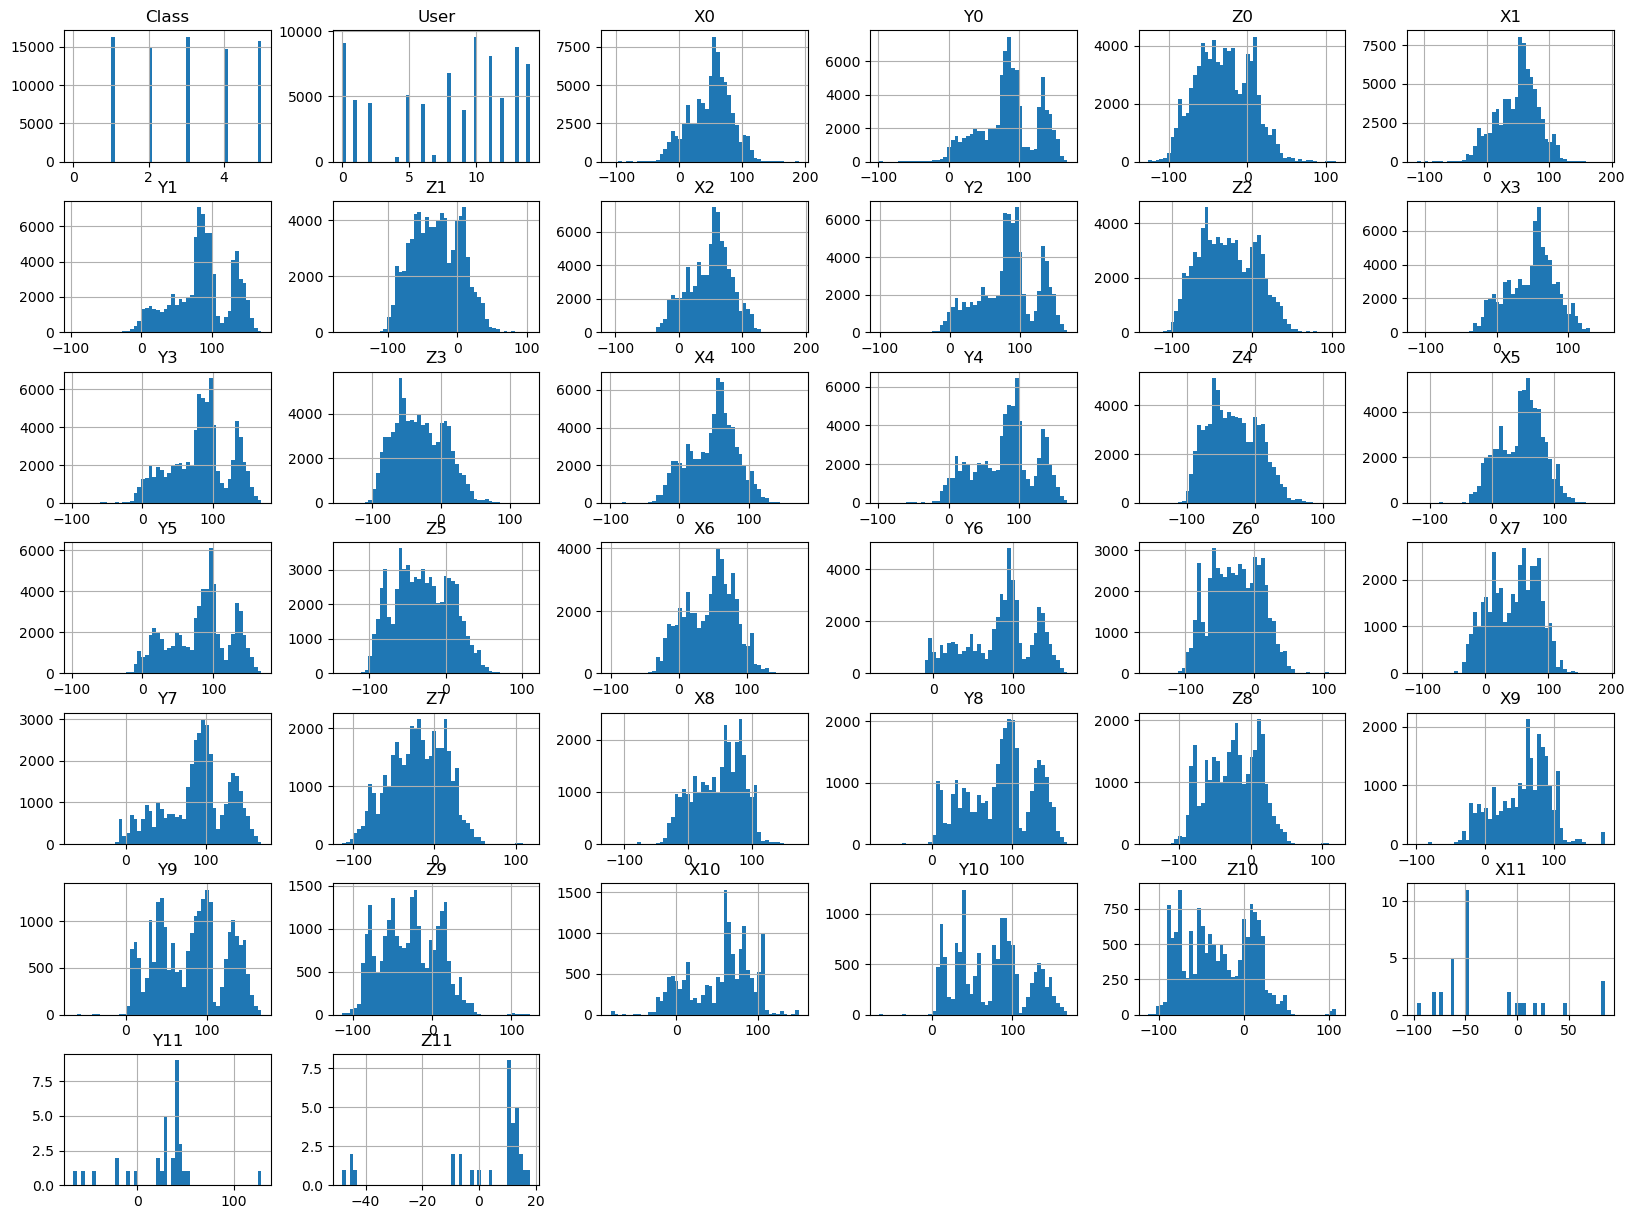

In [8]:
%matplotlib inline 
import matplotlib.pyplot as plt

postures_all.hist(bins=50, figsize=(20,15))
plt.show()

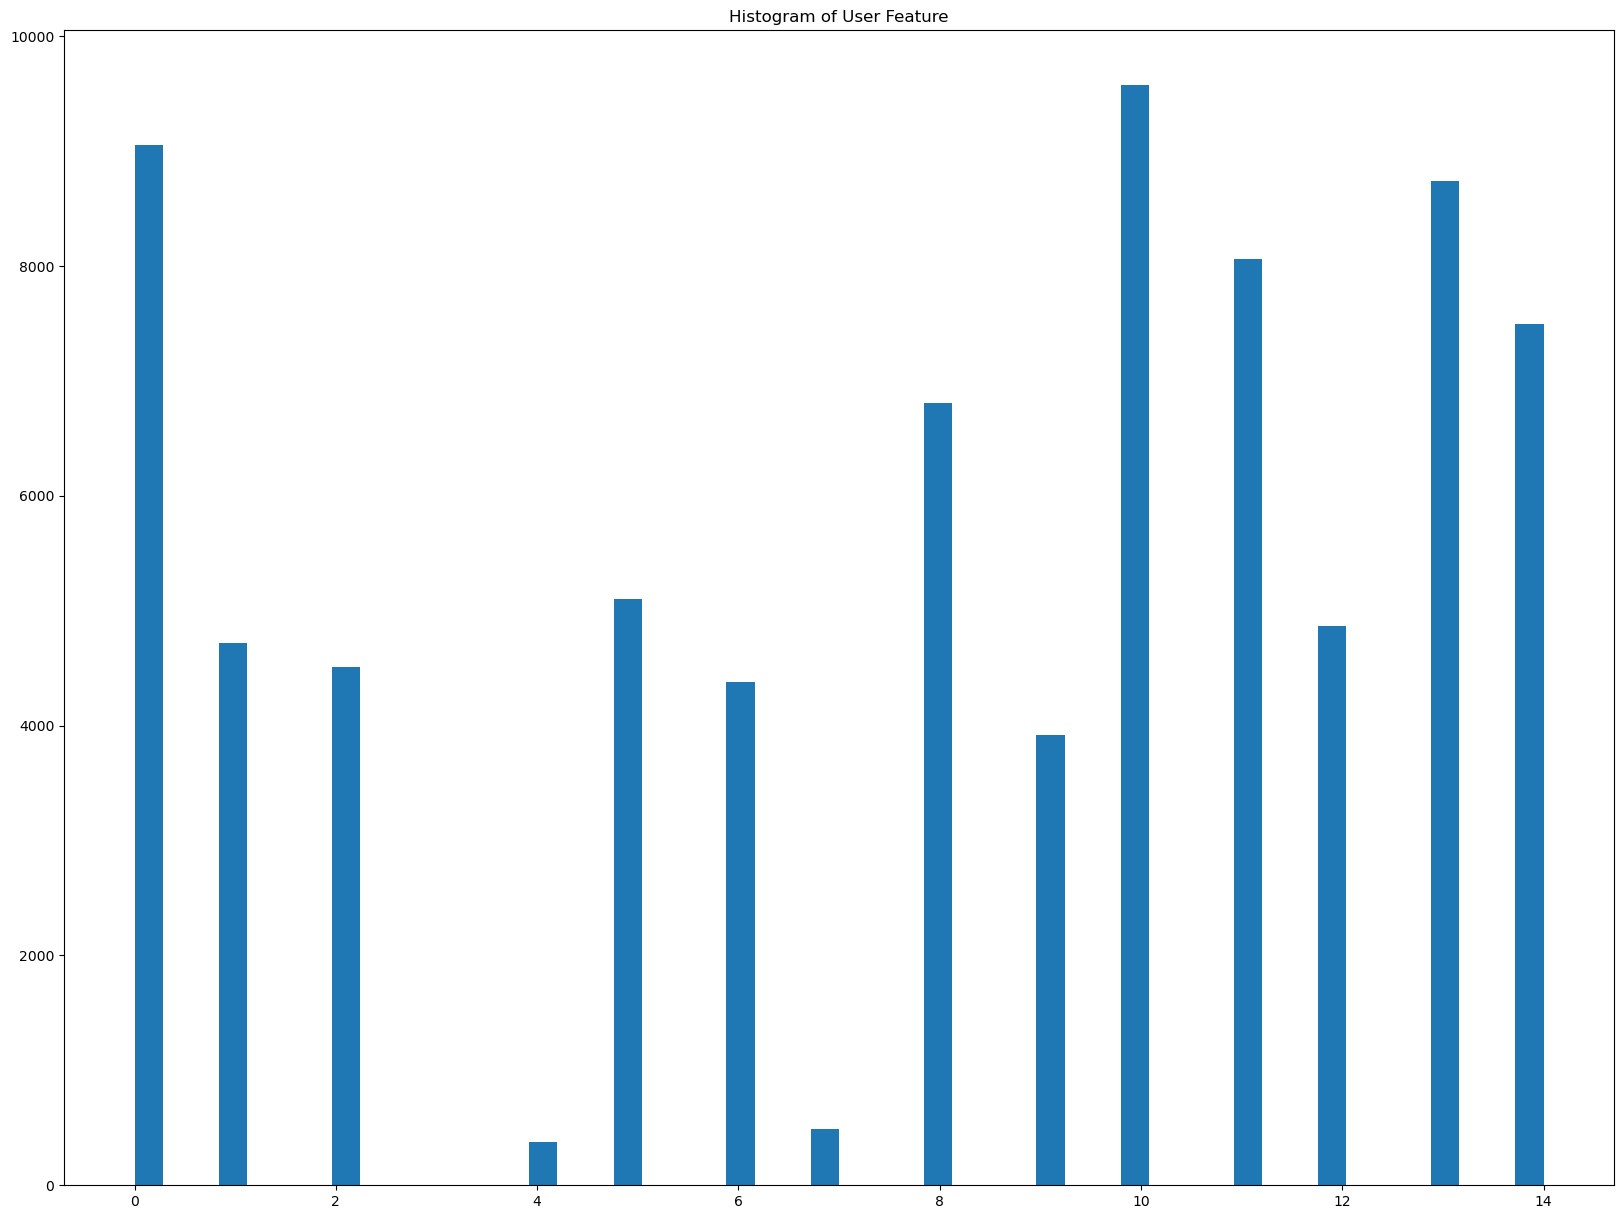

In [9]:
hist, bin_edges = np.histogram(postures_all['User'], bins=50)
plt.figure(figsize=(20,15))
plt.hist(postures_all['User'], bins=50)
plt.title('Histogram of User Feature')
plt.show()

### ii) Check for outliers
Identify outliers and anomalies in the data.


postures_all.columns.tolist() ['Class', 'User', 'X0', 'Y0', 'Z0', 'X1', 'Y1', 'Z1', 'X2', 'Y2', 'Z2', 'X3', 'Y3', 'Z3', 'X4', 'Y4', 'Z4', 'X5', 'Y5', 'Z5', 'X6', 'Y6', 'Z6', 'X7', 'Y7', 'Z7', 'X8', 'Y8', 'Z8', 'X9', 'Y9', 'Z9', 'X10', 'Y10', 'Z10', 'X11', 'Y11', 'Z11']
column_1 2 column_2 3 column_3 4
column_1 5 column_2 6 column_3 7
column_1 8 column_2 9 column_3 10
column_1 11 column_2 12 column_3 13
column_1 14 column_2 15 column_3 16
column_1 17 column_2 18 column_3 19
column_1 20 column_2 21 column_3 22
column_1 23 column_2 24 column_3 25
column_1 26 column_2 27 column_3 28
column_1 29 column_2 30 column_3 31
column_1 32 column_2 33 column_3 34
column_1 35 column_2 36 column_3 37


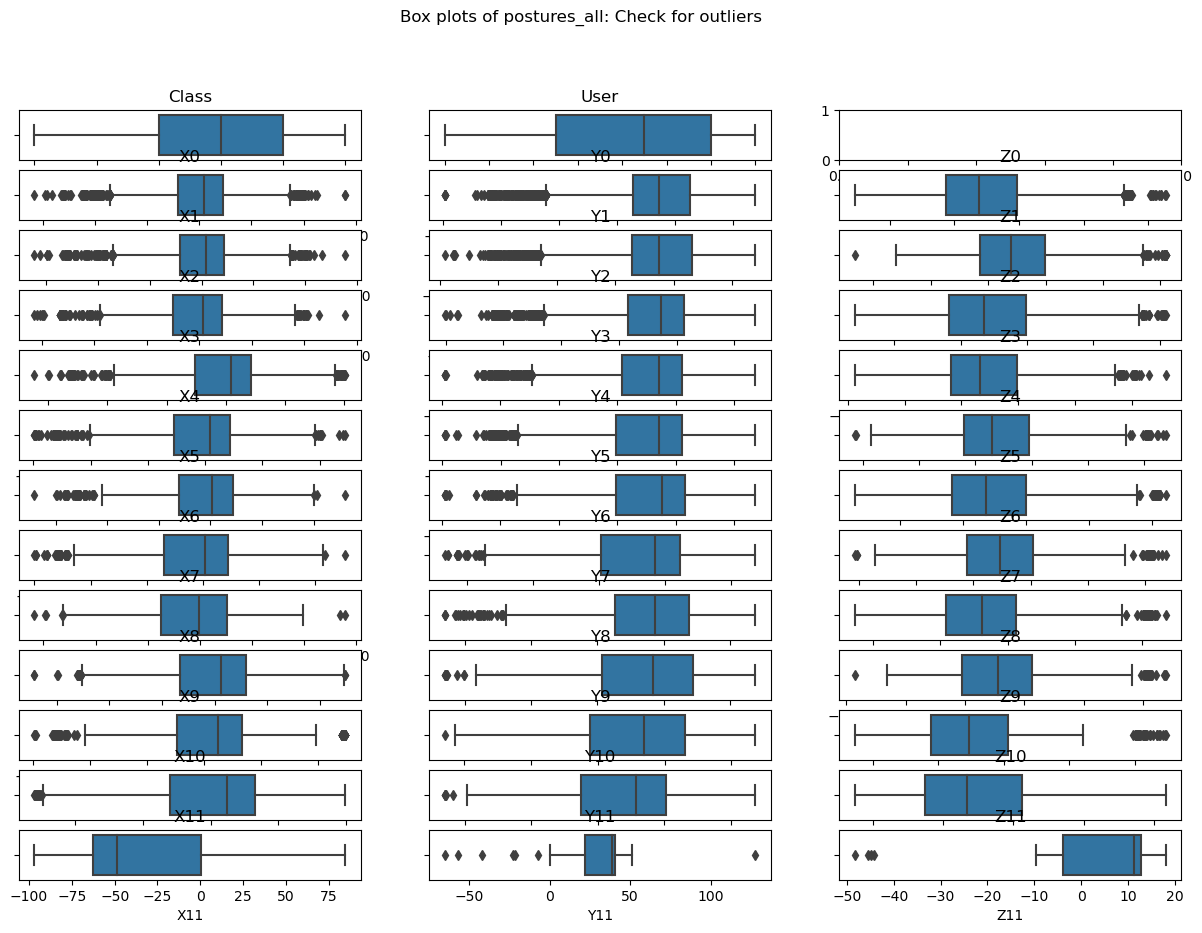

In [10]:
# Check for outliers

# Create a grid of subplots
#fig, axs = plt.subplots(ncols=4, nrows=6, figsize=(15, 10)) # 12,8
fig, axs = plt.subplots(ncols=3, nrows=13, figsize=(15, 10))

columns_list = postures_all.columns.tolist()
print (f"postures_all.columns.tolist() {columns_list }")

# Set titles
axs[0, 0].set_title(columns_list[0])
axs[0, 1].set_title(columns_list[1])

for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    axs[line_plus_1, 0].set_title(columns_list[2+line*3])
    axs[line_plus_1, 1].set_title(columns_list[3+line*3])
    axs[line_plus_1, 2].set_title(columns_list[4+line*3])

sns.boxplot(x=postures_all[columns_list[0]], ax=axs[0, 0])
sns.boxplot(x=postures_all[columns_list[1]], ax=axs[0, 1])


for line in range (12): # apply  to the 0-11
    line_plus_1 = line + 1
    
    column_1 = 2+line*3
    column_2 = 3+line*3
    column_3 = 4+line*3
    print (f"column_1 {column_1} column_2 {column_2} column_3 {column_3}")
    sns.boxplot(x=postures_all[columns_list[column_1]], ax=axs[line_plus_1, 0])
    sns.boxplot(x=postures_all[columns_list[column_2]], ax=axs[line_plus_1, 1])
    sns.boxplot(x=postures_all[columns_list[column_3]], ax=axs[line_plus_1, 2])

    # Add a title to the entire figure
fig.suptitle('Box plots of postures_all: Check for outliers')
plt.show()


### iii) Check for duplicates

In [11]:
#### iii) Check for duplicates

duplicates = postures_all.duplicated().sum()
print(f"postures_all.duplicated().sum() \n {duplicates} \n")

postures_all.duplicated().sum() 
 0 



### iv) Looking for correlations
identify patterns and relationships in the data. Correlations between variables and create scatter plots to visualize these relationships (multivariate: investigate the relationships between the variables)

In [12]:
corr_matrix = postures_all.corr() 
#Now let’s look at how much each attribute correlates with the Class value:
corr_matrix["Class"].sort_values(ascending=False)

Class    1.000000
Y9       0.232697
Y10      0.172631
Y3       0.169636
Y2       0.169296
Y8       0.167774
Y4       0.167576
Y1       0.144135
Y11      0.125613
Y5       0.119431
Z2       0.095512
Z1       0.089894
Y0       0.081808
Z3       0.081754
X0       0.080209
Y7       0.062988
Y6       0.062274
X10      0.053492
Z0       0.051832
Z4       0.050872
Z11      0.015265
X1      -0.010528
Z5      -0.027608
User    -0.030667
Z10     -0.048124
X6      -0.051873
X2      -0.052351
X5      -0.052454
X4      -0.055786
X3      -0.056136
Z9      -0.075456
X9      -0.086346
X11     -0.105516
X7      -0.106753
X8      -0.119278
Z8      -0.119760
Z6      -0.157359
Z7      -0.248780
Name: Class, dtype: float64

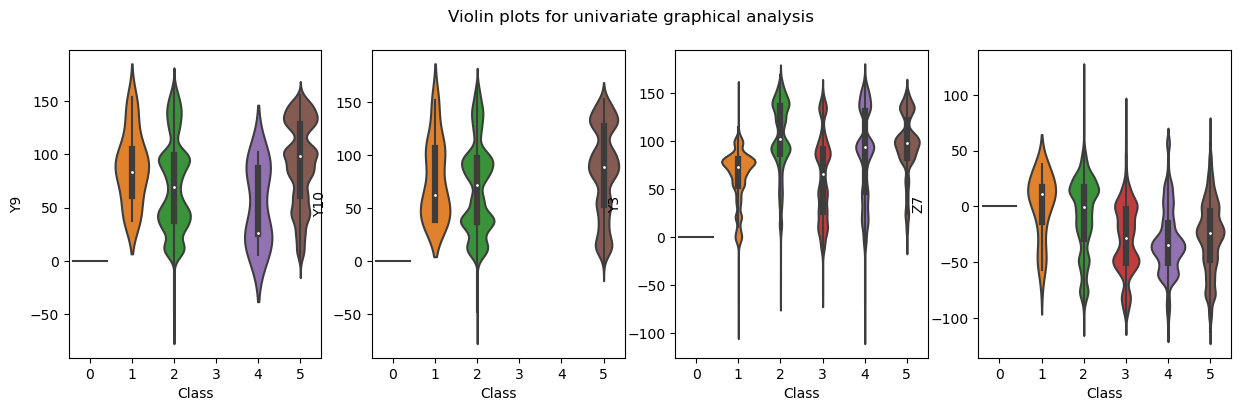

In [14]:
# Violin plots in general are more informative as compared to the box plots as violin plots also represent
# the underlying distribution of the data in addition to the statistical summary. 
plt.figure(figsize = (15, 4))
plt.subplot(1,4,1)
sns.violinplot(x = 'Class', y = 'Y9', data = postures_all)
plt.subplot(1,4,2)
sns.violinplot(x = 'Class', y = 'Y10', data = postures_all)
plt.subplot(1,4,3)
sns.violinplot(x = 'Class', y = 'Y3', data = postures_all)
plt.subplot(1,4,4)
sns.violinplot(x = 'Class', y = 'Z7', data = postures_all)

# Add a title to the entire figure
plt.suptitle('Violin plots for univariate graphical analysis')
plt.show()

#findings: when -25<Y9<0 Classe ~ 4

# 3) Data preparation
Prepare the data for modeling by cleaning it up and transforming it into a format that can be used by machine learning algorithms.  
- Data Cleaning: Handling missing values and categorical values, removing outliers and duplicates, and ensuring data quality.
- Data Transforming
- Feature Engineering: Transforming variables, creating new features, or selecting relevant variables for analysis.
-- Feature selection: selecting the most useful features to train on among existing features. 
-- Feature extraction: combining existing features to produce a more useful one (e.g. handling missing data, encoding variables, dealing with categorical variables, dimensionality reduction algorithms ...). 
-- Creating new features by gathering new data.
- PCA for reducing features
- Data Visualization after Data Preparation: Presenting insights through plots, charts, and graphs to communicate findings effectively

In [15]:
# Check for missing values
print(f"postures_all.isnull().sum() \n {postures_all.isnull().sum()} \n")

# Check for duplicates
duplicates = postures_all.duplicated().sum()
print(f"postures_all.duplicated().sum() \n {postures_all} \n")
if duplicates > 0:
    # Remove duplicates
    postures_all.drop_duplicates(inplace=True) #modify the original dataframe instead of creating a new one. 
    print(f"After remove duplicates postures_all.duplicated().sum() \n {postures_all.duplicated().sum()} \n")
    print ( f" \n postures_all shape {postures_all.shape} \n")


# Eliminate the first row of the data set postures_all as there are only Zeros
print ("Eliminate the first row of the data set postures_all as there are only Zeros")
postures_all.drop(postures_all.index[0], inplace=True)

print ("drop columns X11 Y11 Z11")
postures_all = postures_all.drop(['X11', 'Y11', 'Z11'], axis=1) #drop 3 features with ~99,9% Nans
print (f"postures_all.info() {postures_all.info()}")

postures_all.isnull().sum() 
 Class        0
User         0
X0           0
Y0           0
Z0           0
X1           0
Y1           0
Z1           0
X2           0
Y2           0
Z2           0
X3         690
Y3         690
Z3         690
X4        3120
Y4        3120
Z4        3120
X5       13023
Y5       13023
Z5       13023
X6       25848
Y6       25848
Z6       25848
X7       39152
Y7       39152
Z7       39152
X8       47532
Y8       47532
Z8       47532
X9       54128
Y9       54128
Z9       54128
X10      63343
Y10      63343
Z10      63343
X11      78064
Y11      78064
Z11      78064
dtype: int64 

postures_all.duplicated().sum() 
        Class  User         X0          Y0         Z0         X1          Y1  \
0          0     0   0.000000    0.000000   0.000000   0.000000    0.000000   
1          1     0  54.263880   71.466776 -64.807709  76.895635   42.462500   
2          1     0  56.527558   72.266609 -61.935252  39.135978   82.538530   
3          1     0  55.849928   72.

In [16]:
## Retrieve Class (y) from the dataset (X)

#postures_bck = postures_all
#postures_all = postures_bck


# Separate the features and target variable
#User = postures_all['User']
#User.columns = 'User' #column name

y = postures_all['Class'] # targuet .copy()?
#postures = postures_all.drop(['Class','User'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)
postures = postures_all.drop(['Class'], axis=1) #axis by default is 0 (drop a line) set to  1 (column)


print ( f"postures shape \n {postures.shape} \n")
print ( f"postures.describe() \n {postures.describe()} \n")

# show first 5 column
print (f"postures.head() \n {postures.head()}")

print ( f"y shape \n {y.shape} \n")
# show first 5 column
print (f"y.head() \n {y.head()}")

postures shape 
 (78095, 34) 

postures.describe() 
                User            X0            Y0            Z0            X1  \
count  78095.000000  78095.000000  78095.000000  78095.000000  78095.000000   
mean       7.959229     50.346308     85.813150    -29.985096     49.595844   
std        4.697754     32.695886     40.203448     34.361971     32.477961   
min        0.000000   -108.552738    -98.233756   -126.770872   -111.685241   
25%        5.000000     29.295141     63.497746    -56.356593     28.755679   
50%        9.000000     54.620245     86.526334    -30.864248     54.215714   
75%       12.000000     72.488833    113.108673     -1.419462     71.763080   
max       14.000000    190.017835    169.175464    113.345119    188.691997   

                 Y1            Z1            X2            Y2            Z2  \
count  78095.000000  78095.000000  78095.000000  78095.000000  78095.000000   
mean      86.193751    -29.509579     48.612744     83.772387    -30.560906  

In [17]:
# Transform User in categorization
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### just this time
#postures = pd.concat([User, postures], axis=1)
#print ( f"postures.info() \n {postures.info ()} \n")


# print ( f"User.info() \n {User.info ()} \n")

# Create an instance of the OneHotEncoder class
encoder = OneHotEncoder()

# Fit the encoder to the data, double [] to create a new df with one feature for onehotencoder
encoder.fit(postures[['User']])

# Transform the data using the encoder
postures_encoded = encoder.transform(postures[['User']])

# Concatenate the encoded data with the original data
postures_encoded_df = pd.DataFrame(postures_encoded.toarray(), columns=encoder.get_feature_names_out(['User']))
print ( f"postures_encoded_df.info() \n {postures_encoded_df.info ()} \n")

# postures_encoded_df begin index in 0 and postures in 1 so
# postures_encoded_df.set_index(pd.RangeIndex(start=1, stop=78096))
postures_encoded_df = postures_encoded_df.set_index(pd.RangeIndex(start=1, stop=78096))
print ( f"postures_encoded_df.info() +1 \n {postures_encoded_df.info ()} \n")
#postures = pd.concat([postures_encoded_df, postures.drop('User', axis=1)], axis=1)

"""
column_trans = ColumnTransformer(
    [       
        ('user_tranf', OneHotEncoder(dtype='int'), ['User'])

   ],
       remainder = 'passthrough', #the others features not changed will remain in the dataset; 
)

print (f"column_trans {column_trans}")
users_transf = column_trans.fit_transform(User)
"""

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 0 to 78094
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_0   78095 non-null  float64
 1   User_1   78095 non-null  float64
 2   User_2   78095 non-null  float64
 3   User_4   78095 non-null  float64
 4   User_5   78095 non-null  float64
 5   User_6   78095 non-null  float64
 6   User_7   78095 non-null  float64
 7   User_8   78095 non-null  float64
 8   User_9   78095 non-null  float64
 9   User_10  78095 non-null  float64
 10  User_11  78095 non-null  float64
 11  User_12  78095 non-null  float64
 12  User_13  78095 non-null  float64
 13  User_14  78095 non-null  float64
dtypes: float64(14)
memory usage: 8.3 MB
postures_encoded_df.info() 
 None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 1 to 78095
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User_0   78095 n

'\ncolumn_trans = ColumnTransformer(\n    [       \n        (\'user_tranf\', OneHotEncoder(dtype=\'int\'), [\'User\'])\n\n   ],\n       remainder = \'passthrough\', #the others features not changed will remain in the dataset; \n)\n\nprint (f"column_trans {column_trans}")\nusers_transf = column_trans.fit_transform(User)\n'

In [18]:
# join User (categorization) with the rest
"""
postures = pd.concat([postures_encoded_df, postures.drop('User', axis=1)], axis=1)
The first dataframe (postures_encoded_df) with a RangeIndex: 78095 entries, 0 to 78094, the second dataframe (postures) 
with a RangeIndex: 78095 entries, 1 to 78095. When i concatenate the RangeIndex goes to 
78096 (RangeIndex: 78096 entries, 0 to 78095)

I have two dataframes with diferent columns and same  RangeIndex (78095), the postures dataframe   have entries 
from 1 to 78095 and the the postures_encoded_df dataframe has entries  from  0 to 78094.
I want to add to the postures dataframe the postures_encoded_df, and guarantee that the entries of
postures_encoded_df (0 to 78094) are added to  postures dataframe in entries 1 to 78095.
How can i do that?
. When i concatenate the RangeIndex goes to 
78096 (RangeIndex: 78096 entries, 0 to 78095)

"""
#use join instead of concat to keep the index
# postures = postures.join(postures_encoded_df)
#postures = postures.join(postures_encoded_df)


postures = postures.join(postures_encoded_df)
# postures_encoded_df = postures_encoded_df.join(postures, lsuffix='_encoded')


print ( f"postures.info() \n {postures.info ()} \n")
# print ( f"postures_encoded_df.info() \n {postures_encoded_df.info ()} \n")

postures = postures.drop(['User'], axis=1)
print ( f"postures.info() \n {postures.info ()} \n")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78095 entries, 1 to 78095
Data columns (total 48 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   User     78095 non-null  int64  
 1   X0       78095 non-null  float64
 2   Y0       78095 non-null  float64
 3   Z0       78095 non-null  float64
 4   X1       78095 non-null  float64
 5   Y1       78095 non-null  float64
 6   Z1       78095 non-null  float64
 7   X2       78095 non-null  float64
 8   Y2       78095 non-null  float64
 9   Z2       78095 non-null  float64
 10  X3       77405 non-null  float64
 11  Y3       77405 non-null  float64
 12  Z3       77405 non-null  float64
 13  X4       74975 non-null  float64
 14  Y4       74975 non-null  float64
 15  Z4       74975 non-null  float64
 16  X5       65072 non-null  float64
 17  Y5       65072 non-null  float64
 18  Z5       65072 non-null  float64
 19  X6       52247 non-null  float64
 20  Y6       52247 non-null  float64
 21  Z6       522

## 4) Modeling / Select and Train Models 
We create a model that can be used to make predictions or classify new data. 
- Retrieve Class (y) from the dataset (X)
- Split Data
- Train model

In [19]:
from sklearn.model_selection import train_test_split

#postures has User_0/3 to 14 as floats with one 1 for each line, is not influenced by scaler and imputer

# data pre_processing
X_train, X_test, y_train, y_test  = train_test_split(postures, y, test_size=0.25, random_state=42)

print ( f"X_train.info() \n {X_train.info ()} \n")
print ( f"X_test.info() \n {X_test.info ()} \n")
print ( f"y_train.info() \n {y_train.info ()} \n")
print ( f"y_test.info() \n {y_test.info ()} \n")


<class 'pandas.core.frame.DataFrame'>
Int64Index: 58571 entries, 61444 to 15796
Data columns (total 47 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   X0       58571 non-null  float64
 1   Y0       58571 non-null  float64
 2   Z0       58571 non-null  float64
 3   X1       58571 non-null  float64
 4   Y1       58571 non-null  float64
 5   Z1       58571 non-null  float64
 6   X2       58571 non-null  float64
 7   Y2       58571 non-null  float64
 8   Z2       58571 non-null  float64
 9   X3       58053 non-null  float64
 10  Y3       58053 non-null  float64
 11  Z3       58053 non-null  float64
 12  X4       56186 non-null  float64
 13  Y4       56186 non-null  float64
 14  Z4       56186 non-null  float64
 15  X5       48743 non-null  float64
 16  Y5       48743 non-null  float64
 17  Z5       48743 non-null  float64
 18  X6       39129 non-null  float64
 19  Y6       39129 non-null  float64
 20  Z6       39129 non-null  float64
 21  X7      

In [20]:

def hist_simple (data, title):
    hist, bin_edges = np.histogram(data, bins=50)
    plt.figure(figsize=(20,15))
    plt.hist(data, bins=50)
    plt.title(title)
    plt.show()


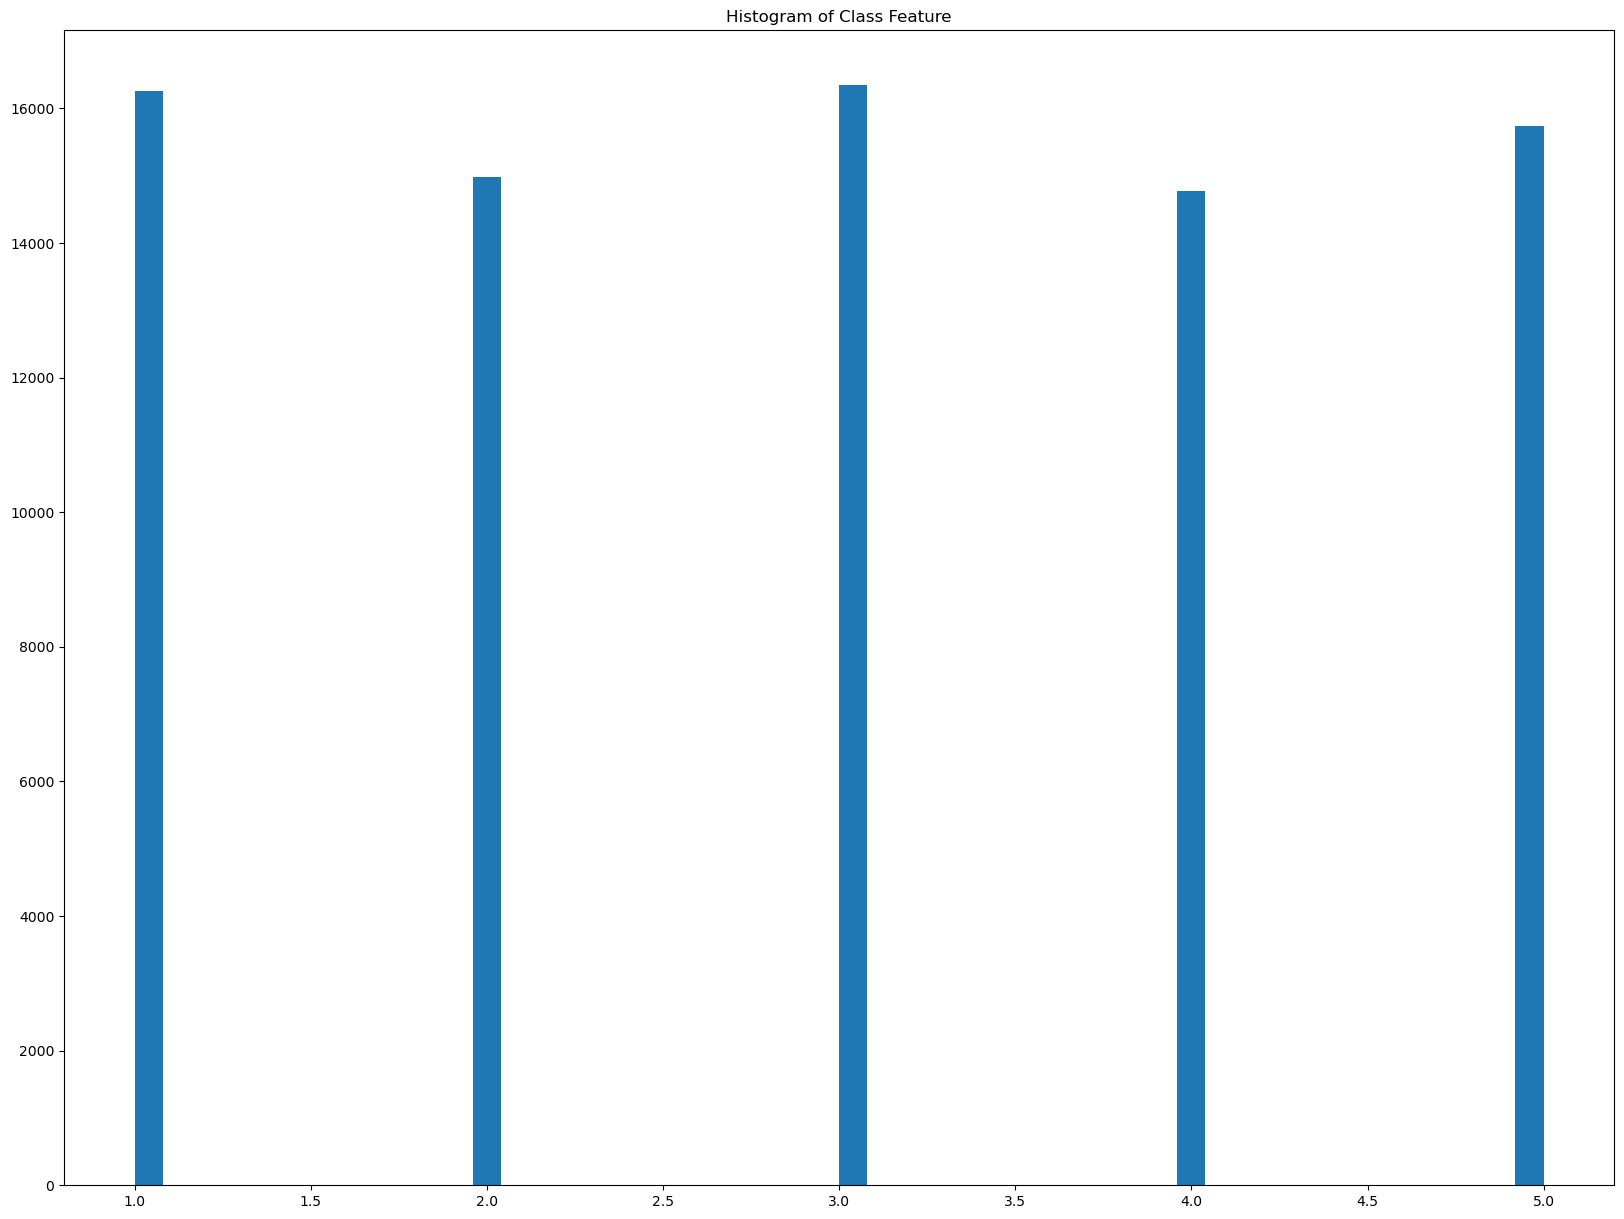

In [21]:
hist_simple (y, 'Histogram of Class Feature')


## 5) Evaluation
We evaluate the model’s performance and determine whether it meets the business objectives.
- Evaluation using simple cross-validate
- Fine-tune Models  
- Model Evaluation on Test Set

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix, precision_recall_fscore_support

# Save the model scores and present intermediate results (w/ verbose)
# Return the list with the saved results 

def save_results(name_scaler, scaler,name_imputer, imputer, name_mod, model, param, results,y_test, preds, verbose):
    
    #  Calculate the precision, recall,  f1 and mcc scores
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, preds, average='weighted') # results weighted check
    mcc = matthews_corrcoef(y_test, preds)

    #precision = precision_score(y_test, preds)
    #recall = recall_score(y_test, preds)
    #f1 = f1_score(y_test, preds)
    
    if verbose:
        print(f"Scaler: {scaler} imputer: {imputer} classifier: {name_mod} {model}")
        print("The Precision is: %7.4f" % precision)
        print("The Recall is: %7.4f" % recall)
        print("The F1 score is: %7.4f" % f1)
        print("The Matthews correlation coefficient is: %7.4f" % mcc)
        print()
        print("This is the Confusion Matrix")
        print(pd.DataFrame(confusion_matrix(y_test, preds))) # ERR LABELS? labels=["1", "2", "3", "4", "5"]

    results.append((name_scaler,
                    scaler,
                    name_imputer, 
                    imputer, 
                    name_mod, 
                    model,
                    param,
                    precision,
                    recall,
                    f1,
                    mcc,                    
                    ))
    return results

# Display the model final results. Receives the ordered results to present
def display_results (results):        
    
    noshow = ""
    print (f"\n--------------------------Results for Classification Models Performance--------------------------")
    for res in results:
        name_scaler = res [0]
        scaler = res [1]
        name_imputer = res [2]
        imputer = res [3]
        name_mod = res [4]
        model = res [5]
        param = res [6]
        precision = res [7]
        recall = res [8]
        f1 = res [9]
        mcc = res [10]

        print(f"{name_mod.ljust(25)} | precision     {precision:.4f} | recall     {recall:.4f} | f1     {f1:.4f}| mcc     {mcc:.4f}")
        print(f"{noshow.ljust(25)} | scaler {name_scaler} | imputer {name_imputer}")  
              # | estimator {estimator:.4f}  | param     {param:.4f}


In [23]:
# Execute list of scalers, imputers,models,model_paramsresults and present the results 
def test_models (scalers, imputers,models,model_params,results, X_train, y_train, X_test,y_test, verbose):
    model_number = 0
    for name_scaler, scaler in scalers:
        for name_imputer, imputer in imputers:
            for name_mod, model in models:
                model_number = model_number + 1
                print(f"model_number: {model_number}")

                #scaling
                scaler.fit(X_train)
                Xt_train = scaler.transform(X_train)
                Xt_test  = scaler.transform(X_test)

                #imputing
                imputer.fit(Xt_train)
                Xt_train = imputer.transform(Xt_train)
                Xt_test  = imputer.transform(Xt_test)


                model.fit(Xt_train, y_train)
                preds = model.predict(Xt_test) #PREDICTION

                if verbose:
                    print(f"Scaler: {name_scaler} {scaler} imputer: {name_imputer} {imputer} classifier: {name_mod} {model}")
                    hist_simple (preds, 'Histogram of preds: model %s' % name_mod)

                #model instead model: Future Roadmap
                results = save_results (name_scaler, scaler, name_imputer, imputer, name_mod, model, model, results,y_test, preds, verbose) #pipeline clf instead of est to be saved
    
    results_sorted = sorted(results, key=lambda x: x[9], reverse=True) #f1 sorted decreasing
    display_results (results_sorted)
    return results

"""
    results = save_scores (clf, scores, name, results,model_type, verbose) #pipeline clf instead of est to be saved
    results = sort_results (results,model_type)
    display_scores (results,model_type)
    return results
"""




'\n    results = save_scores (clf, scores, name, results,model_type, verbose) #pipeline clf instead of est to be saved\n    results = sort_results (results,model_type)\n    display_scores (results,model_type)\n    return results\n'

model_number: 1
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: RandomForest RandomForestClassifier()


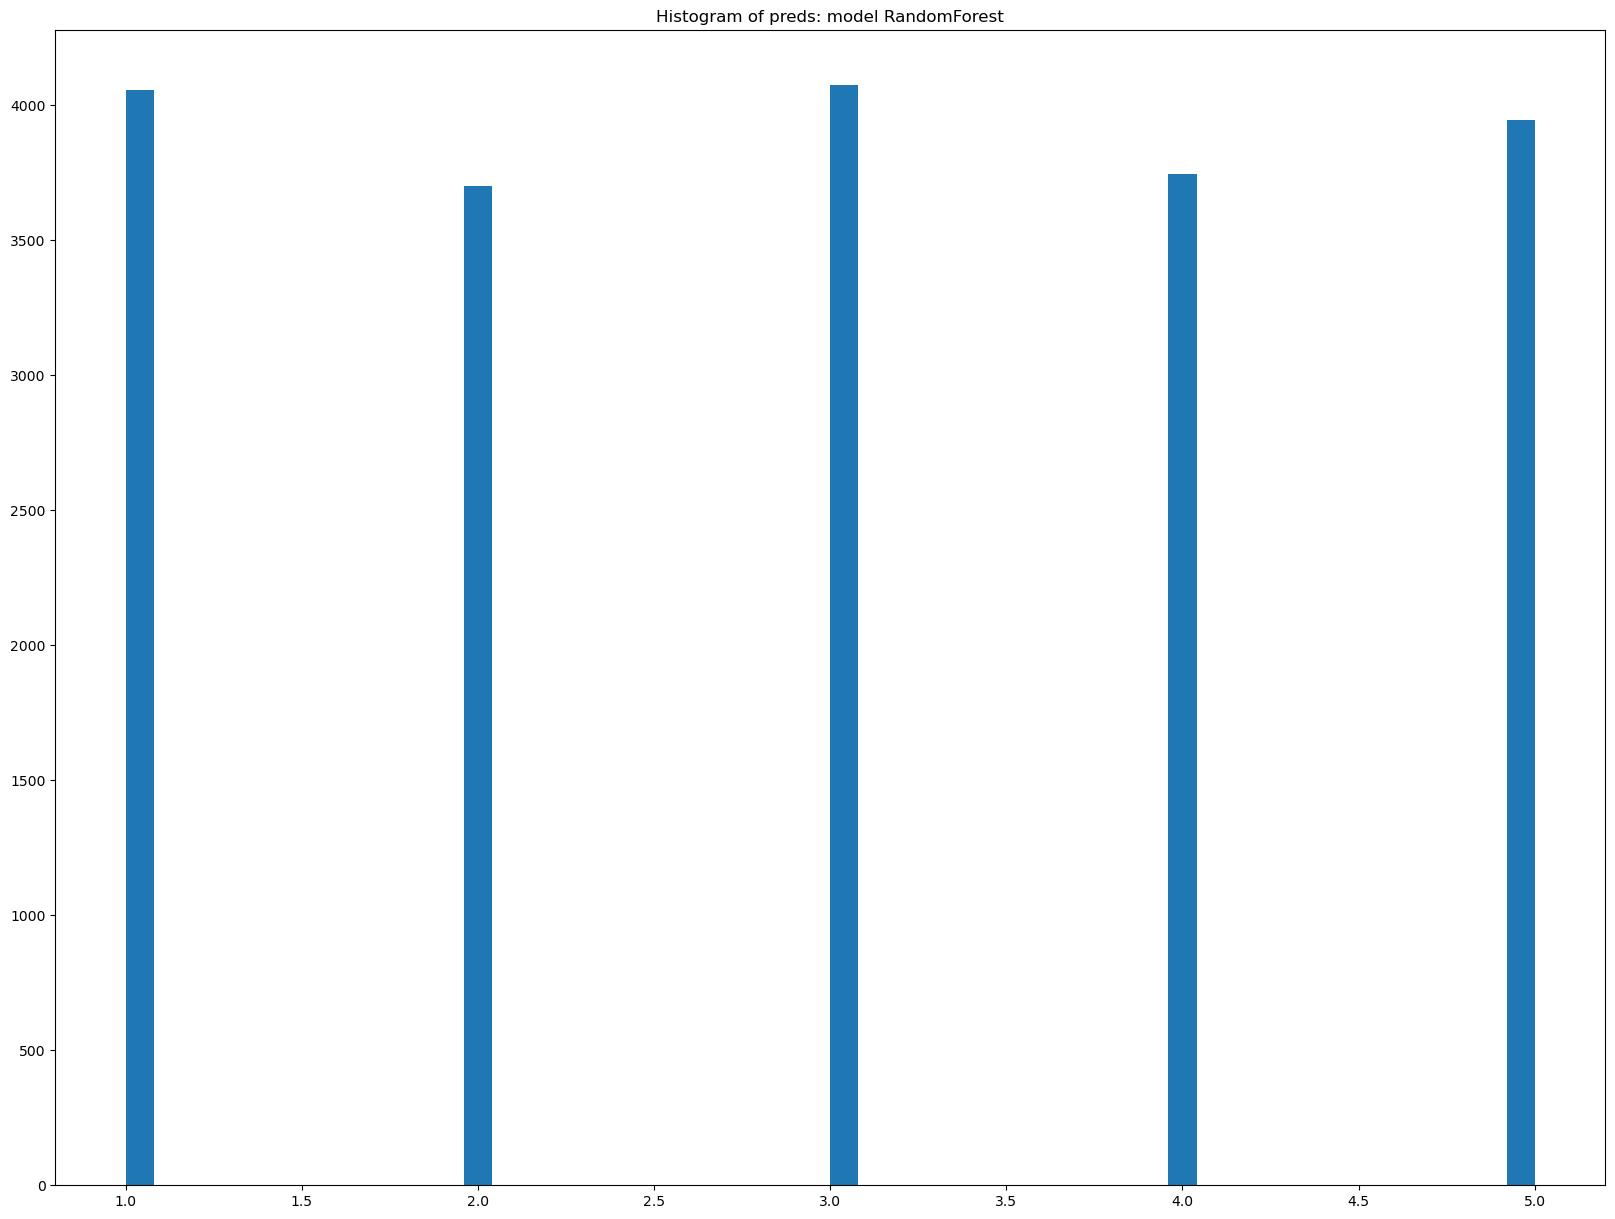

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9900
The Recall is:  0.9900
The F1 score is:  0.9900
The Matthews correlation coefficient is:  0.9875

This is the Confusion Matrix
      0     1     2     3     4
0  4049    15     9     0     0
1     4  3673    19    21    35
2     4     0  4012    25     3
3     1     0    33  3694     6
4     0    14     1     6  3900
model_number: 2
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()


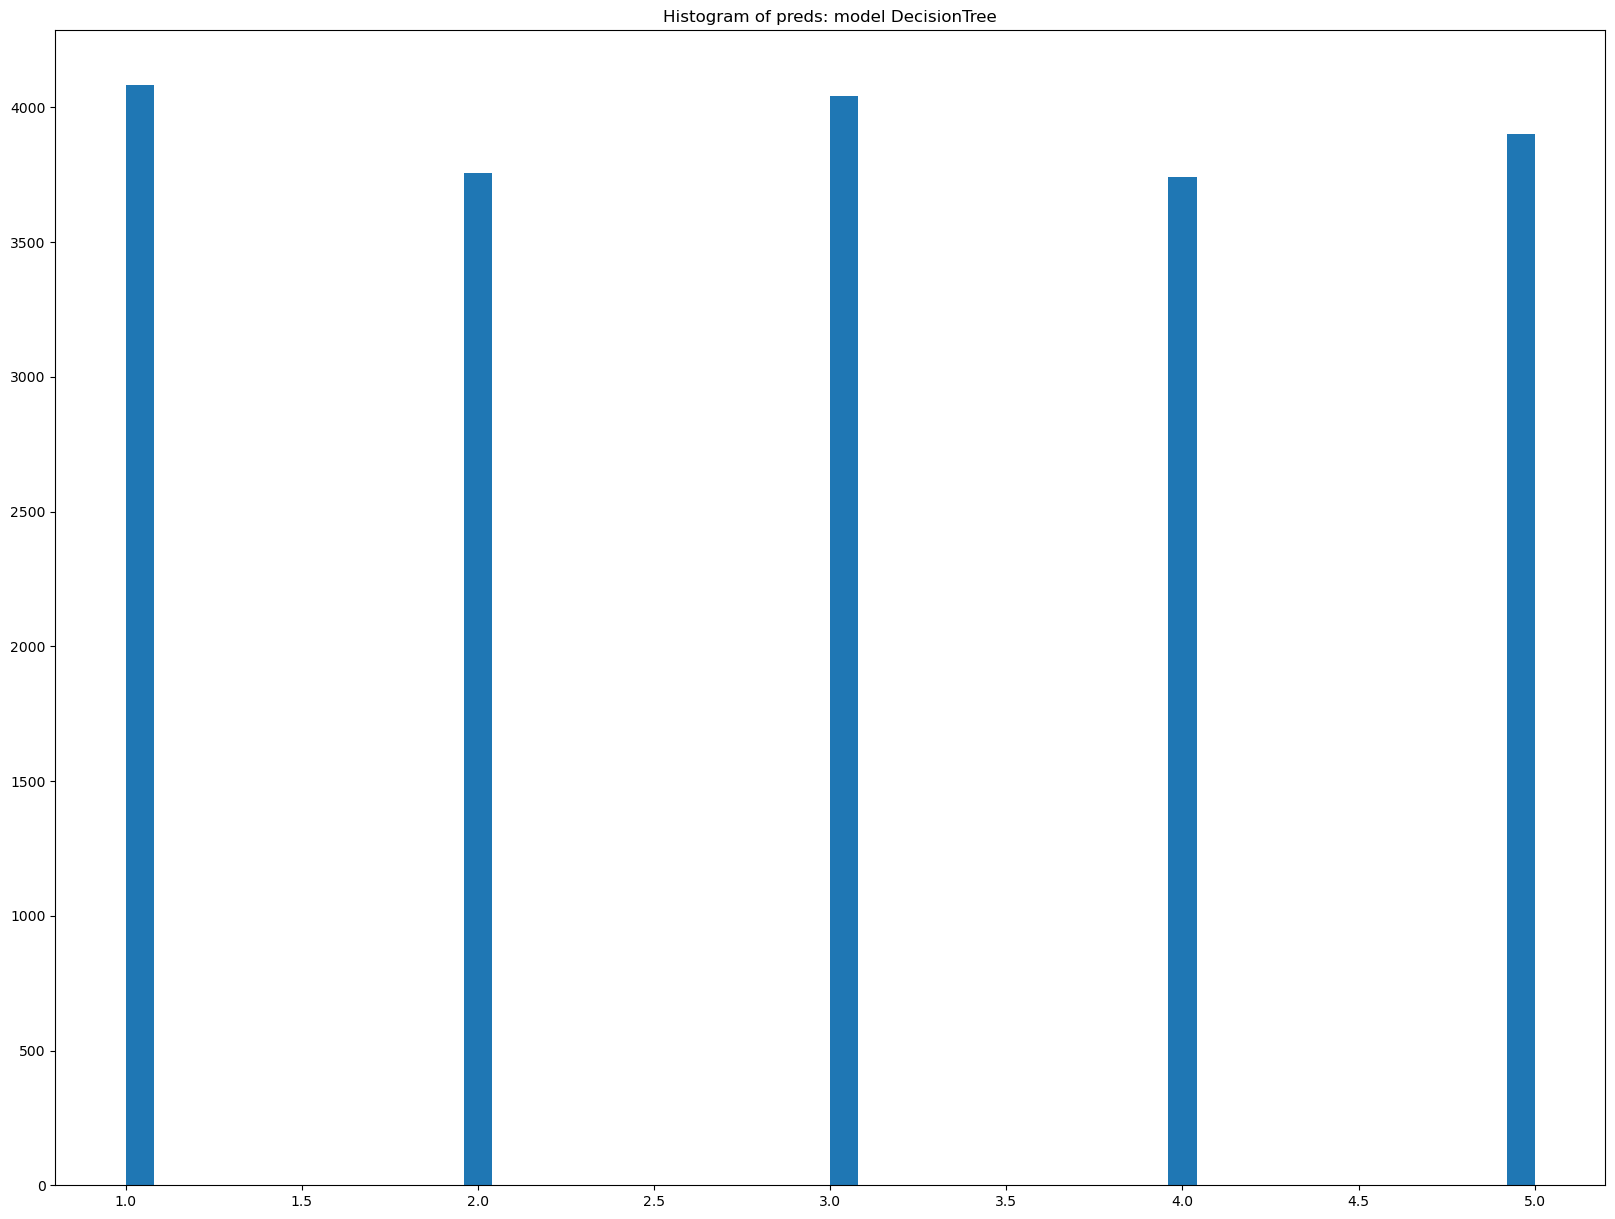

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9642
The Recall is:  0.9642
The F1 score is:  0.9642
The Matthews correlation coefficient is:  0.9552

This is the Confusion Matrix
      0     1     2     3     4
0  4041    12    12     3     5
1    10  3593    12    33   104
2    14    10  3918    66    36
3    14    29    70  3568    53
4     3   112    31    70  3705
model_number: 3
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


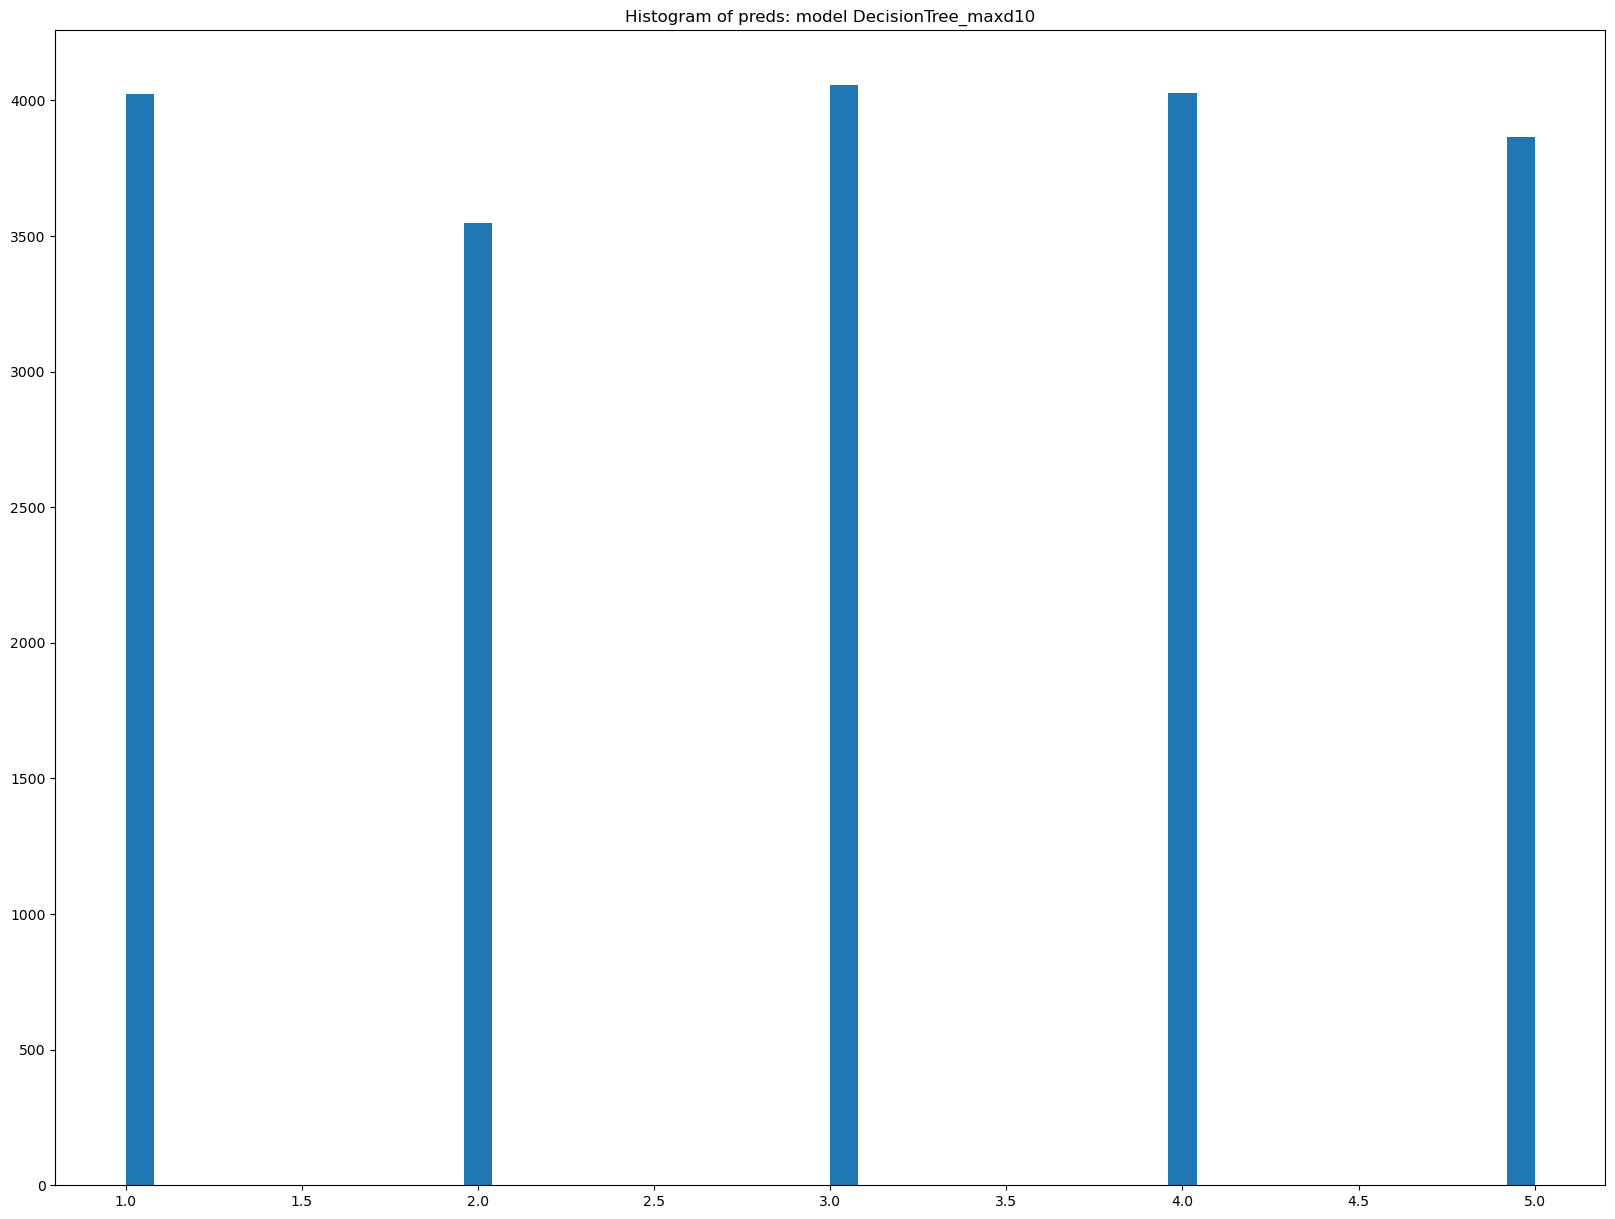

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8971
The Recall is:  0.8953
The F1 score is:  0.8958
The Matthews correlation coefficient is:  0.8692

This is the Confusion Matrix
      0     1     2     3     4
0  3862    14   139    47    11
1    13  3386    31   143   179
2    58     1  3555   309   121
3    30    12   219  3297   176
4    61   137   112   232  3379
model_number: 4
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


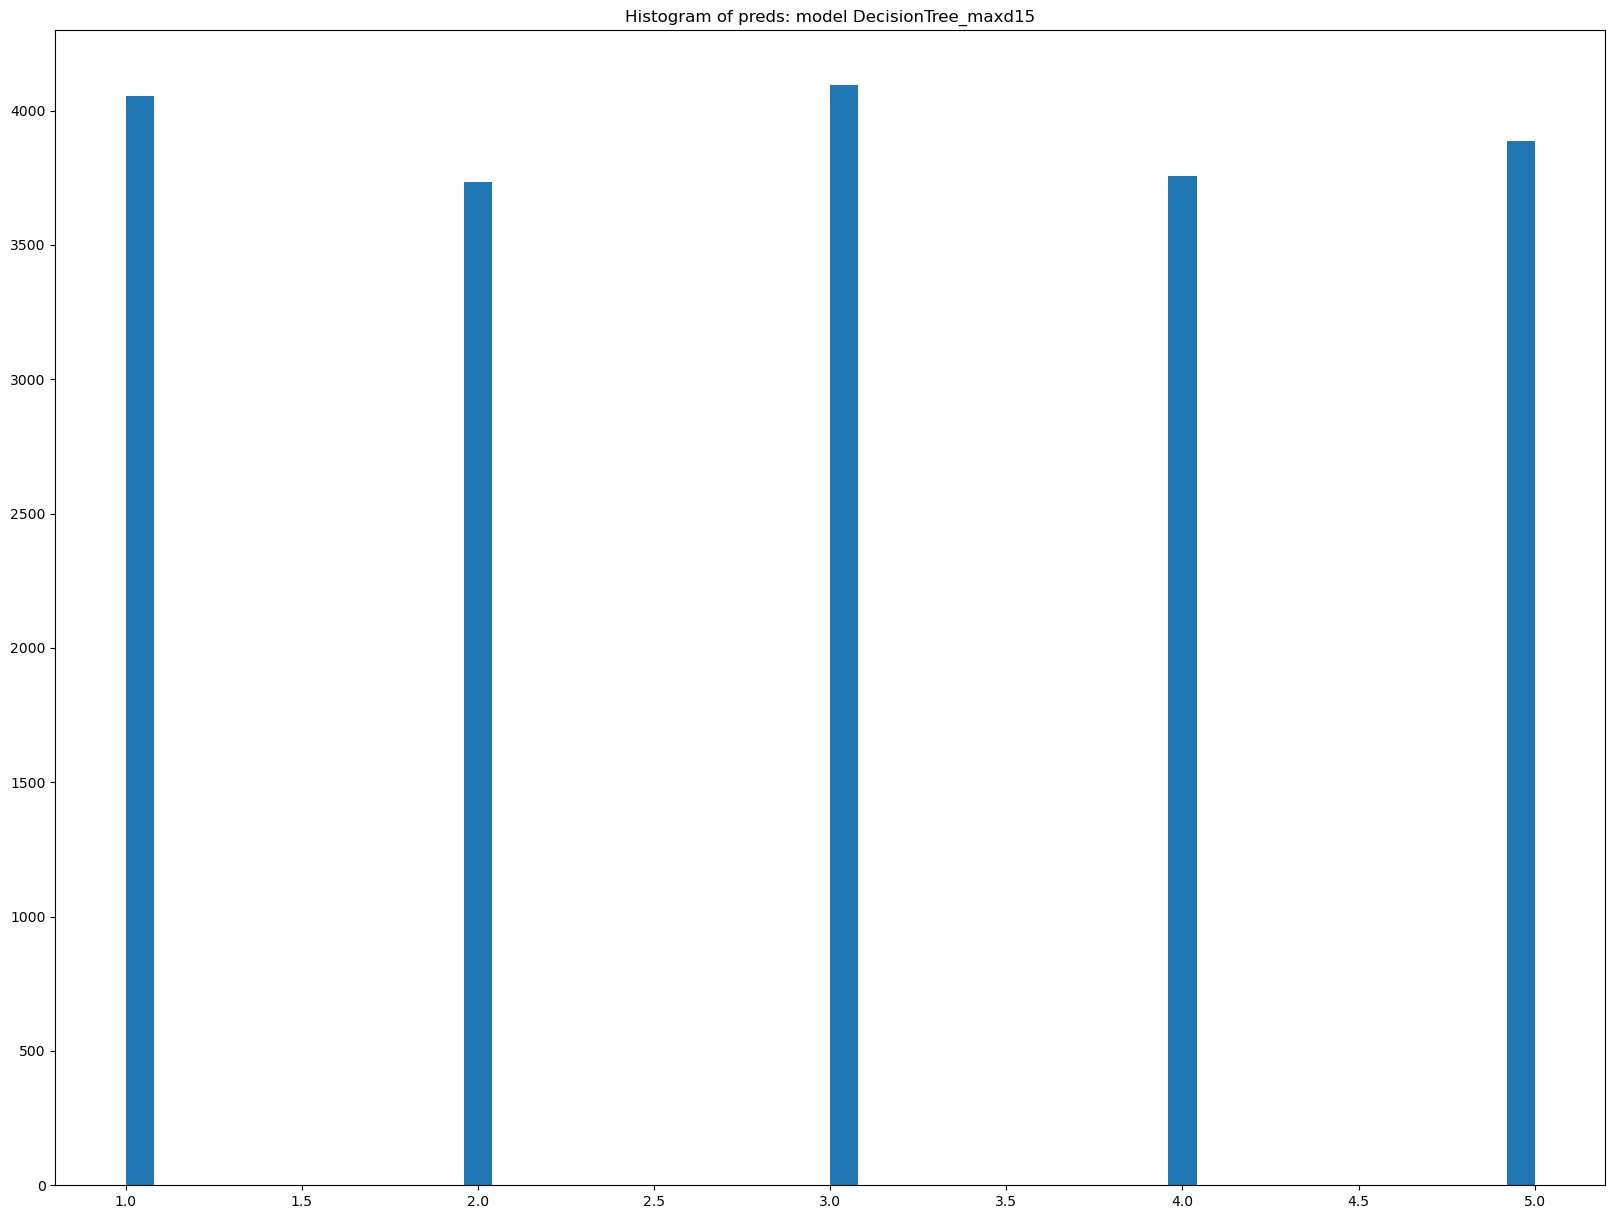

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.9530
The Recall is:  0.9529
The F1 score is:  0.9529
The Matthews correlation coefficient is:  0.9412

This is the Confusion Matrix
      0     1     2     3     4
0  4007    14    44     4     4
1    12  3559    15    52   114
2    18     8  3883    89    46
3    13    40   116  3500    65
4     5   112    36   112  3656
model_number: 5
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


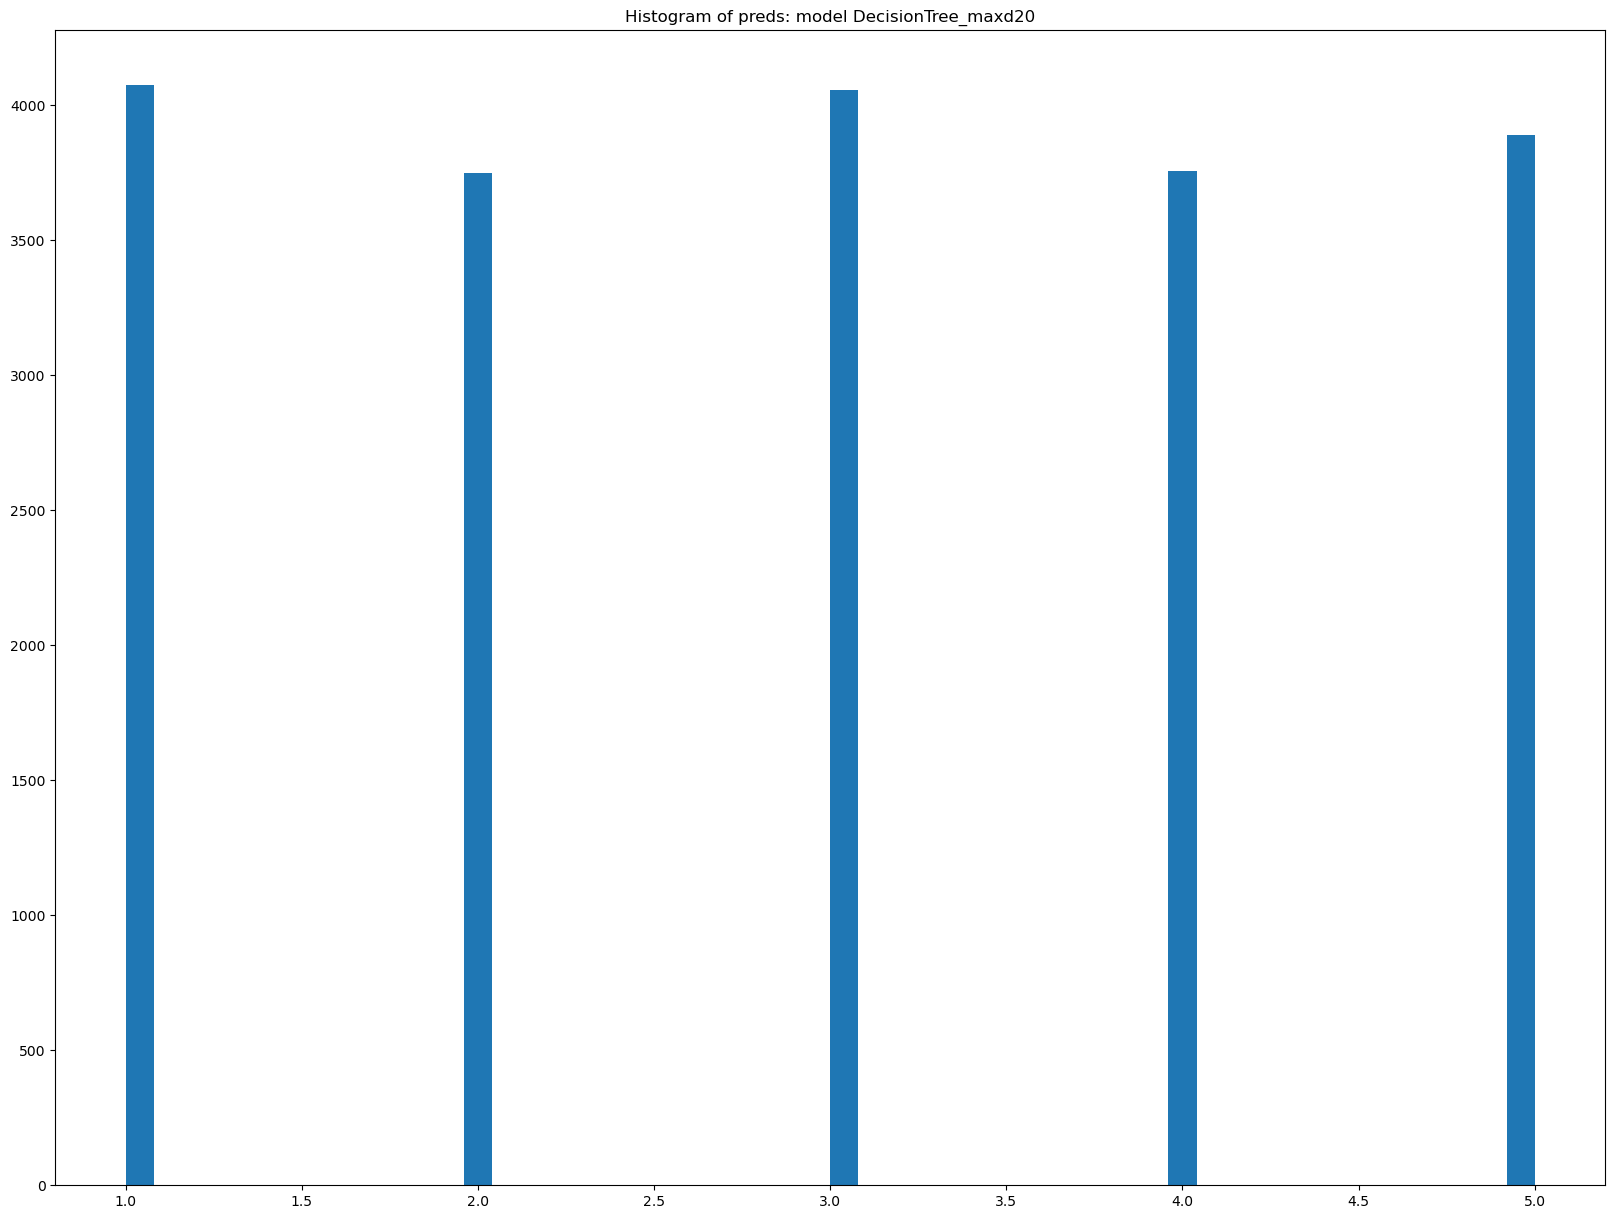

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9621
The Recall is:  0.9621
The F1 score is:  0.9621
The Matthews correlation coefficient is:  0.9526

This is the Confusion Matrix
      0     1     2     3     4
0  4034    16    13     5     5
1    11  3586    14    35   106
2    15    11  3914    70    34
3    10    33    84  3556    51
4     4   103    30    90  3694
model_number: 6
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


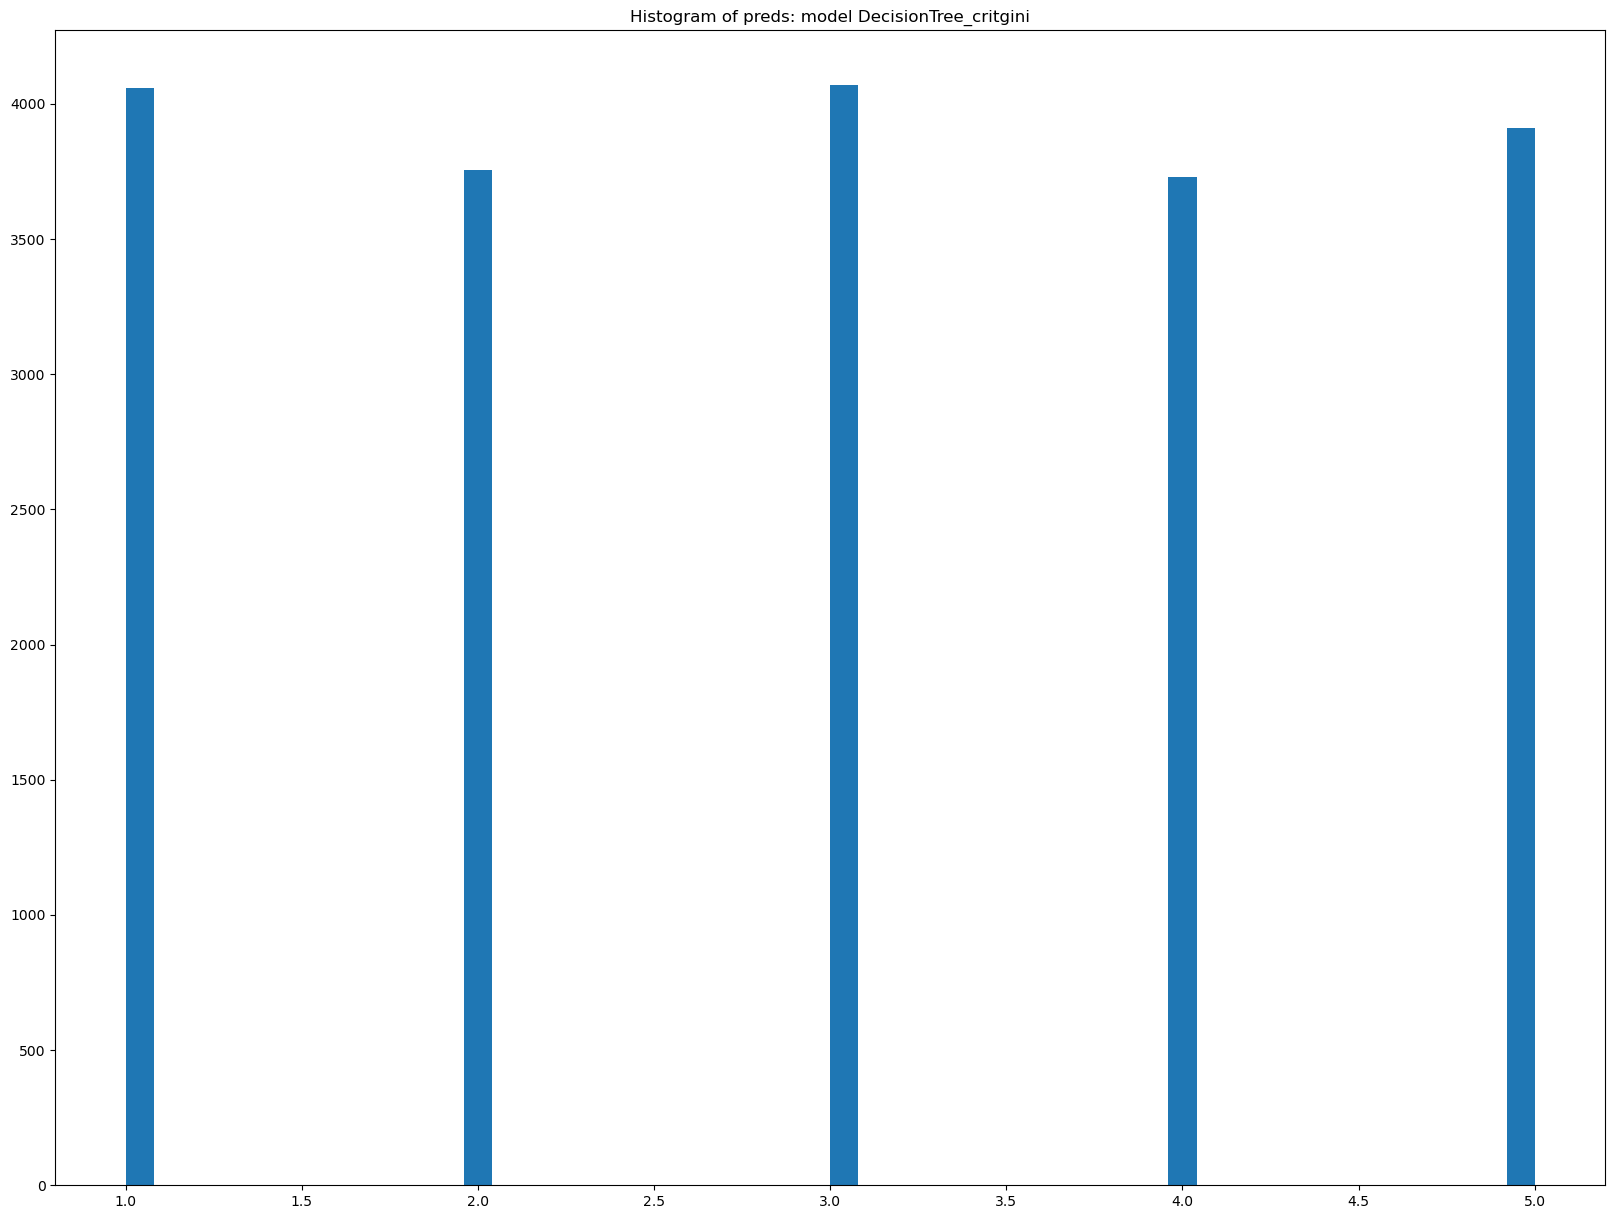

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9641
The Recall is:  0.9641
The F1 score is:  0.9641
The Matthews correlation coefficient is:  0.9551

This is the Confusion Matrix
      0     1     2     3     4
0  4028    14    13    13     5
1     8  3593    16    29   106
2    11     8  3928    62    35
3     9    31    80  3561    53
4     3   109    32    64  3713
model_number: 7
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


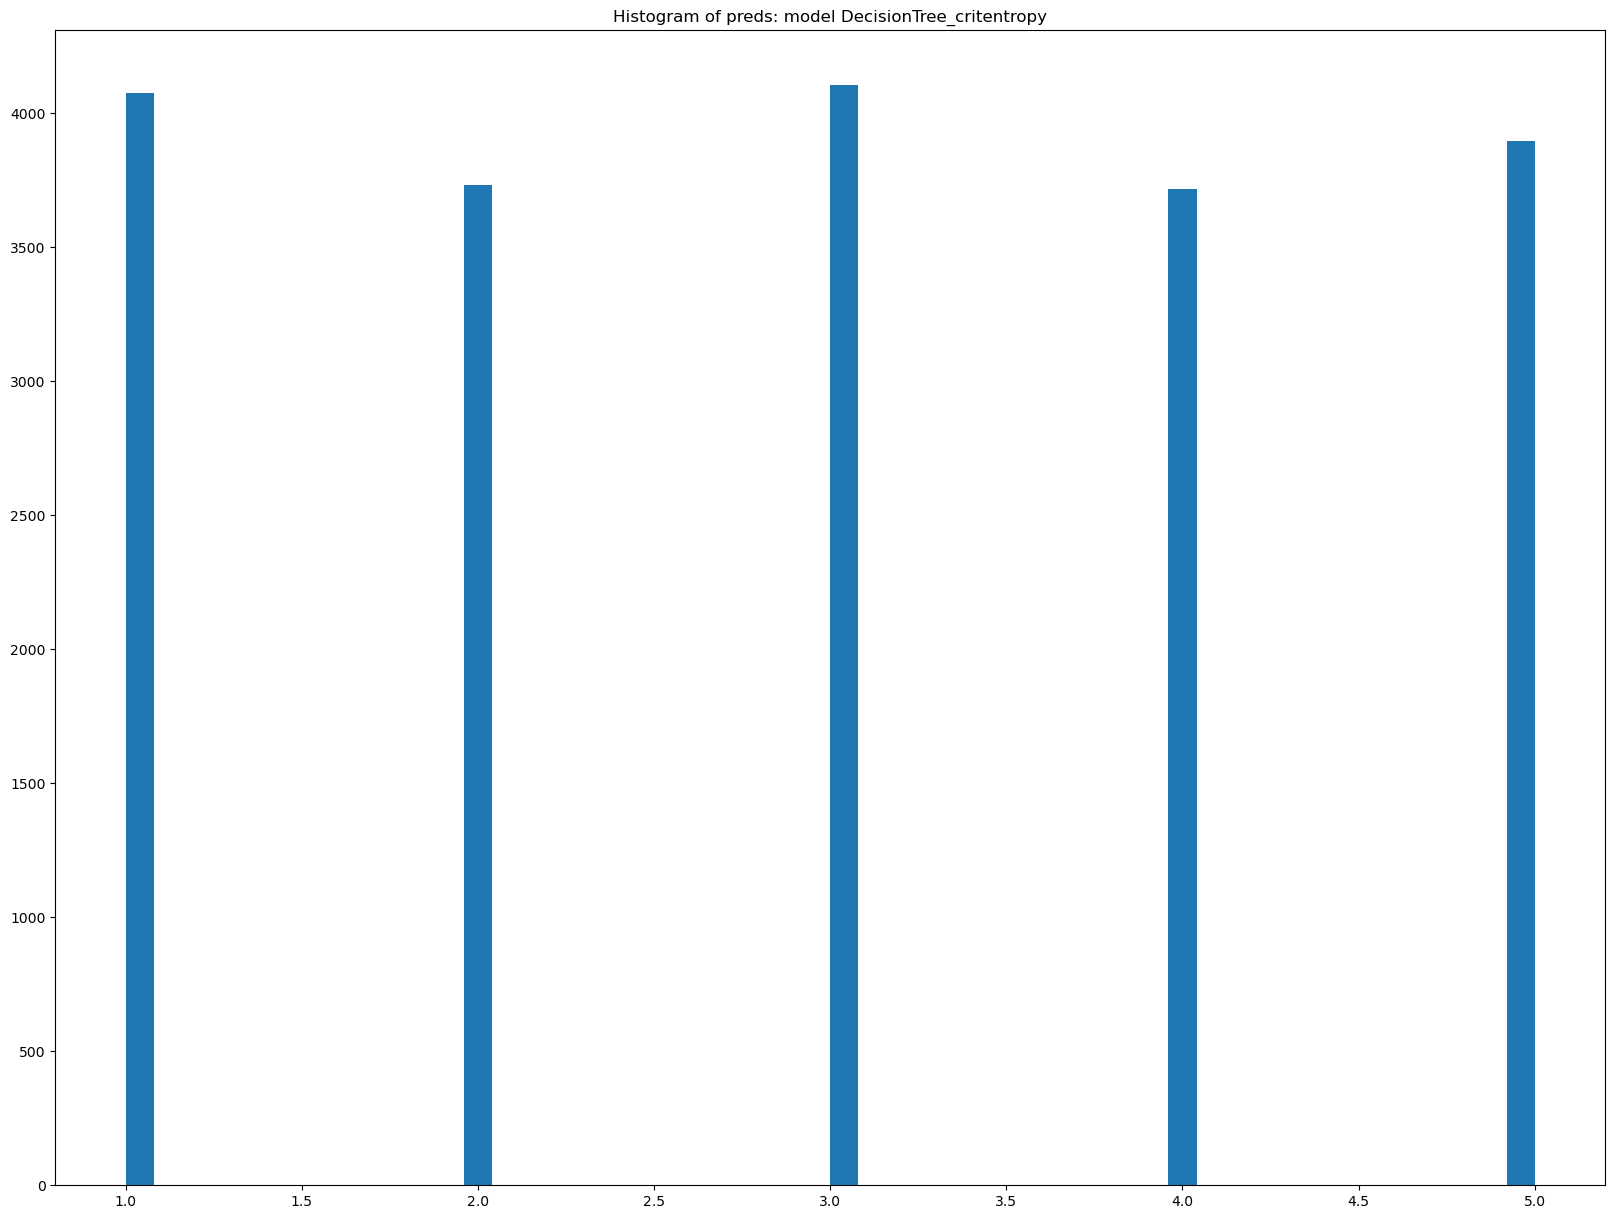

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9617
The Recall is:  0.9617
The F1 score is:  0.9617
The Matthews correlation coefficient is:  0.9521

This is the Confusion Matrix
      0     1     2     3     4
0  4039    10    13     5     6
1    10  3583    22    30   107
2    10    10  3914    82    28
3     8    29   104  3539    54
4     8    99    52    61  3701
model_number: 8
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: GaussianNB GaussianNB()


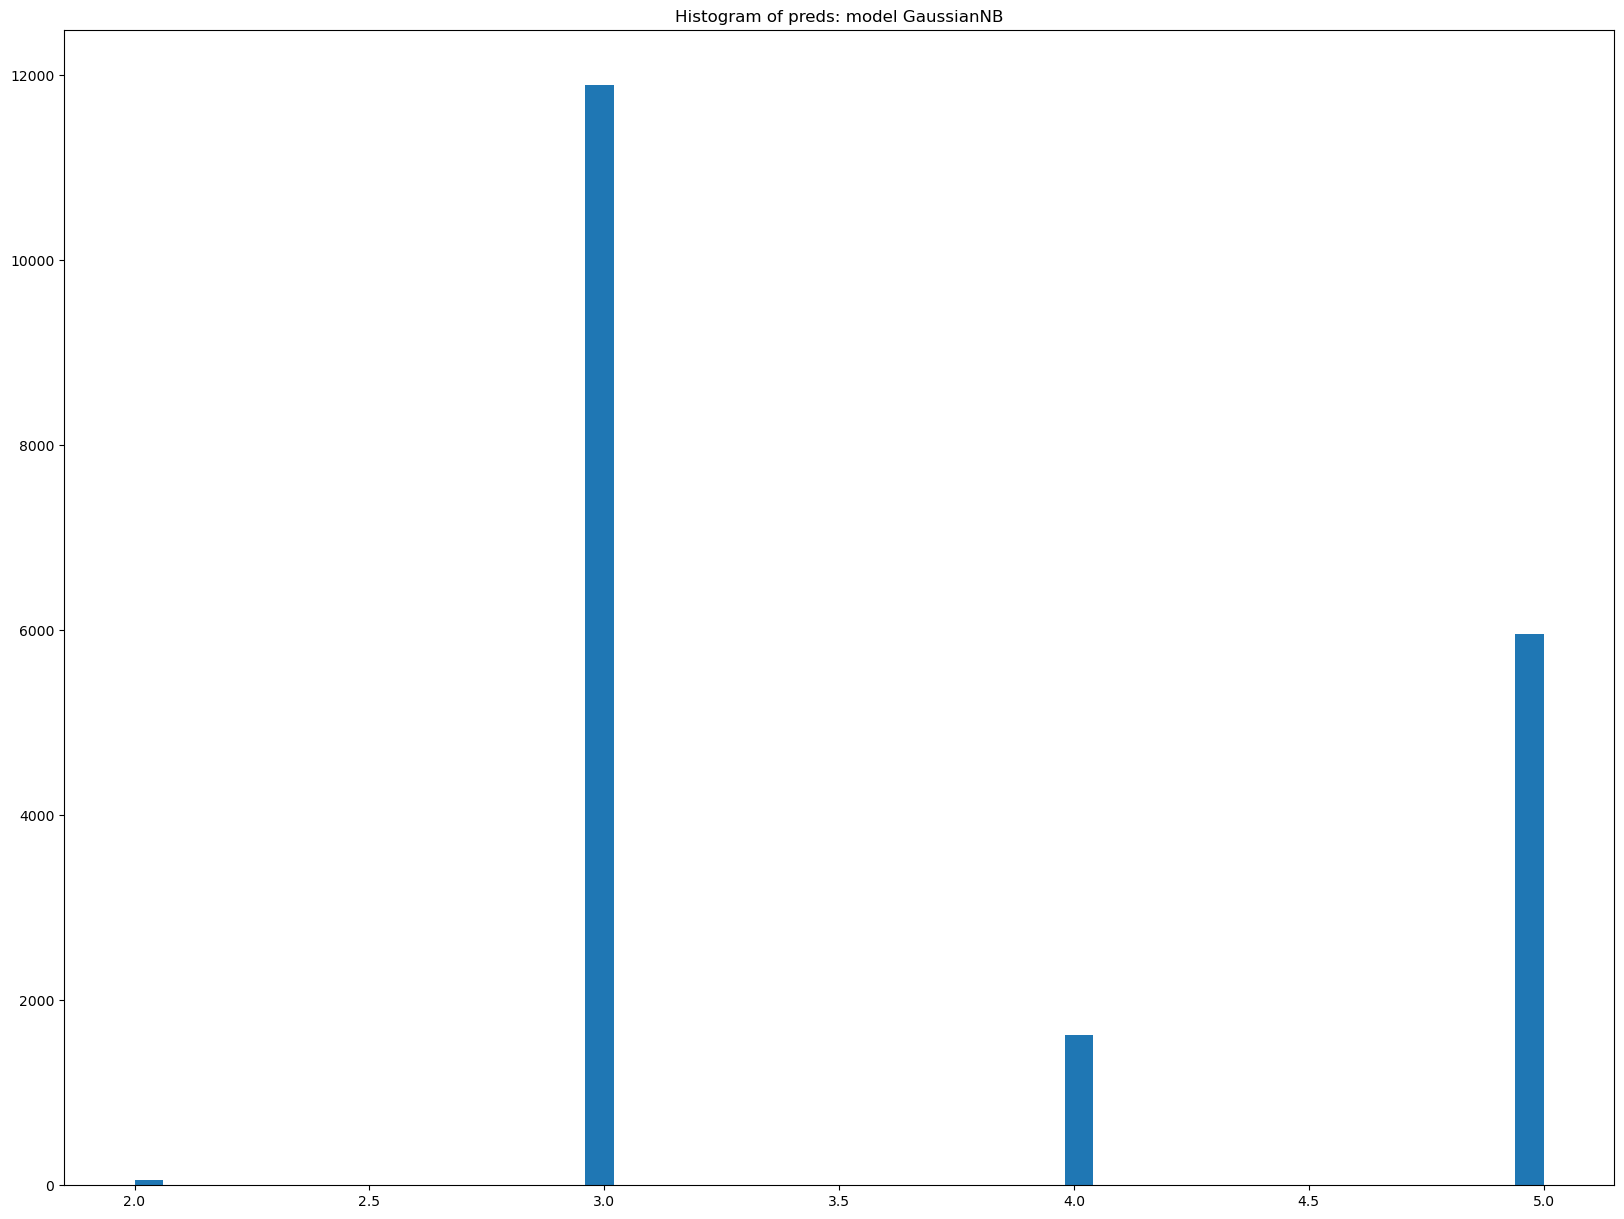

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.4176
The Recall is:  0.3714
The F1 score is:  0.2569
The Matthews correlation coefficient is:  0.2576

This is the Confusion Matrix
   0   1     2    3     4
0  0   0  4058    0    15
1  0  55   101  259  3337
2  0   0  4024   20     0
3  0   0  3153  575     6
4  0   0   554  769  2598
model_number: 9
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


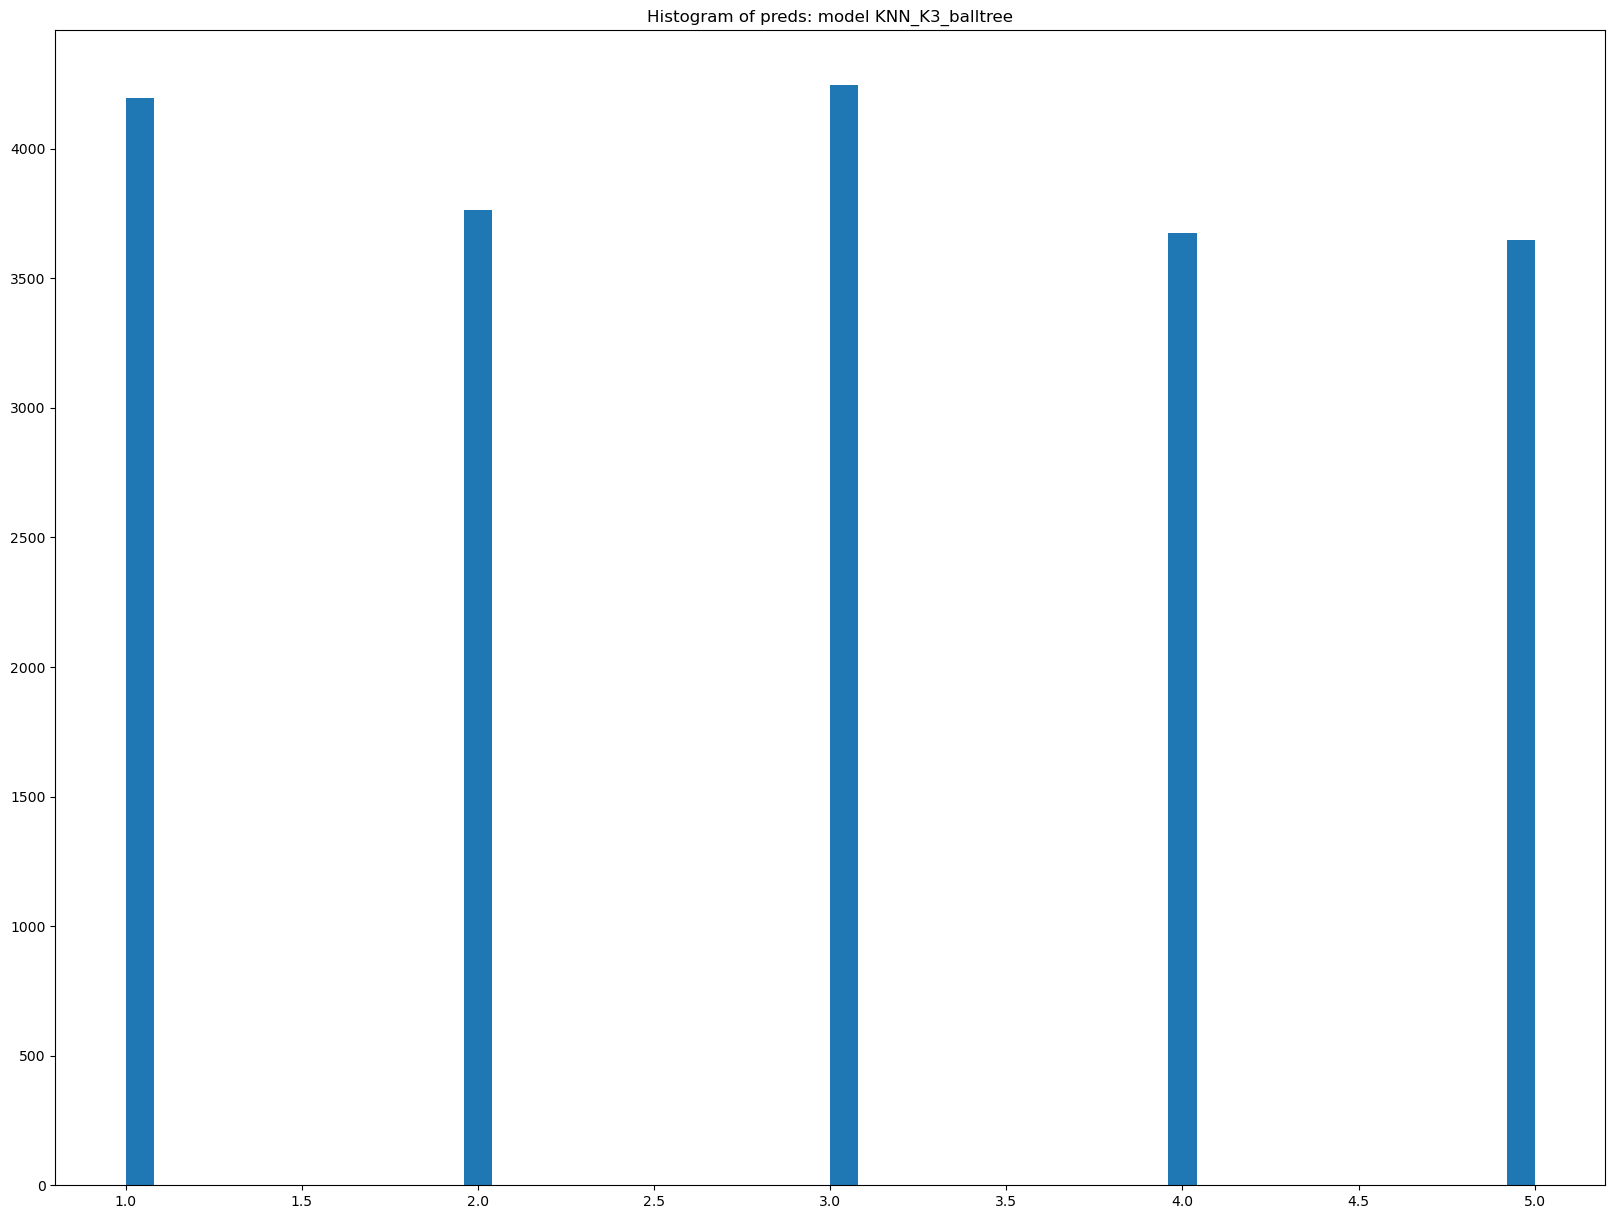

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9537
The Recall is:  0.9531
The F1 score is:  0.9530
The Matthews correlation coefficient is:  0.9416

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    23  3556    33    76    64
2    65     2  3926    50     1
3    25     9   206  3492     2
4    29   180    76    55  3581
model_number: 10
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


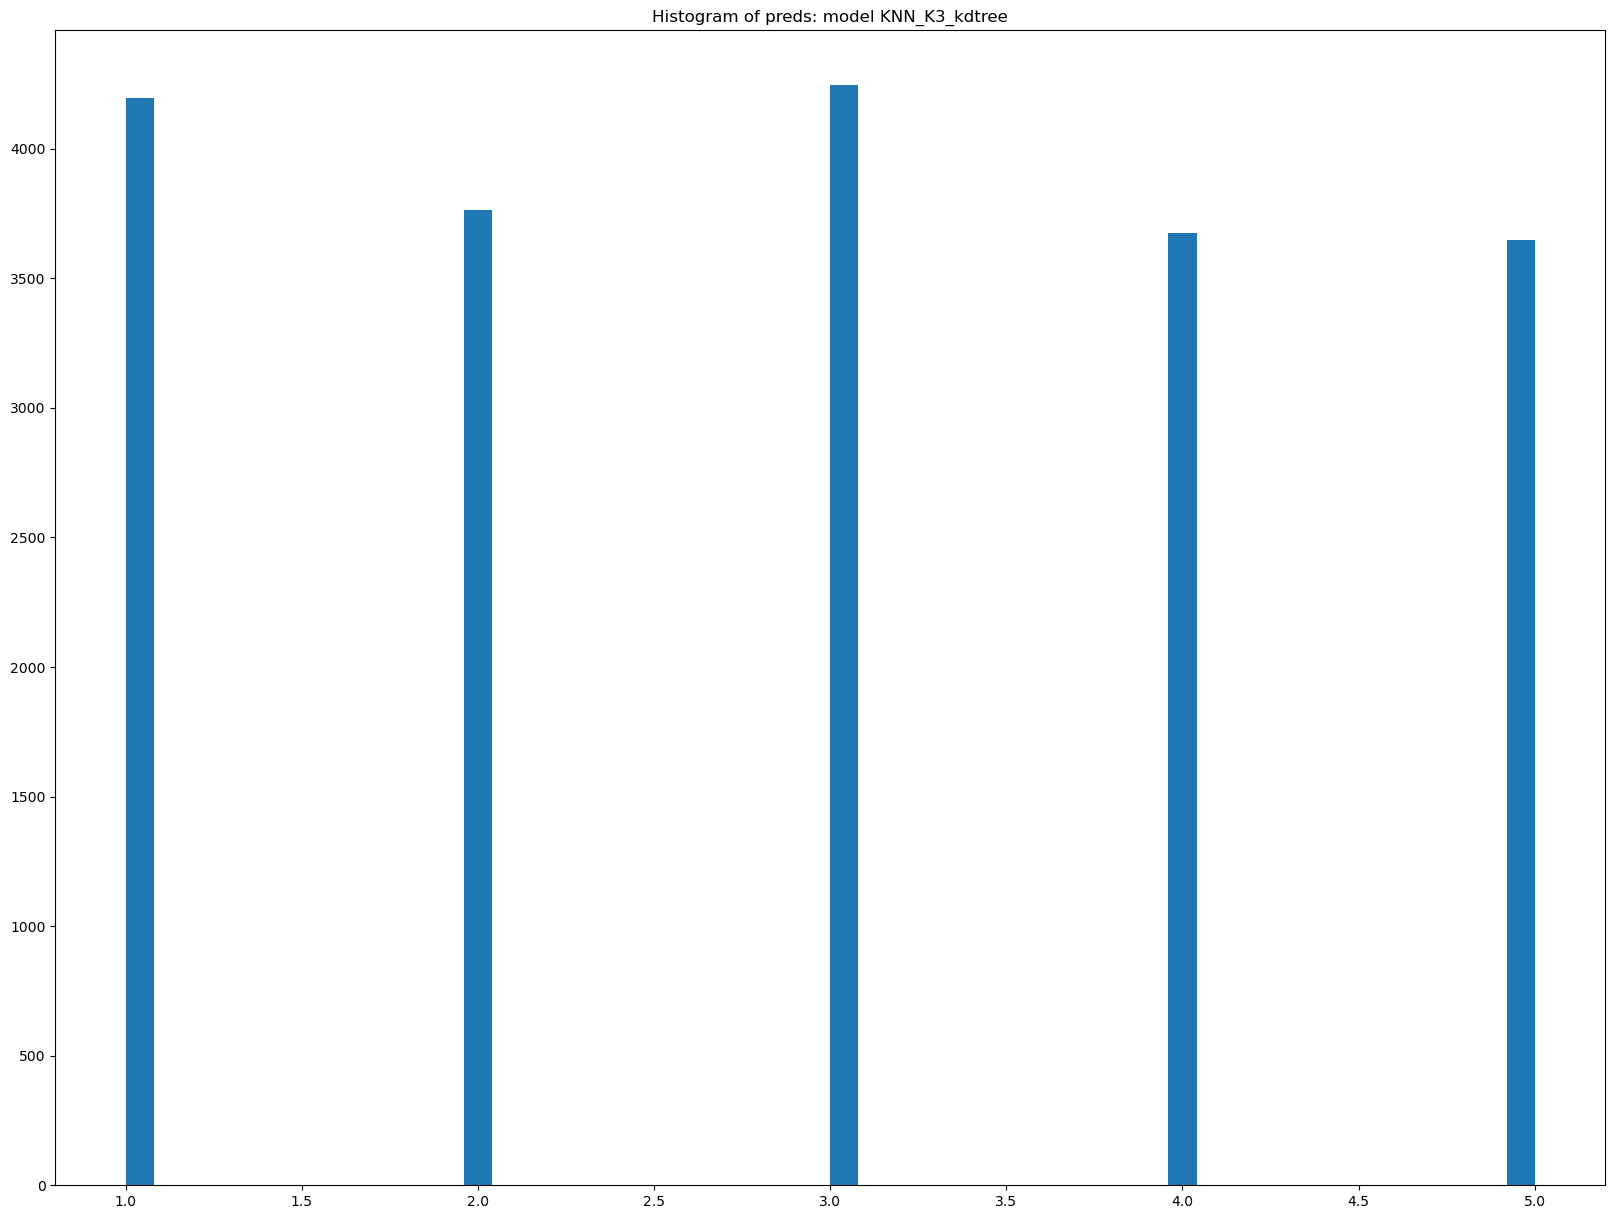

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9537
The Recall is:  0.9531
The F1 score is:  0.9530
The Matthews correlation coefficient is:  0.9416

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    23  3556    33    76    64
2    65     2  3926    50     1
3    25     9   206  3492     2
4    29   180    76    55  3581
model_number: 11
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


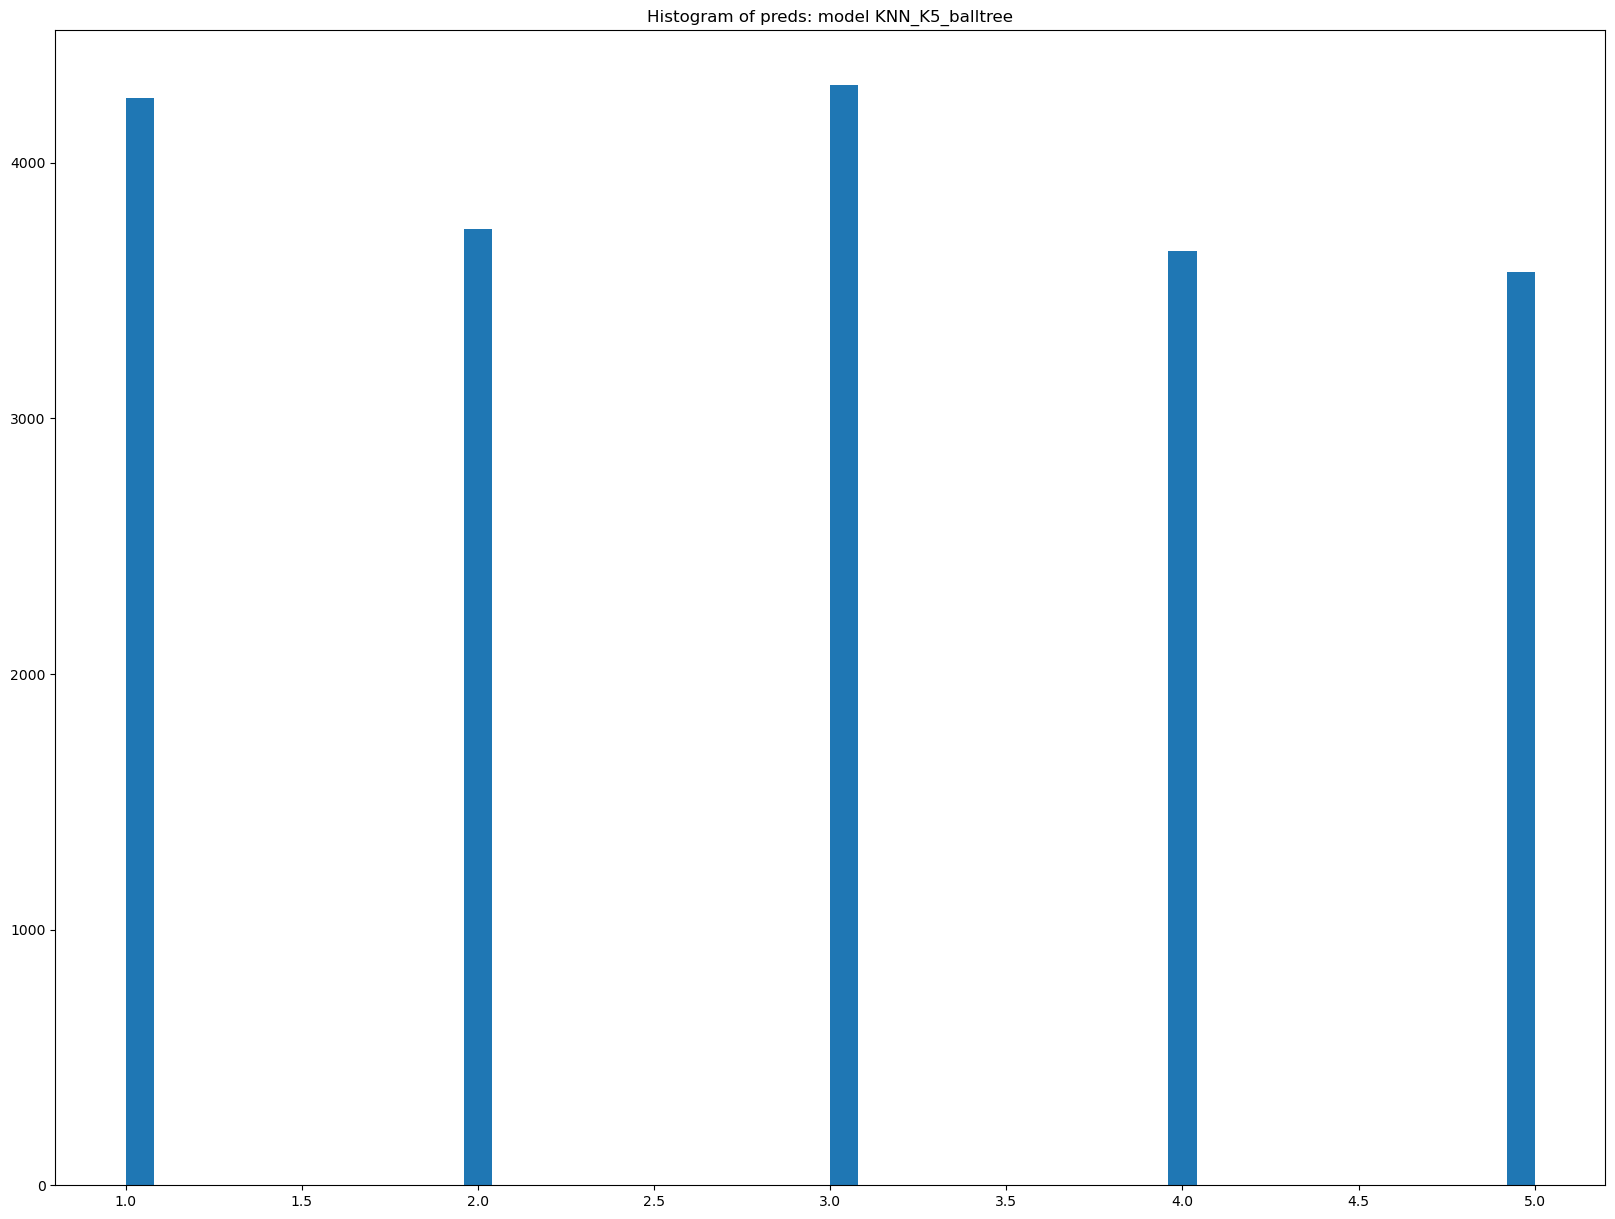

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9455
The Recall is:  0.9445
The F1 score is:  0.9443
The Matthews correlation coefficient is:  0.9309

This is the Confusion Matrix
      0     1     2     3     4
0  4055    15     3     0     0
1    21  3539    43    85    64
2    84     1  3904    54     1
3    35     6   254  3437     2
4    59   181    99    77  3505
model_number: 12
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


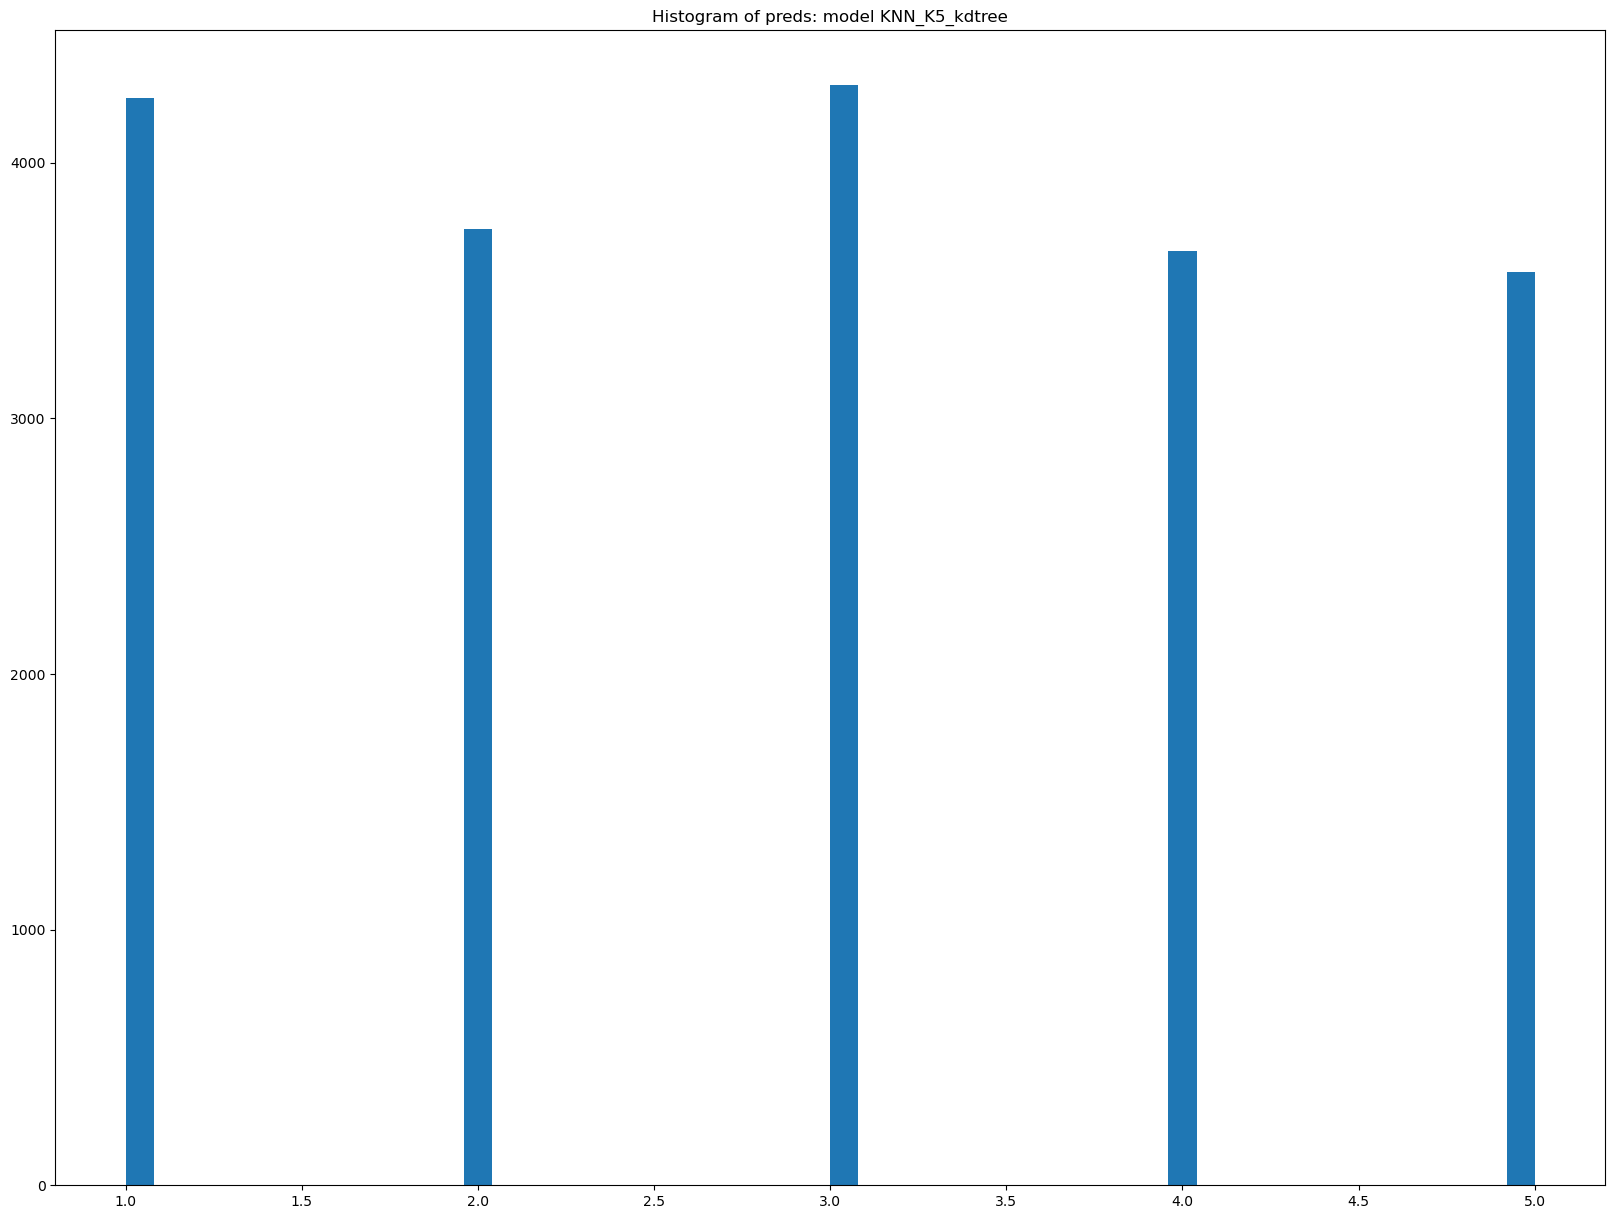

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9455
The Recall is:  0.9445
The F1 score is:  0.9443
The Matthews correlation coefficient is:  0.9309

This is the Confusion Matrix
      0     1     2     3     4
0  4055    15     3     0     0
1    21  3539    43    85    64
2    84     1  3904    54     1
3    35     6   254  3437     2
4    59   181    99    77  3505
model_number: 13
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


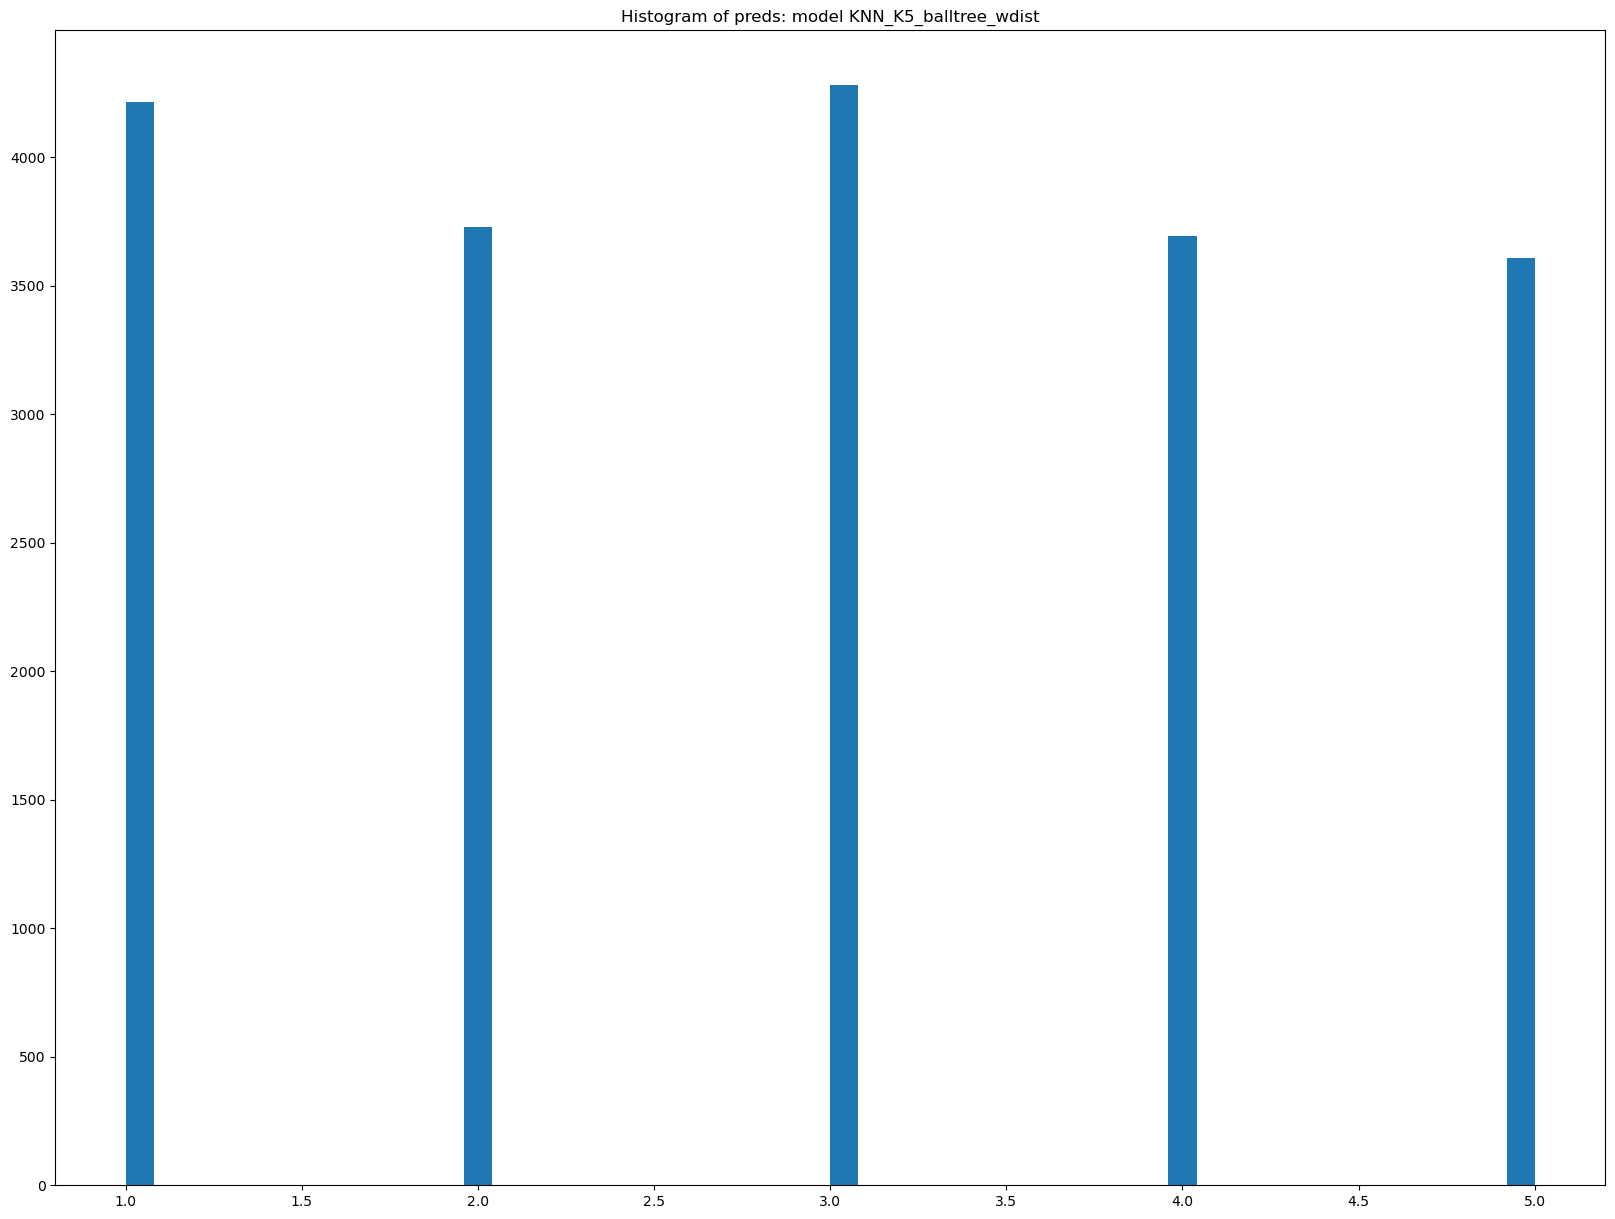

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9495
The Recall is:  0.9487
The F1 score is:  0.9486
The Matthews correlation coefficient is:  0.9361

This is the Confusion Matrix
      0     1     2     3     4
0  4055    15     3     0     0
1    18  3535    43    89    67
2    65     1  3918    59     1
3    26     4   225  3477     2
4    51   173    90    69  3538
model_number: 14
Scaler: MinMaxScaler MinMaxScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


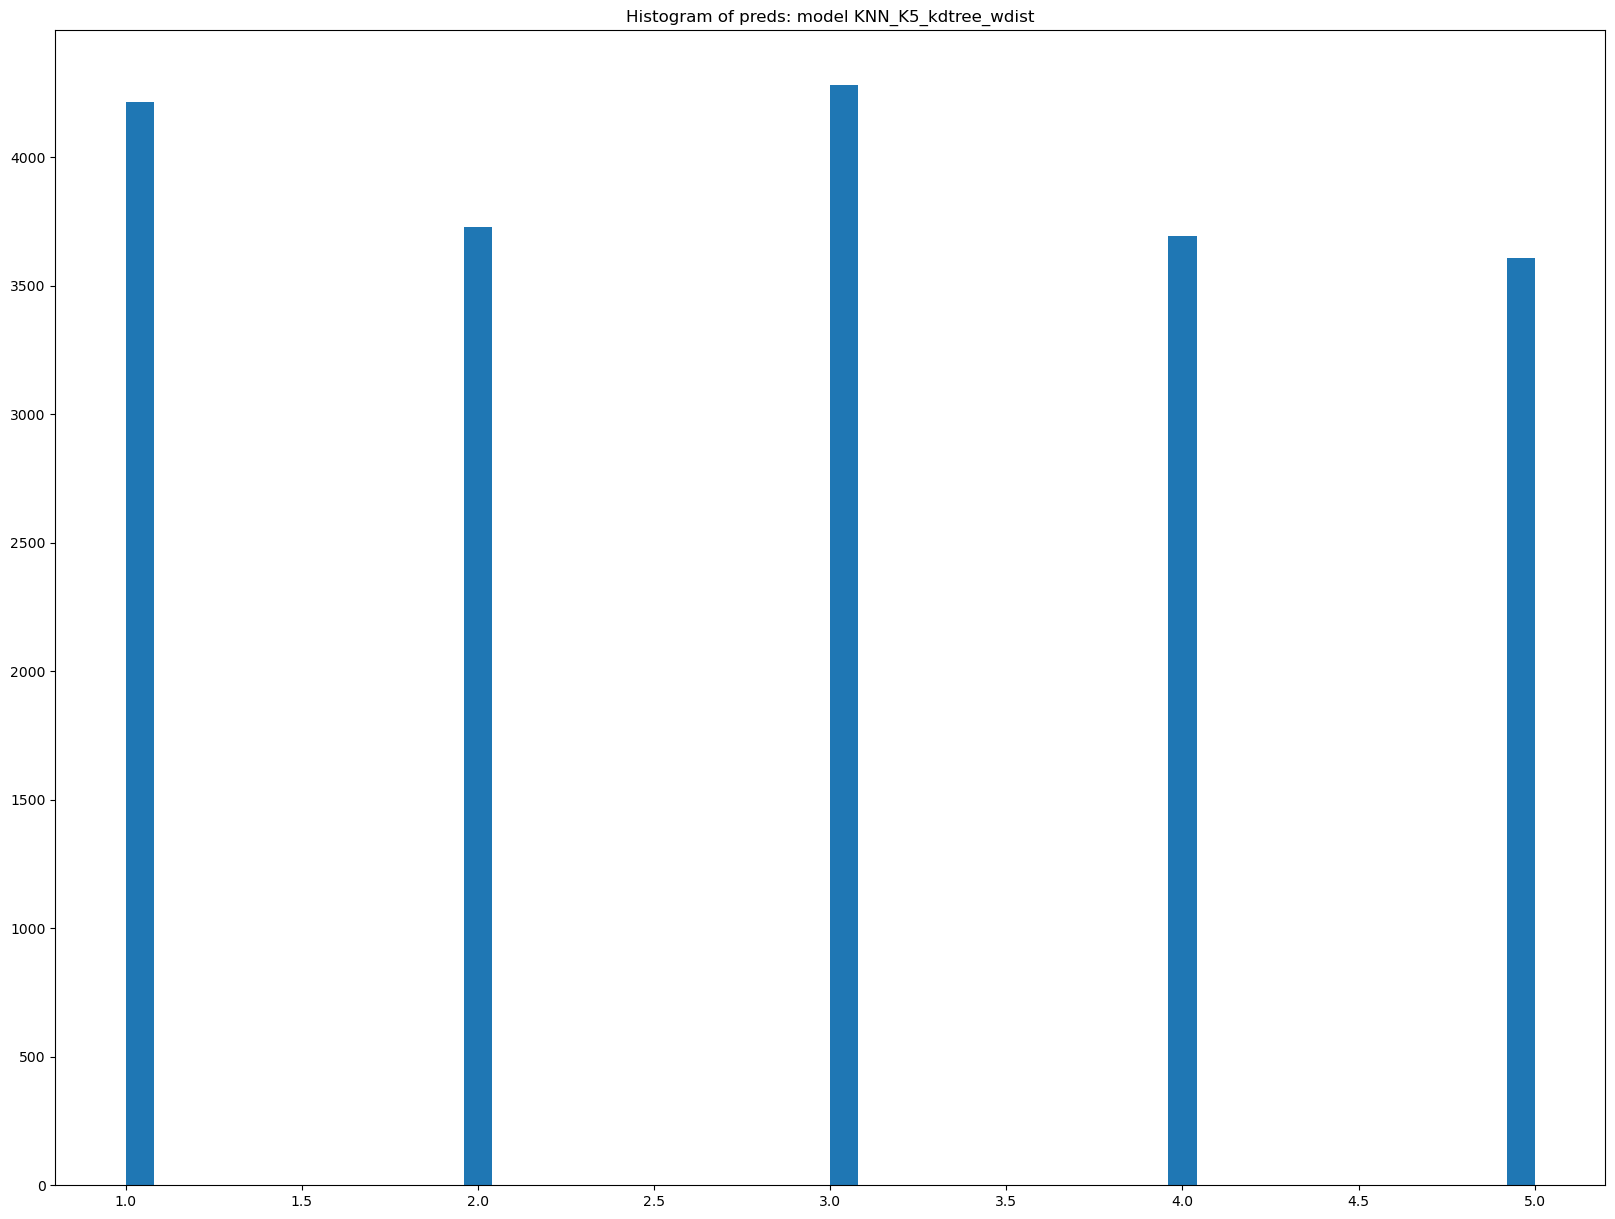

Scaler: MinMaxScaler() imputer: SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9495
The Recall is:  0.9487
The F1 score is:  0.9486
The Matthews correlation coefficient is:  0.9361

This is the Confusion Matrix
      0     1     2     3     4
0  4055    15     3     0     0
1    18  3535    43    89    67
2    65     1  3918    59     1
3    26     4   225  3477     2
4    51   173    90    69  3538
model_number: 15
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: RandomForest RandomForestClassifier()


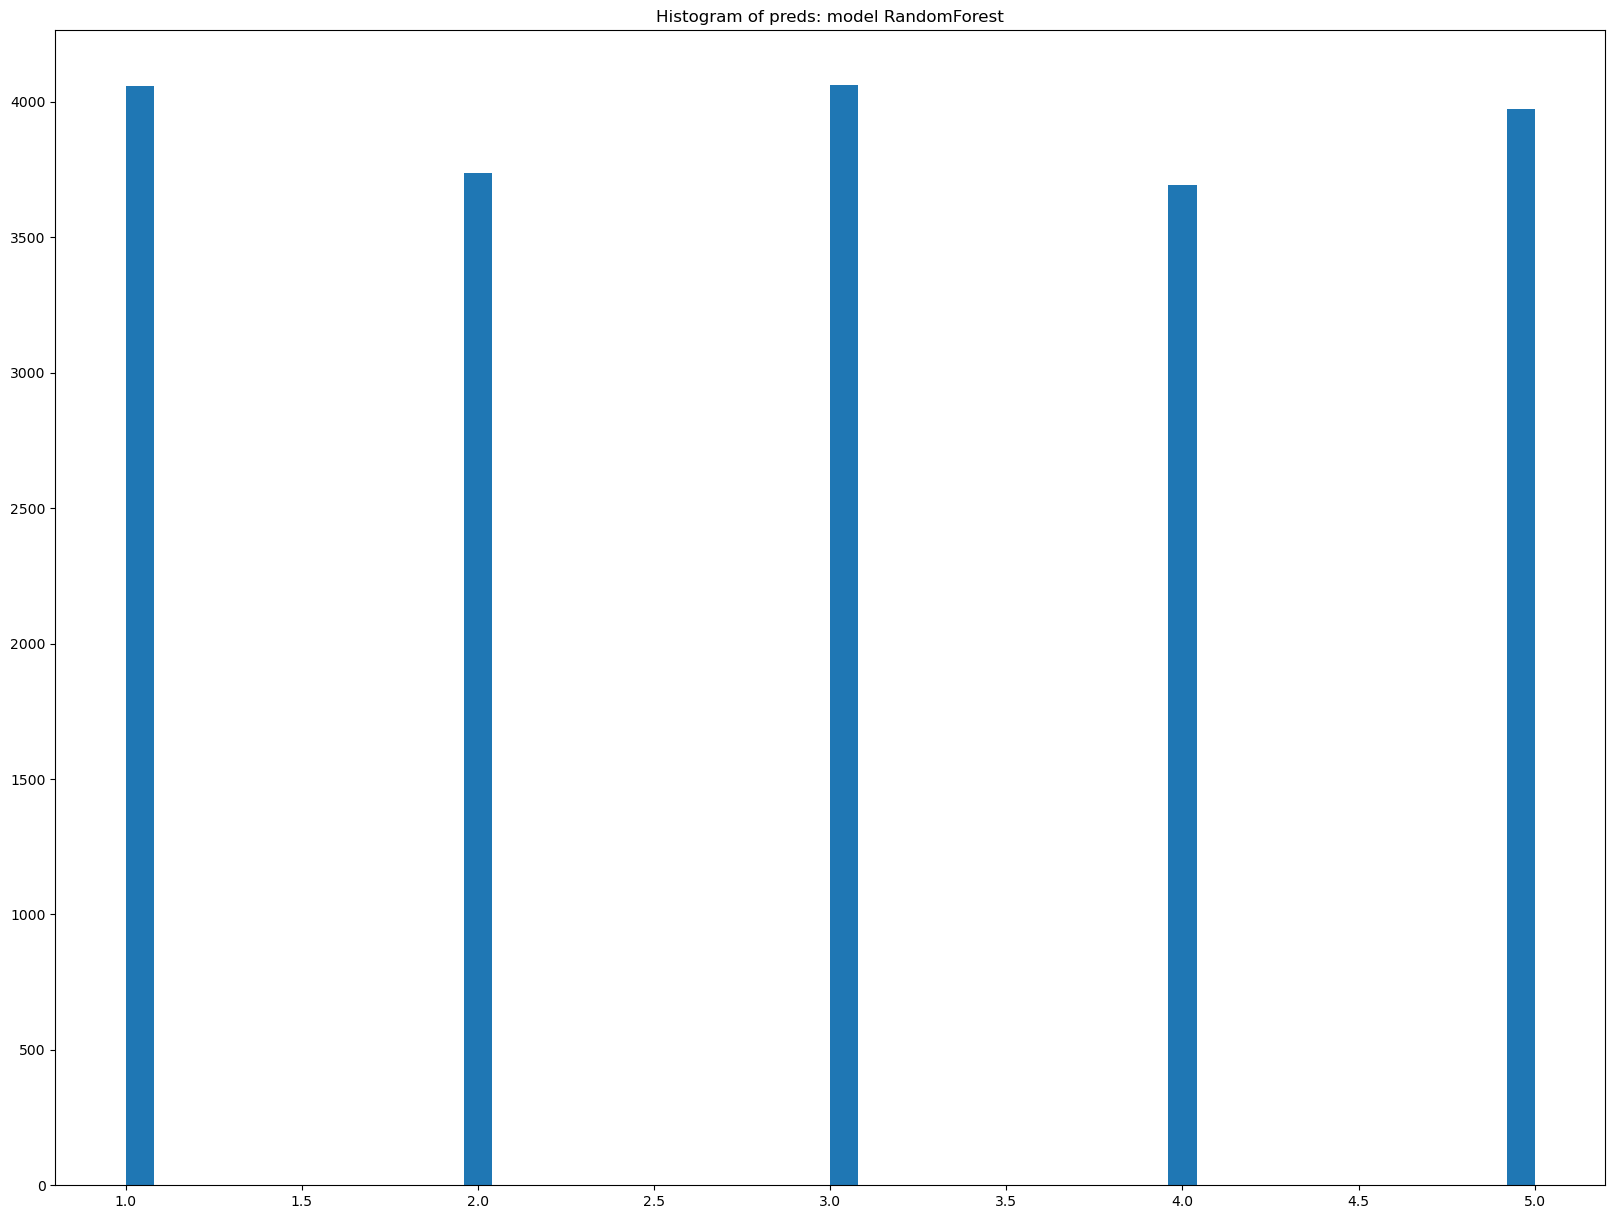

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9862
The Recall is:  0.9862
The F1 score is:  0.9862
The Matthews correlation coefficient is:  0.9827

This is the Confusion Matrix
      0     1     2     3     4
0  4045    17    10     0     1
1     2  3670    22    22    36
2    12     7  3987    19    19
3     1    29    40  3649    15
4     0    13     2     3  3903
model_number: 16
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree DecisionTreeClassifier()


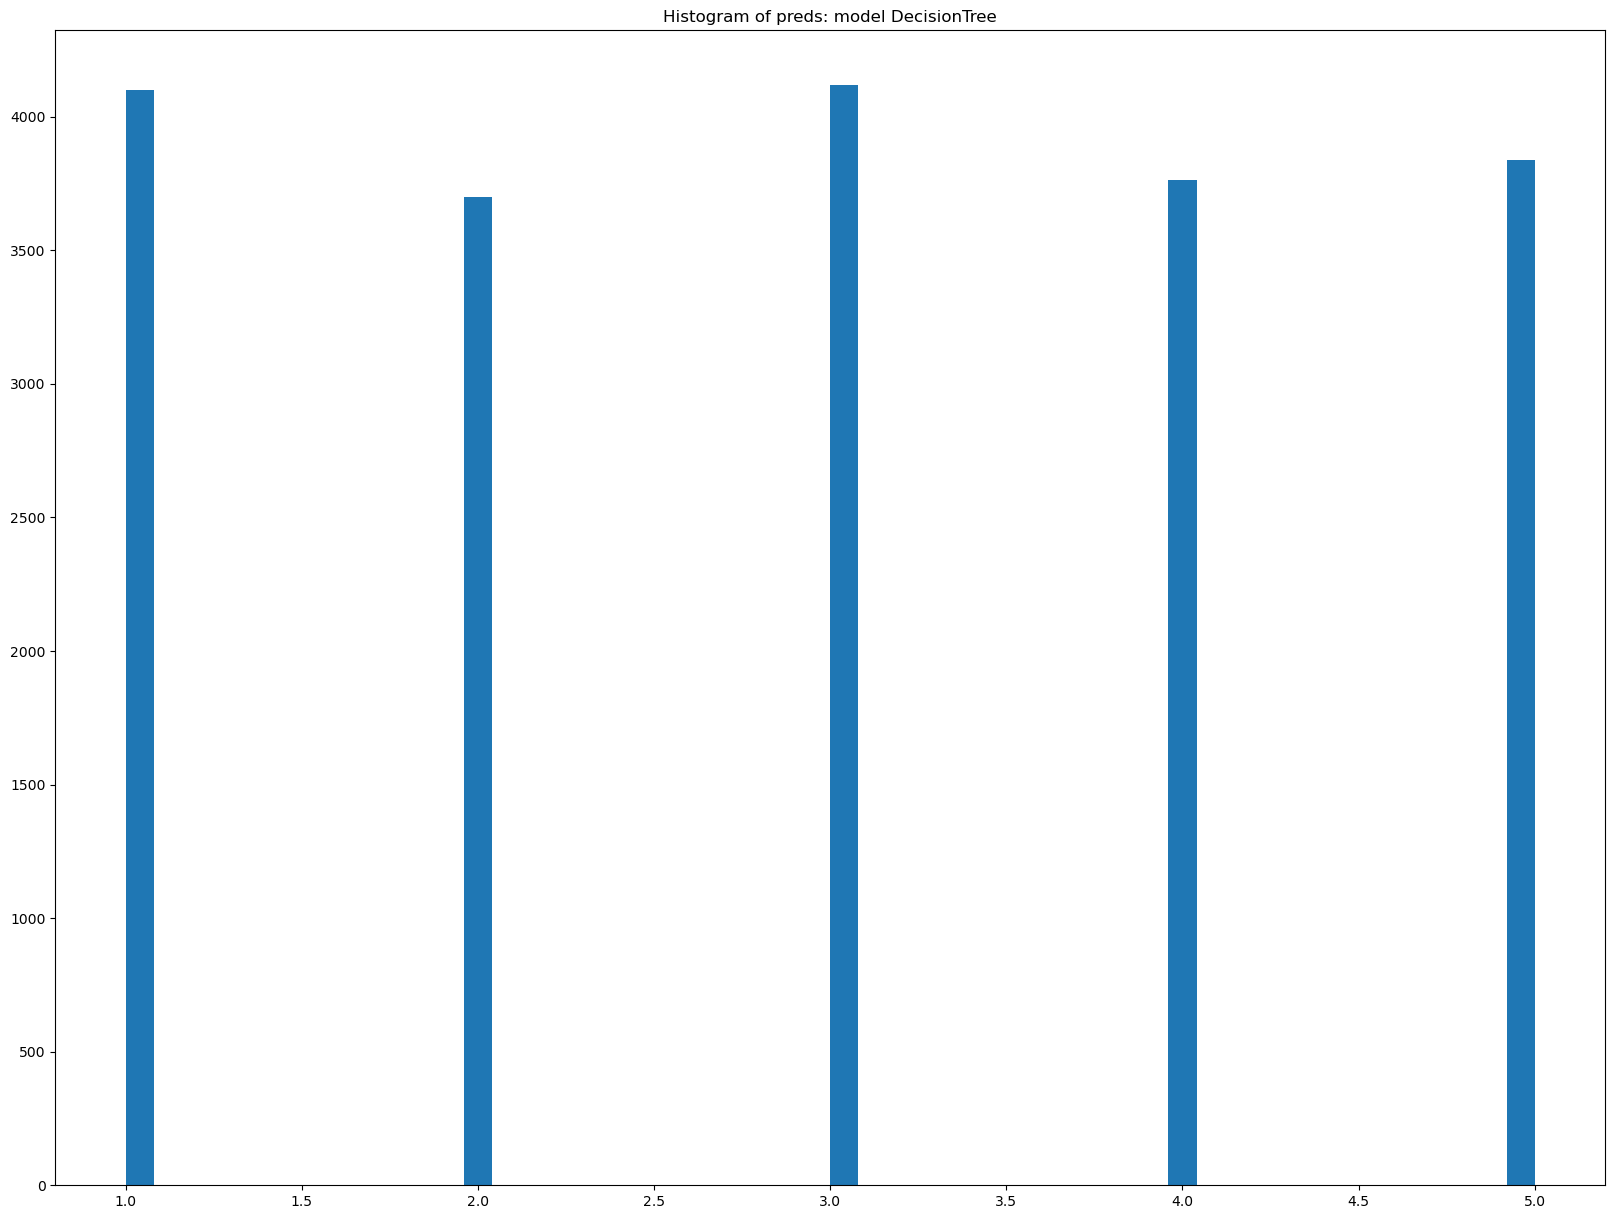

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9017
The Recall is:  0.9019
The F1 score is:  0.9017
The Matthews correlation coefficient is:  0.8773

This is the Confusion Matrix
      0     1     2     3     4
0  3978    19    33    15    28
1    17  3290    92   152   201
2    39    54  3674   176   101
3    22   117   190  3281   124
4    46   220   129   141  3385
model_number: 17
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


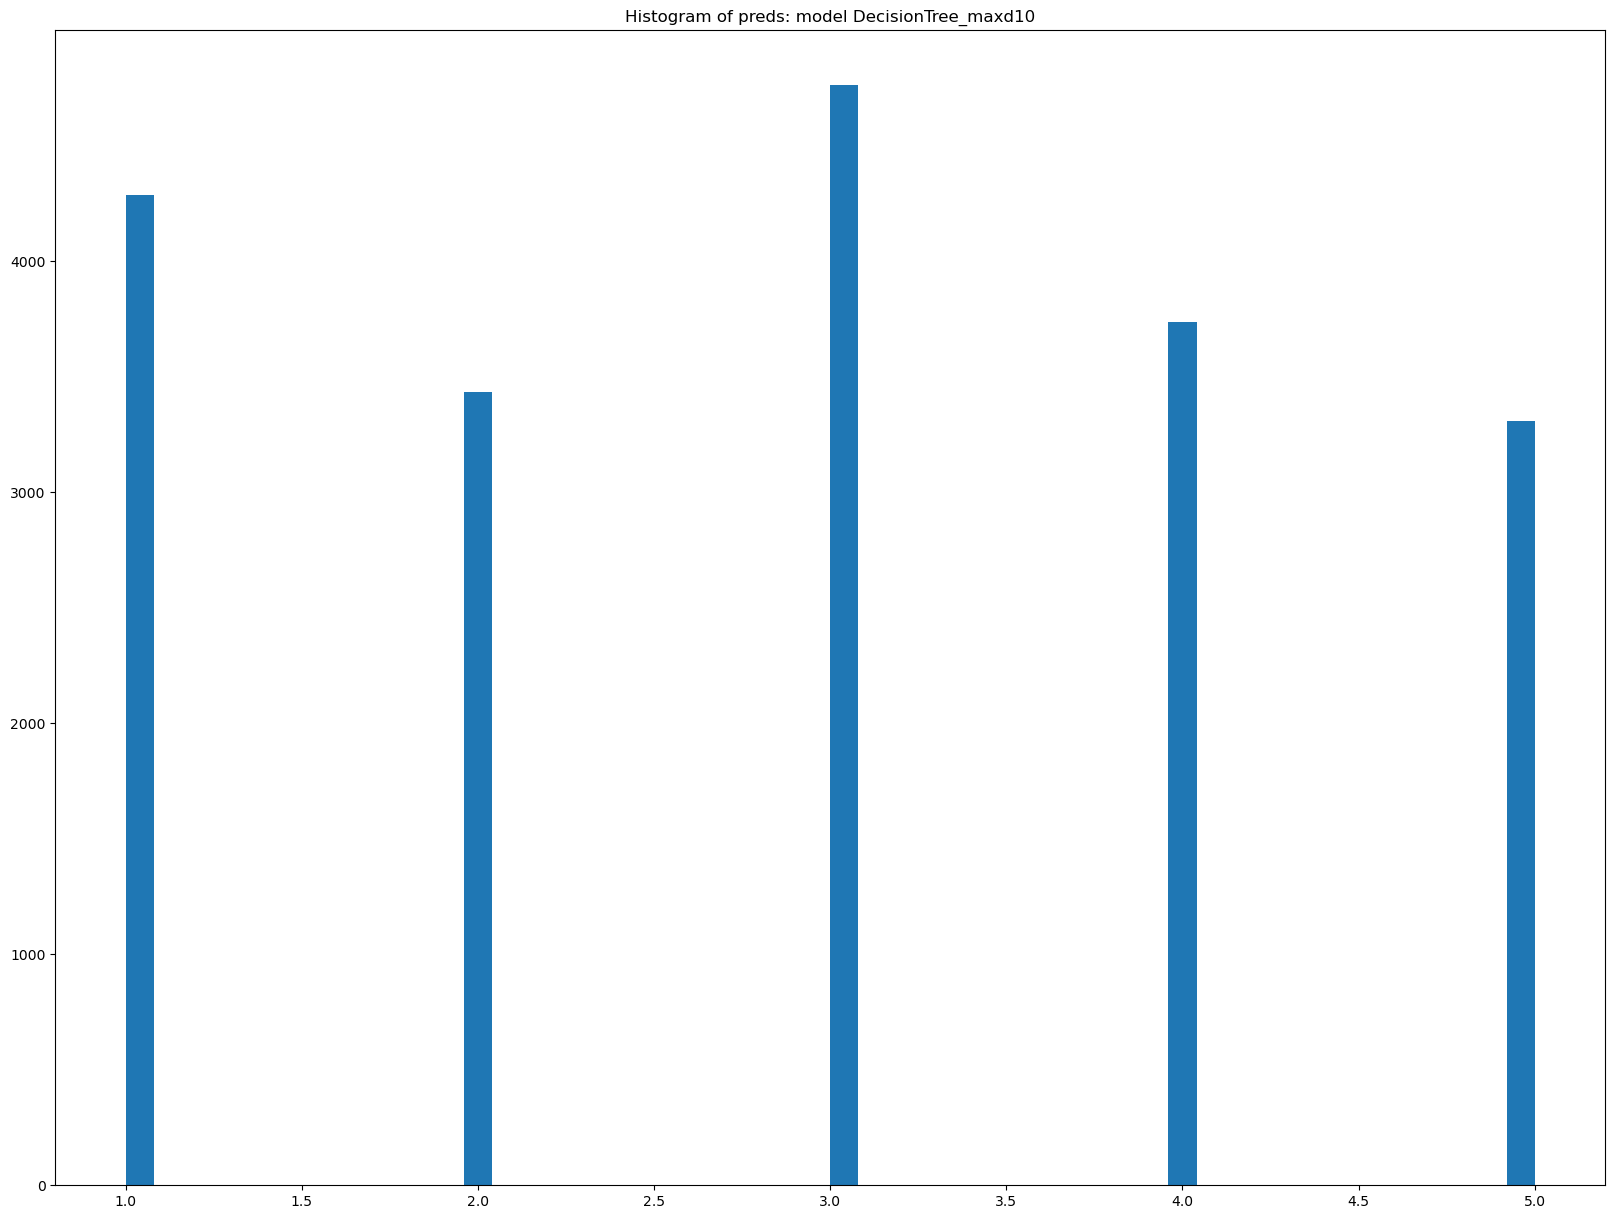

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8053
The Recall is:  0.8008
The F1 score is:  0.8004
The Matthews correlation coefficient is:  0.7520

This is the Confusion Matrix
      0     1     2     3     4
0  3713    26   201    53    80
1    85  2955   217   305   190
2   205    56  3421   252   110
3   138   142   539  2765   150
4   144   253   383   361  2780
model_number: 18
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


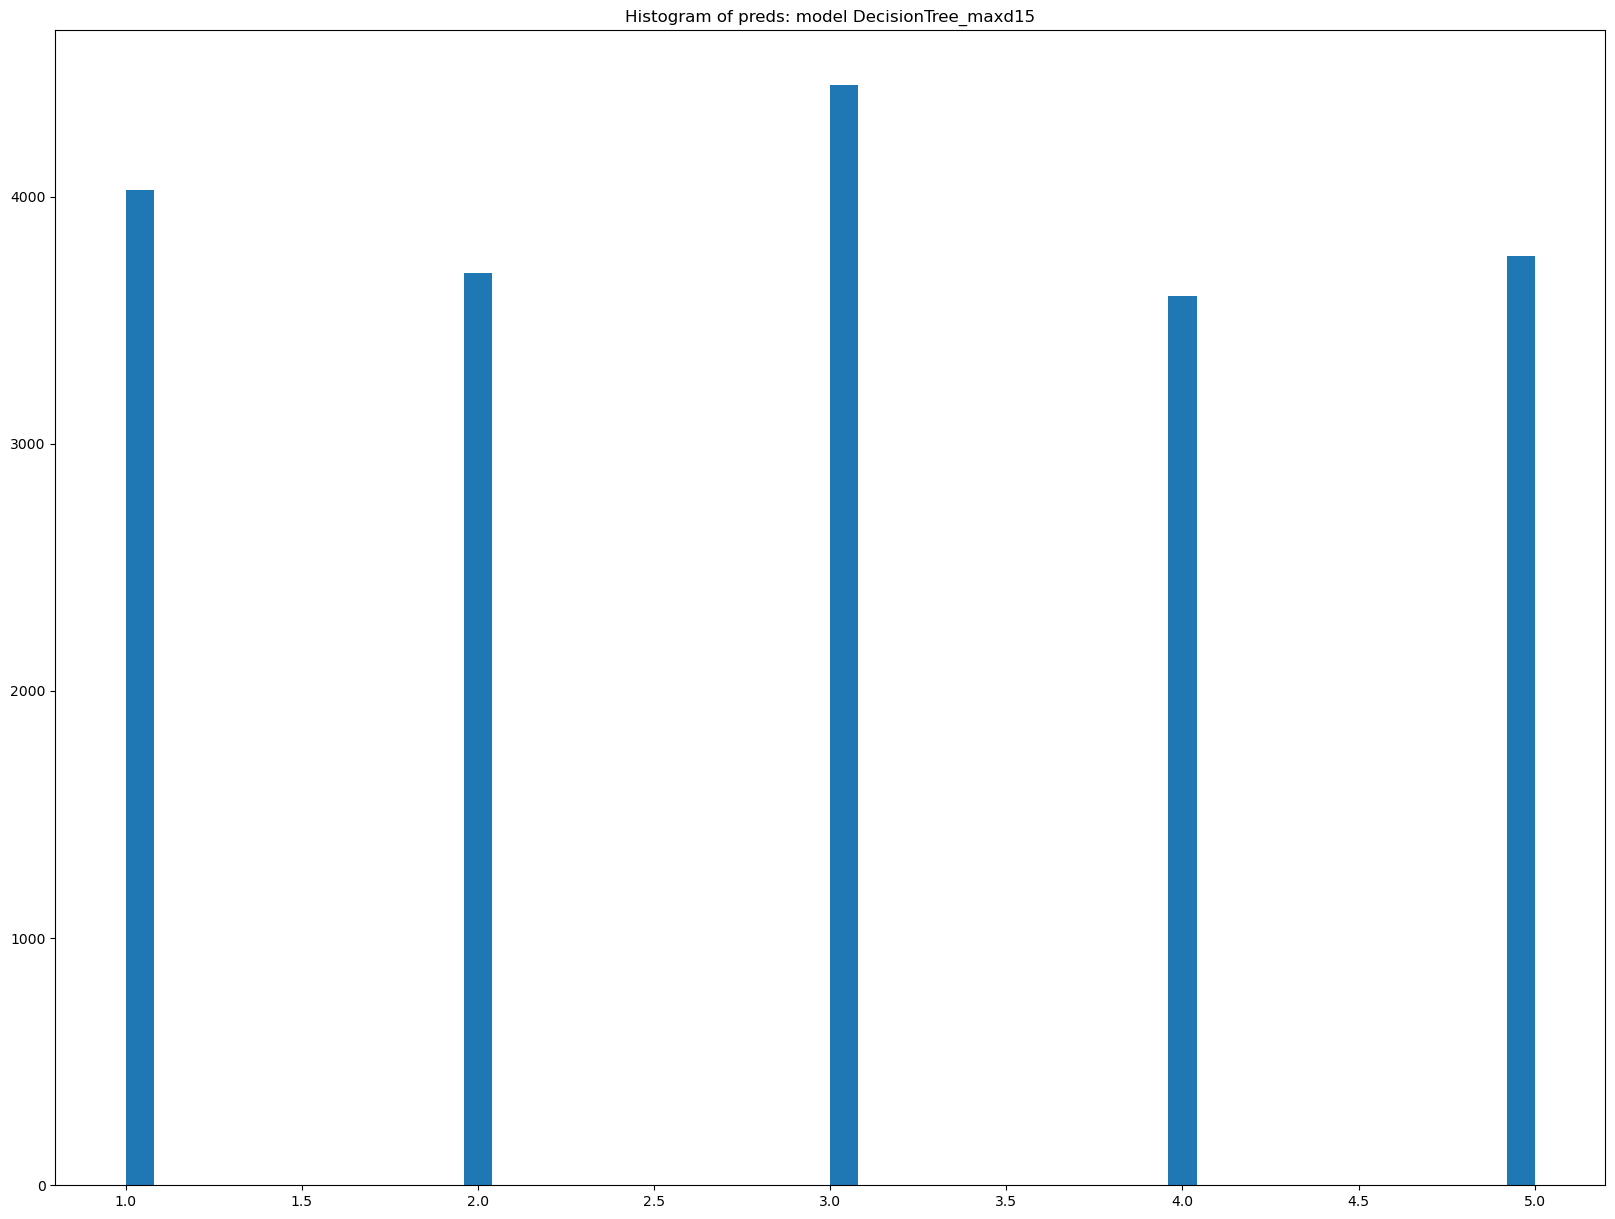

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8834
The Recall is:  0.8822
The F1 score is:  0.8822
The Matthews correlation coefficient is:  0.8530

This is the Confusion Matrix
      0     1     2     3     4
0  3902    17    81    31    42
1    10  3266   159   129   188
2    50    51  3671   181    91
3    26   145   308  3101   154
4    40   211   231   155  3284
model_number: 19
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


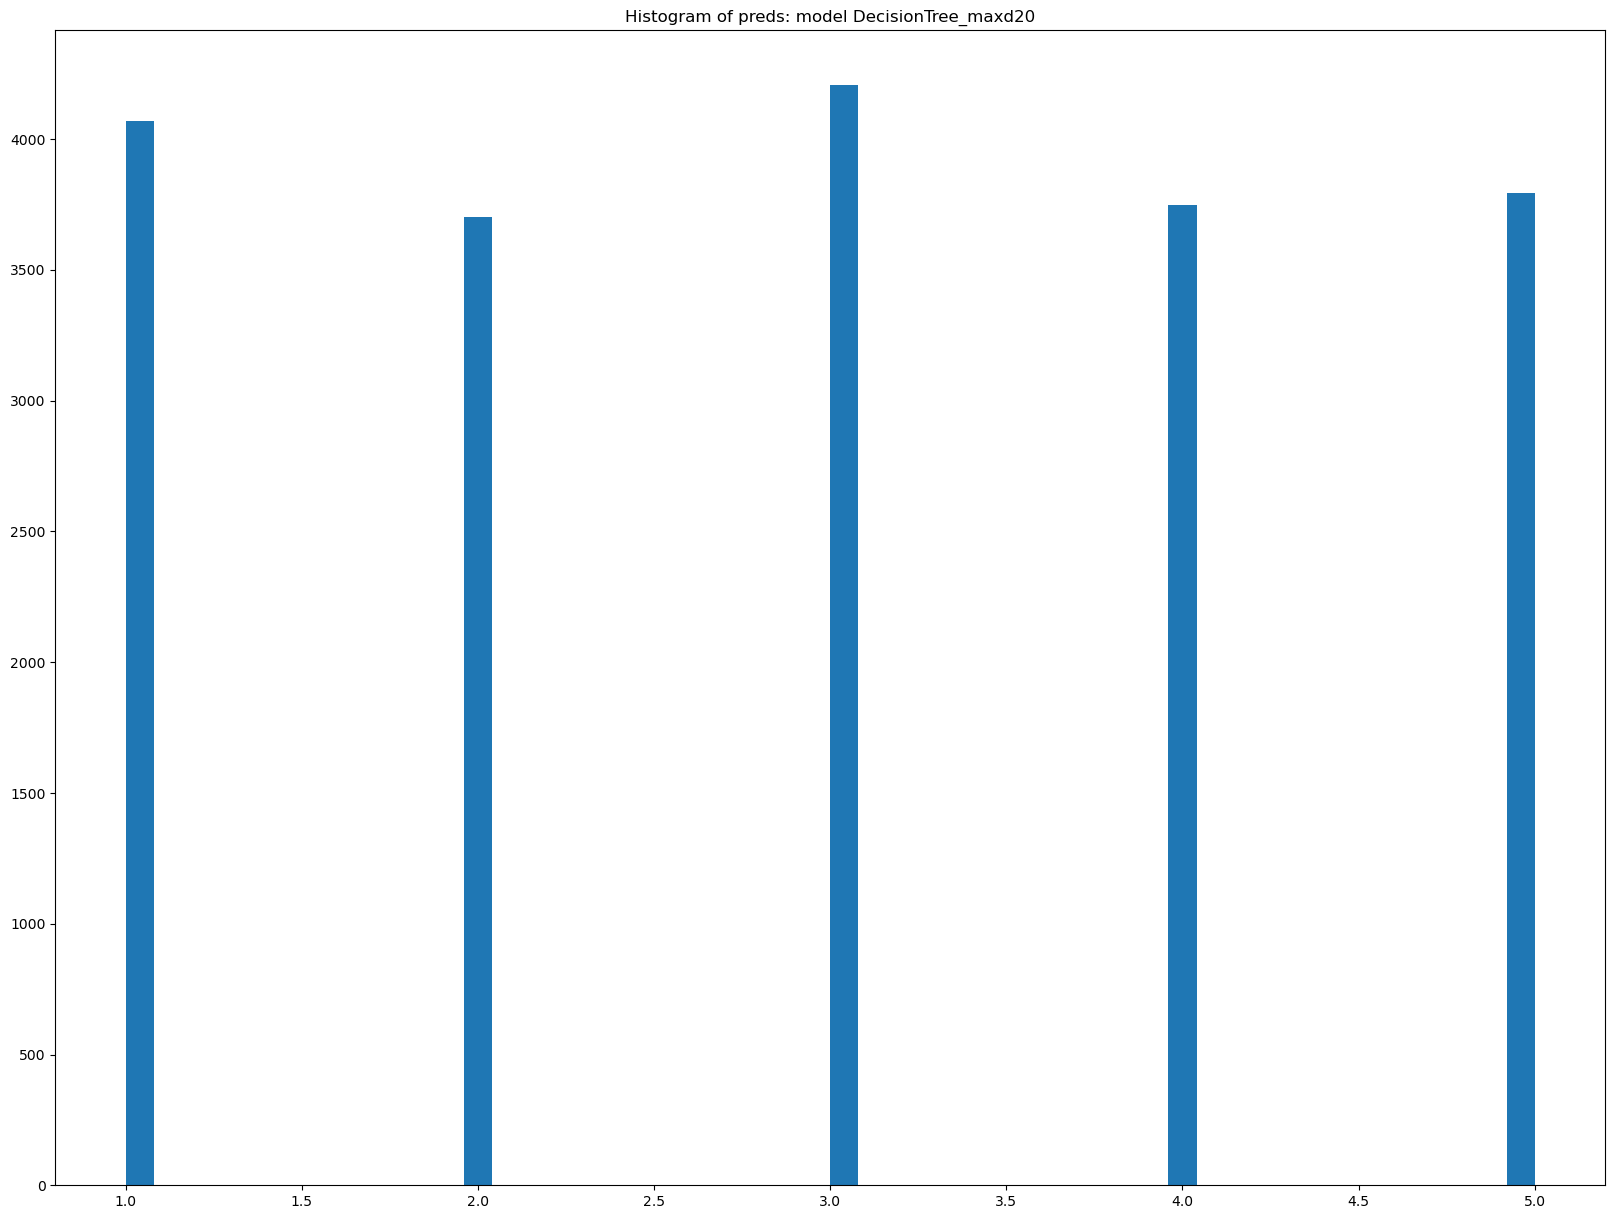

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9008
The Recall is:  0.9007
The F1 score is:  0.9007
The Matthews correlation coefficient is:  0.8759

This is the Confusion Matrix
      0     1     2     3     4
0  3952    21    52    17    31
1    17  3310    95   146   184
2    31    48  3704   172    89
3    23   114   218  3254   125
4    47   210   137   161  3366
model_number: 20
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


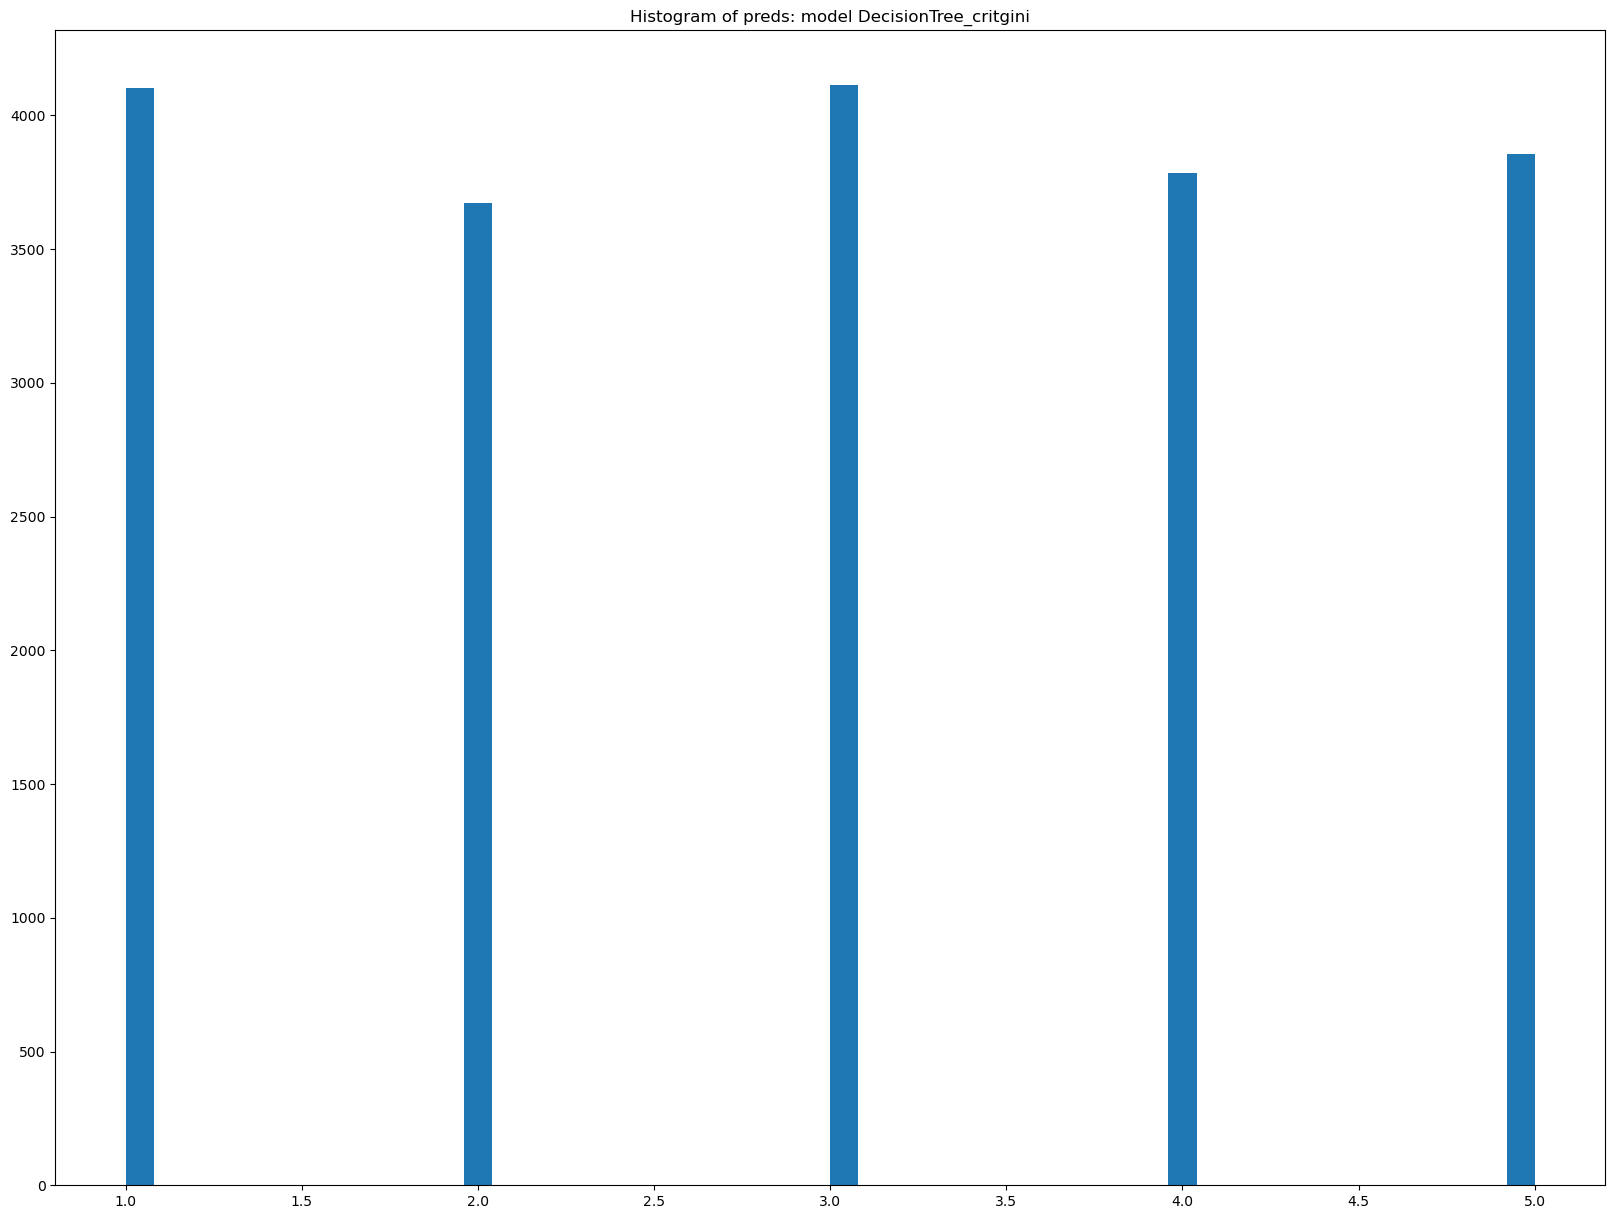

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9037
The Recall is:  0.9037
The F1 score is:  0.9036
The Matthews correlation coefficient is:  0.8796

This is the Confusion Matrix
      0     1     2     3     4
0  3975    19    28    18    33
1    21  3299    94   151   187
2    34    51  3670   184   105
3    23   110   197  3287   117
4    49   193   123   143  3413
model_number: 21
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


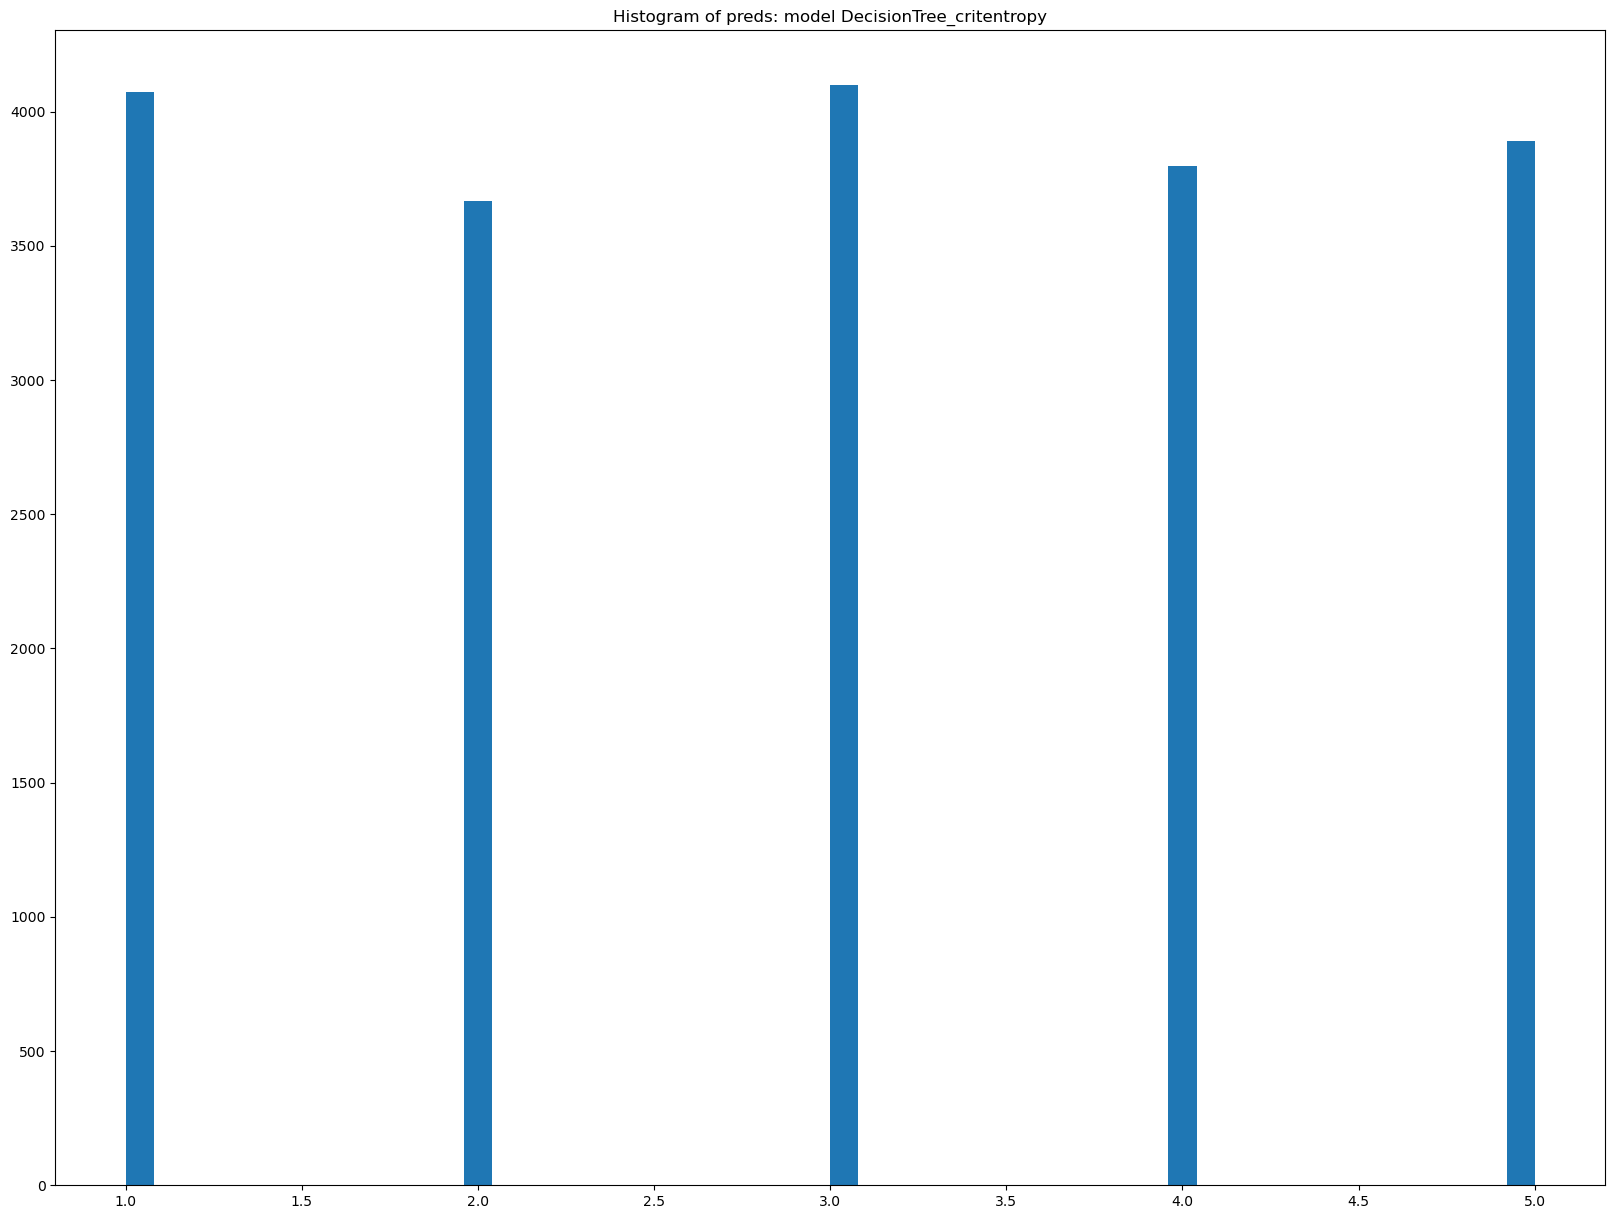

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9169
The Recall is:  0.9168
The F1 score is:  0.9168
The Matthews correlation coefficient is:  0.8960

This is the Confusion Matrix
      0     1     2     3     4
0  3996    17    19    13    28
1    15  3335    74   148   180
2    26    41  3737   160    80
3    18   107   158  3341   110
4    19   166   110   135  3491
model_number: 22
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: GaussianNB GaussianNB()


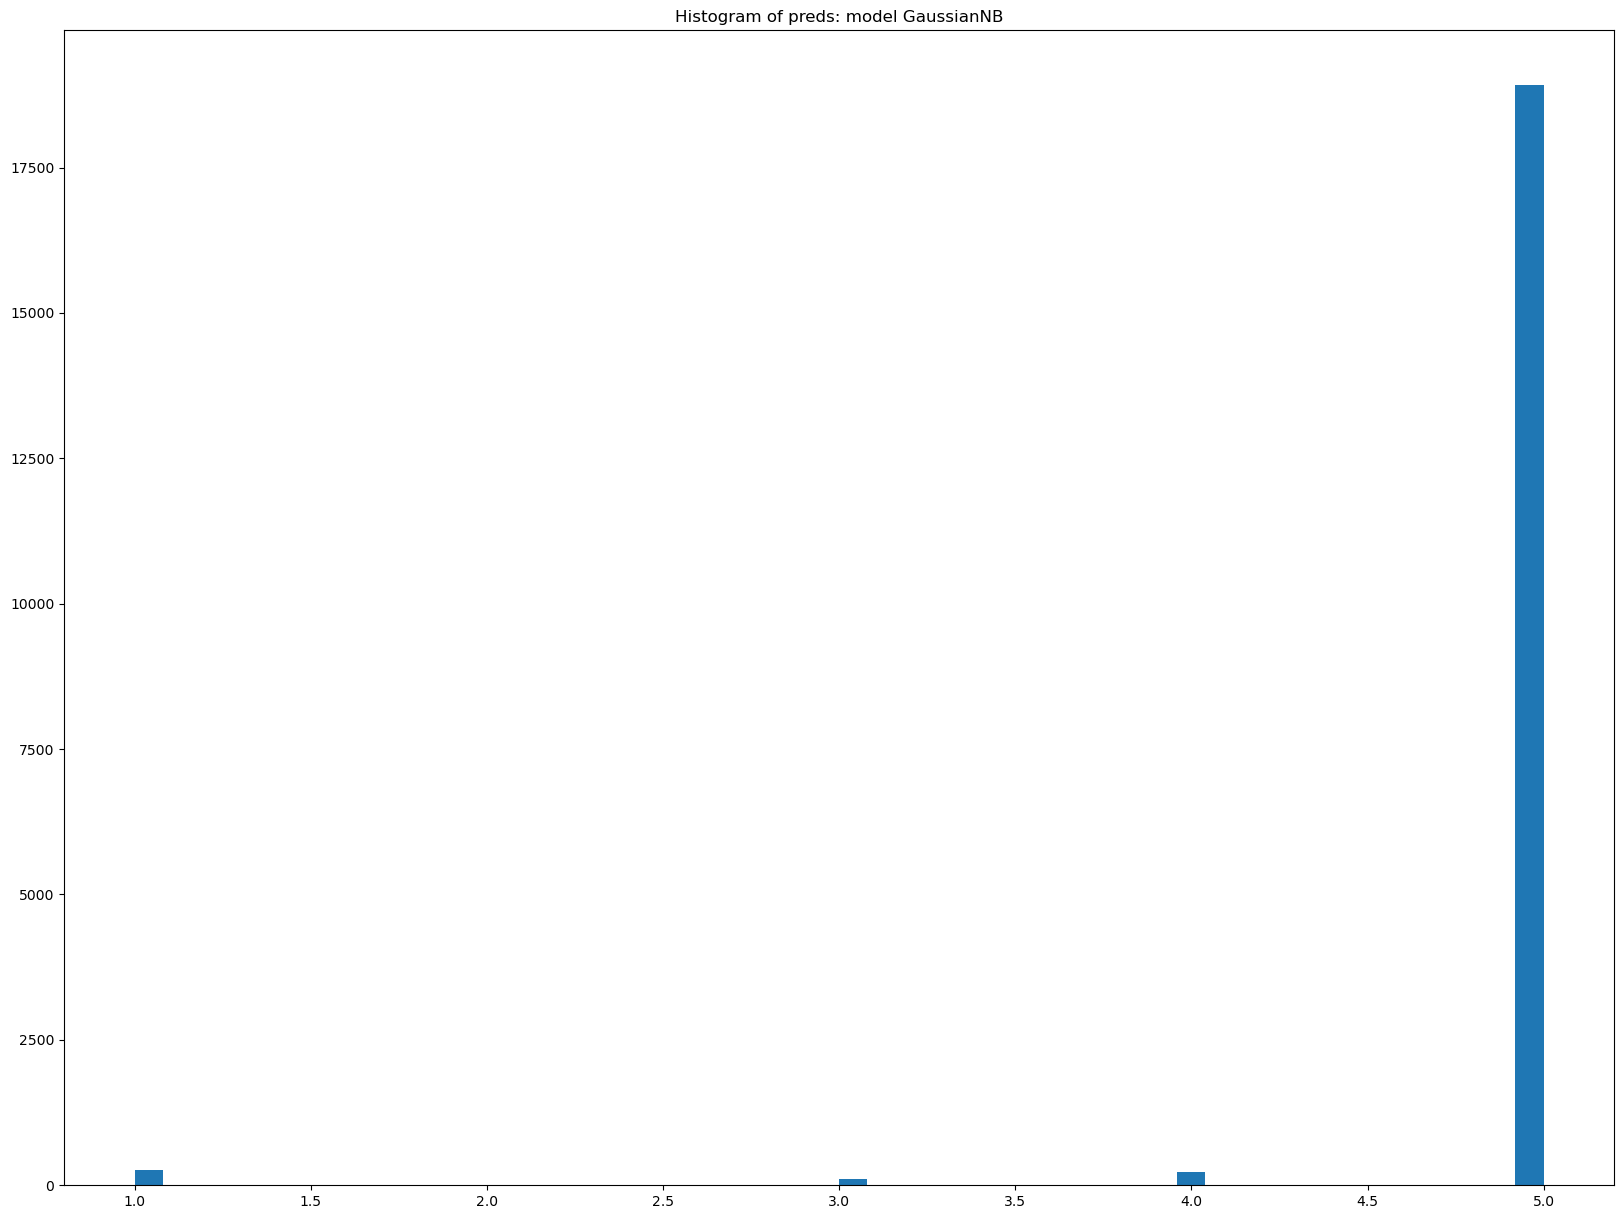

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.6969
The Recall is:  0.2240
The F1 score is:  0.1129
The Matthews correlation coefficient is:  0.1048

This is the Confusion Matrix
     0  1    2   3     4
0  266  0    2  29  3776
1    0  4    0  54  3694
2    0  0  104  63  3877
3    0  0    9  79  3646
4    0  0    0   0  3921
model_number: 23
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


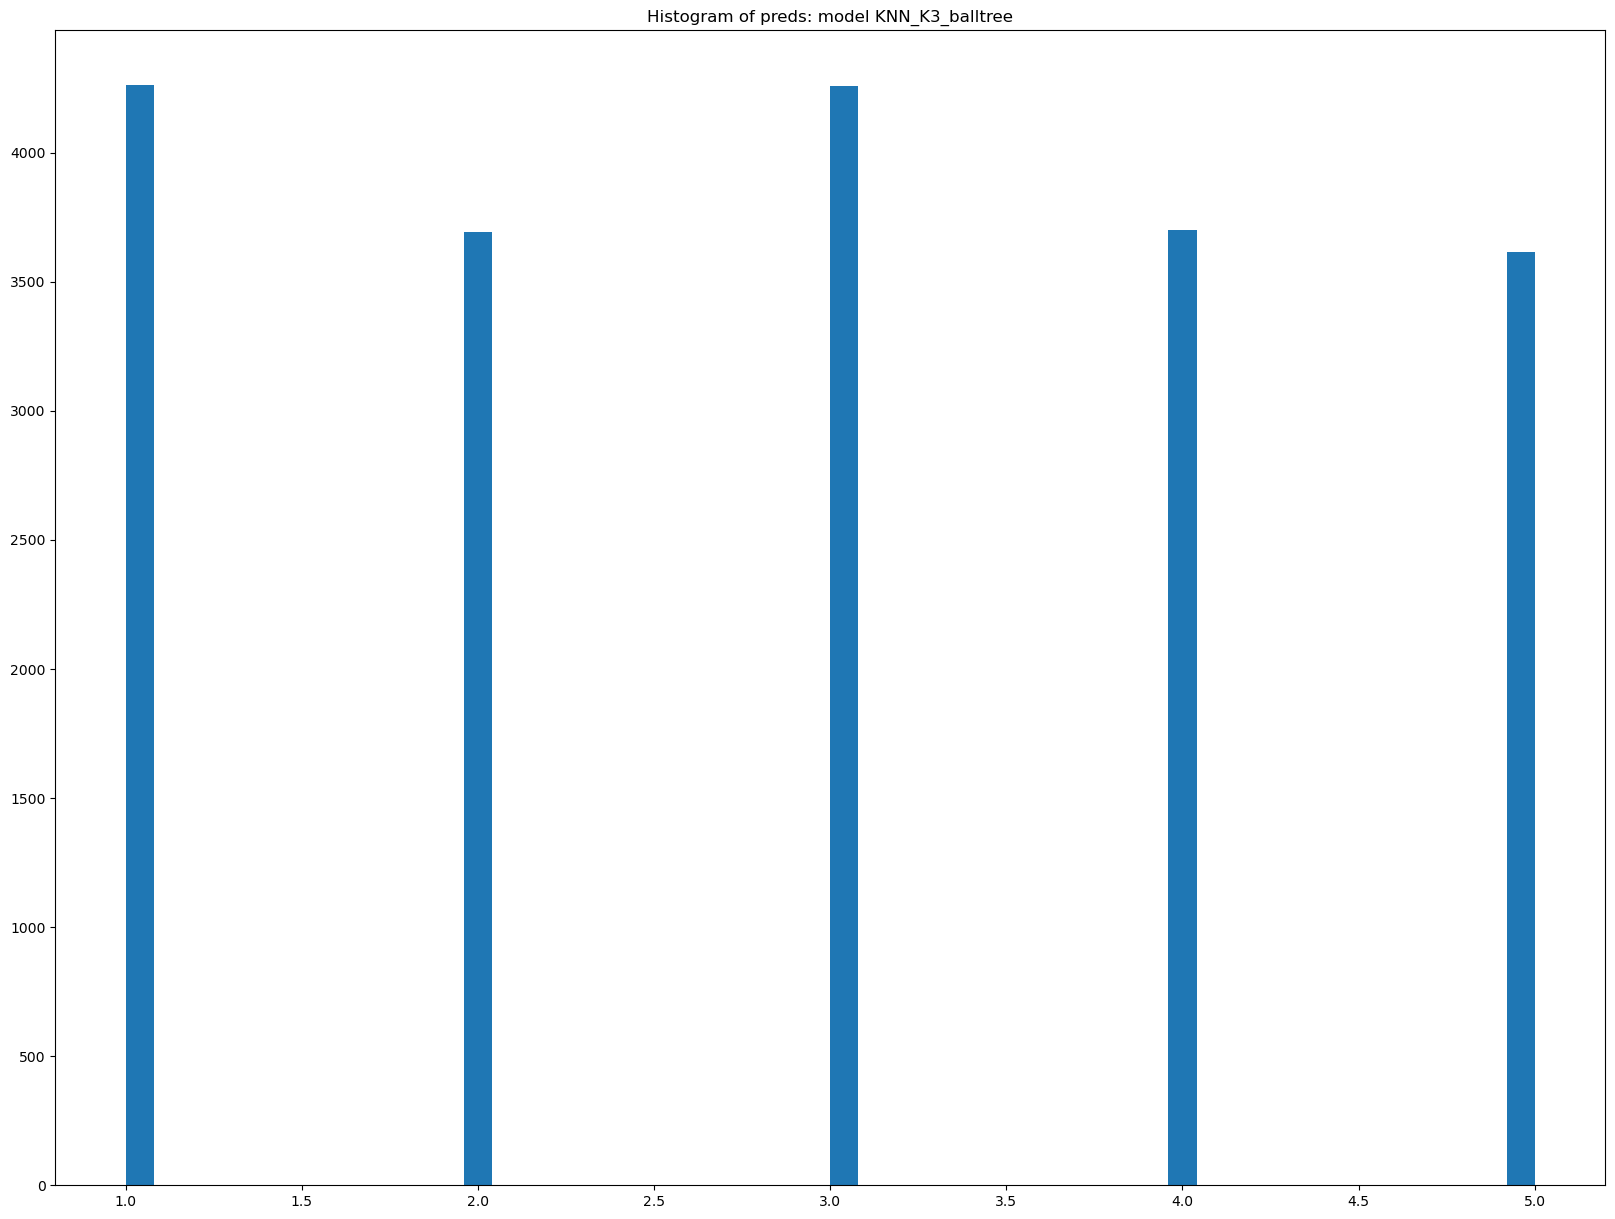

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9413
The Recall is:  0.9405
The F1 score is:  0.9404
The Matthews correlation coefficient is:  0.9259

This is the Confusion Matrix
      0     1     2     3     4
0  4044    12    16     0     1
1    33  3467    69   112    71
2    62     6  3878    94     4
3    25    40   213  3445    11
4    97   166    81    48  3529
model_number: 24
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


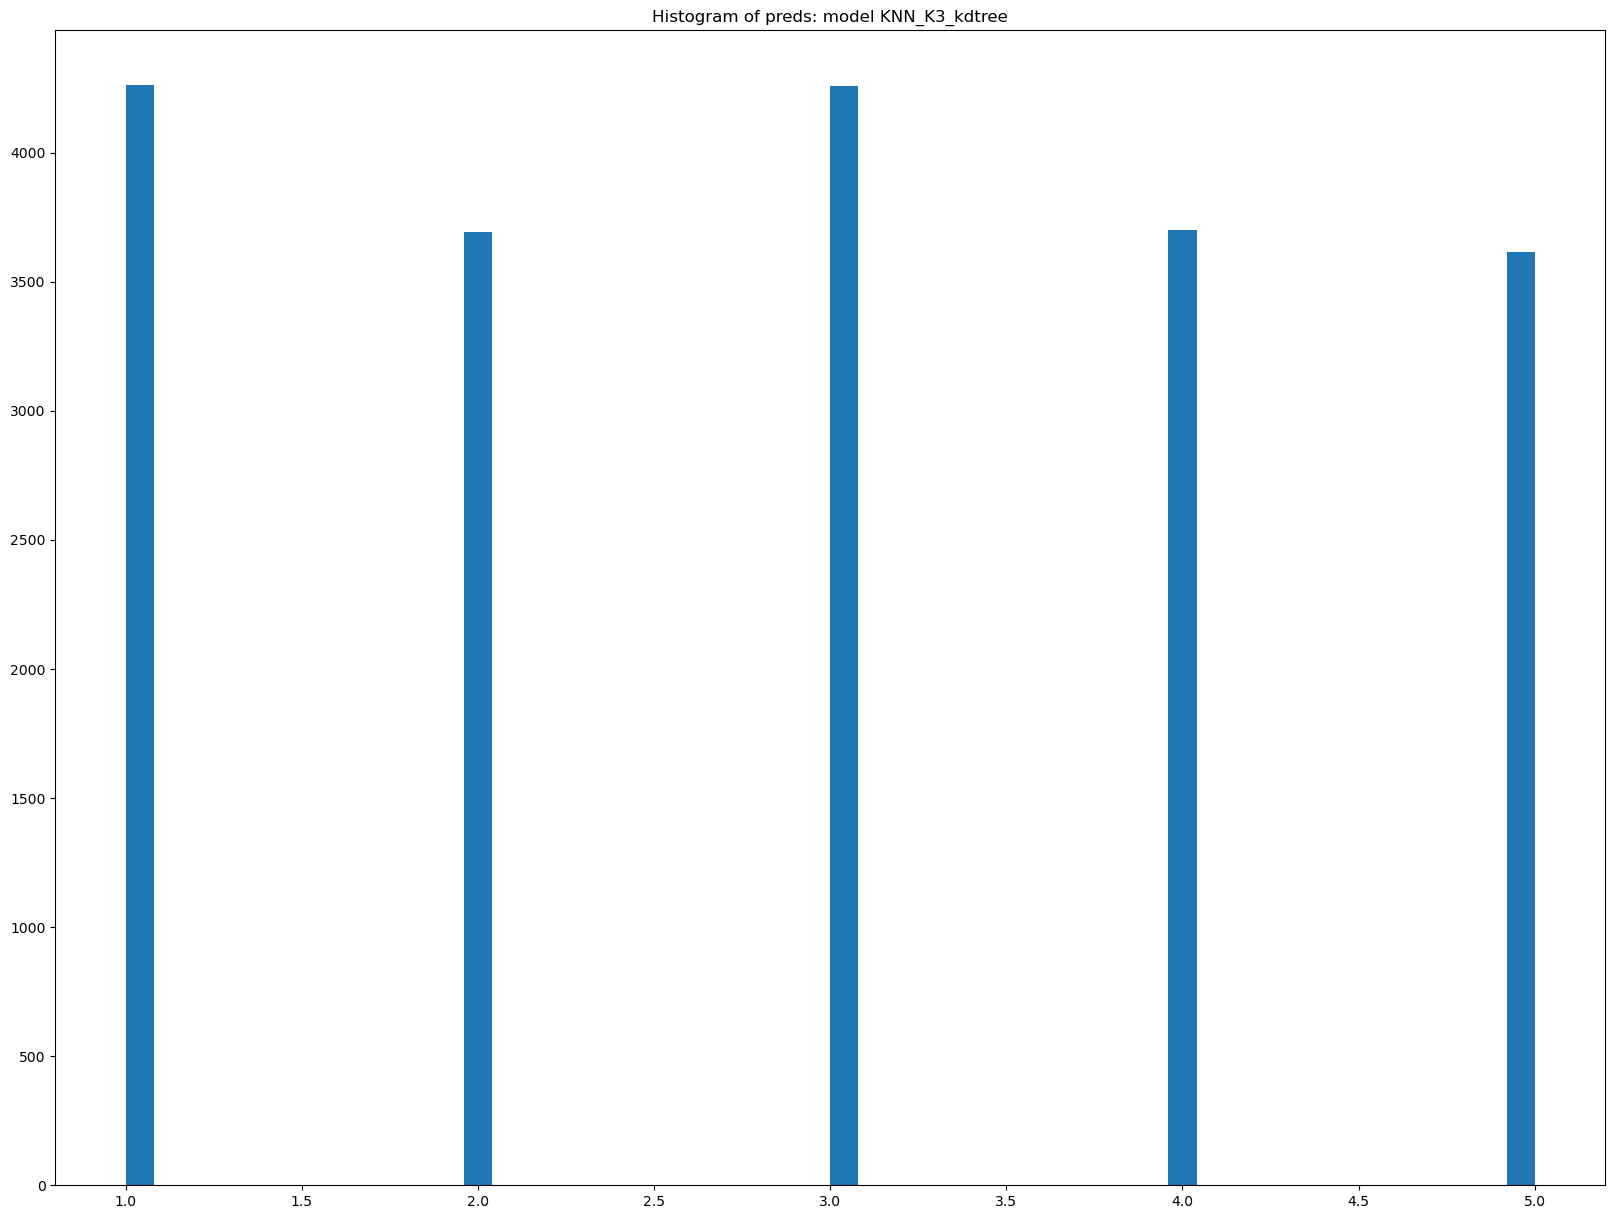

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9413
The Recall is:  0.9405
The F1 score is:  0.9404
The Matthews correlation coefficient is:  0.9259

This is the Confusion Matrix
      0     1     2     3     4
0  4044    12    16     0     1
1    33  3467    69   112    71
2    62     6  3878    94     4
3    25    40   213  3445    11
4    97   166    81    48  3529
model_number: 25
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


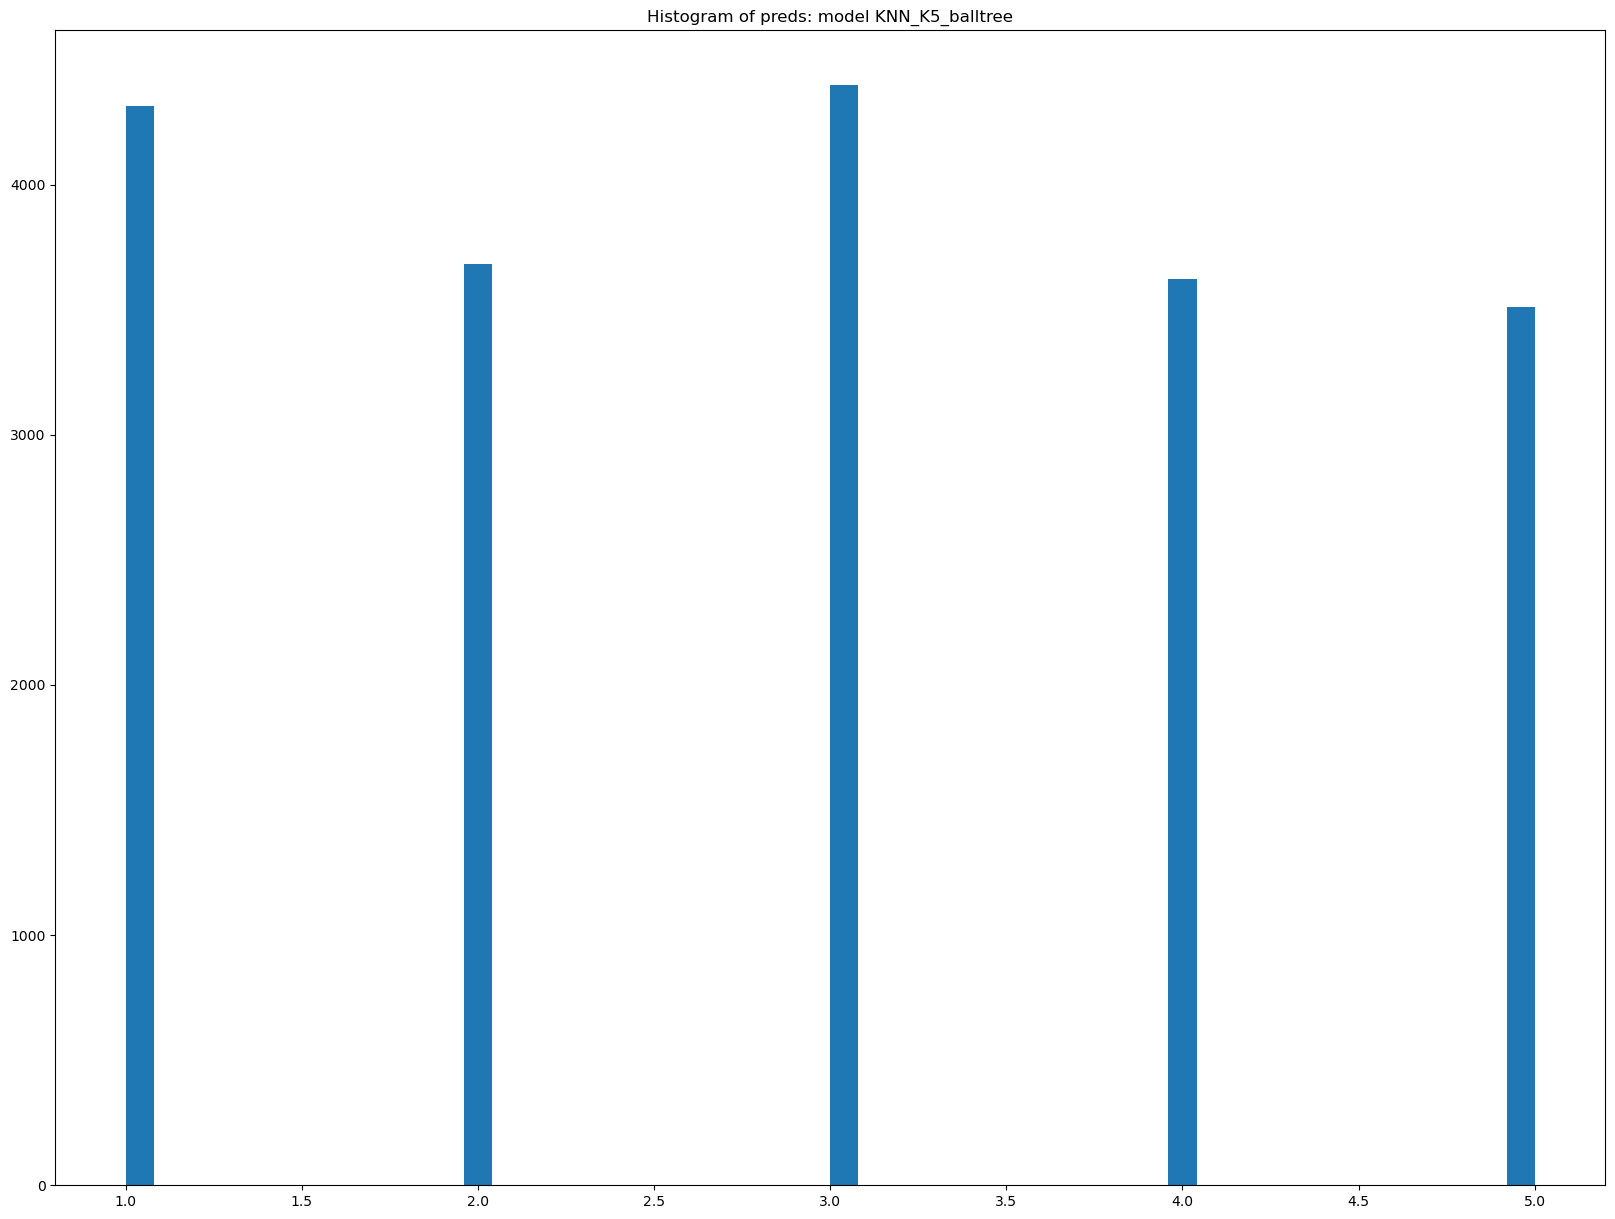

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9308
The Recall is:  0.9291
The F1 score is:  0.9288
The Matthews correlation coefficient is:  0.9118

This is the Confusion Matrix
      0     1     2     3     4
0  4046    12    13     0     2
1    29  3443    95   107    78
2    73     4  3877    86     4
3    34    44   290  3357     9
4   132   178   122    73  3416
model_number: 26
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


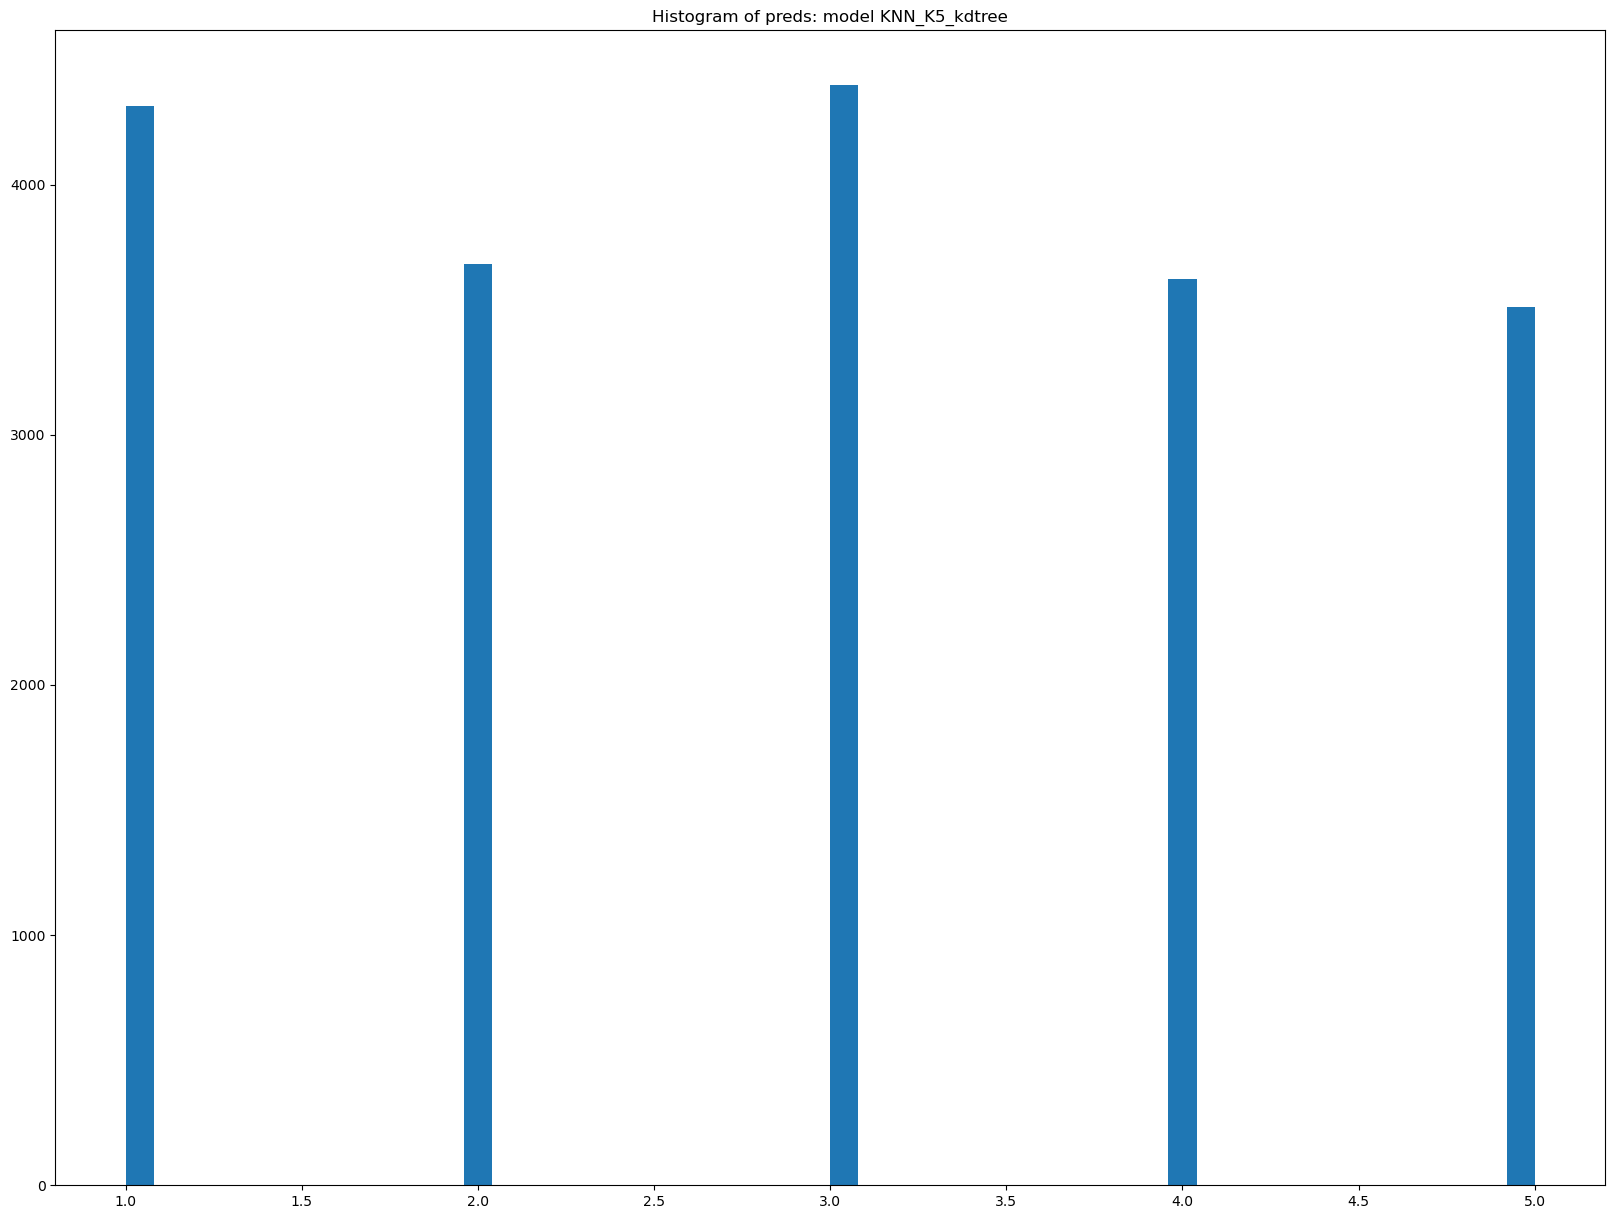

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9308
The Recall is:  0.9291
The F1 score is:  0.9288
The Matthews correlation coefficient is:  0.9118

This is the Confusion Matrix
      0     1     2     3     4
0  4046    12    13     0     2
1    29  3443    95   107    78
2    73     4  3877    86     4
3    34    44   290  3357     9
4   132   178   122    73  3416
model_number: 27
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


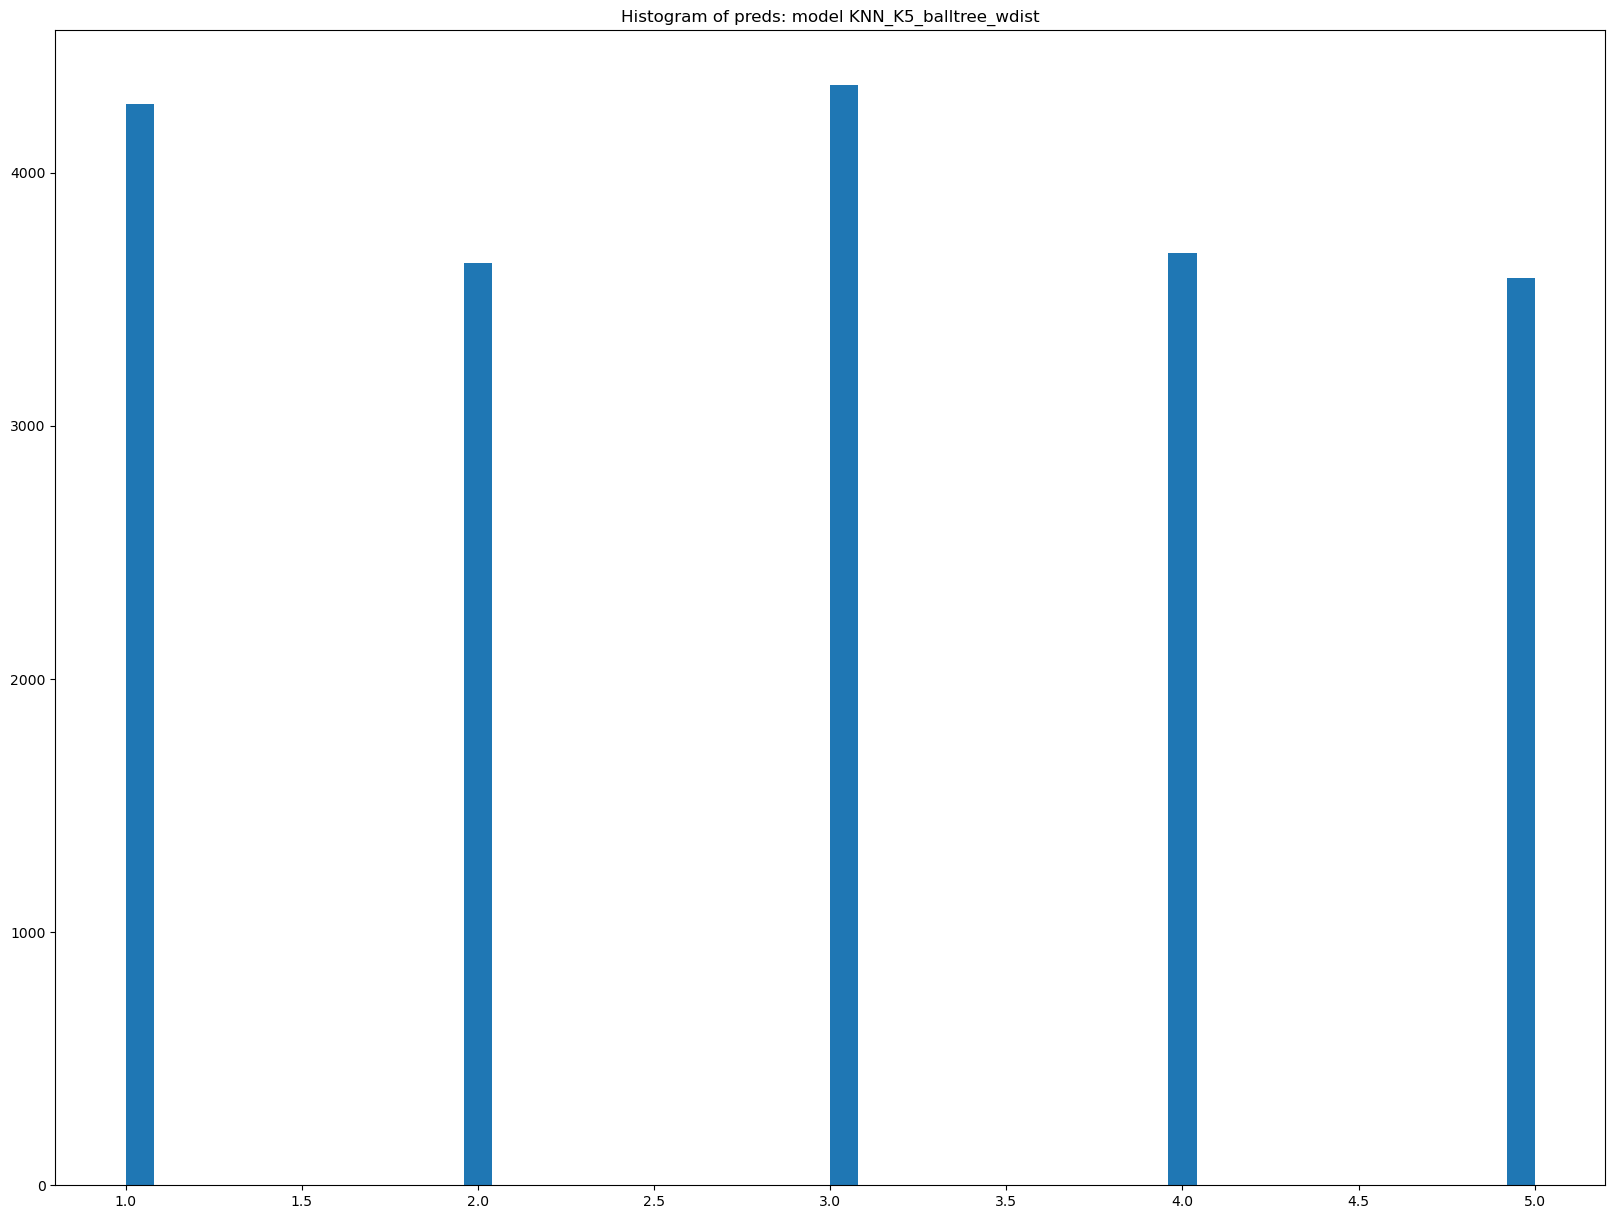

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9374
The Recall is:  0.9362
The F1 score is:  0.9360
The Matthews correlation coefficient is:  0.9206

This is the Confusion Matrix
      0     1     2     3     4
0  4049    12    10     0     2
1    25  3435    92   118    82
2    63     3  3891    83     4
3    25    26   249  3422    12
4   109   167   103    60  3482
model_number: 28
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


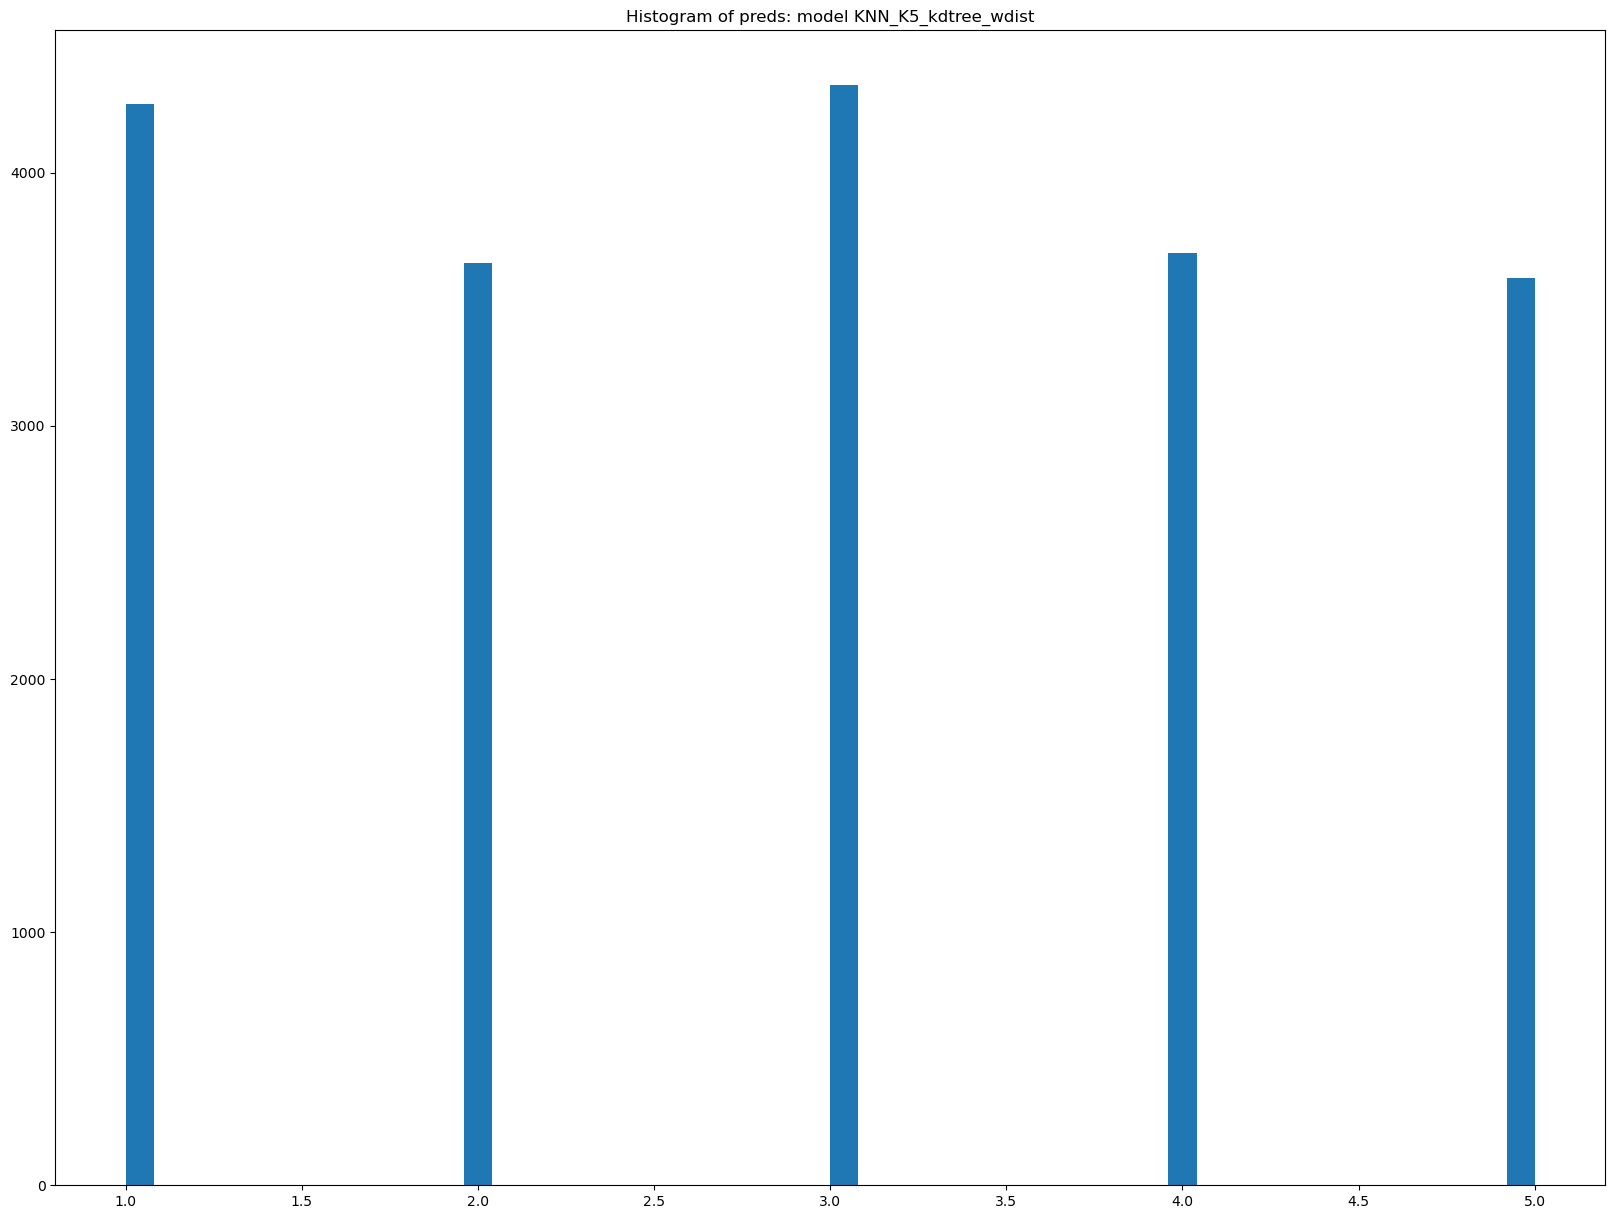

Scaler: MinMaxScaler() imputer: KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9374
The Recall is:  0.9362
The F1 score is:  0.9360
The Matthews correlation coefficient is:  0.9206

This is the Confusion Matrix
      0     1     2     3     4
0  4049    12    10     0     2
1    25  3435    92   118    82
2    63     3  3891    83     4
3    25    26   249  3422    12
4   109   167   103    60  3482
model_number: 29
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()


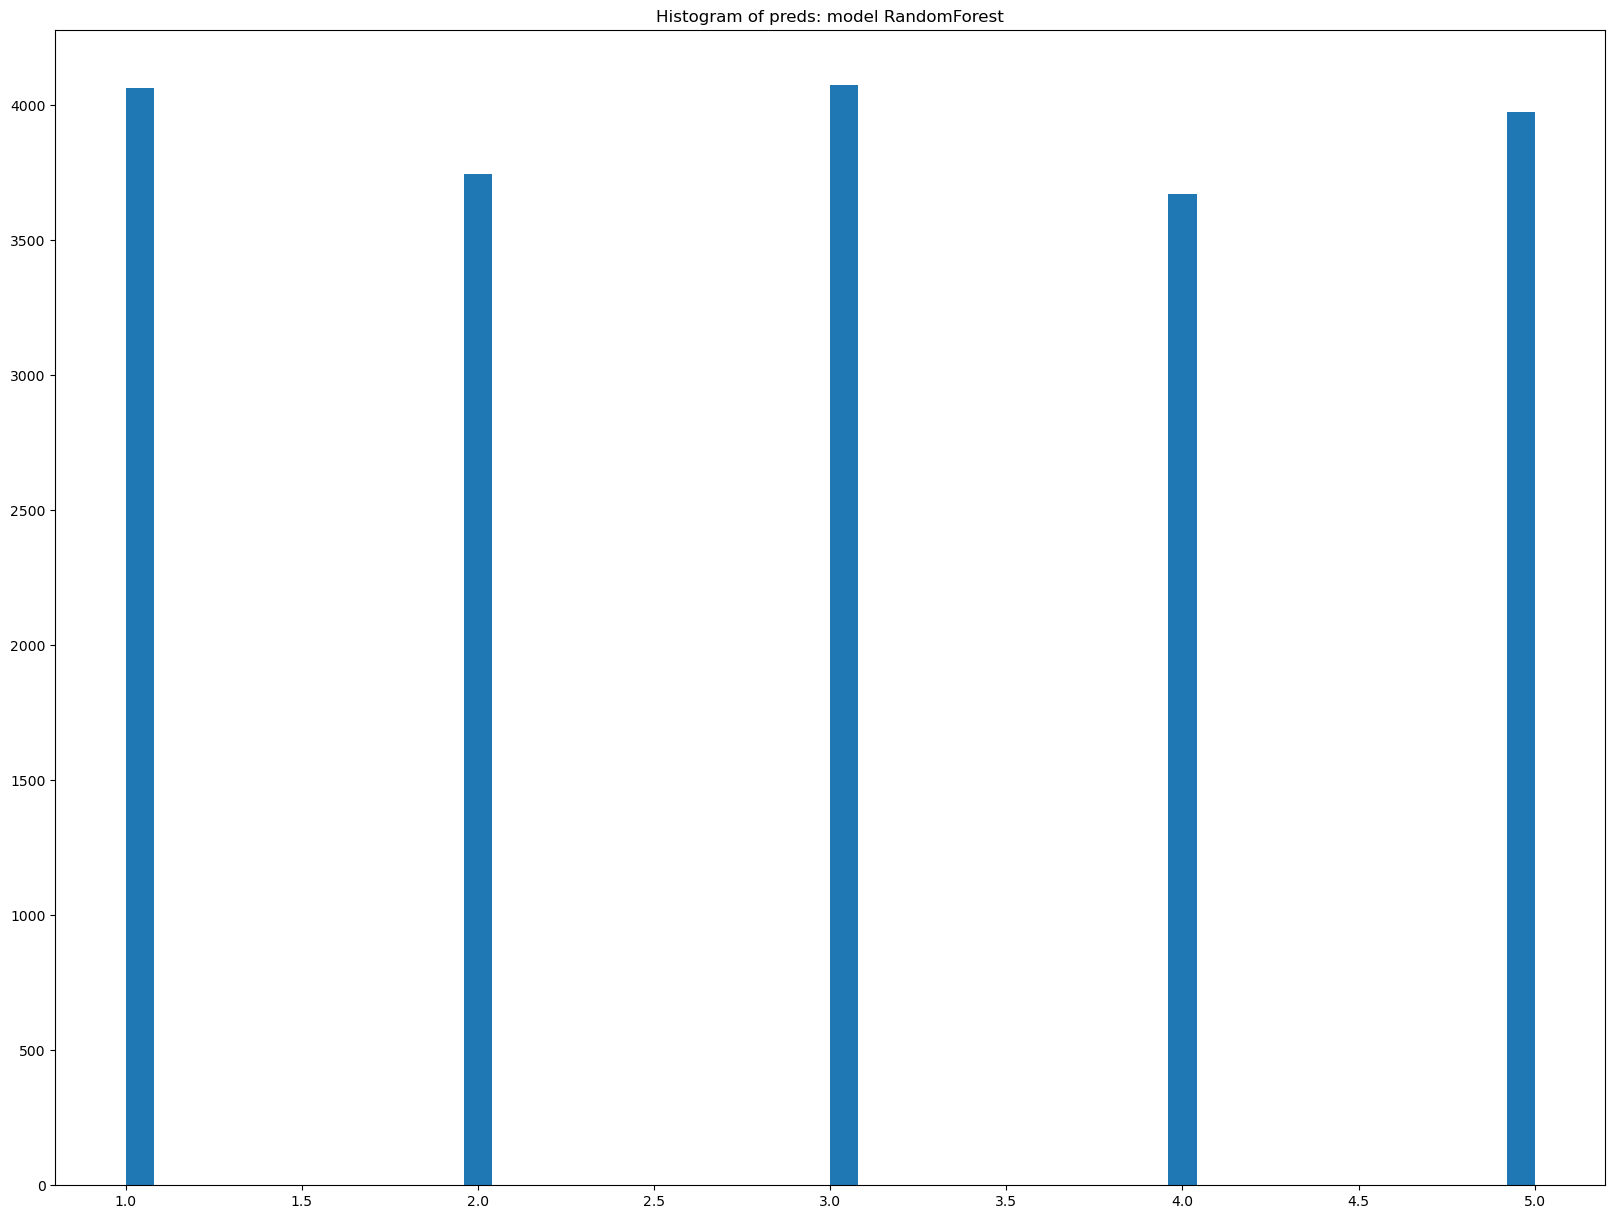

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9829
The Recall is:  0.9829
The F1 score is:  0.9829
The Matthews correlation coefficient is:  0.9786

This is the Confusion Matrix
      0     1     2     3     4
0  4046    17     8     1     1
1     2  3659    24    29    38
2    15    10  3978    27    14
3     1    39    60  3610    24
4     0    18     3     3  3897
model_number: 30
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()


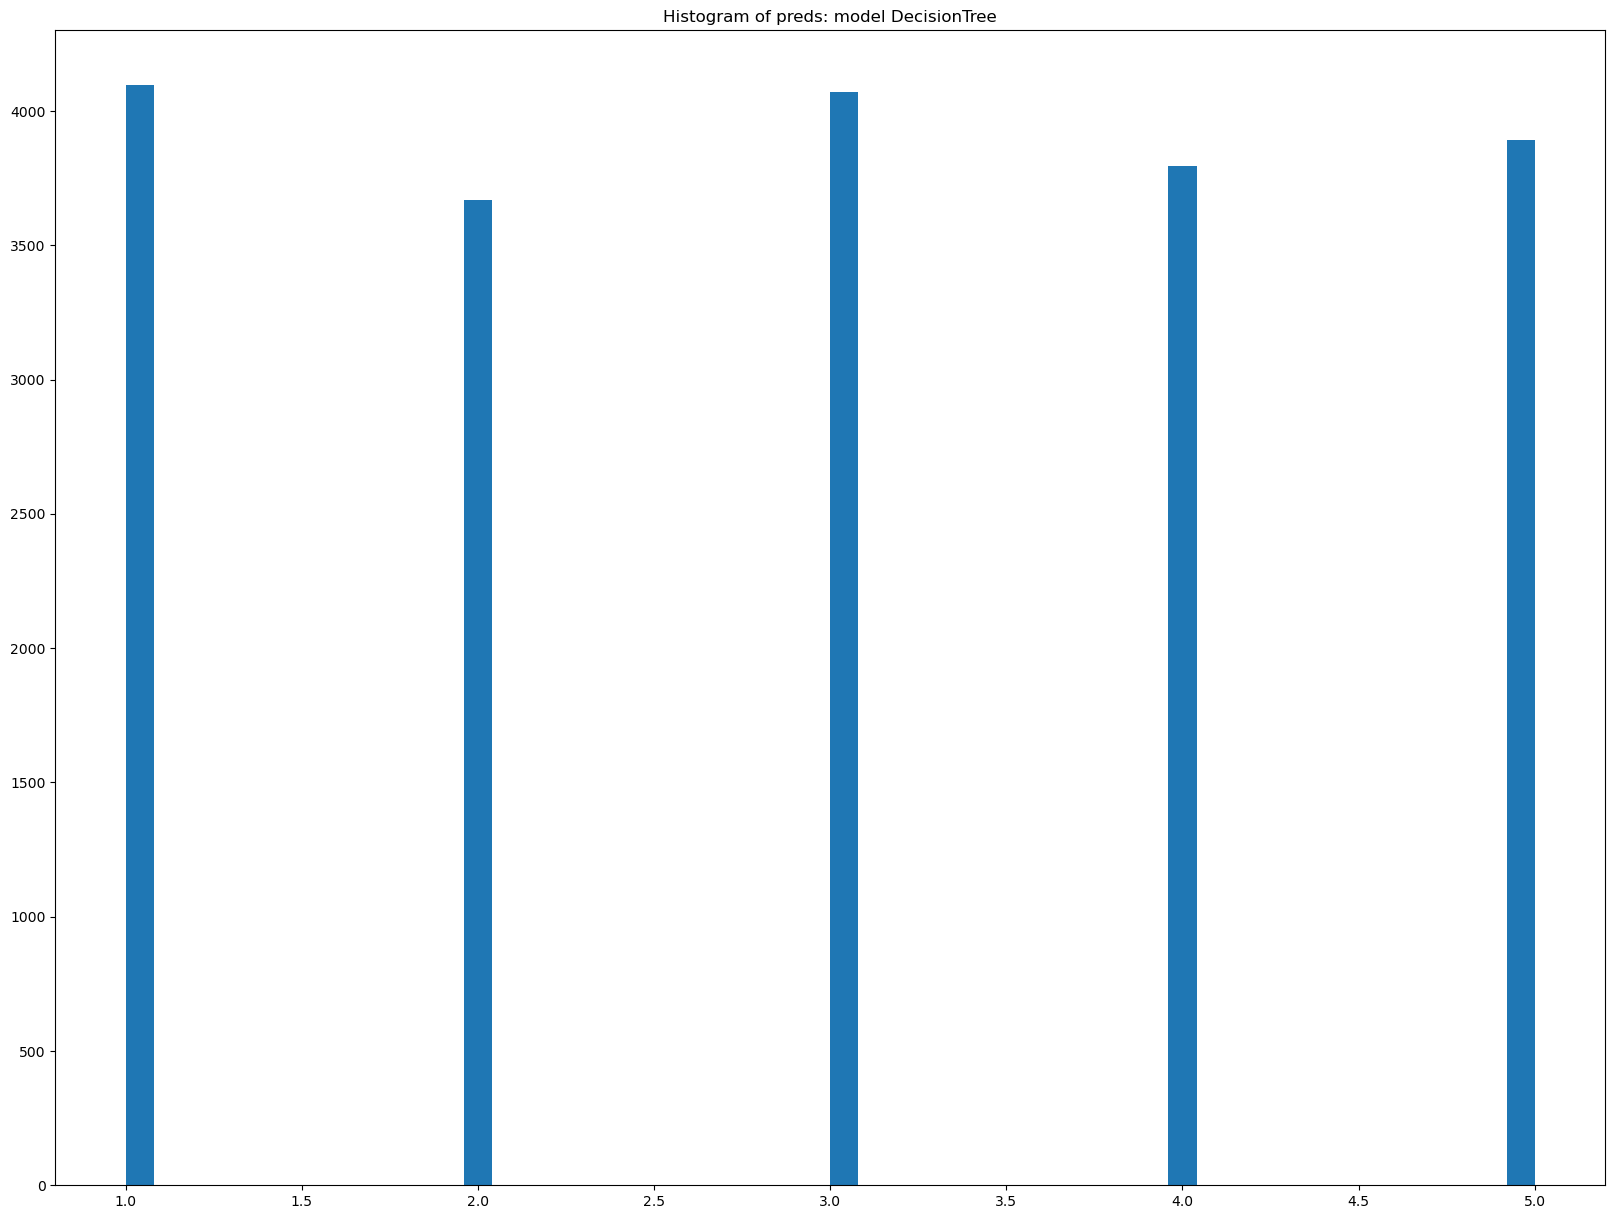

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9054
The Recall is:  0.9053
The F1 score is:  0.9053
The Matthews correlation coefficient is:  0.8817

This is the Confusion Matrix
      0     1     2     3     4
0  3959    18    41    26    29
1    28  3303    88   154   179
2    33    47  3664   196   104
3    30   138   177  3279   110
4    46   161   101   142  3471
model_number: 31
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


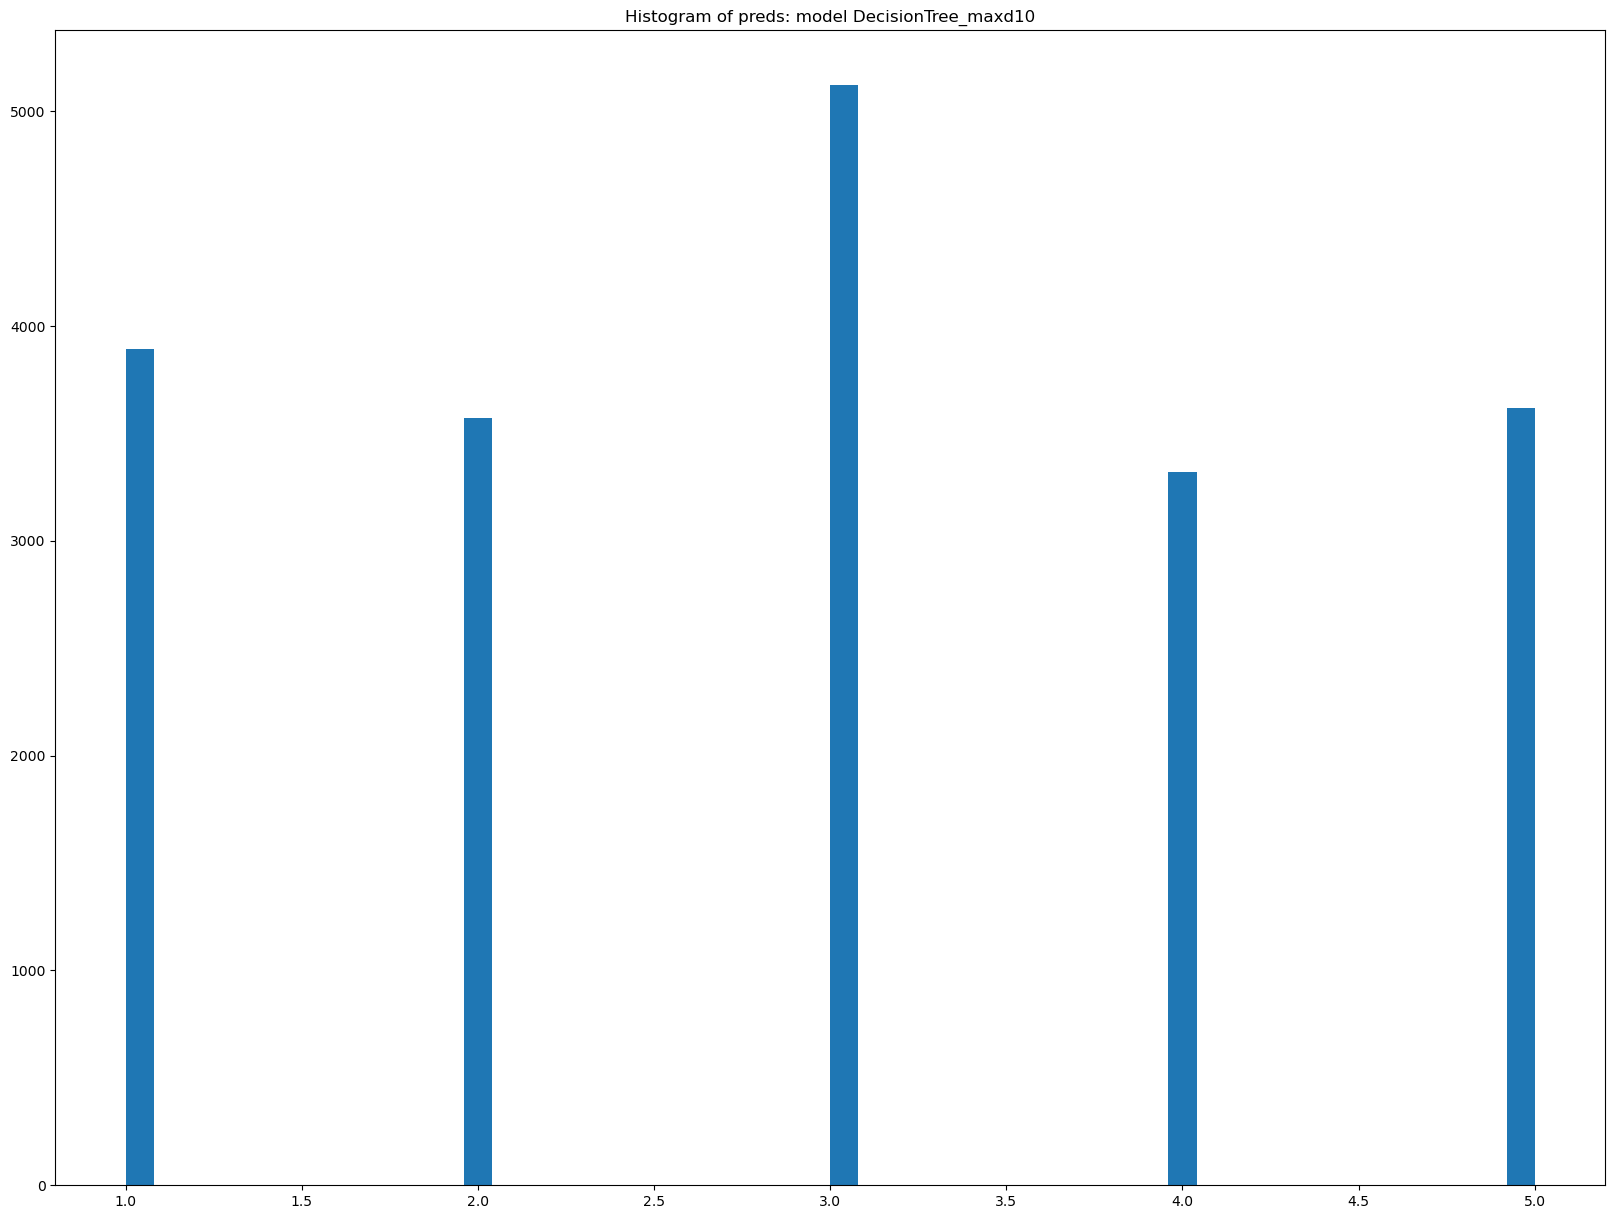

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8283
The Recall is:  0.8196
The F1 score is:  0.8207
The Matthews correlation coefficient is:  0.7761

This is the Confusion Matrix
      0     1     2     3     4
0  3753    56   163    57    44
1    13  2967   384   183   205
2    39    97  3533   245   130
3    32   211   683  2659   149
4    57   242   358   175  3089
model_number: 32
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


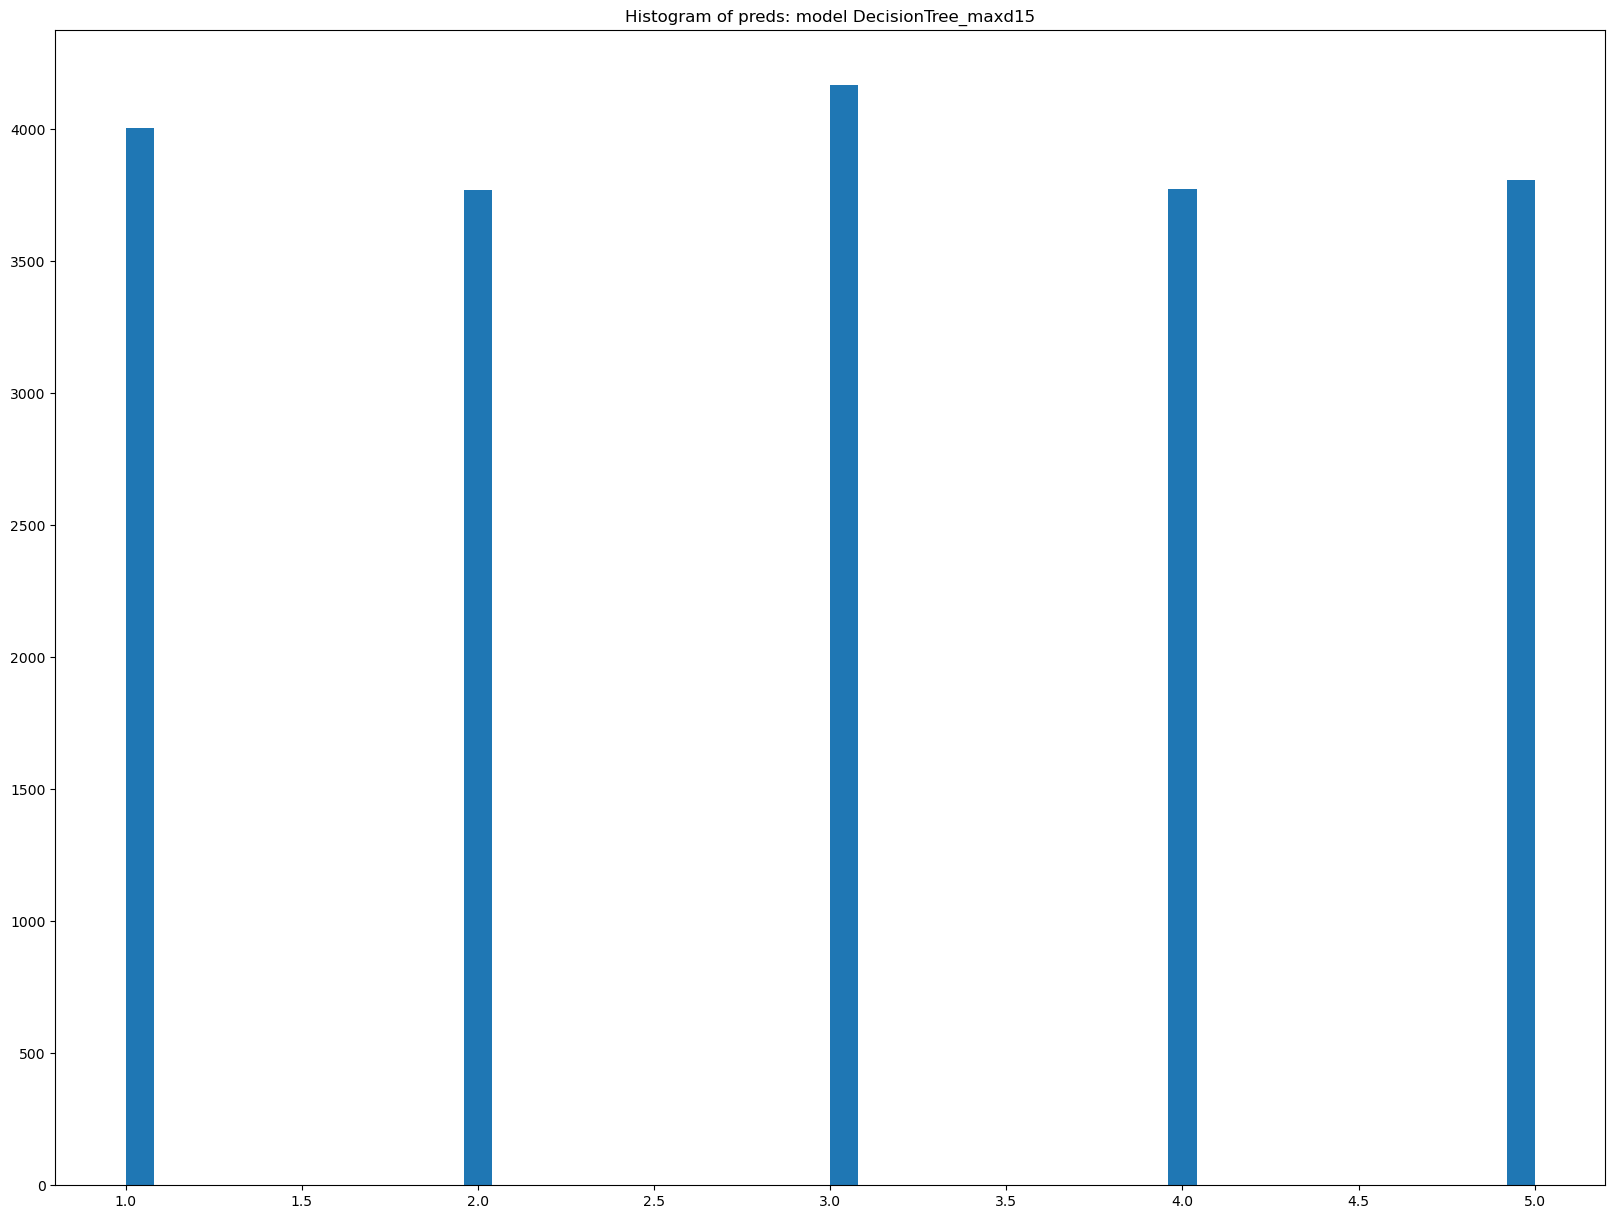

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8897
The Recall is:  0.8892
The F1 score is:  0.8894
The Matthews correlation coefficient is:  0.8615

This is the Confusion Matrix
      0     1     2     3     4
0  3899    30    74    32    38
1    18  3293   104   172   165
2    30    66  3603   243   102
3    31   165   253  3173   112
4    26   215   133   155  3392
model_number: 33
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


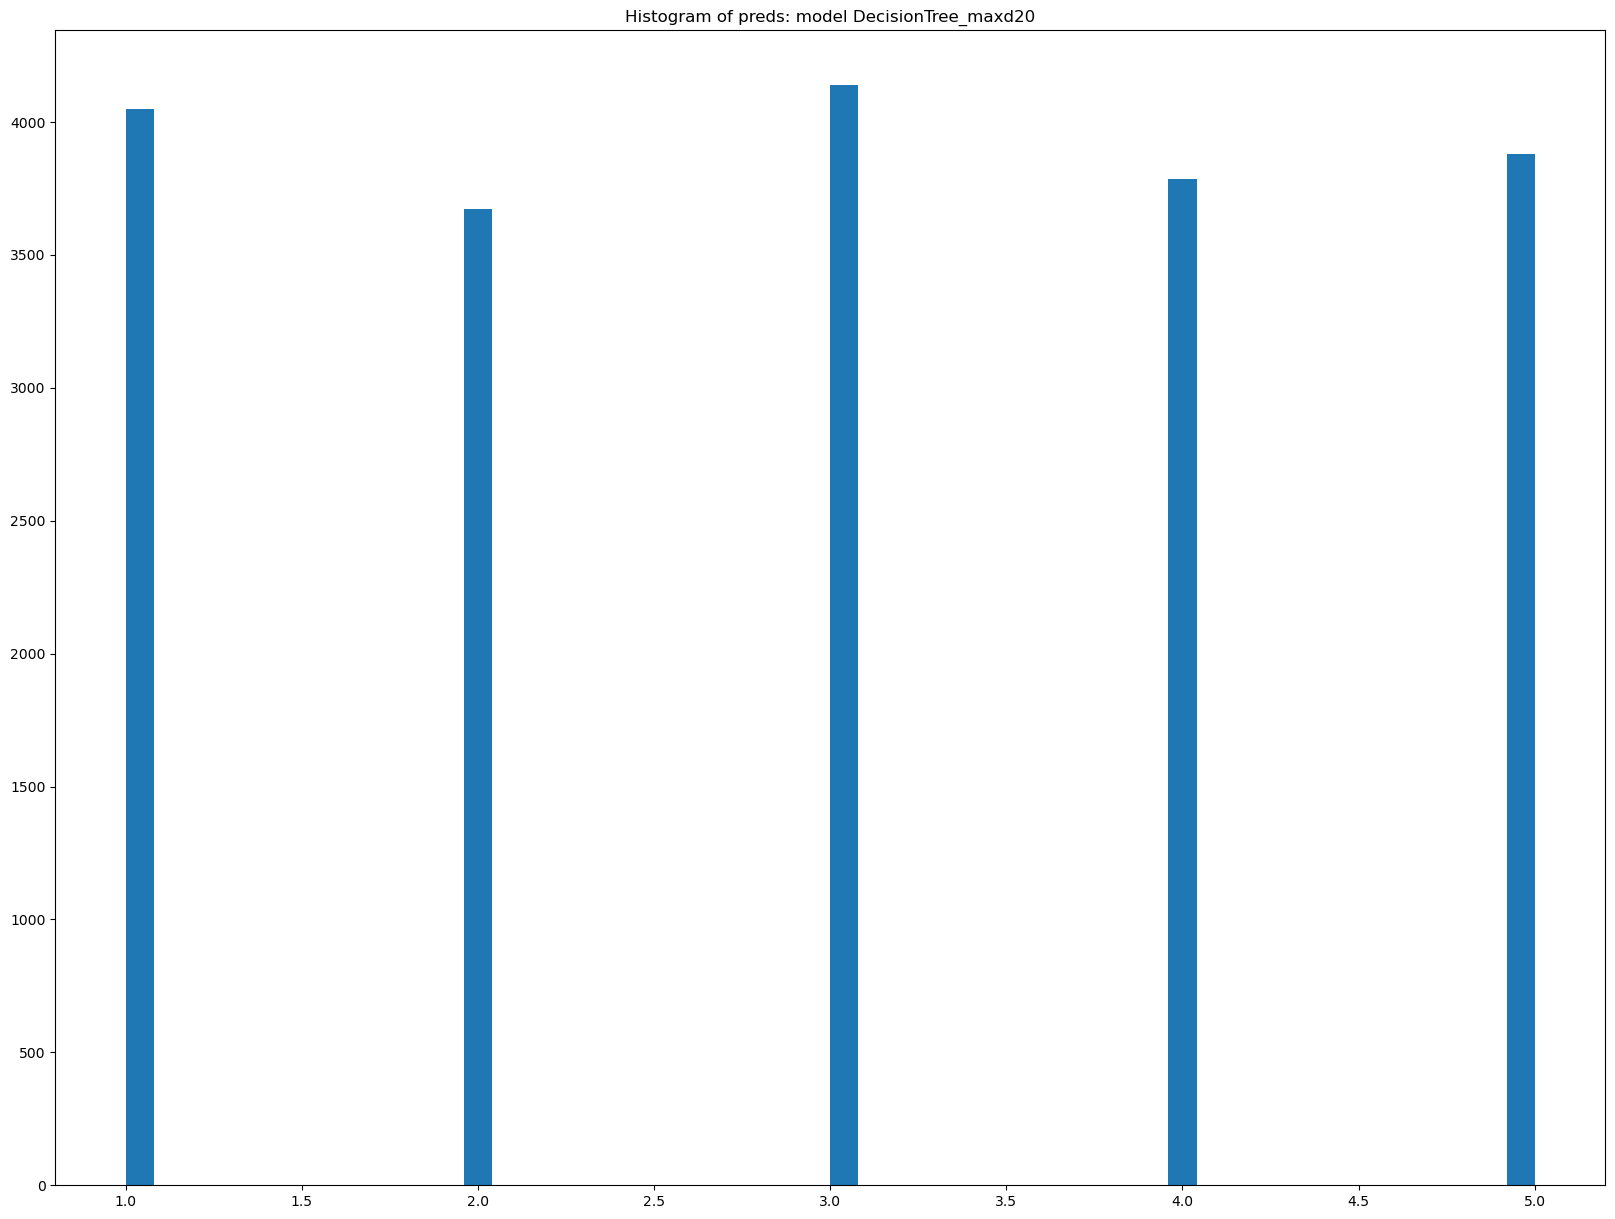

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9035
The Recall is:  0.9032
The F1 score is:  0.9033
The Matthews correlation coefficient is:  0.8790

This is the Confusion Matrix
      0     1     2     3     4
0  3935    19    61    27    31
1    23  3308    98   148   175
2    32    59  3664   202    87
3    25   115   214  3261   119
4    33   172   101   149  3466
model_number: 34
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()


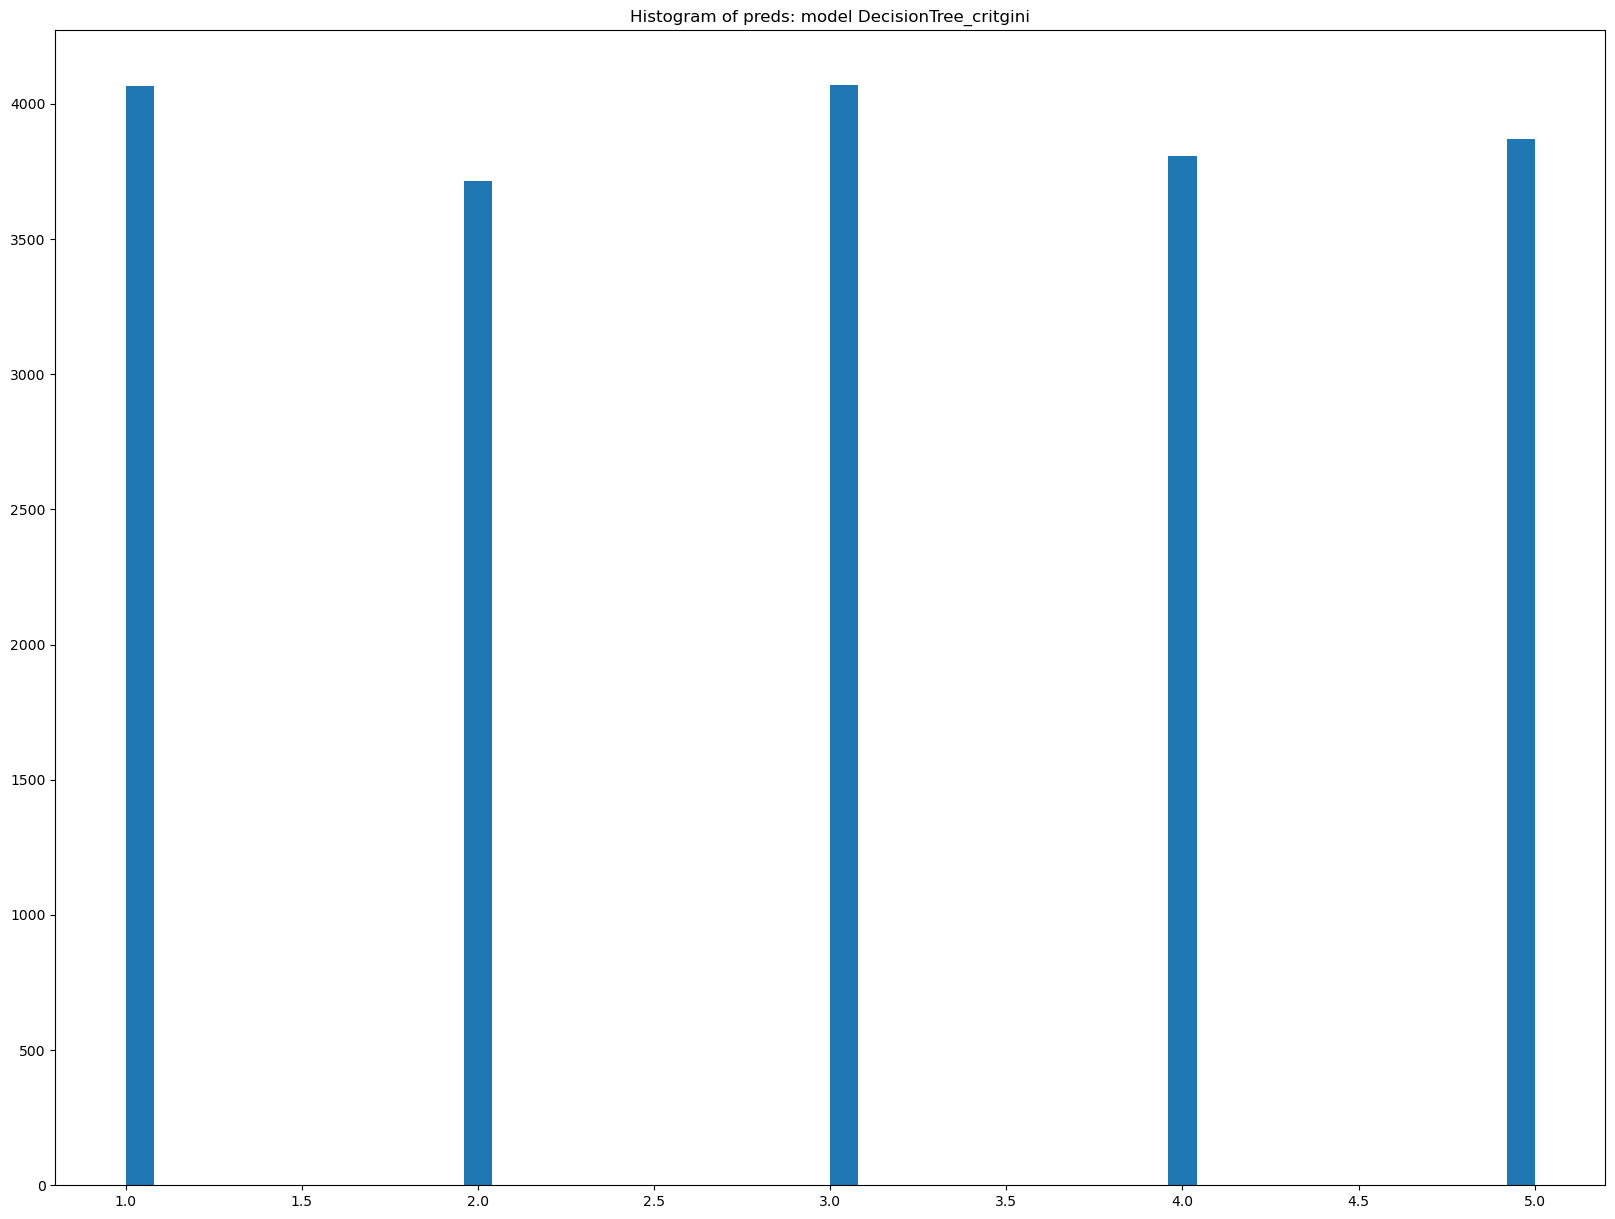

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9062
The Recall is:  0.9060
The F1 score is:  0.9061
The Matthews correlation coefficient is:  0.8825

This is the Confusion Matrix
      0     1     2     3     4
0  3952    20    44    26    31
1    26  3324    84   144   174
2    30    50  3658   207    99
3    21   142   180  3290   101
4    36   178   103   139  3465
model_number: 35
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


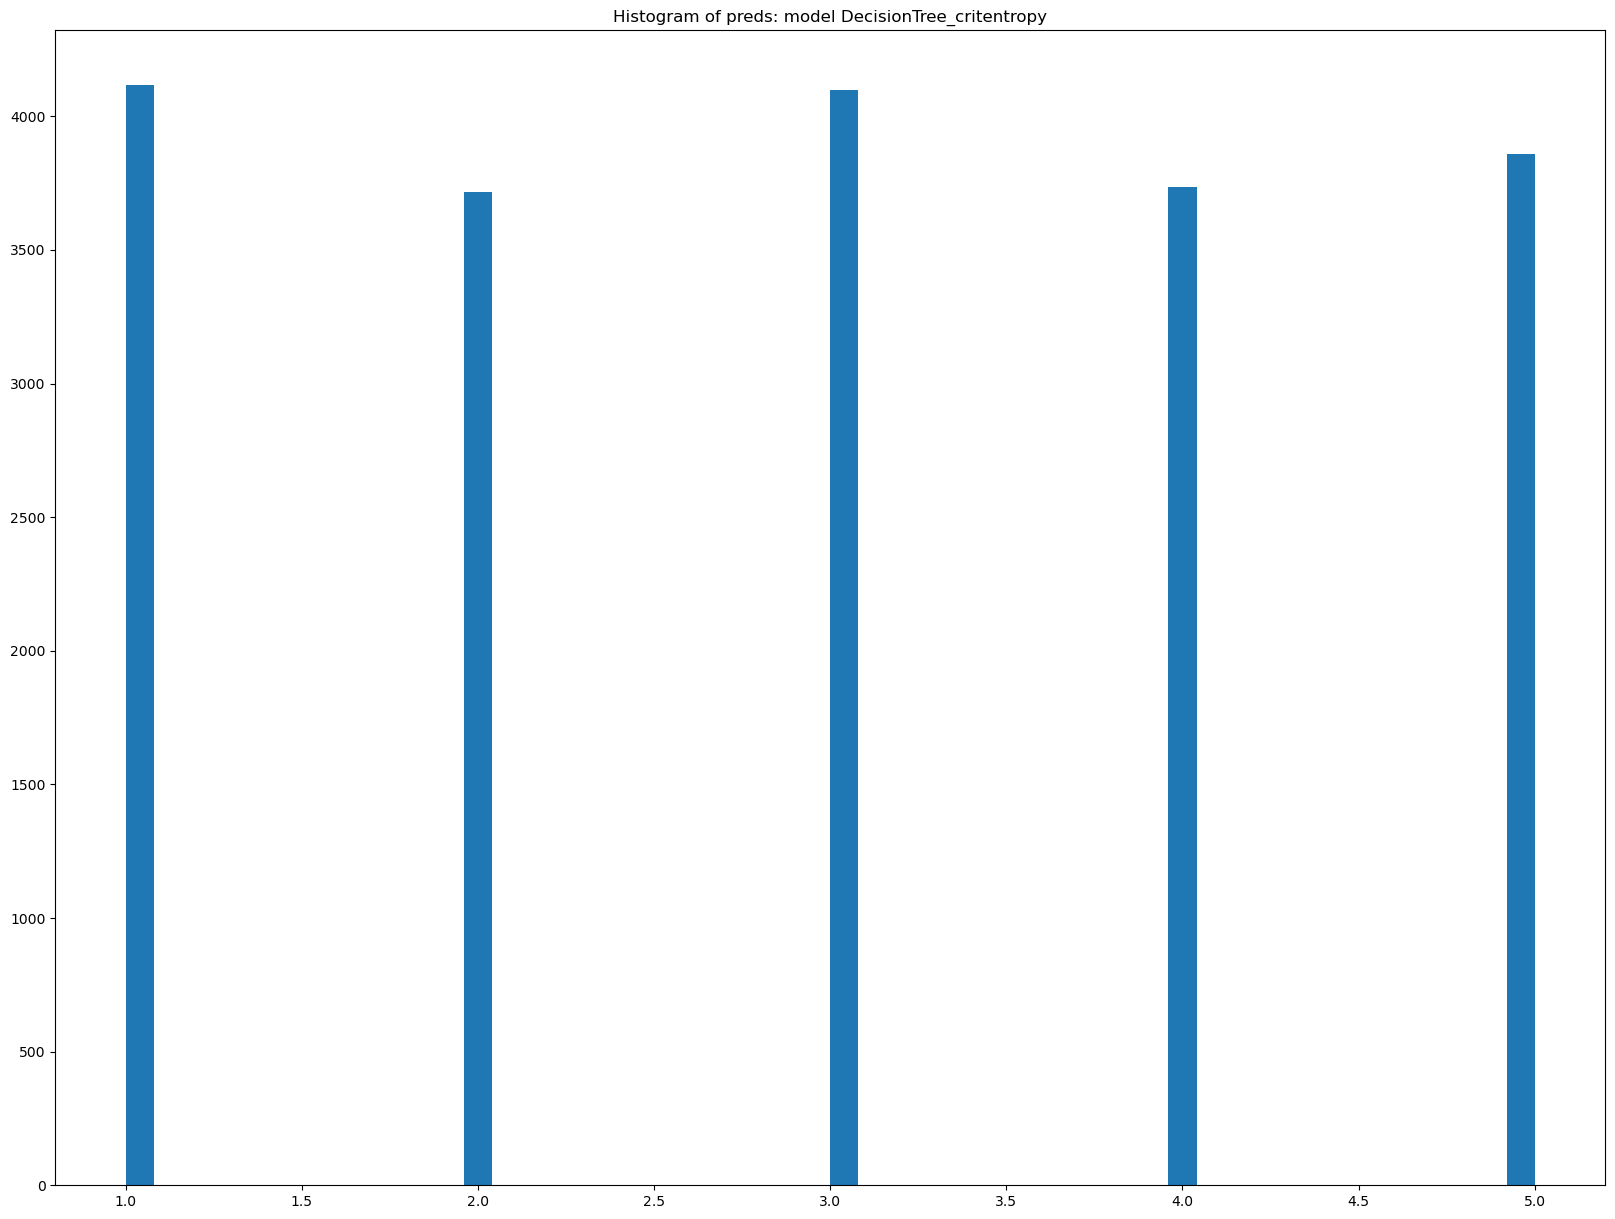

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9104
The Recall is:  0.9105
The F1 score is:  0.9104
The Matthews correlation coefficient is:  0.8881

This is the Confusion Matrix
      0     1     2     3     4
0  3978    19    34    13    29
1    29  3328    78   140   177
2    44    63  3700   173    64
3    29   115   190  3292   108
4    36   192    98   116  3479
model_number: 36
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()


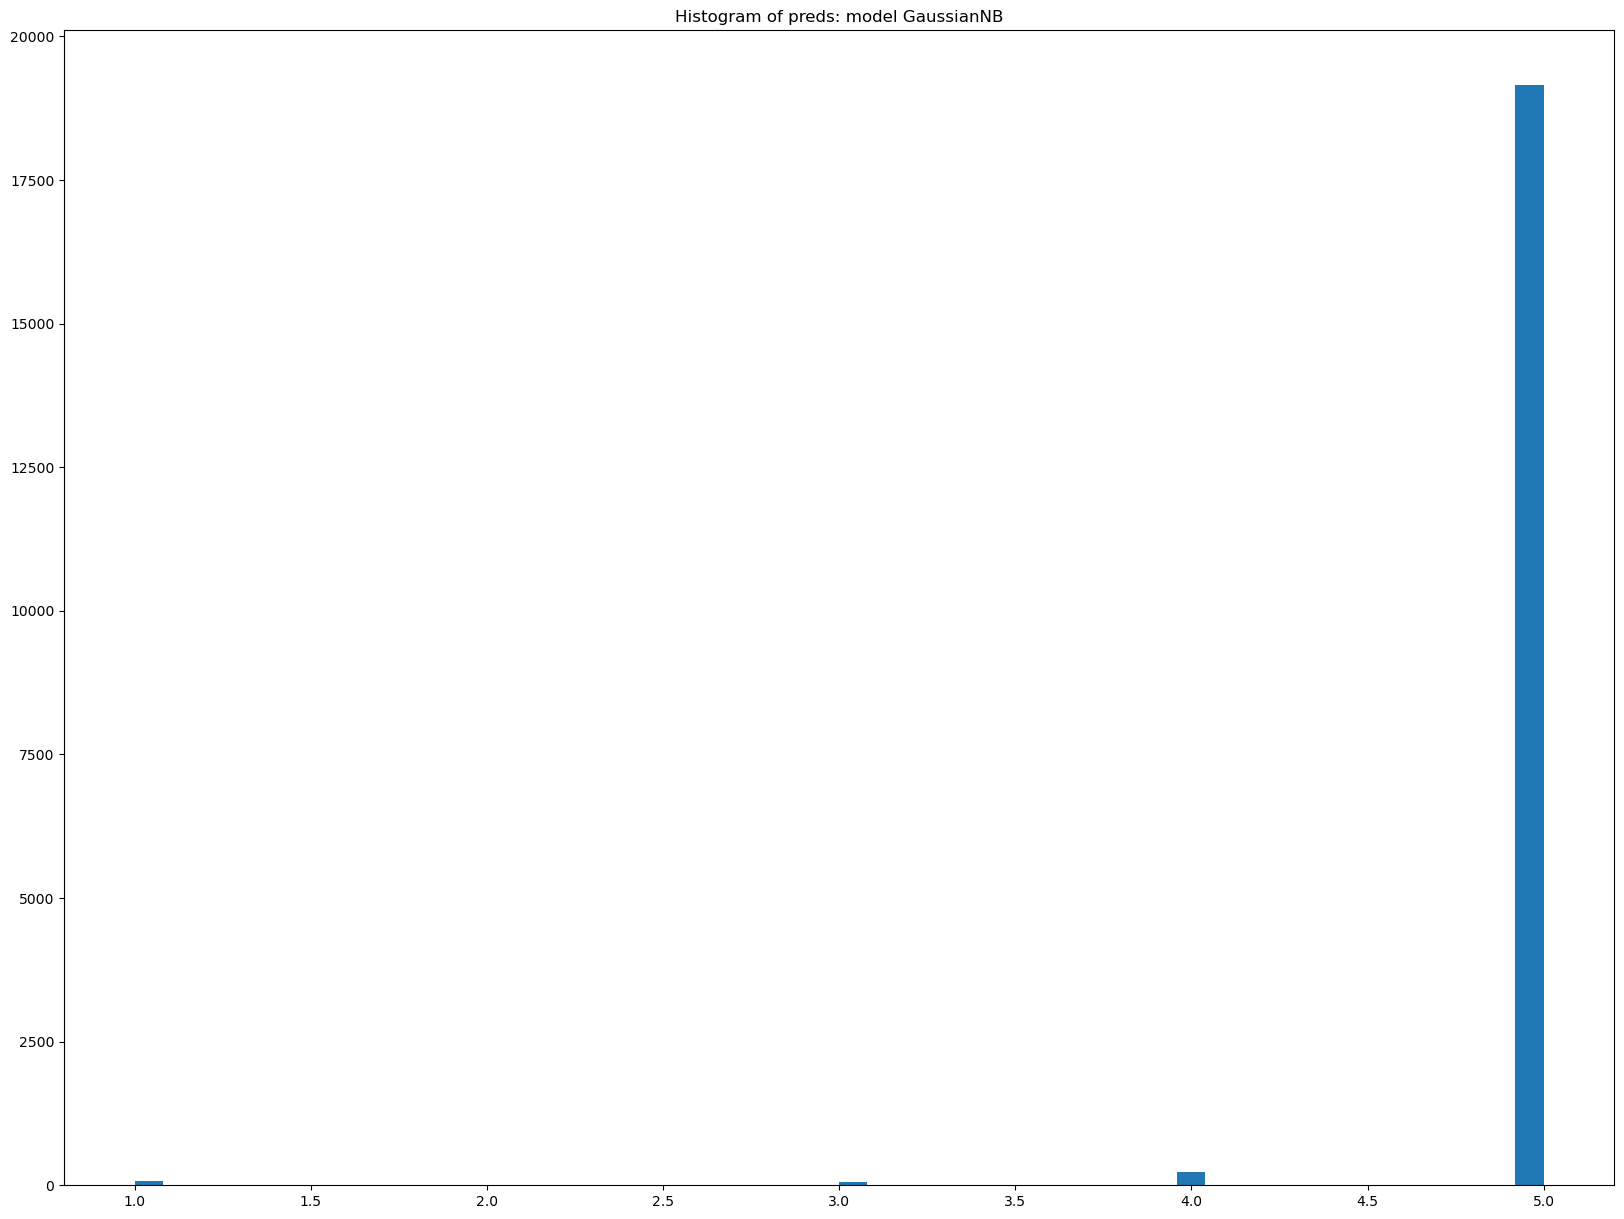

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()
The Precision is:  0.6693
The Recall is:  0.2123
The F1 score is:  0.0904
The Matthews correlation coefficient is:  0.0659

This is the Confusion Matrix
    0  1   2   3     4
0  80  0   2  29  3962
1   0  6   0  54  3692
2   0  1  58  63  3922
3   0  0   4  79  3651
4   0  0   0   0  3921
model_number: 37
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


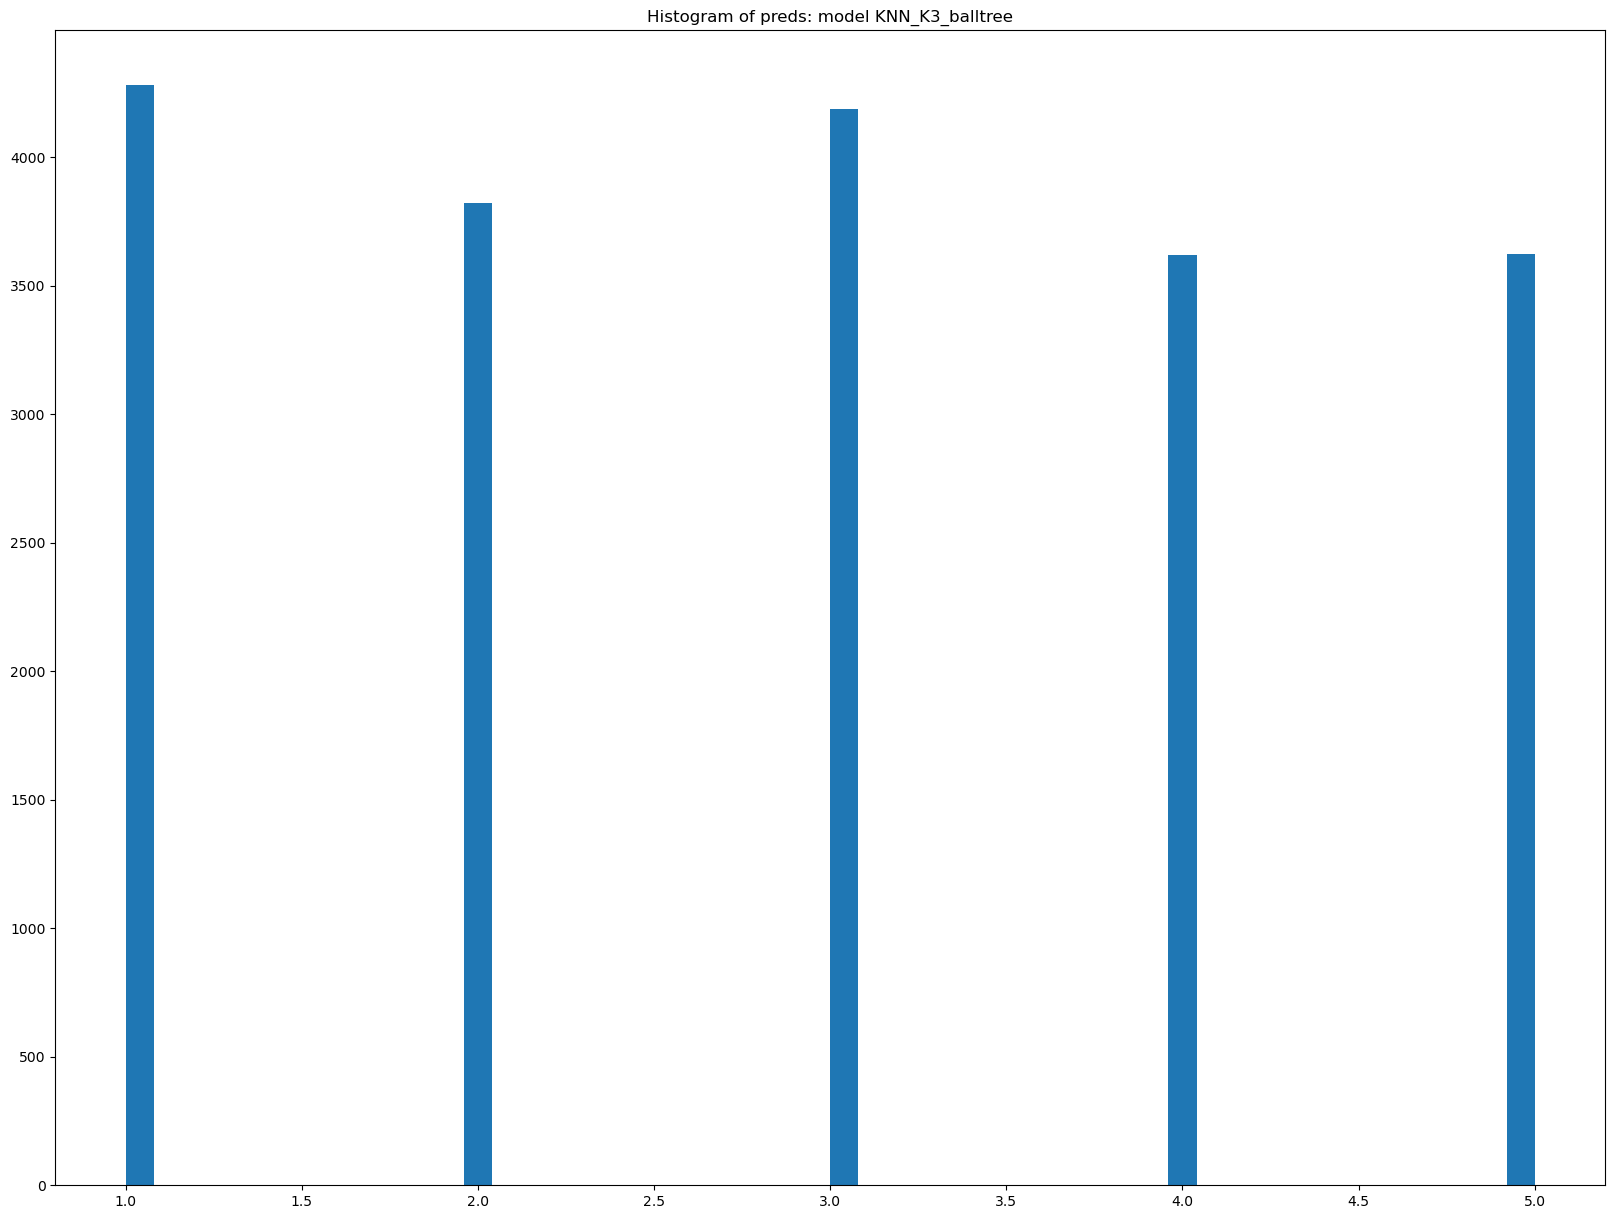

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9336
The Recall is:  0.9329
The F1 score is:  0.9327
The Matthews correlation coefficient is:  0.9163

This is the Confusion Matrix
      0     1     2     3     4
0  4038    17    14     2     2
1    30  3501    65    93    63
2    84    28  3795   129     8
3    38    97   237  3347    15
4    89   178    74    47  3533
model_number: 38
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


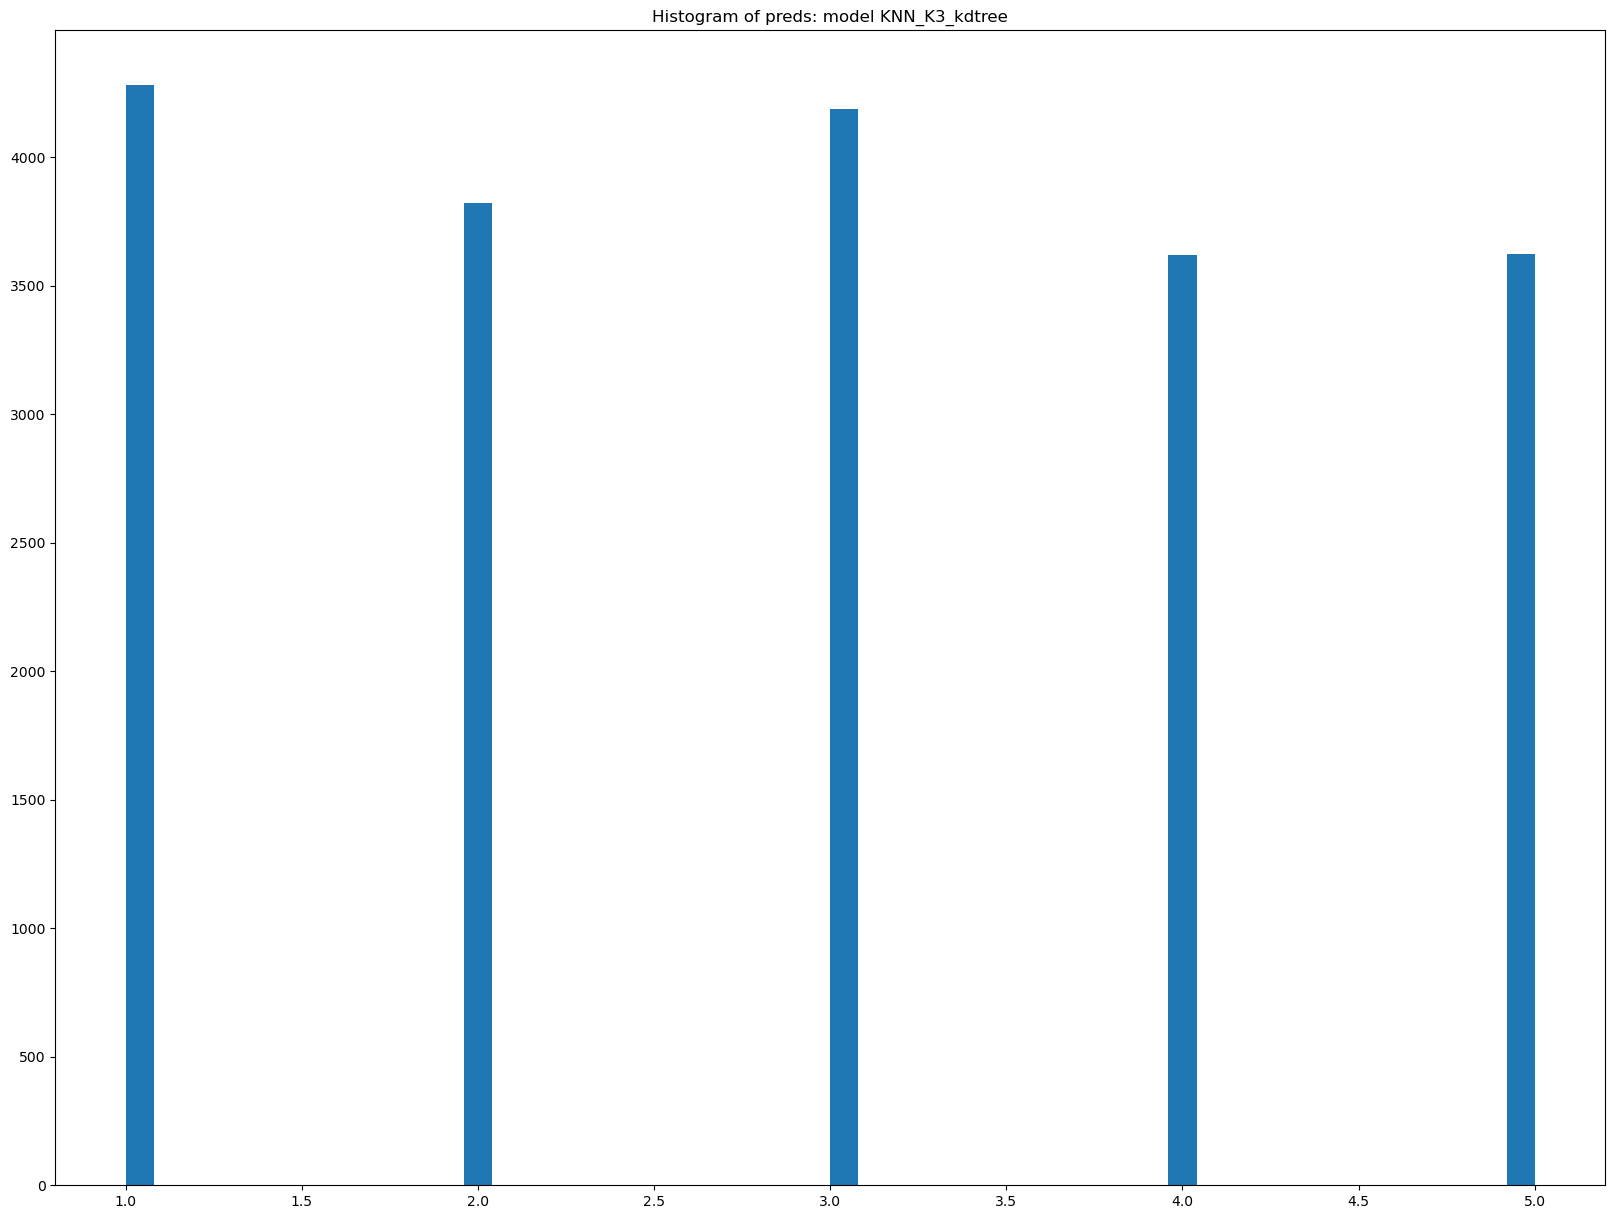

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9336
The Recall is:  0.9329
The F1 score is:  0.9327
The Matthews correlation coefficient is:  0.9163

This is the Confusion Matrix
      0     1     2     3     4
0  4038    17    14     2     2
1    30  3501    65    93    63
2    84    28  3795   129     8
3    38    97   237  3347    15
4    89   178    74    47  3533
model_number: 39
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


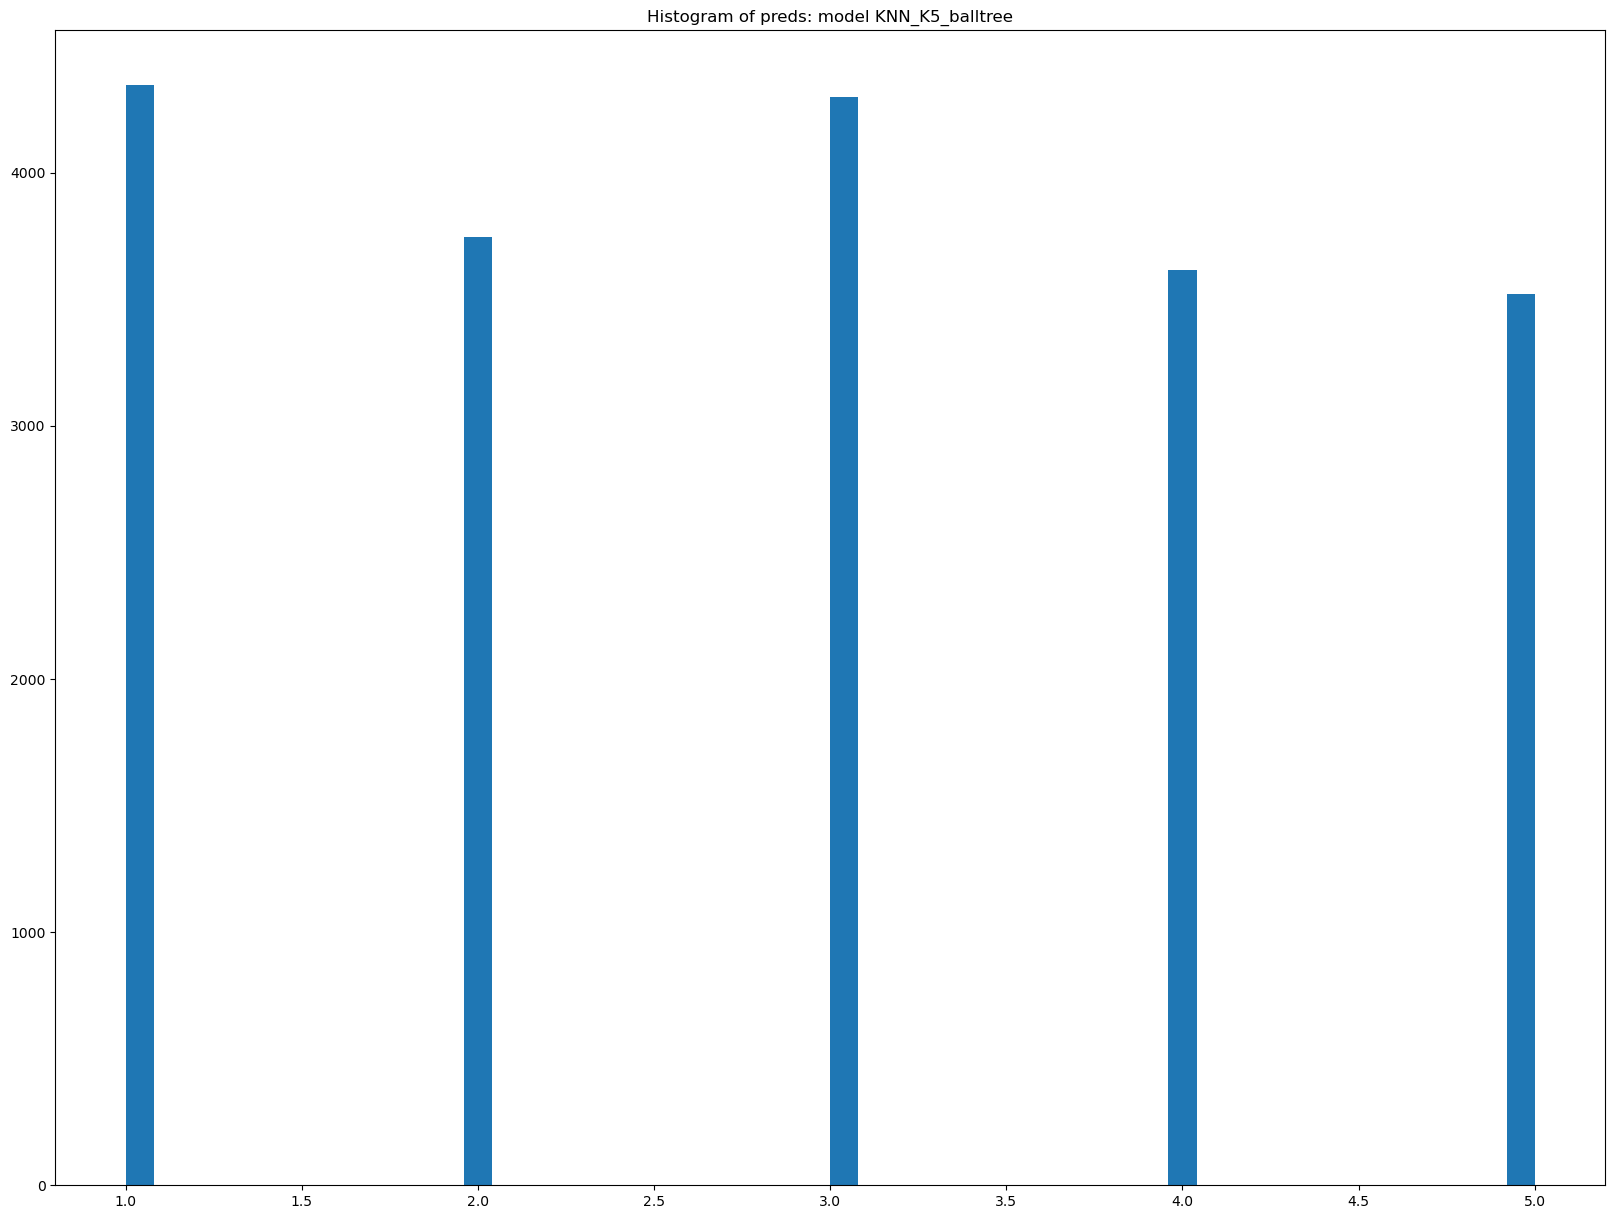

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9232
The Recall is:  0.9217
The F1 score is:  0.9215
The Matthews correlation coefficient is:  0.9026

This is the Confusion Matrix
      0     1     2     3     4
0  4032    16    24     1     0
1    30  3449    97   105    71
2   110    21  3780   126     7
3    44    76   291  3308    15
4   129   185   105    75  3427
model_number: 40
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


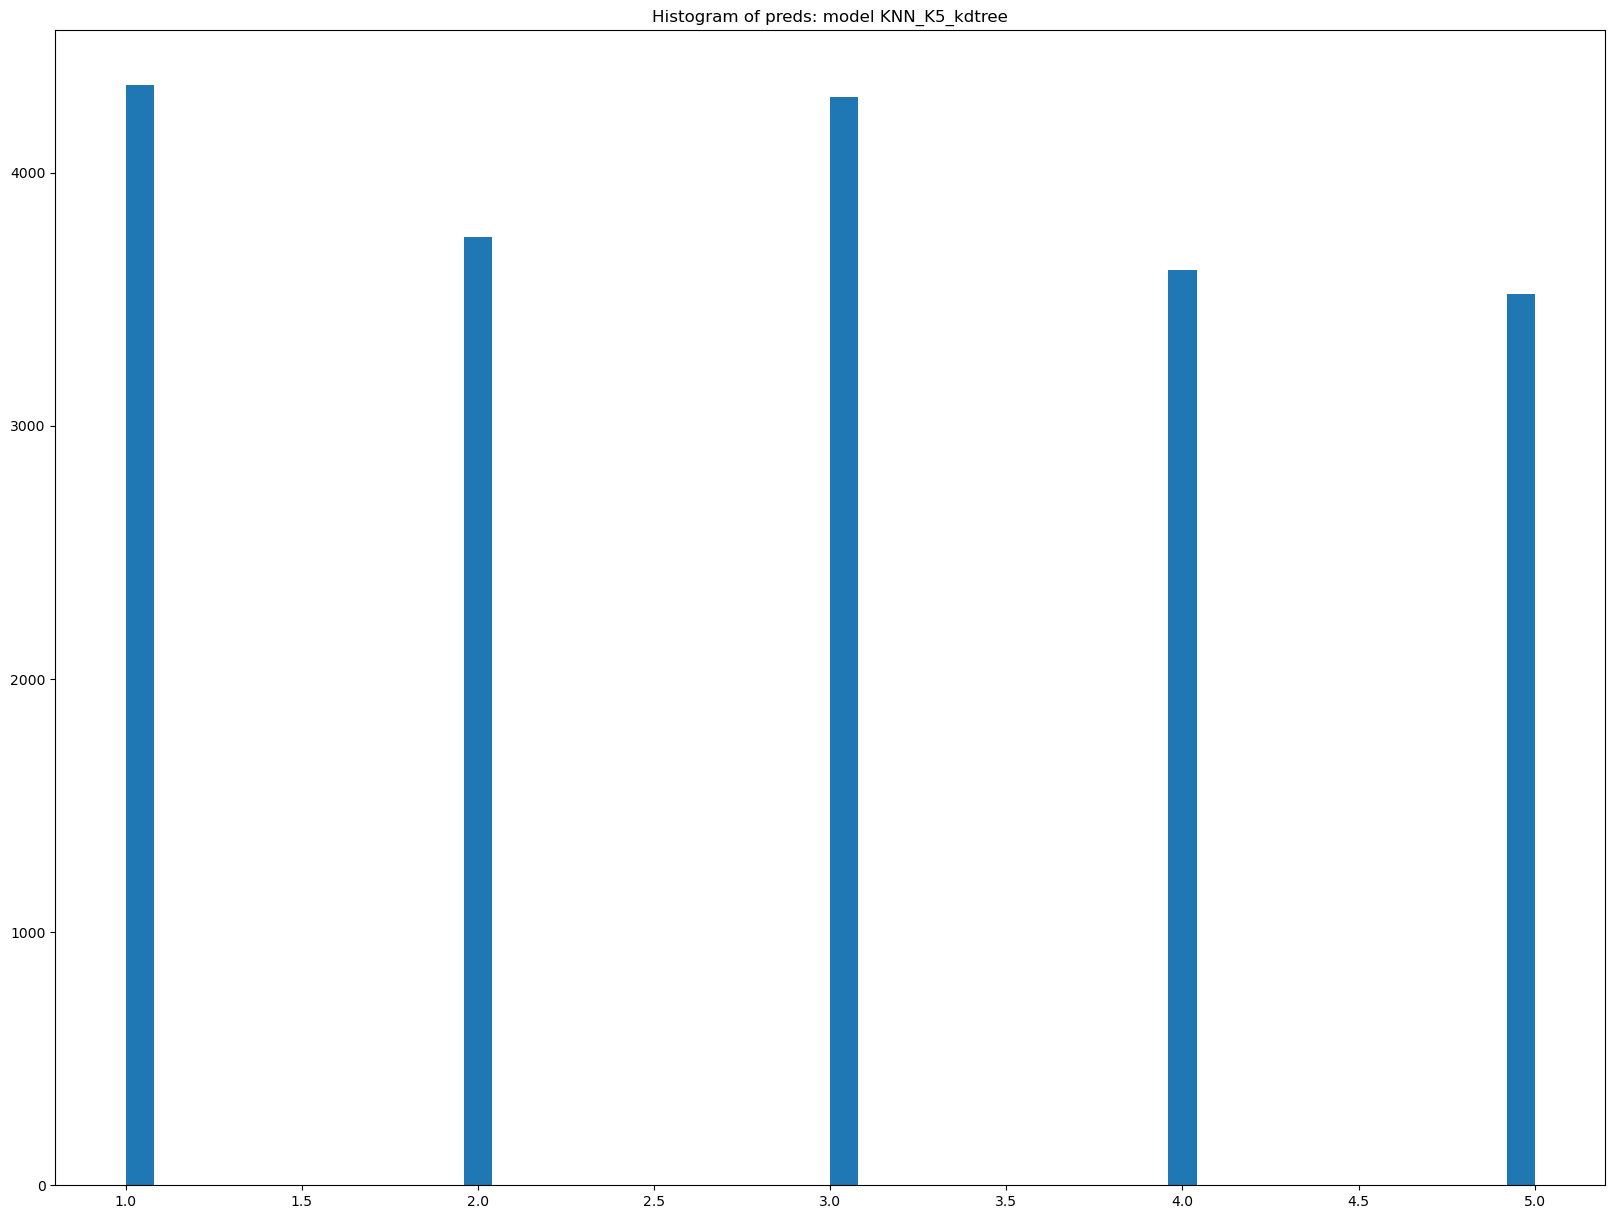

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9232
The Recall is:  0.9217
The F1 score is:  0.9215
The Matthews correlation coefficient is:  0.9026

This is the Confusion Matrix
      0     1     2     3     4
0  4032    16    24     1     0
1    30  3449    97   105    71
2   110    21  3780   126     7
3    44    76   291  3308    15
4   129   185   105    75  3427
model_number: 41
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


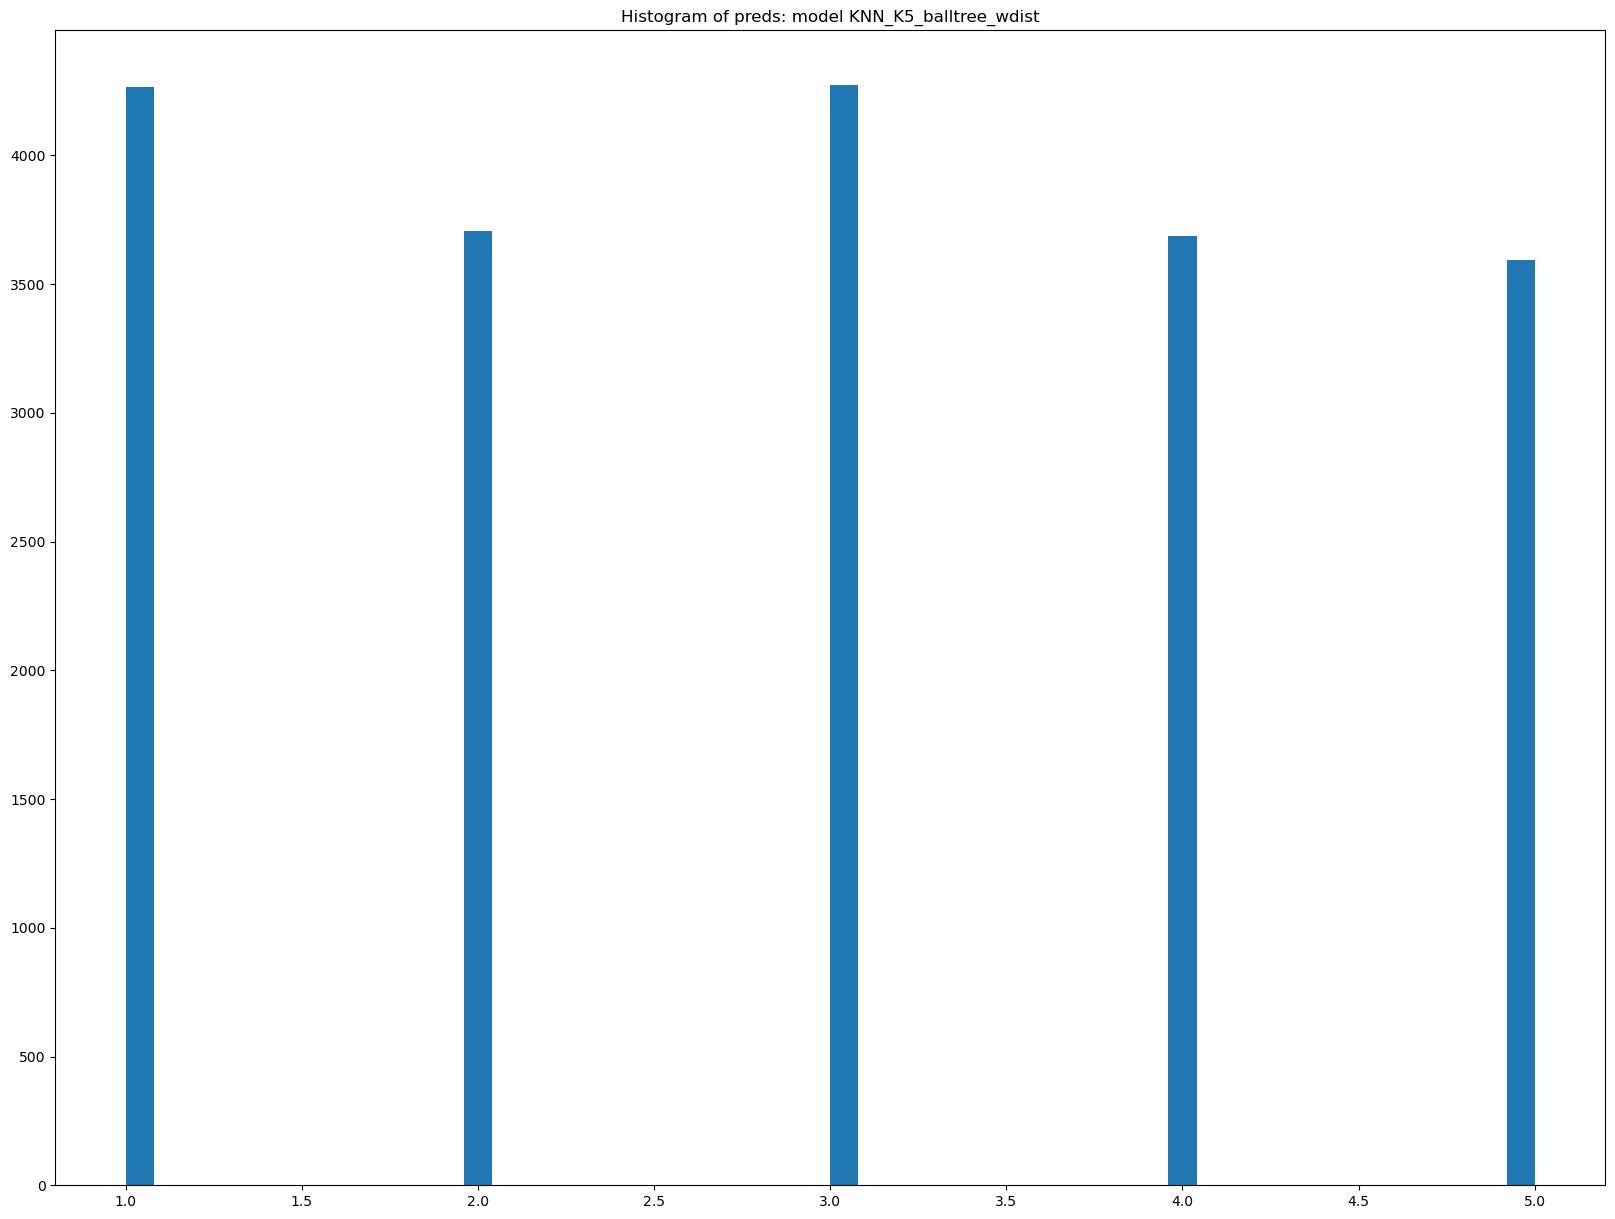

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9322
The Recall is:  0.9313
The F1 score is:  0.9312
The Matthews correlation coefficient is:  0.9144

This is the Confusion Matrix
      0     1     2     3     4
0  4037    15    18     3     0
1    23  3446    95   113    75
2    75    14  3824   124     7
3    31    55   251  3380    17
4   101   175    84    65  3496
model_number: 42
Scaler: MinMaxScaler MinMaxScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


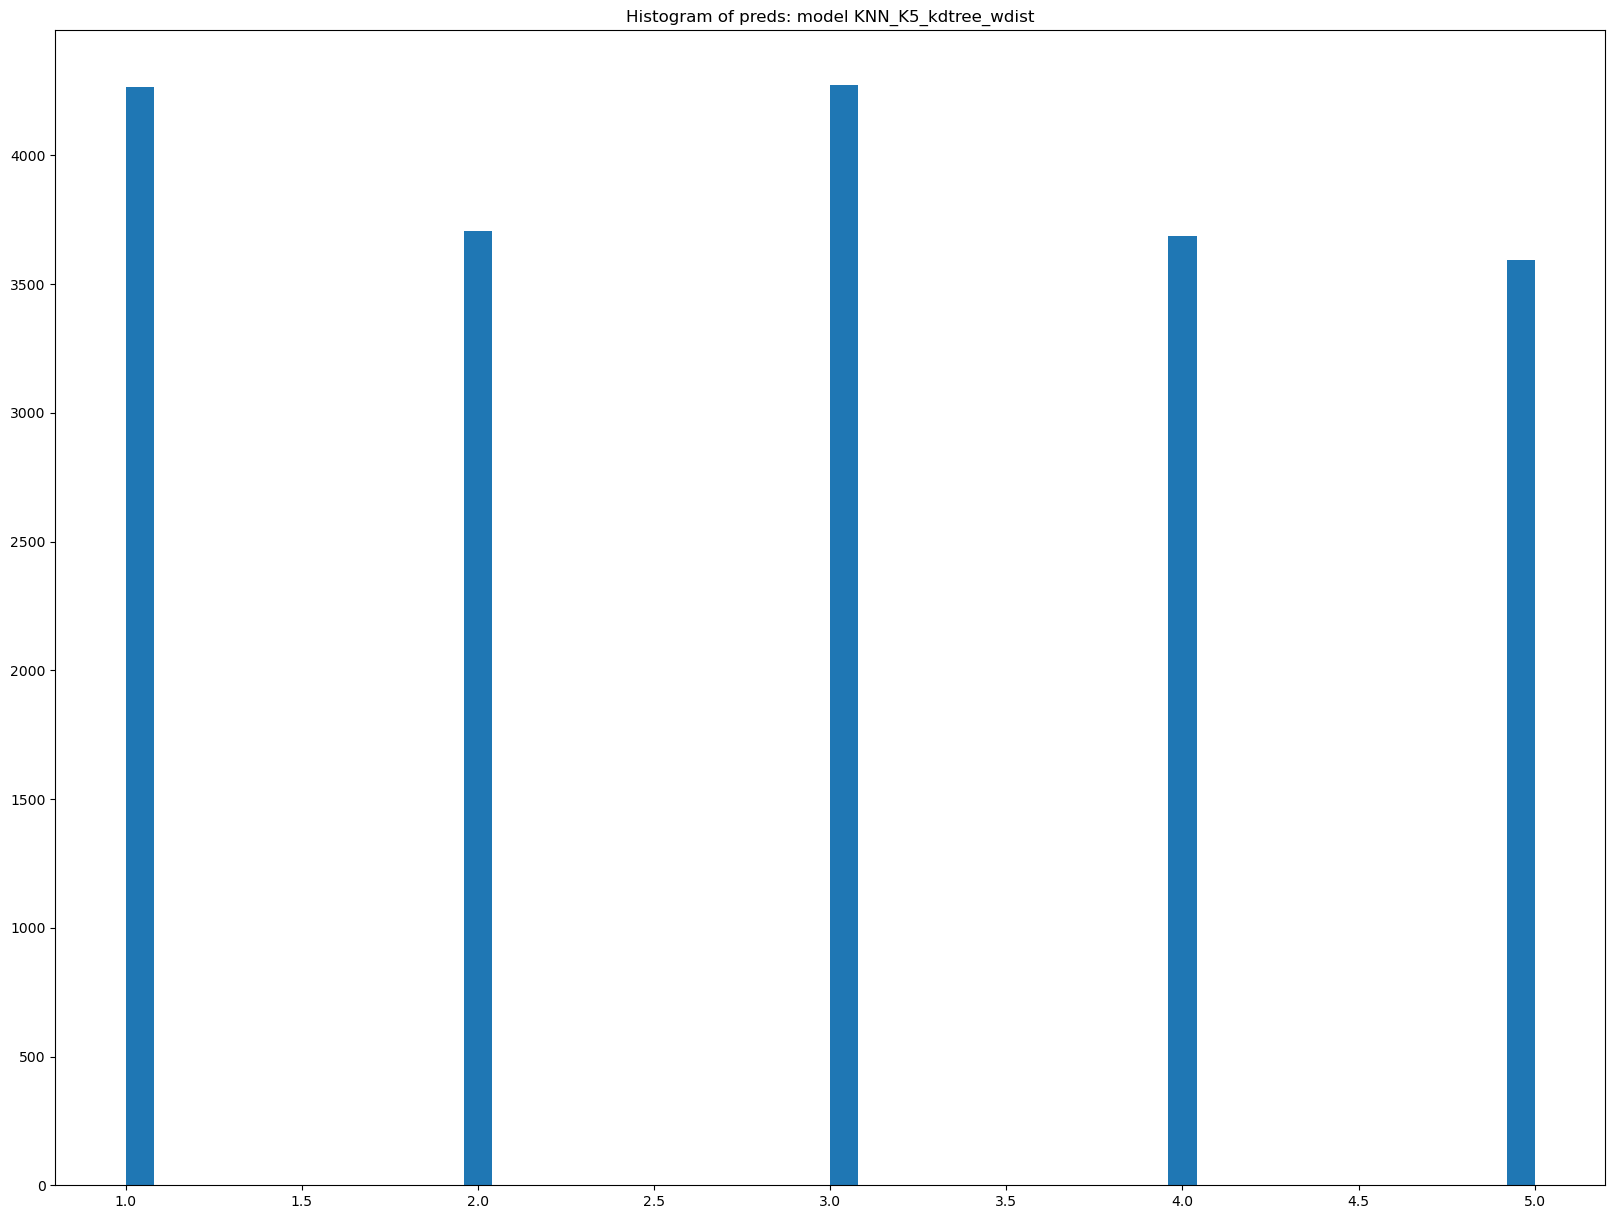

Scaler: MinMaxScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9322
The Recall is:  0.9313
The F1 score is:  0.9312
The Matthews correlation coefficient is:  0.9144

This is the Confusion Matrix
      0     1     2     3     4
0  4037    15    18     3     0
1    23  3446    95   113    75
2    75    14  3824   124     7
3    31    55   251  3380    17
4   101   175    84    65  3496
model_number: 43
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: RandomForest RandomForestClassifier()


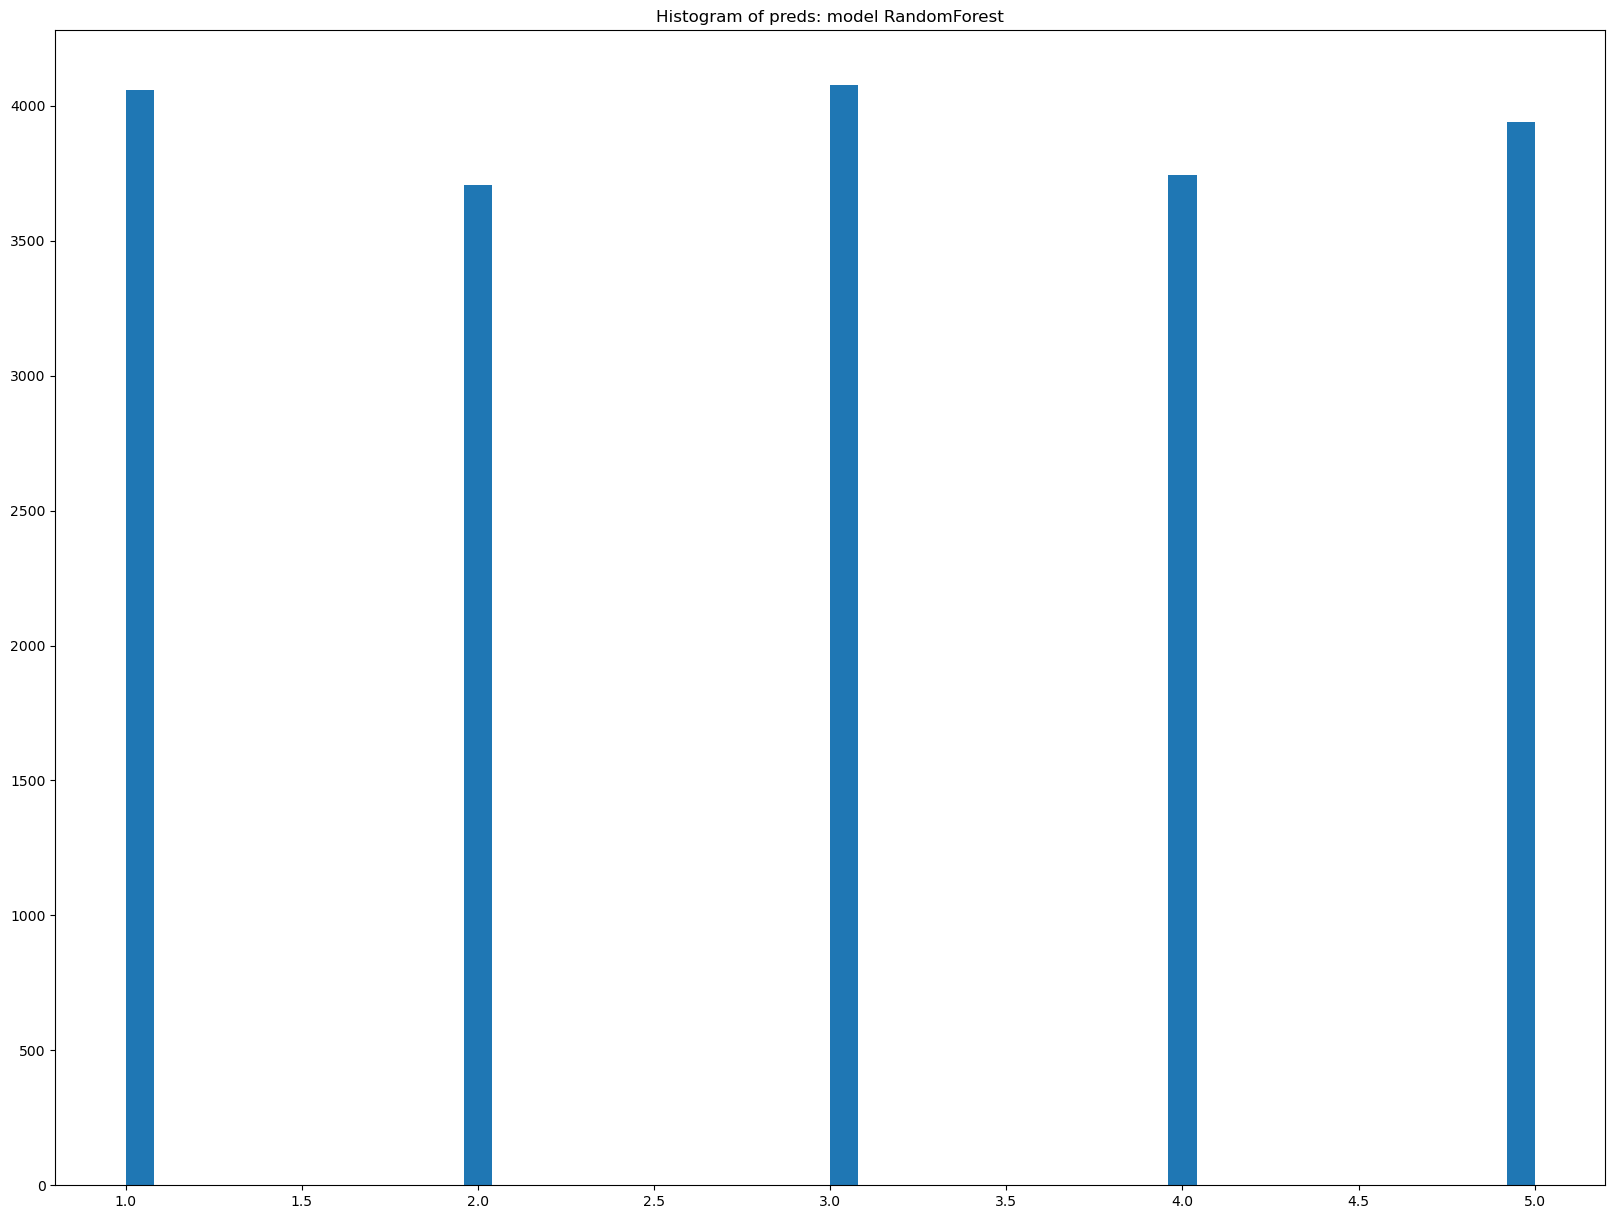

Scaler: StandardScaler() imputer: SimpleImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9901
The Recall is:  0.9901
The F1 score is:  0.9901
The Matthews correlation coefficient is:  0.9876

This is the Confusion Matrix
      0     1     2     3     4
0  4051    15     7     0     0
1     4  3676    19    18    35
2     4     0  4013    25     2
3     0     0    35  3694     5
4     0    15     2     7  3897
model_number: 44
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()


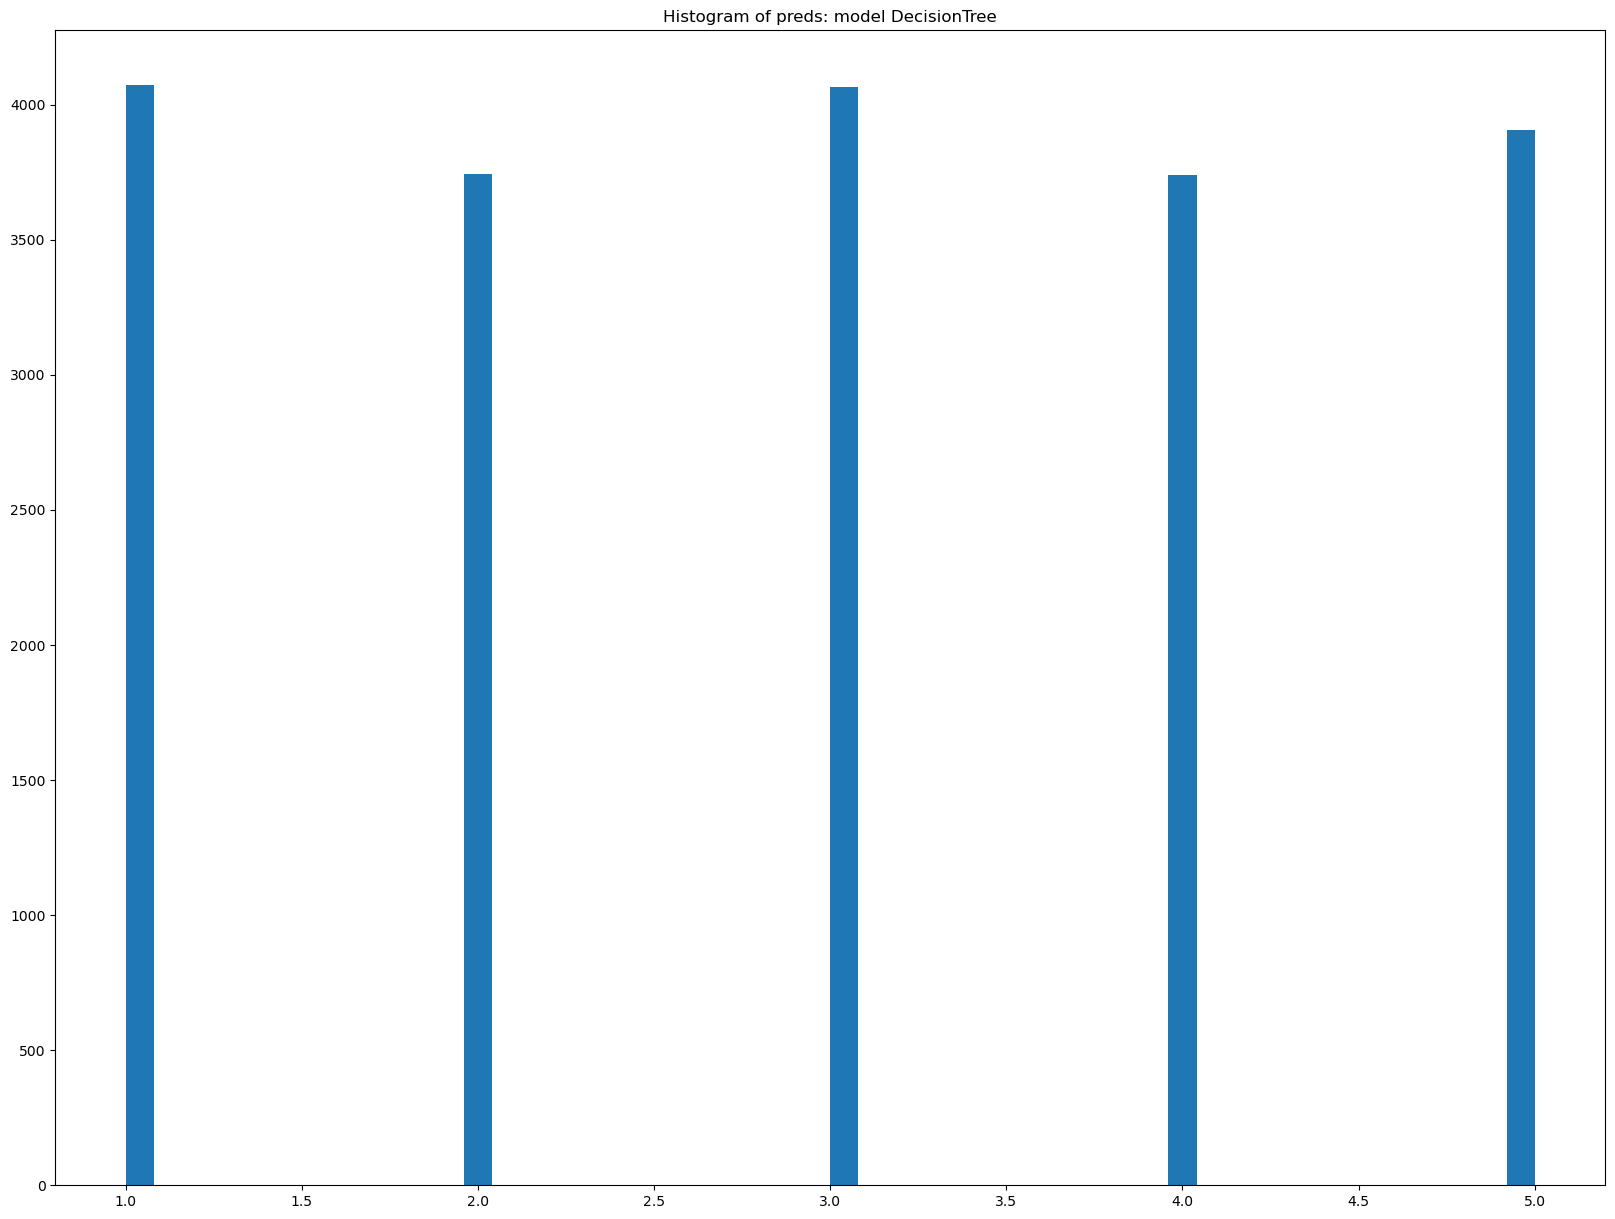

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9640
The Recall is:  0.9640
The F1 score is:  0.9640
The Matthews correlation coefficient is:  0.9550

This is the Confusion Matrix
      0     1     2     3     4
0  4034    14    14     6     5
1    14  3586    18    31   103
2    10    11  3925    67    31
3    11    25    83  3563    52
4     3   106    26    72  3714
model_number: 45
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


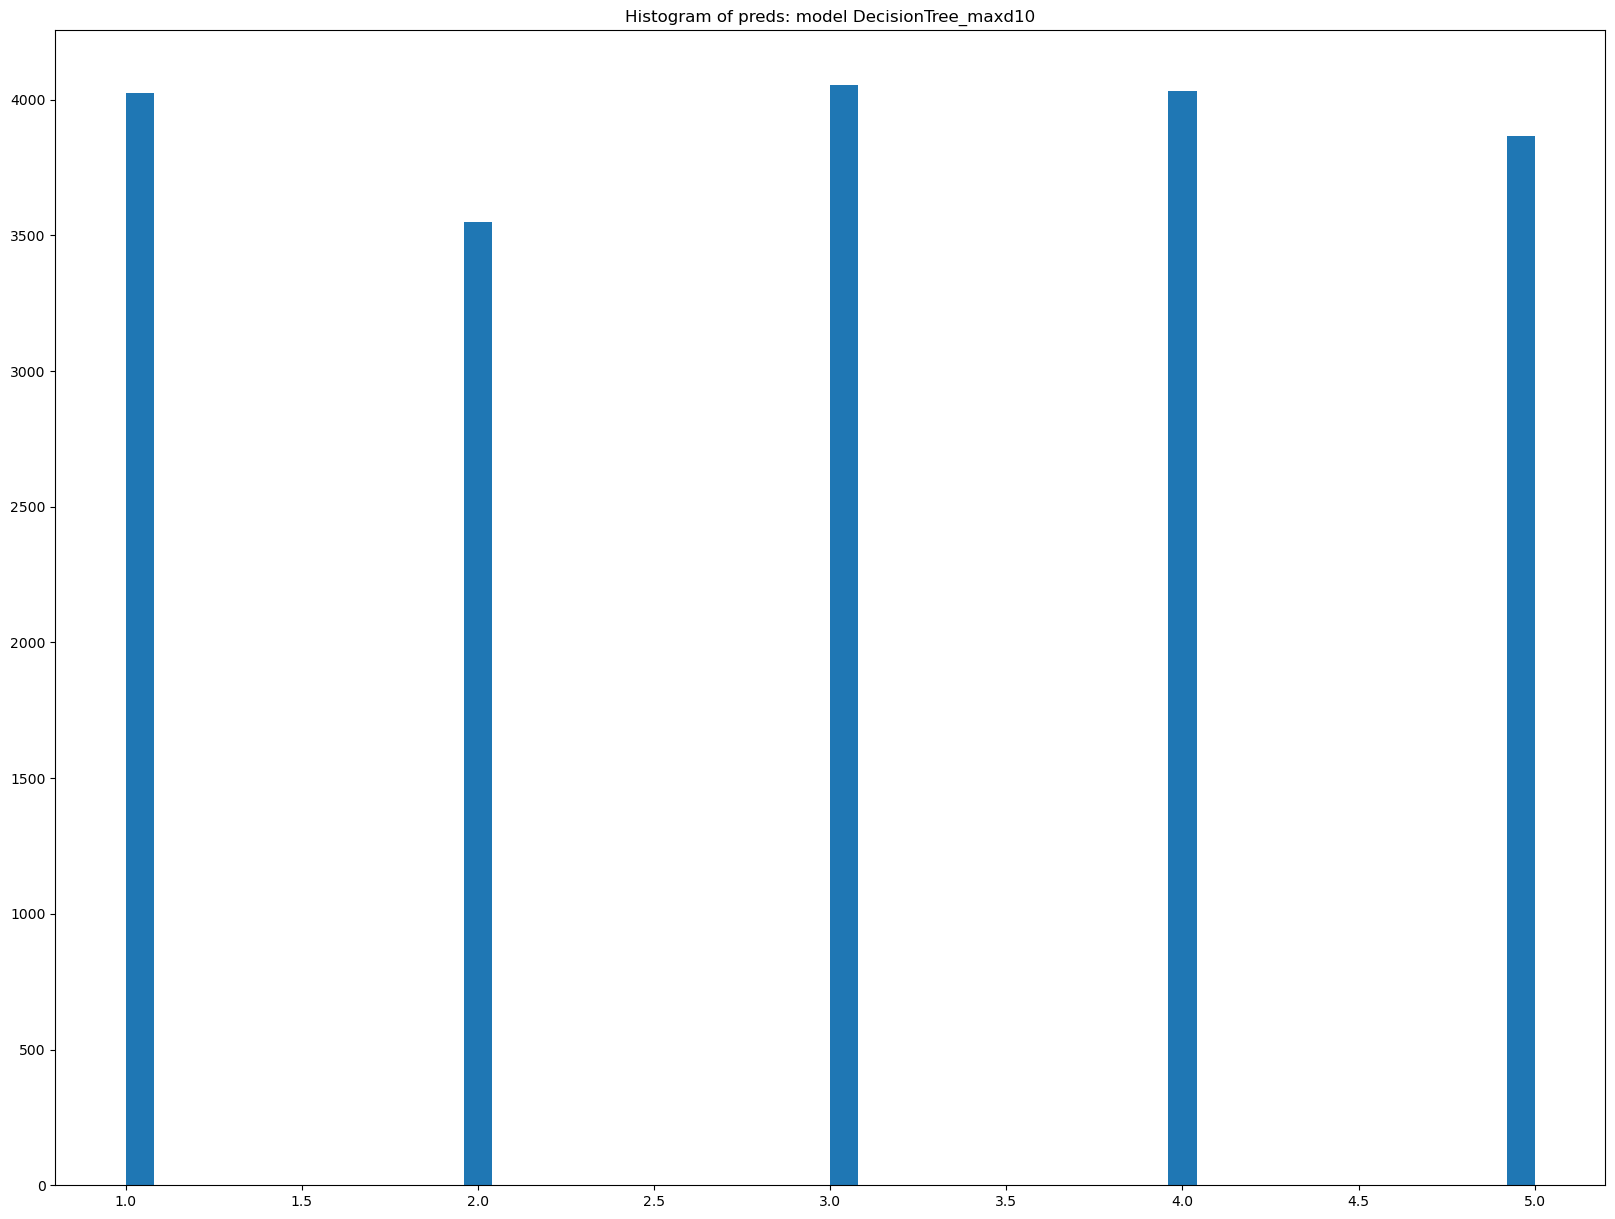

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8972
The Recall is:  0.8953
The F1 score is:  0.8959
The Matthews correlation coefficient is:  0.8693

This is the Confusion Matrix
      0     1     2     3     4
0  3862    14   139    47    11
1    13  3387    31   144   177
2    59     2  3554   309   120
3    29    10   219  3298   178
4    62   137   110   233  3379
model_number: 46
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


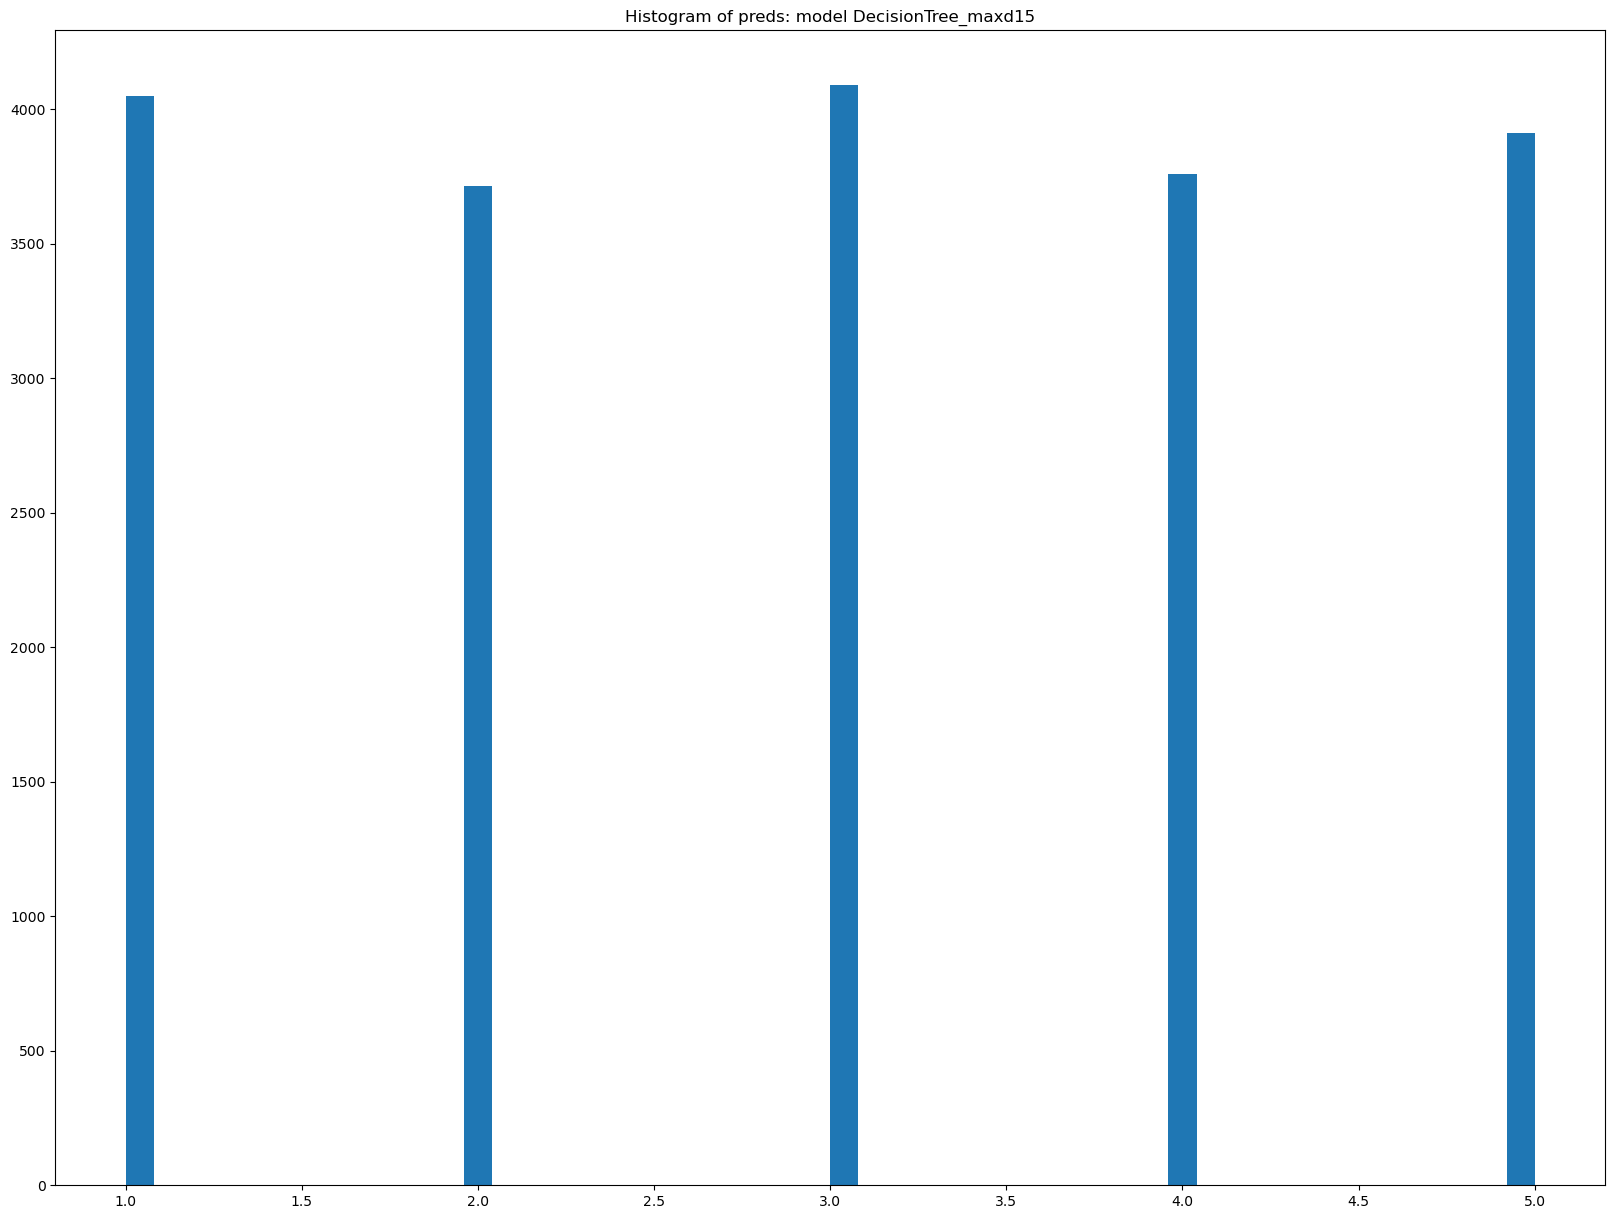

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.9530
The Recall is:  0.9529
The F1 score is:  0.9530
The Matthews correlation coefficient is:  0.9411

This is the Confusion Matrix
      0     1     2     3     4
0  4005    13    43     7     5
1    14  3551    13    50   124
2    18     7  3881    92    46
3    10    39   112  3502    71
4     4   103    40   108  3666
model_number: 47
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


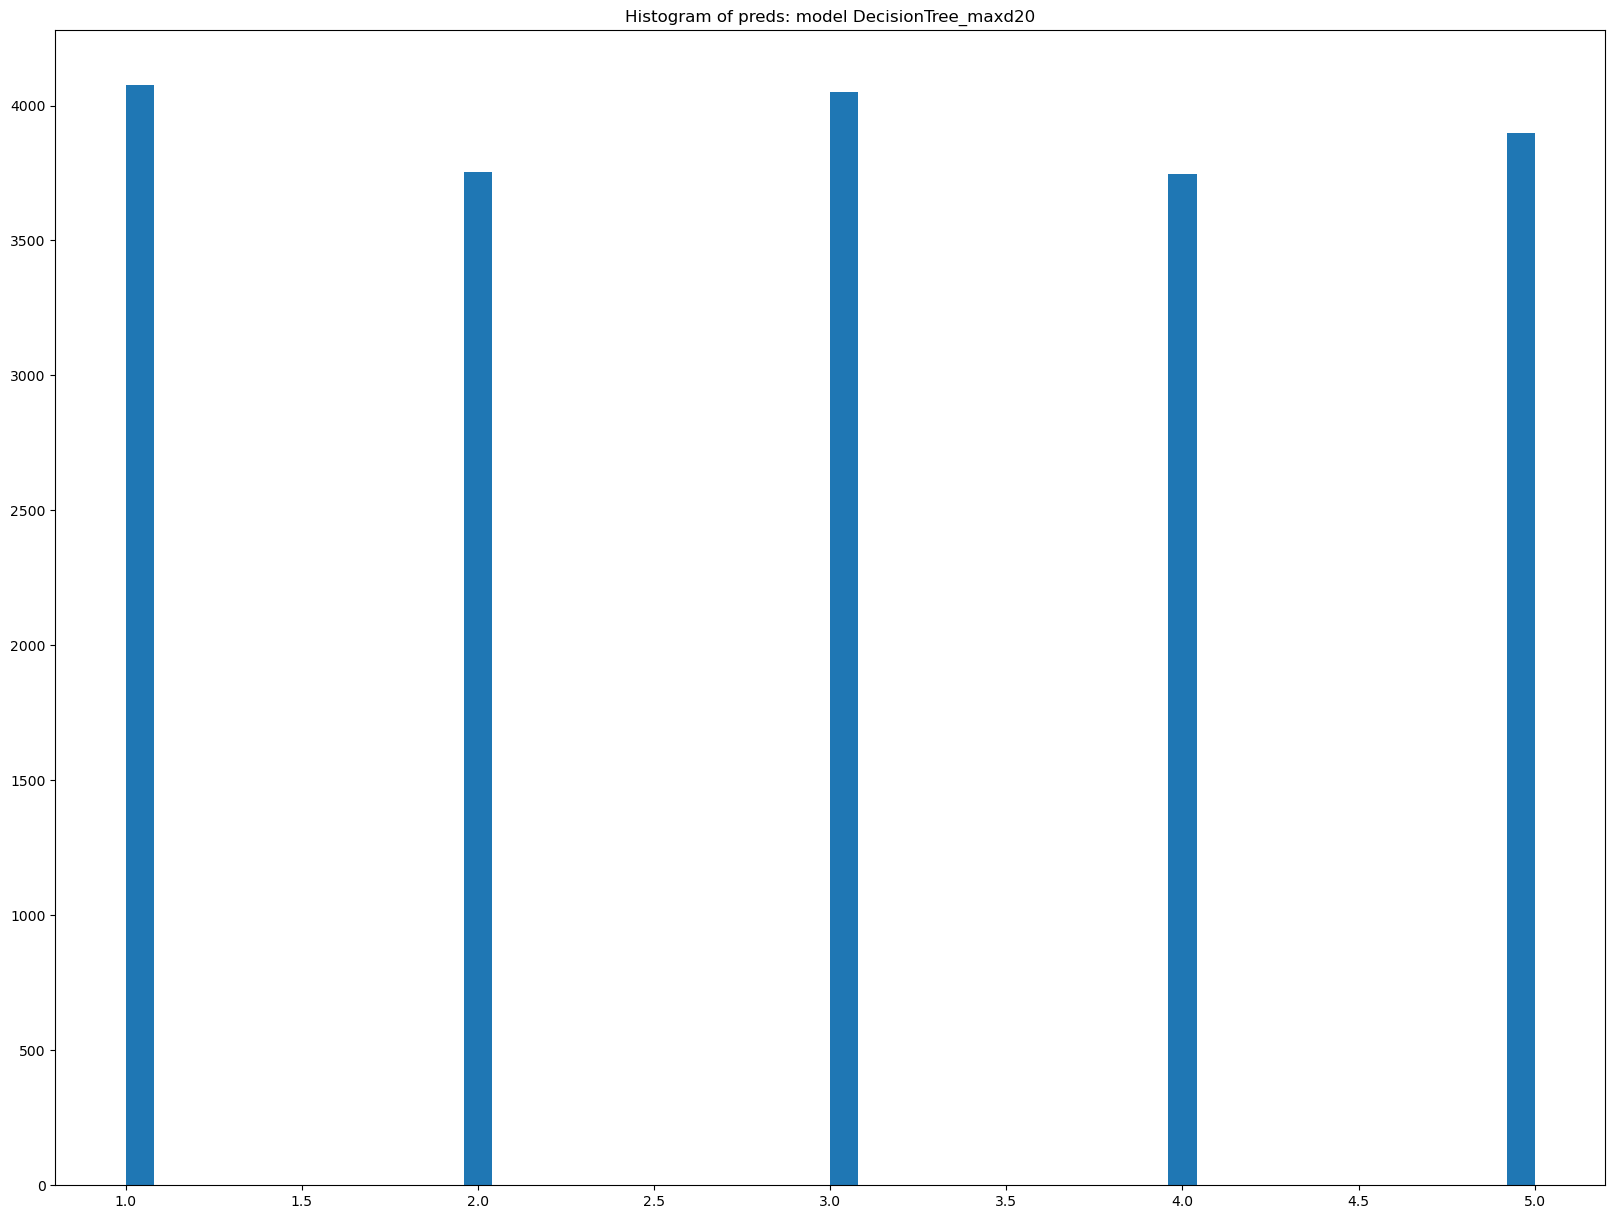

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9622
The Recall is:  0.9623
The F1 score is:  0.9622
The Matthews correlation coefficient is:  0.9528

This is the Confusion Matrix
      0     1     2     3     4
0  4034    16    13     5     5
1    10  3595    12    33   102
2    18     7  3914    69    36
3    11    25    82  3553    63
4     2   112    29    87  3691
model_number: 48
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


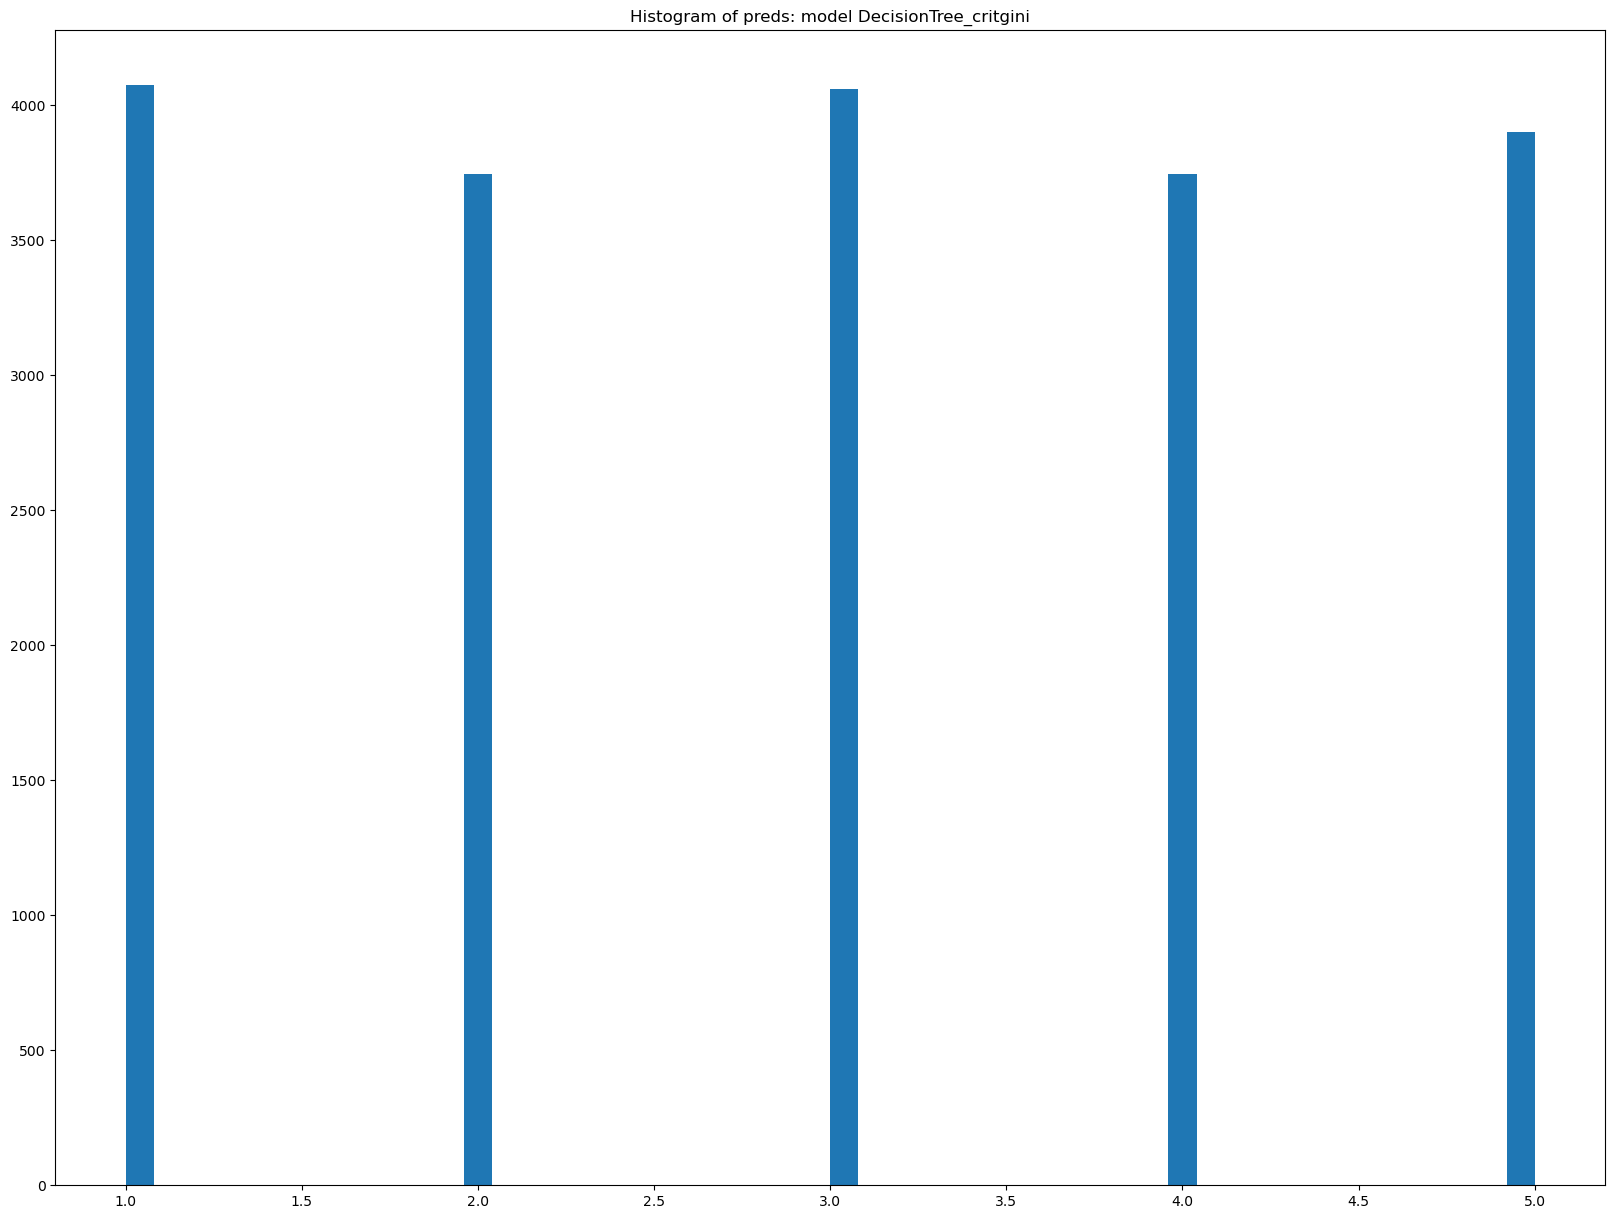

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9643
The Recall is:  0.9644
The F1 score is:  0.9643
The Matthews correlation coefficient is:  0.9554

This is the Confusion Matrix
      0     1     2     3     4
0  4033    13    13     9     5
1    13  3595    13    32    99
2    11     9  3923    65    36
3    13    25    76  3568    52
4     3   103    34    72  3709
model_number: 49
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


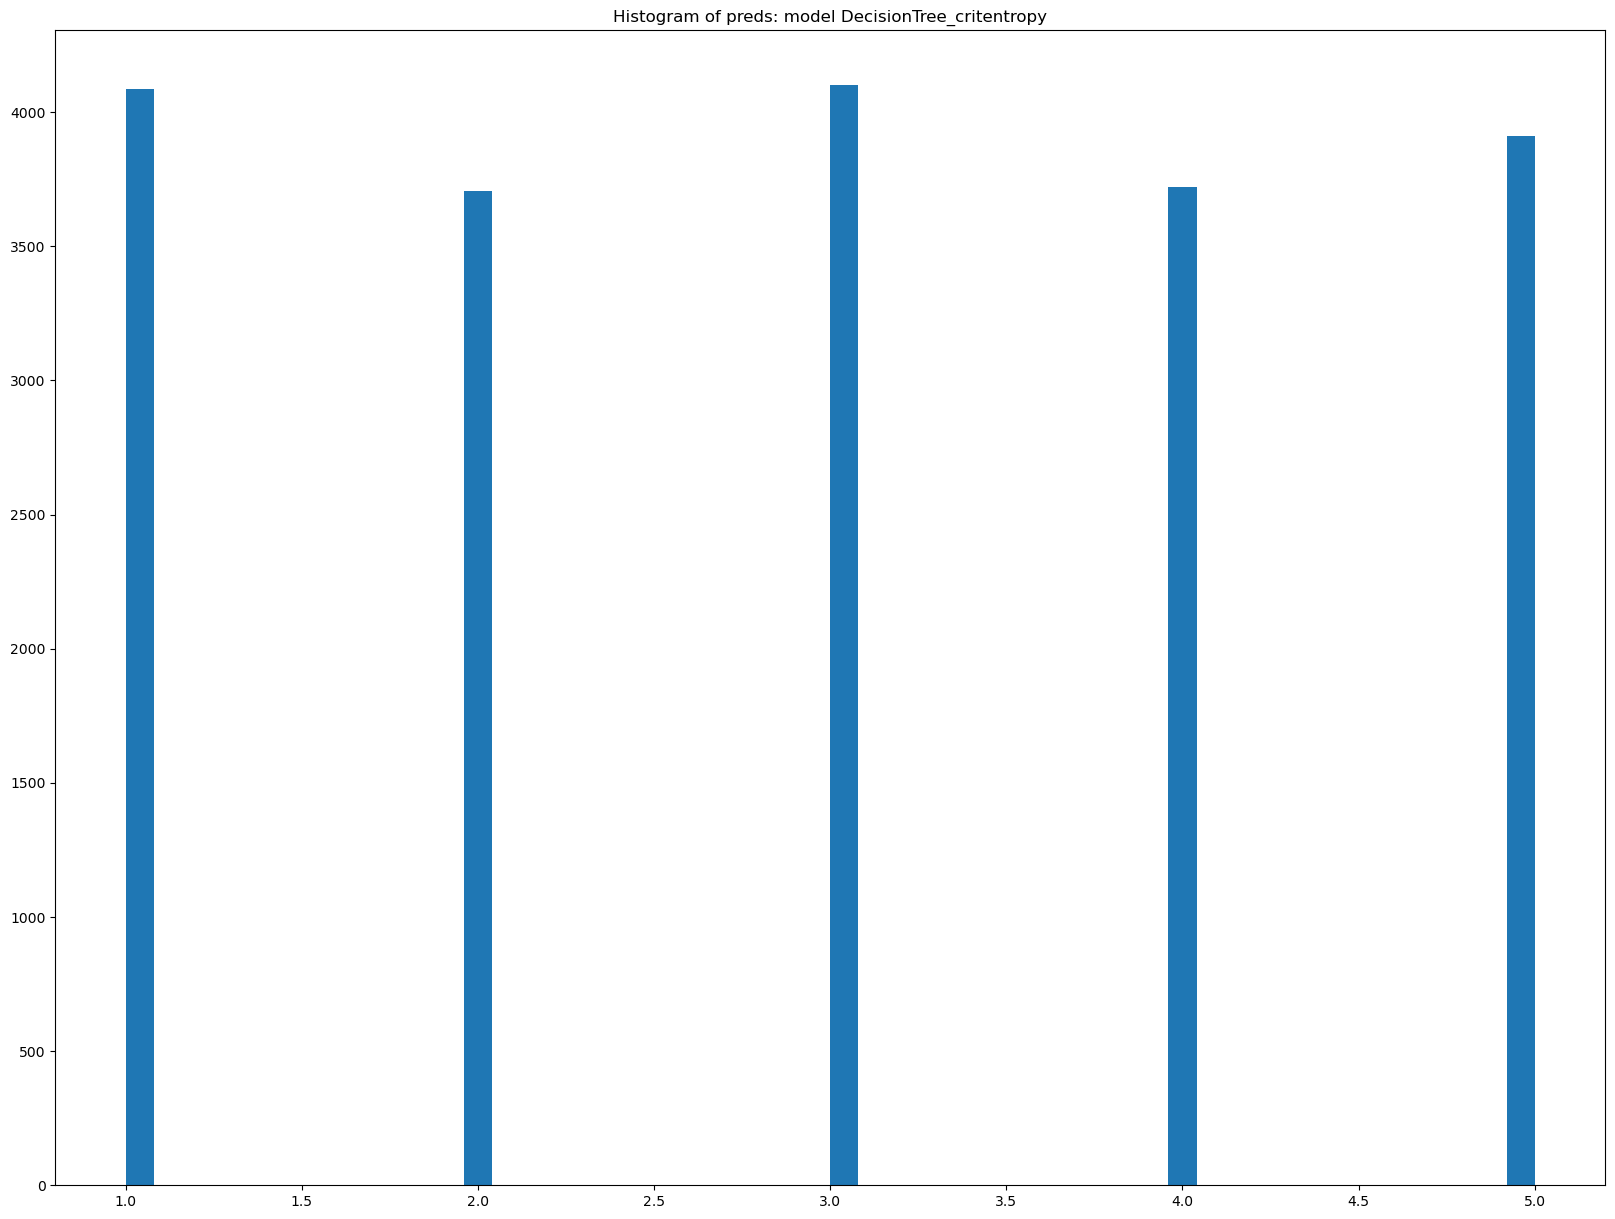

Scaler: StandardScaler() imputer: SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9611
The Recall is:  0.9611
The F1 score is:  0.9611
The Matthews correlation coefficient is:  0.9513

This is the Confusion Matrix
      0     1     2     3     4
0  4042    11    12     2     6
1    13  3572    28    25   114
2    15     8  3904    92    25
3     9    26   106  3537    56
4     6    90    50    66  3709
model_number: 50
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: GaussianNB GaussianNB()


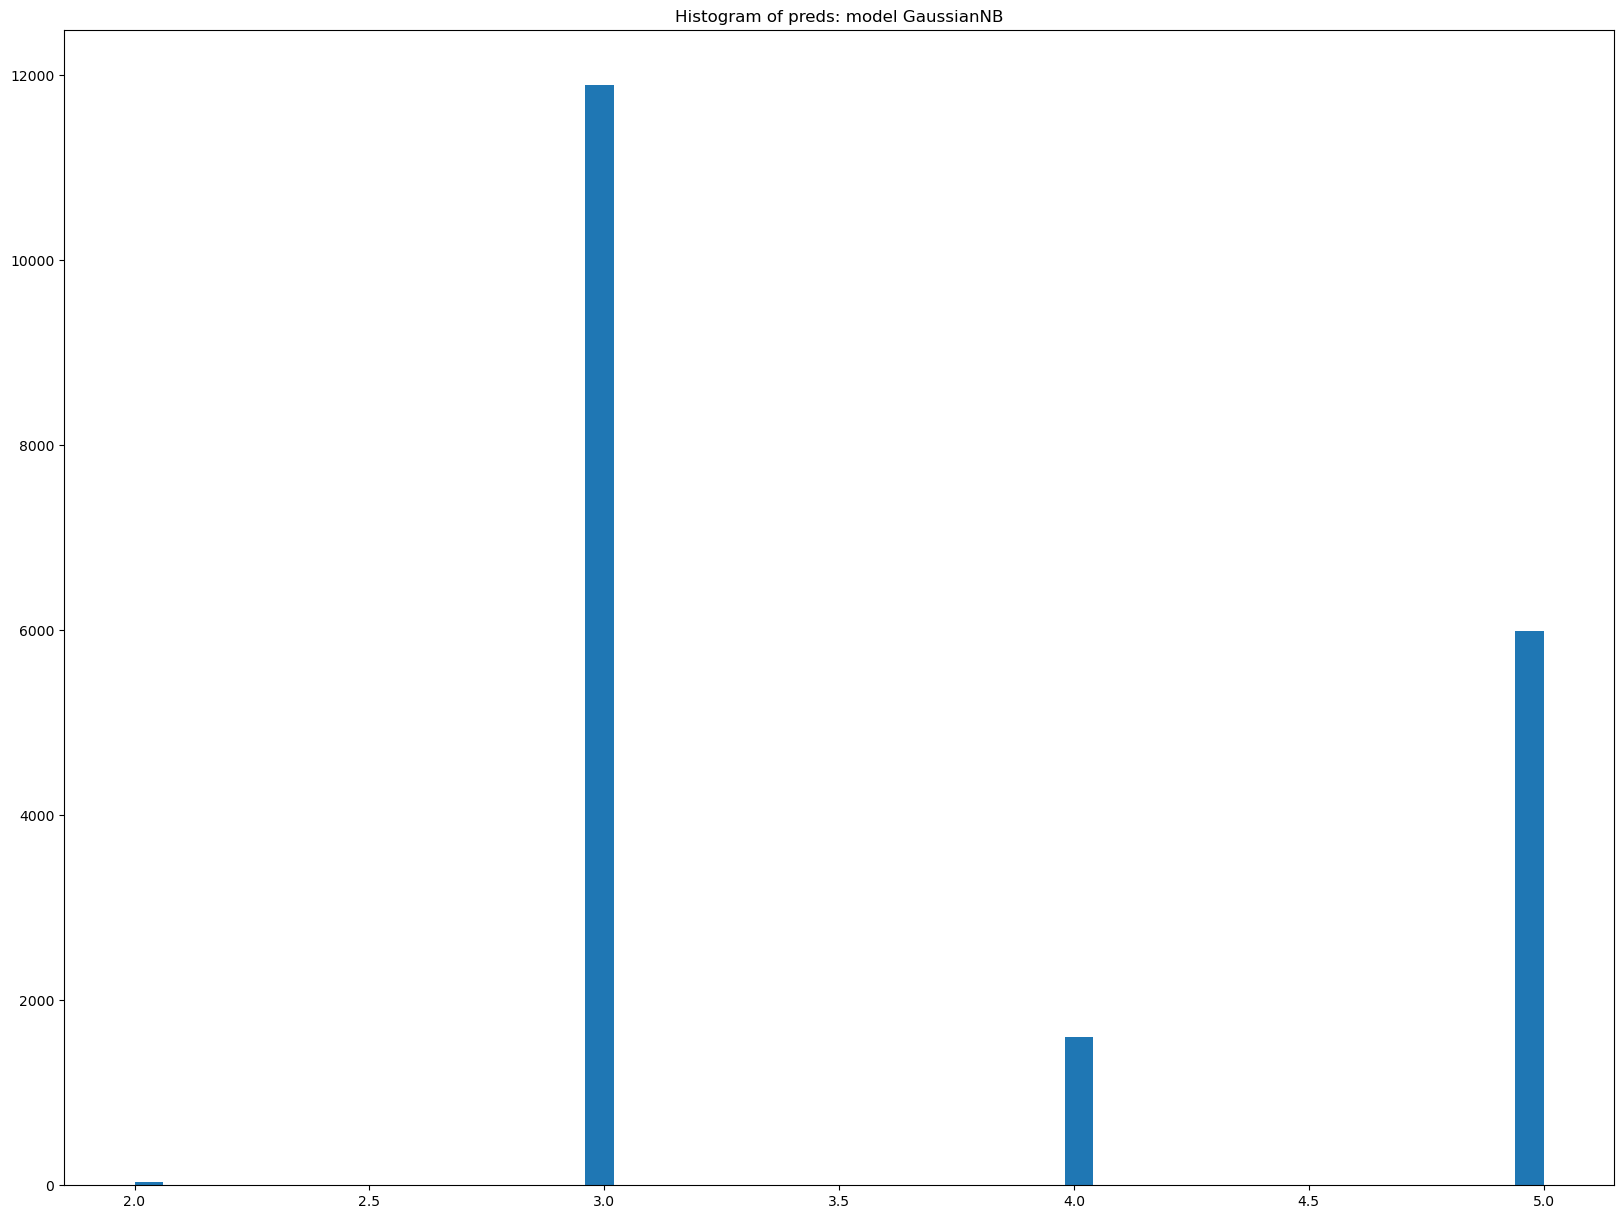

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: StandardScaler() imputer: SimpleImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.4176
The Recall is:  0.3709
The F1 score is:  0.2551
The Matthews correlation coefficient is:  0.2571

This is the Confusion Matrix
   0   1     2    3     4
0  0   0  4058    0    15
1  0  40   101  258  3353
2  0   0  4024   20     0
3  0   0  3153  568    13
4  0   0   555  756  2610
model_number: 51
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


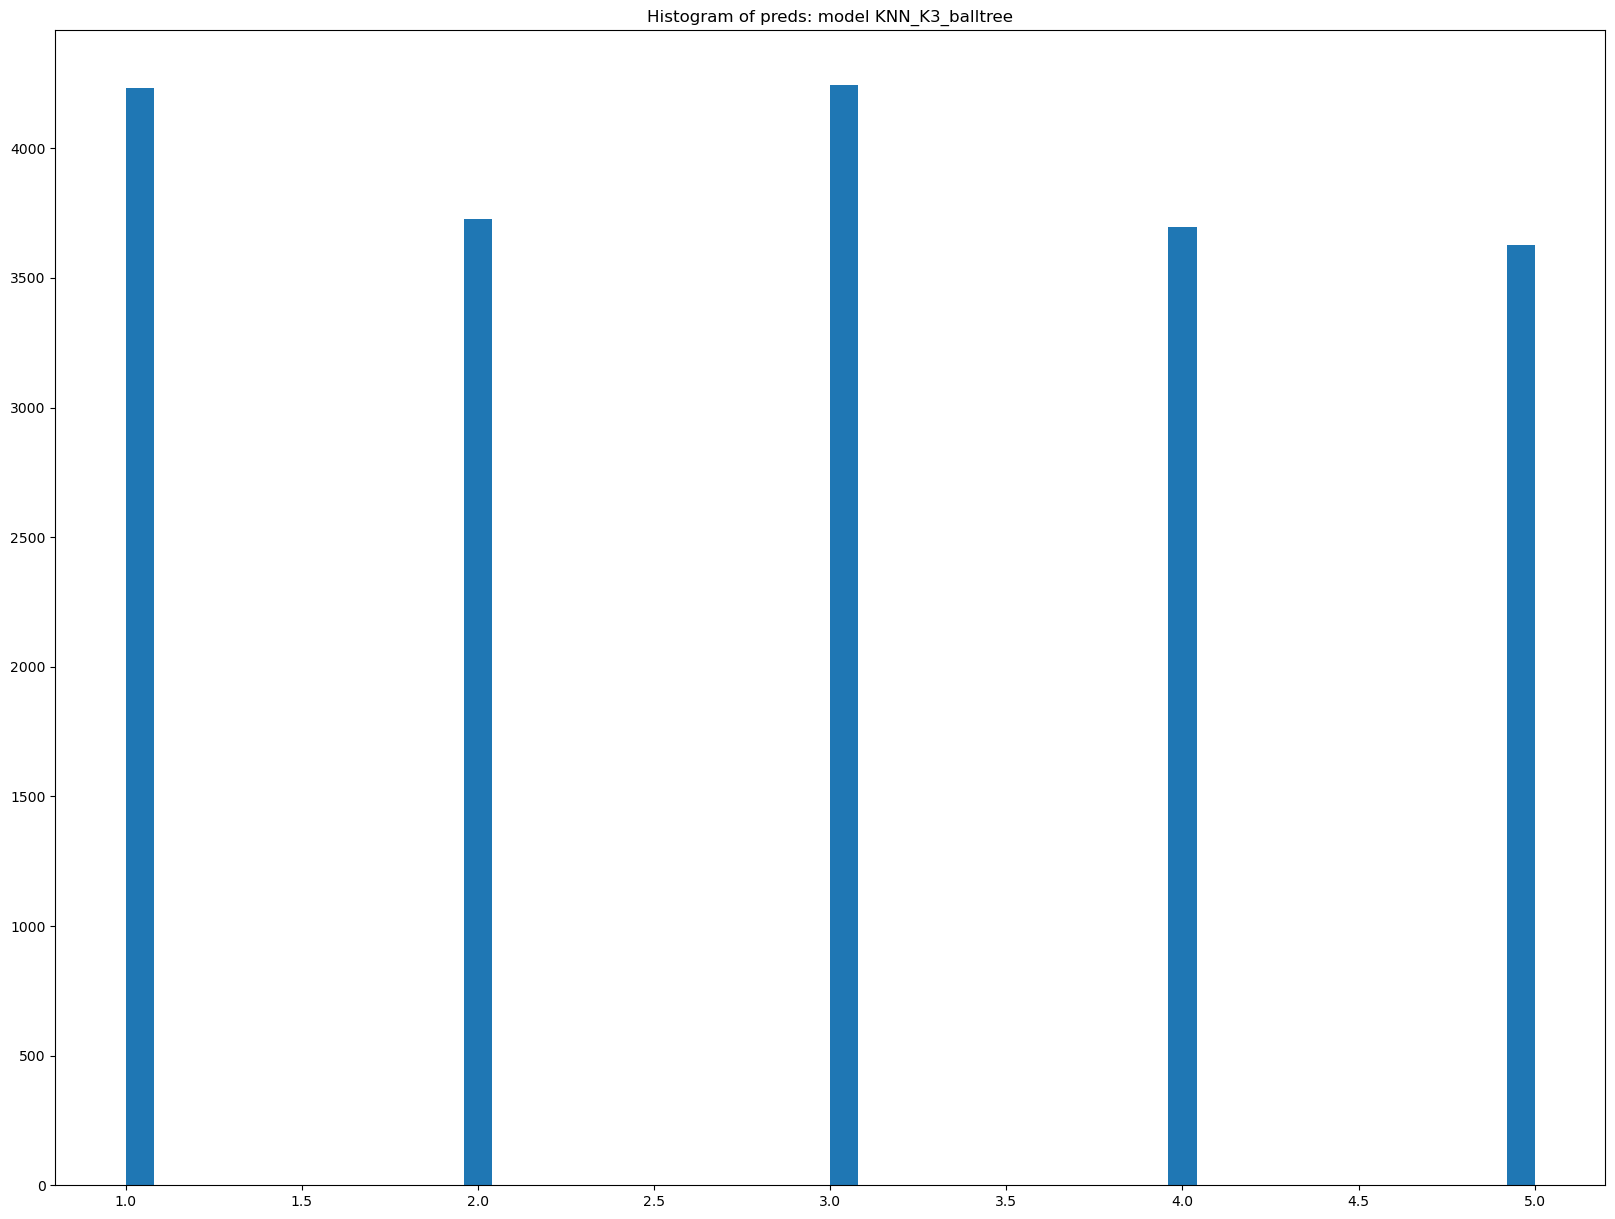

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9496
The Recall is:  0.9489
The F1 score is:  0.9488
The Matthews correlation coefficient is:  0.9364

This is the Confusion Matrix
      0     1     2     3     4
0  4053    15     5     0     0
1    28  3520    38    97    69
2    65     0  3915    62     2
3    30    10   206  3486     2
4    55   182    79    52  3553
model_number: 52
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


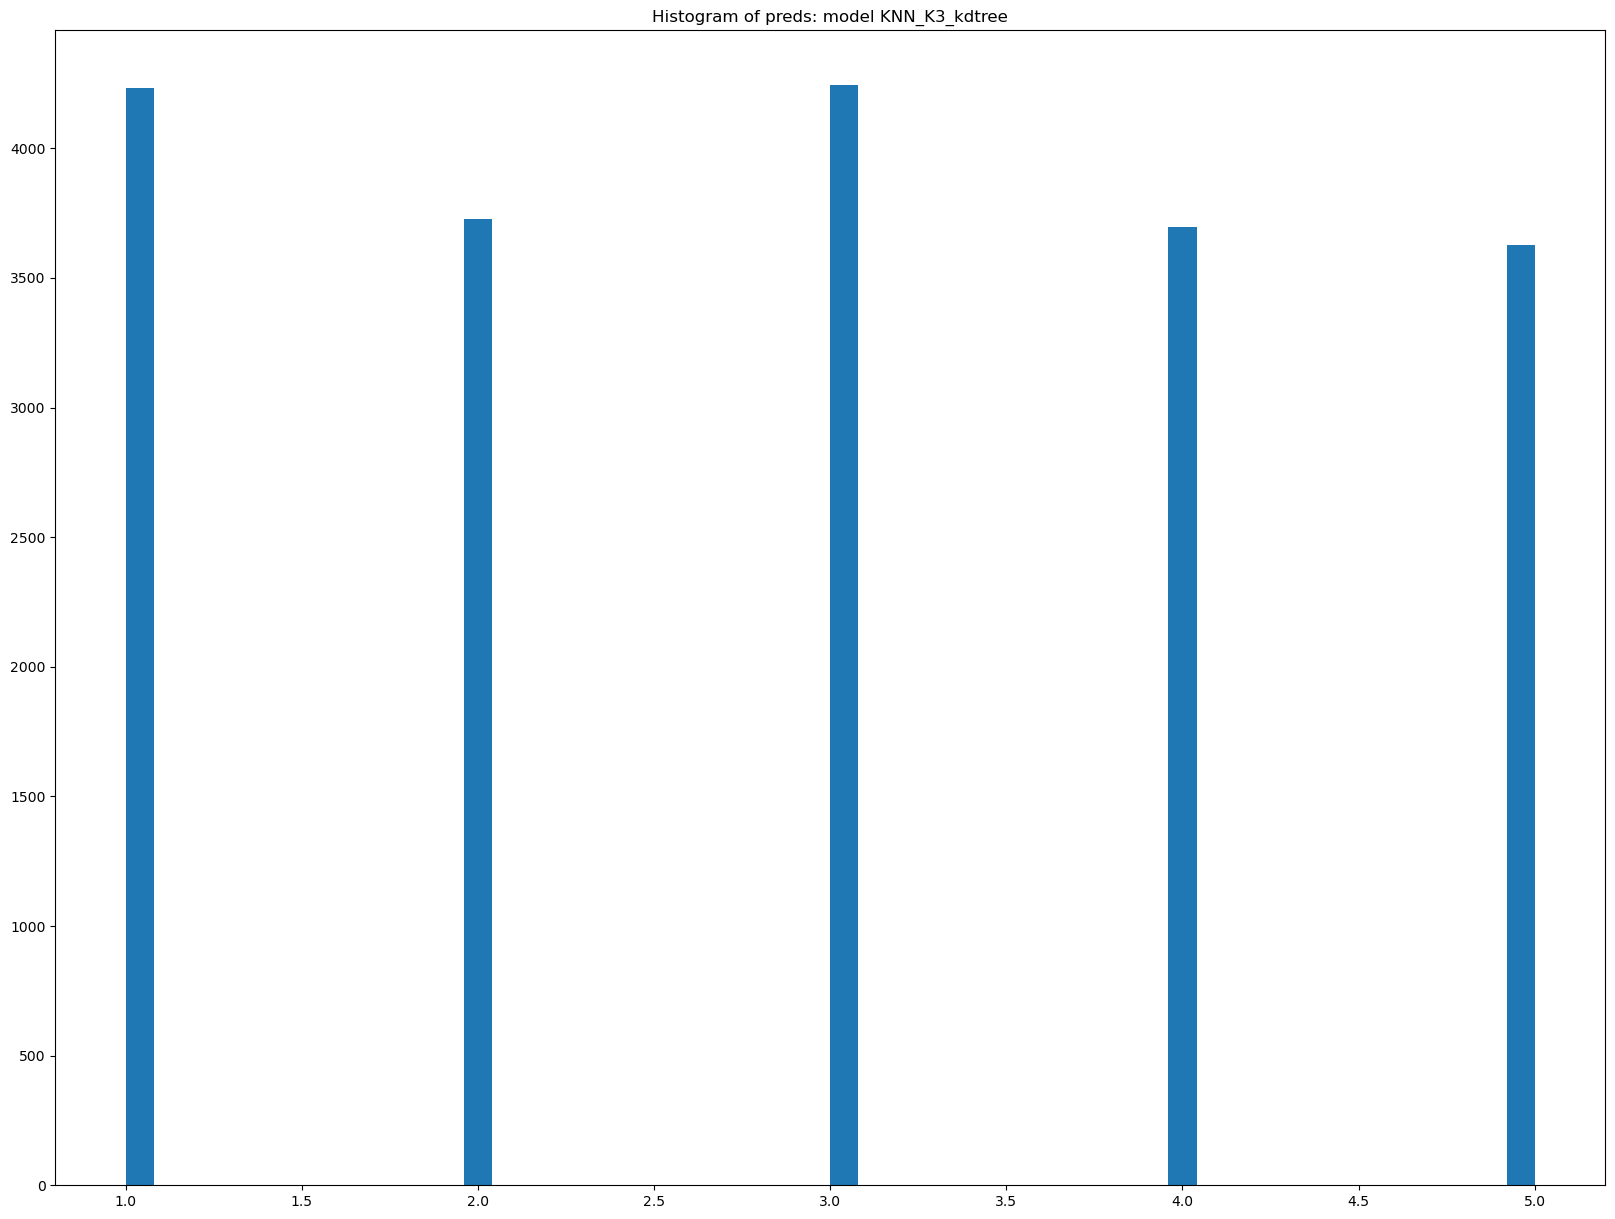

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9496
The Recall is:  0.9489
The F1 score is:  0.9488
The Matthews correlation coefficient is:  0.9364

This is the Confusion Matrix
      0     1     2     3     4
0  4053    15     5     0     0
1    28  3520    38    97    69
2    65     0  3915    62     2
3    30    10   206  3486     2
4    55   182    79    52  3553
model_number: 53
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


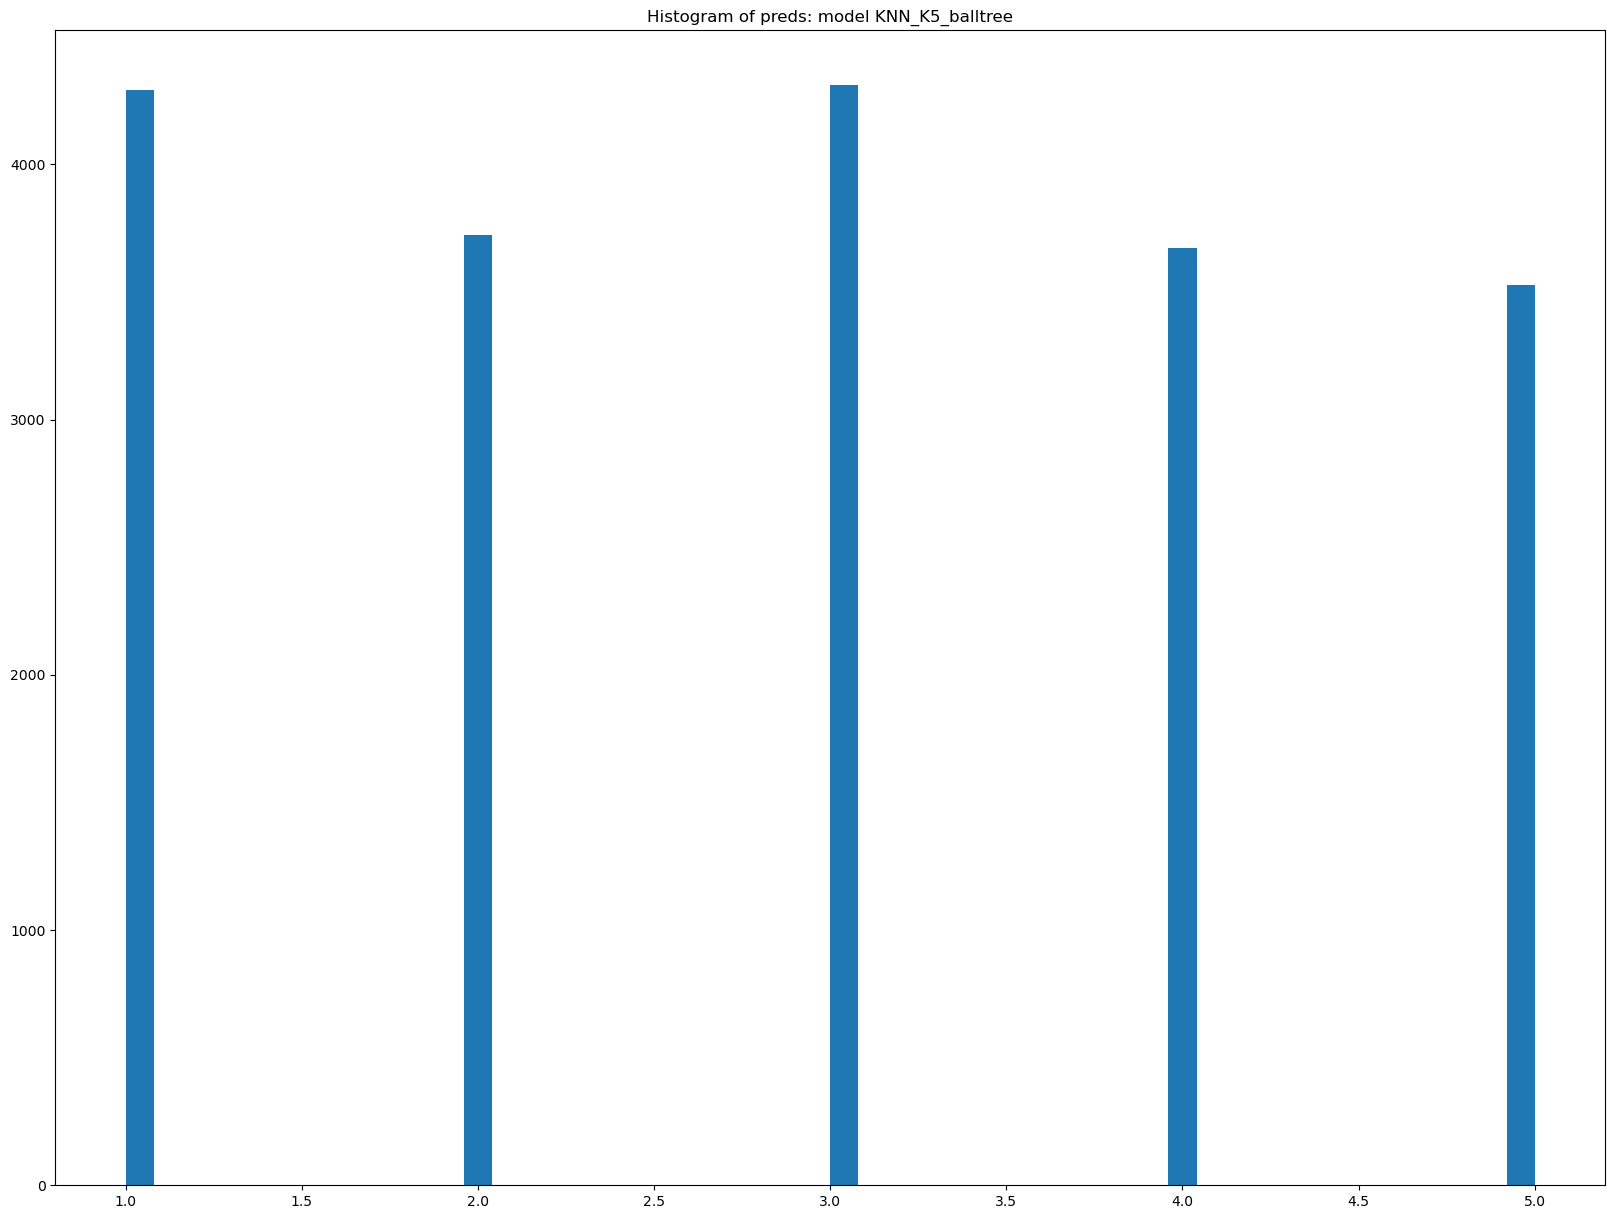

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9402
The Recall is:  0.9389
The F1 score is:  0.9387
The Matthews correlation coefficient is:  0.9241

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    30  3504    52   101    65
2    85     0  3893    64     2
3    33     8   269  3423     1
4    91   197    92    83  3458
model_number: 54
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


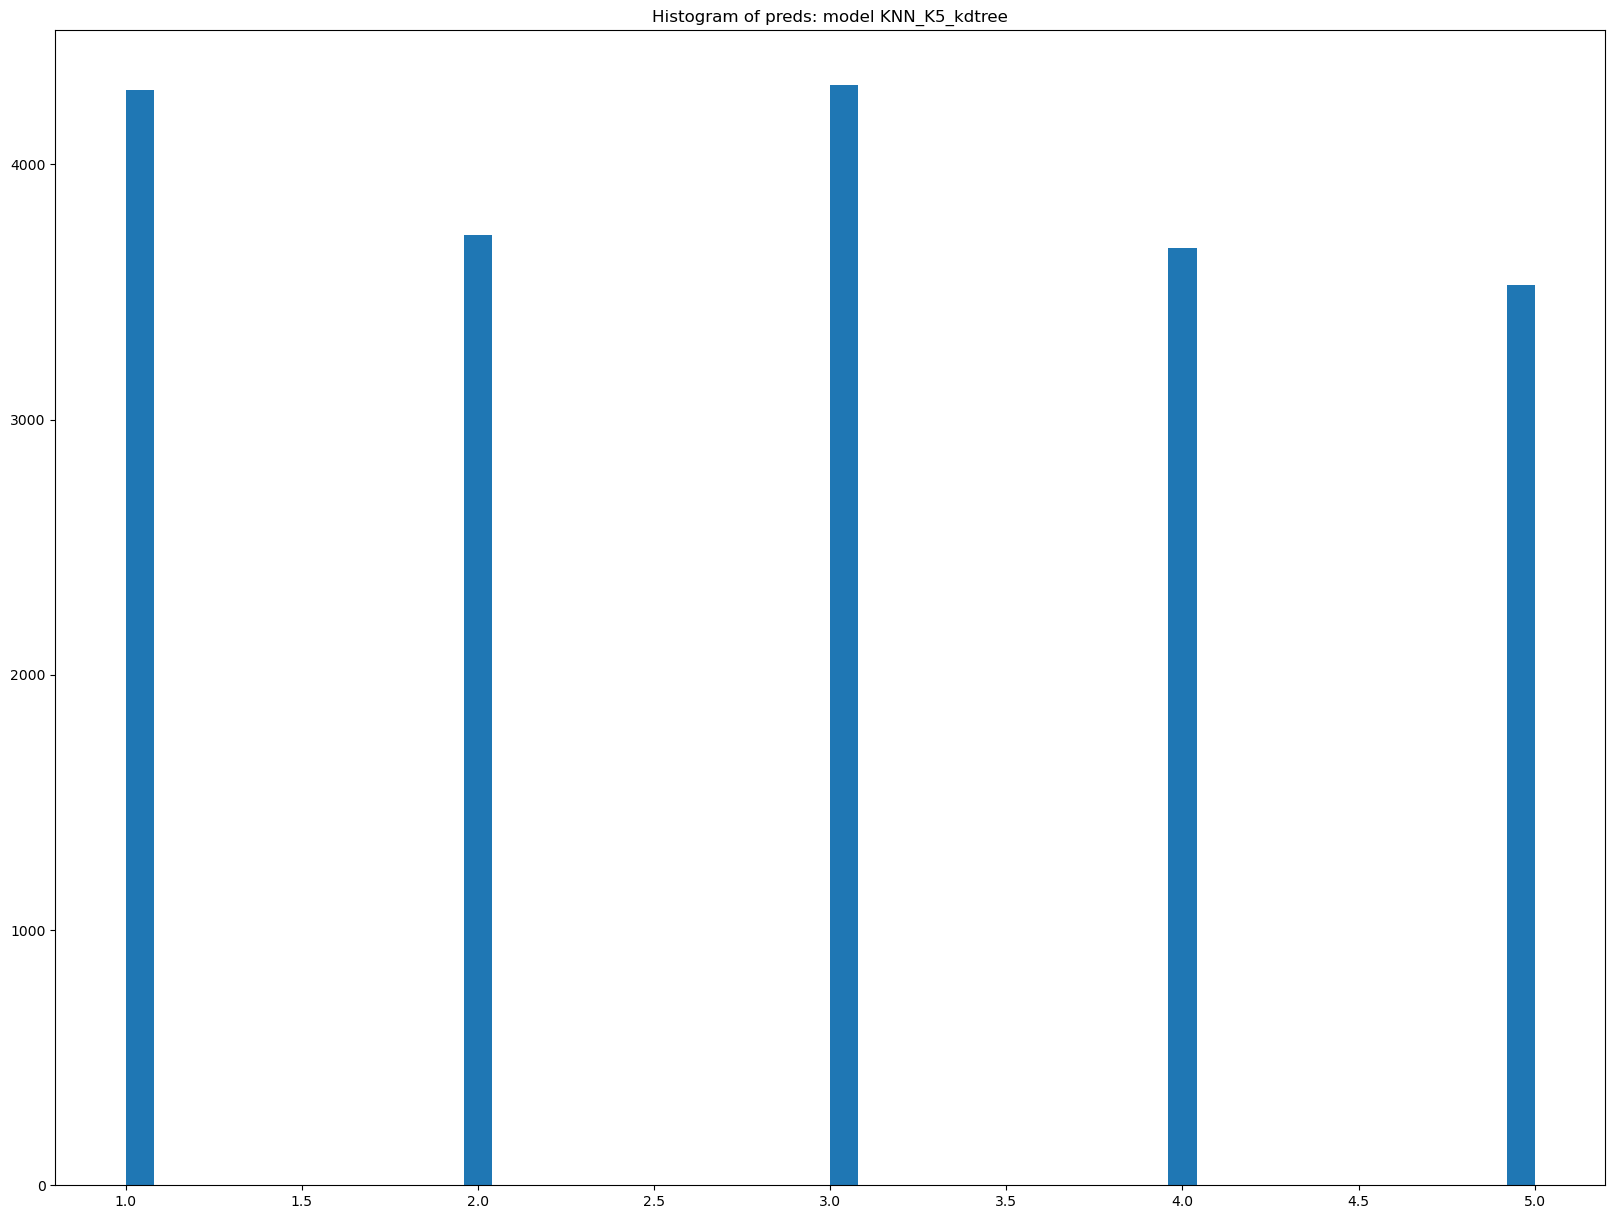

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9402
The Recall is:  0.9389
The F1 score is:  0.9387
The Matthews correlation coefficient is:  0.9241

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    30  3504    52   101    65
2    85     0  3893    64     2
3    33     8   269  3423     1
4    91   197    92    83  3458
model_number: 55
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


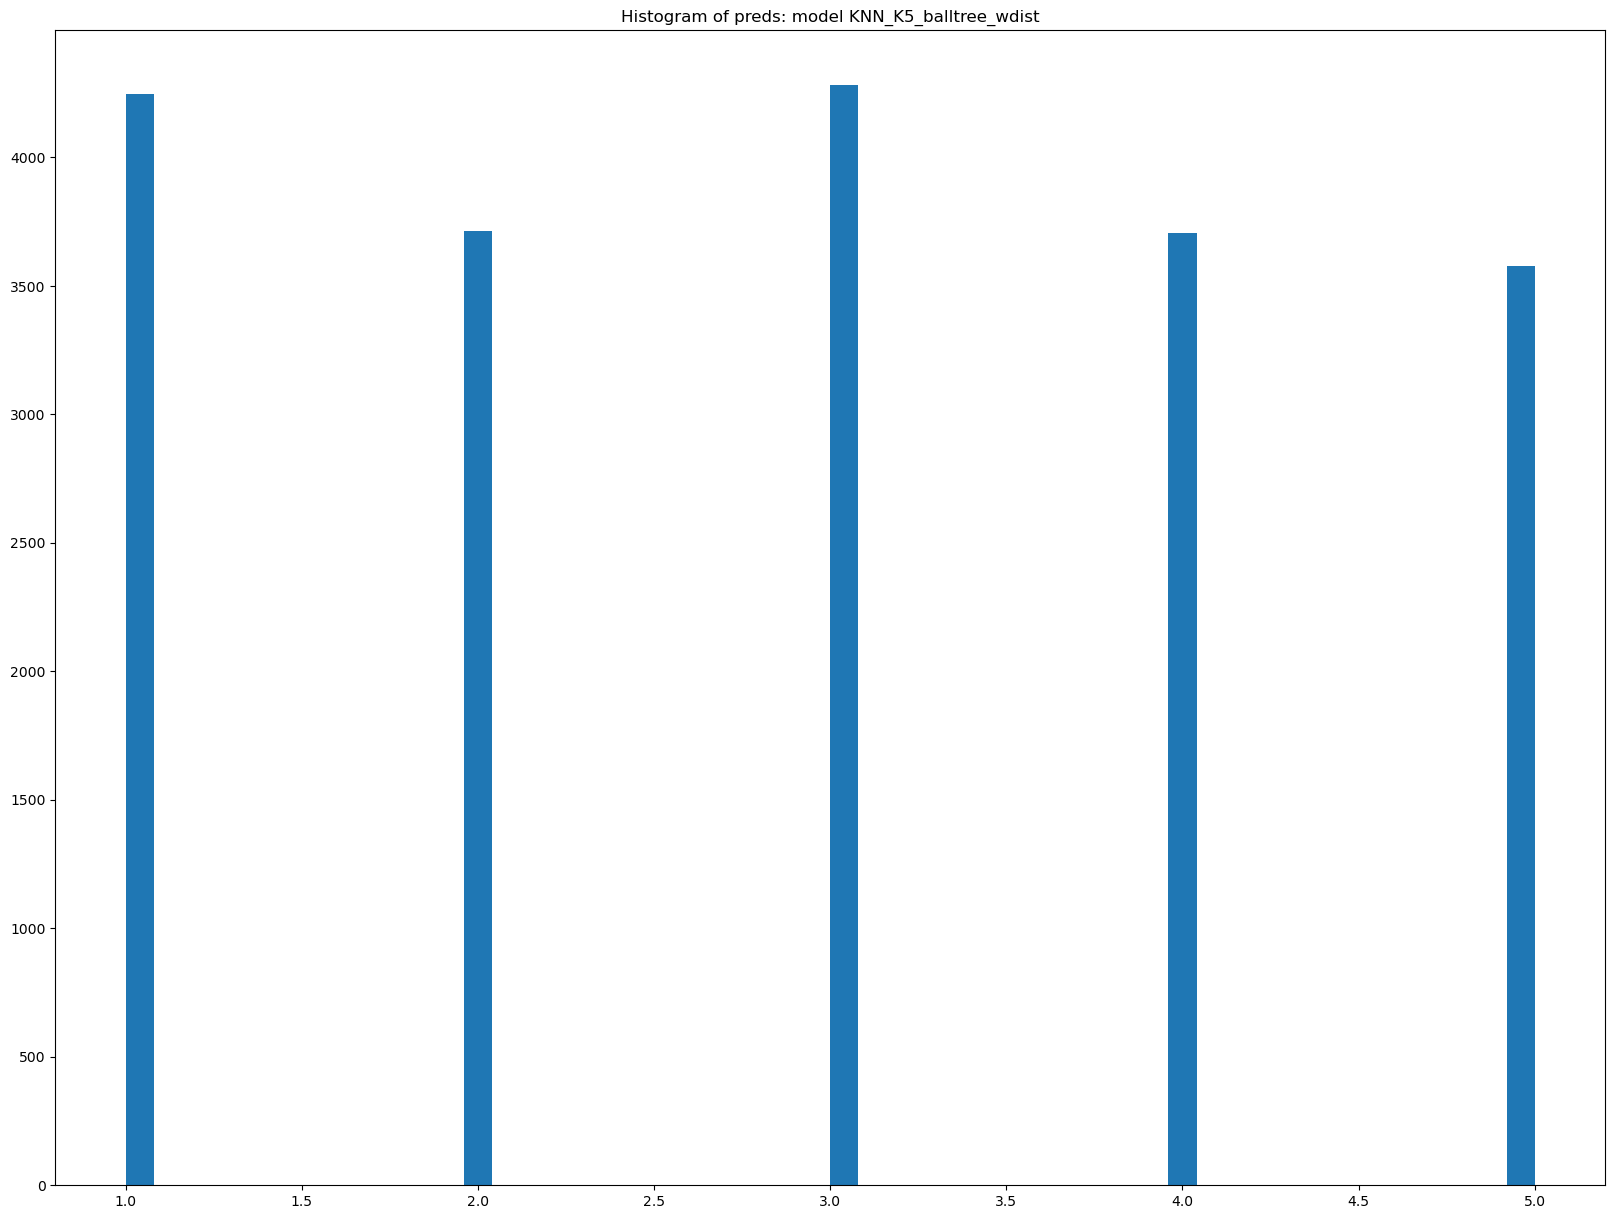

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9449
The Recall is:  0.9440
The F1 score is:  0.9438
The Matthews correlation coefficient is:  0.9302

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    26  3504    50   103    69
2    69     0  3904    68     3
3    25     5   239  3464     1
4    74   189    84    70  3504
model_number: 56
Scaler: StandardScaler StandardScaler() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


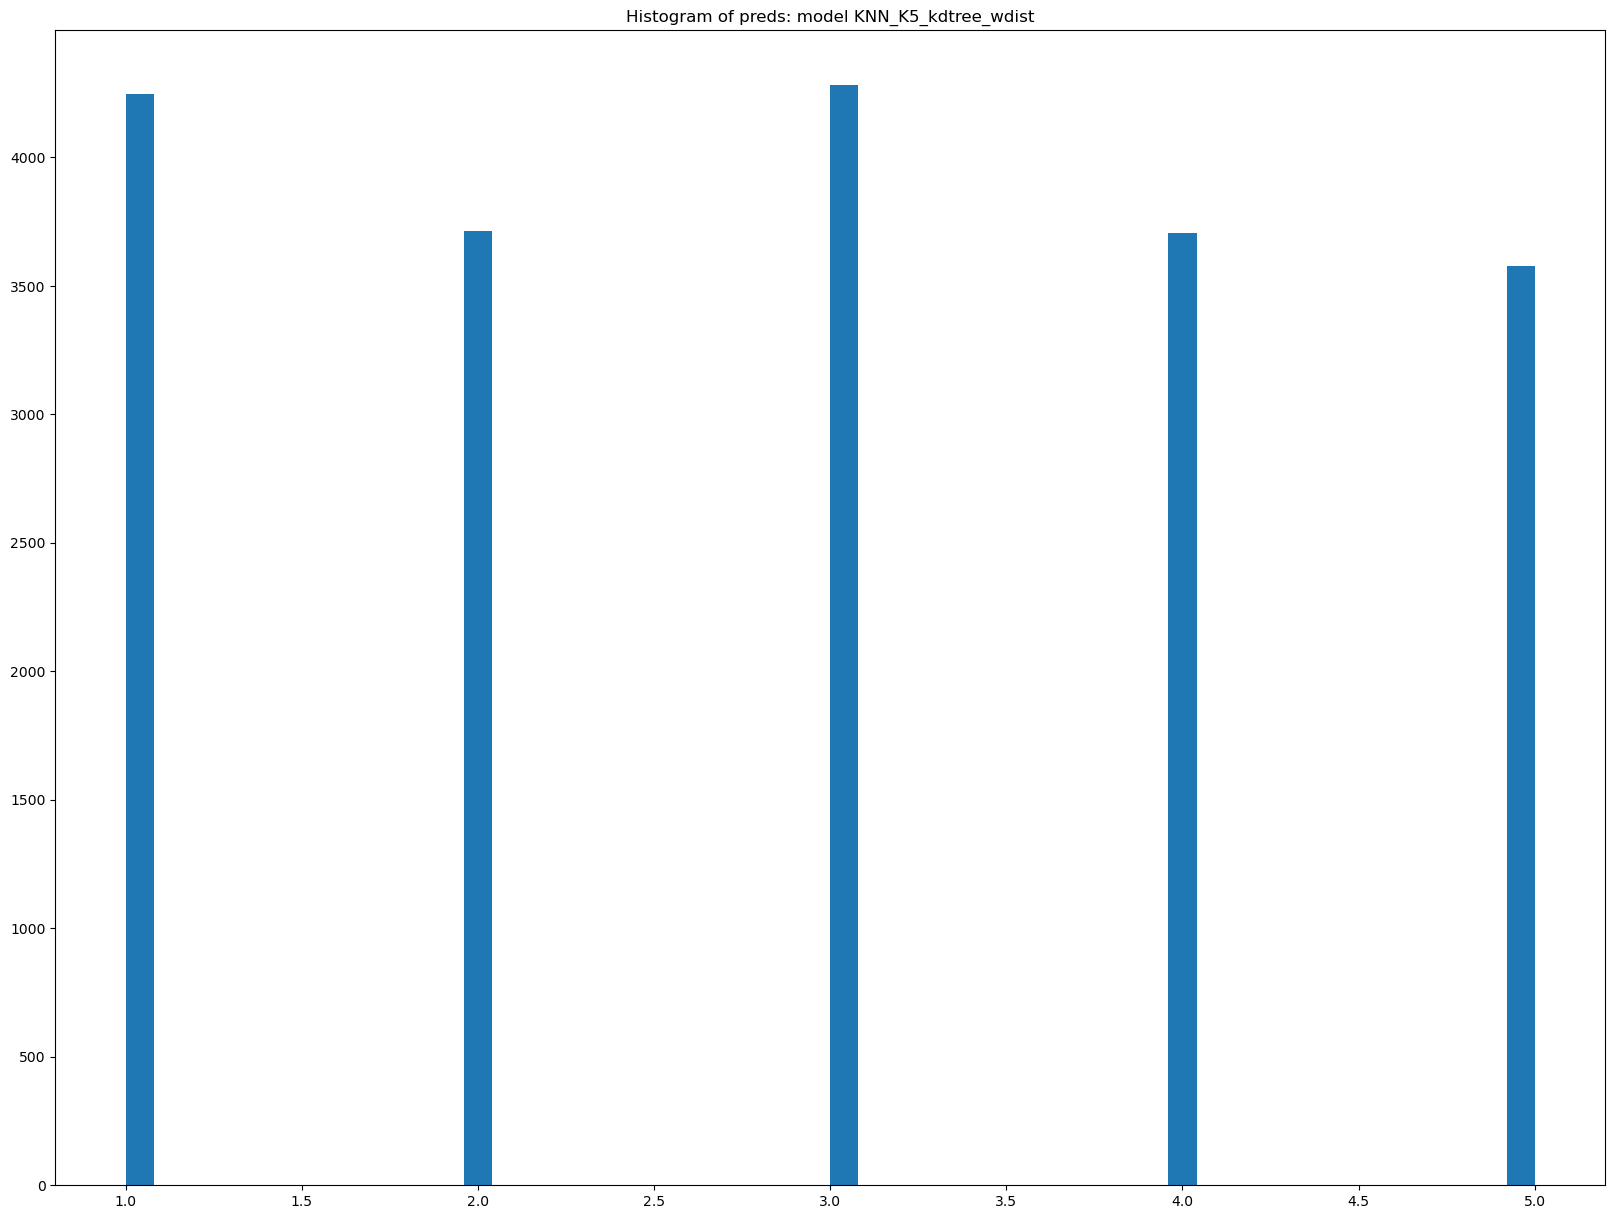

Scaler: StandardScaler() imputer: SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9449
The Recall is:  0.9440
The F1 score is:  0.9438
The Matthews correlation coefficient is:  0.9302

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    26  3504    50   103    69
2    69     0  3904    68     3
3    25     5   239  3464     1
4    74   189    84    70  3504
model_number: 57
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: RandomForest RandomForestClassifier()


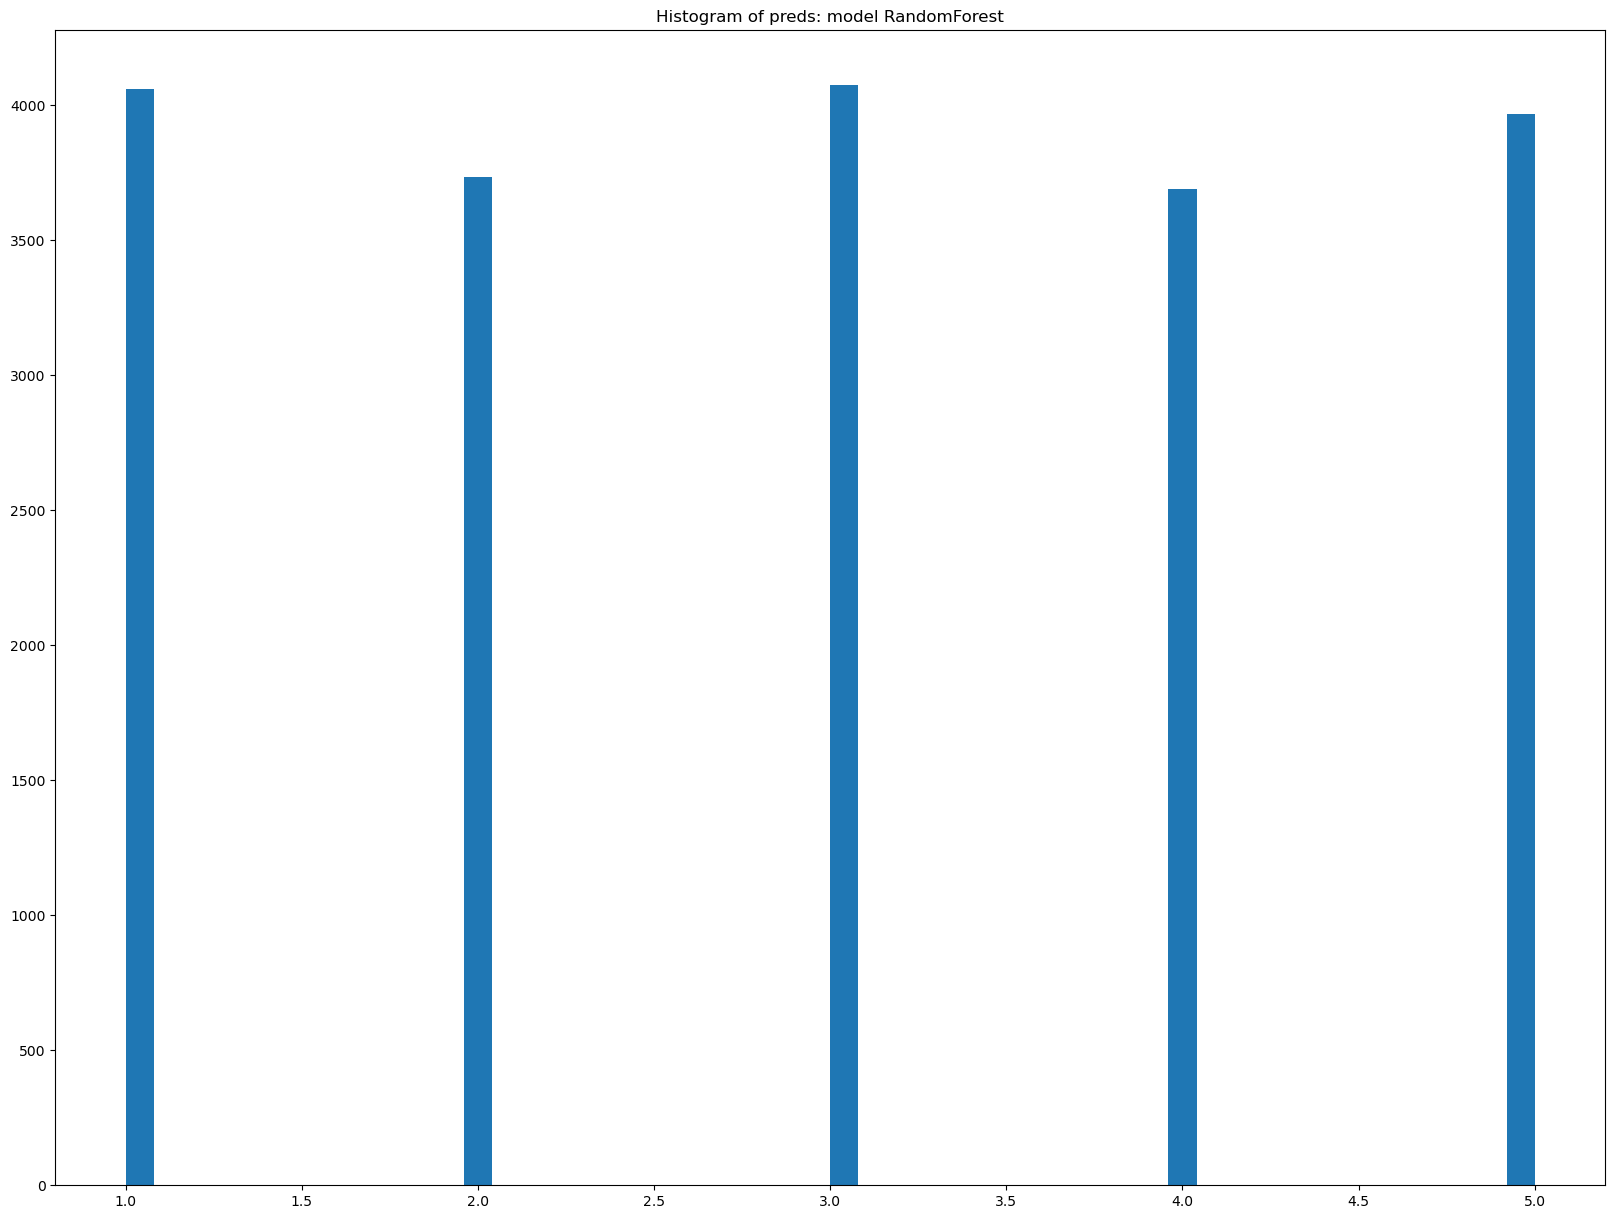

Scaler: StandardScaler() imputer: KNNImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9857
The Recall is:  0.9857
The F1 score is:  0.9857
The Matthews correlation coefficient is:  0.9821

This is the Confusion Matrix
      0     1     2     3     4
0  4046    17     9     0     1
1     3  3660    26    24    39
2    13     7  3995    21     8
3     0    33    43  3642    16
4     0    17     1     1  3902
model_number: 58
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree DecisionTreeClassifier()


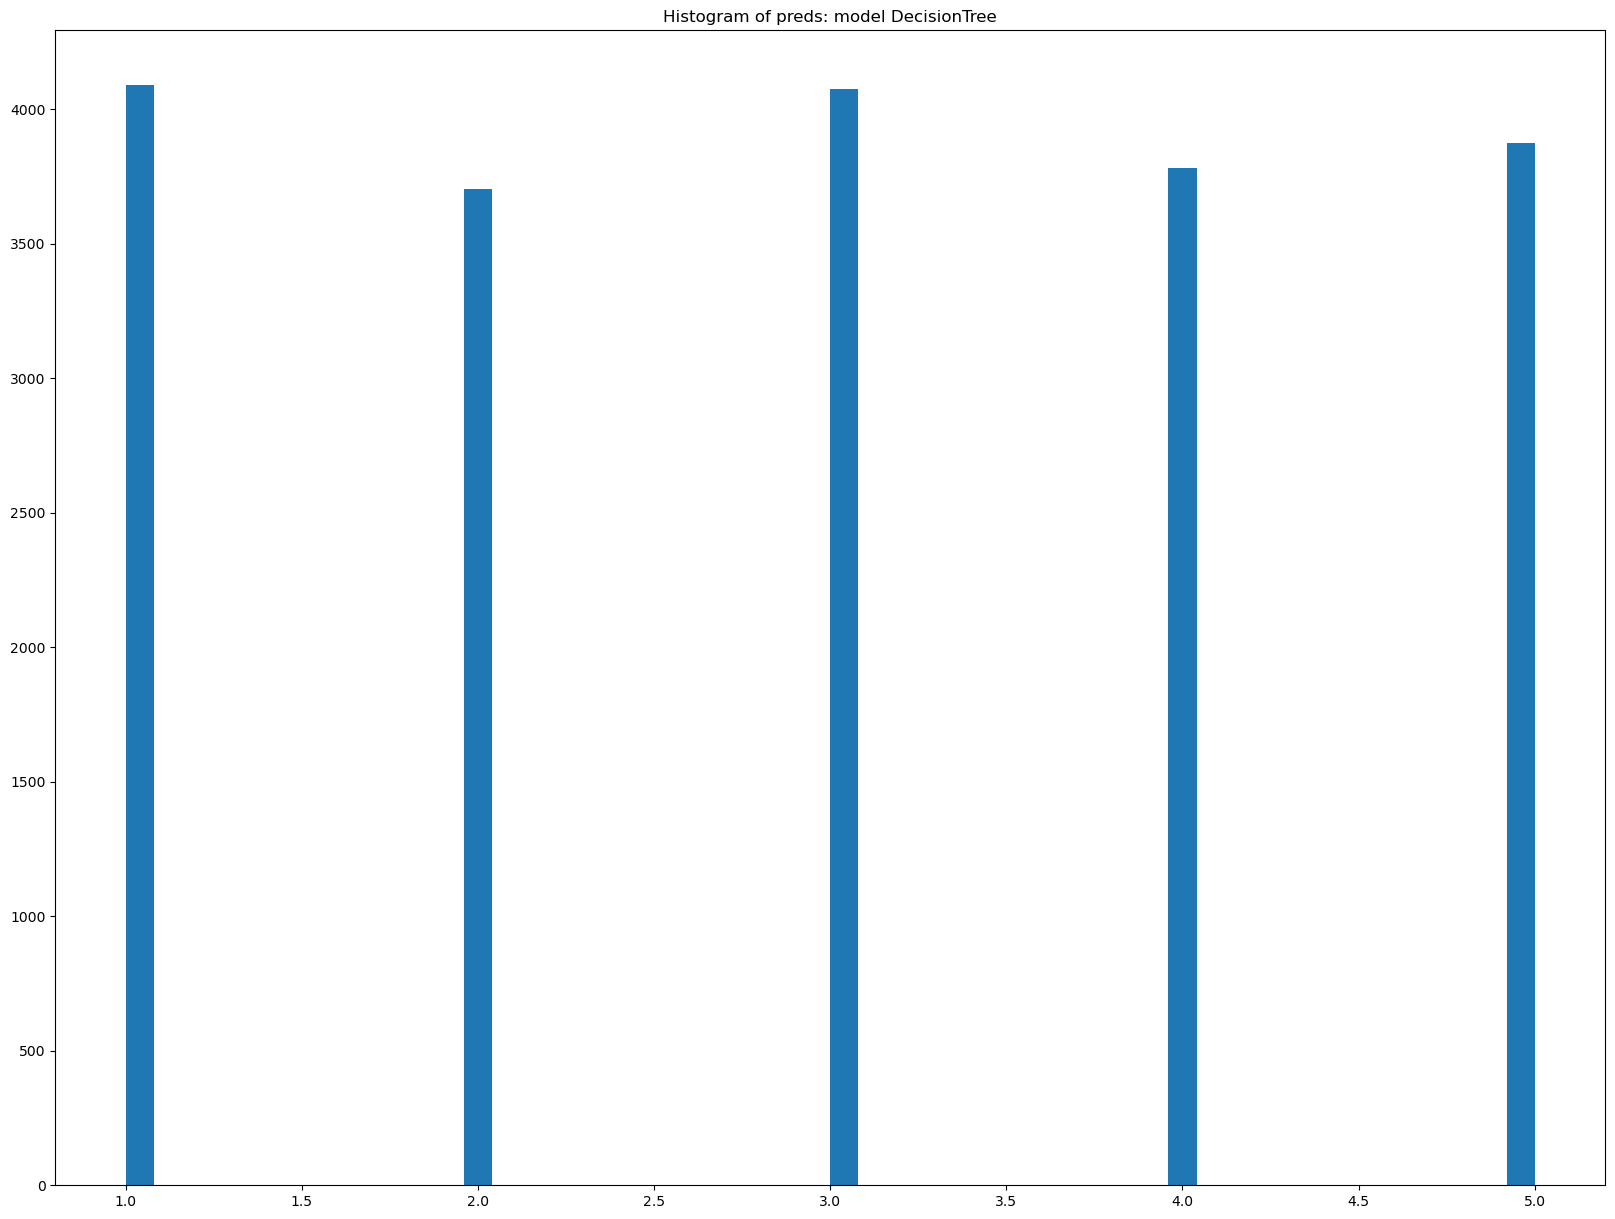

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9079
The Recall is:  0.9079
The F1 score is:  0.9079
The Matthews correlation coefficient is:  0.8849

This is the Confusion Matrix
      0     1     2     3     4
0  3981    22    35    13    22
1    27  3299    62   168   196
2    45    55  3695   154    95
3    19   135   167  3301   112
4    17   194   116   144  3450
model_number: 59
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


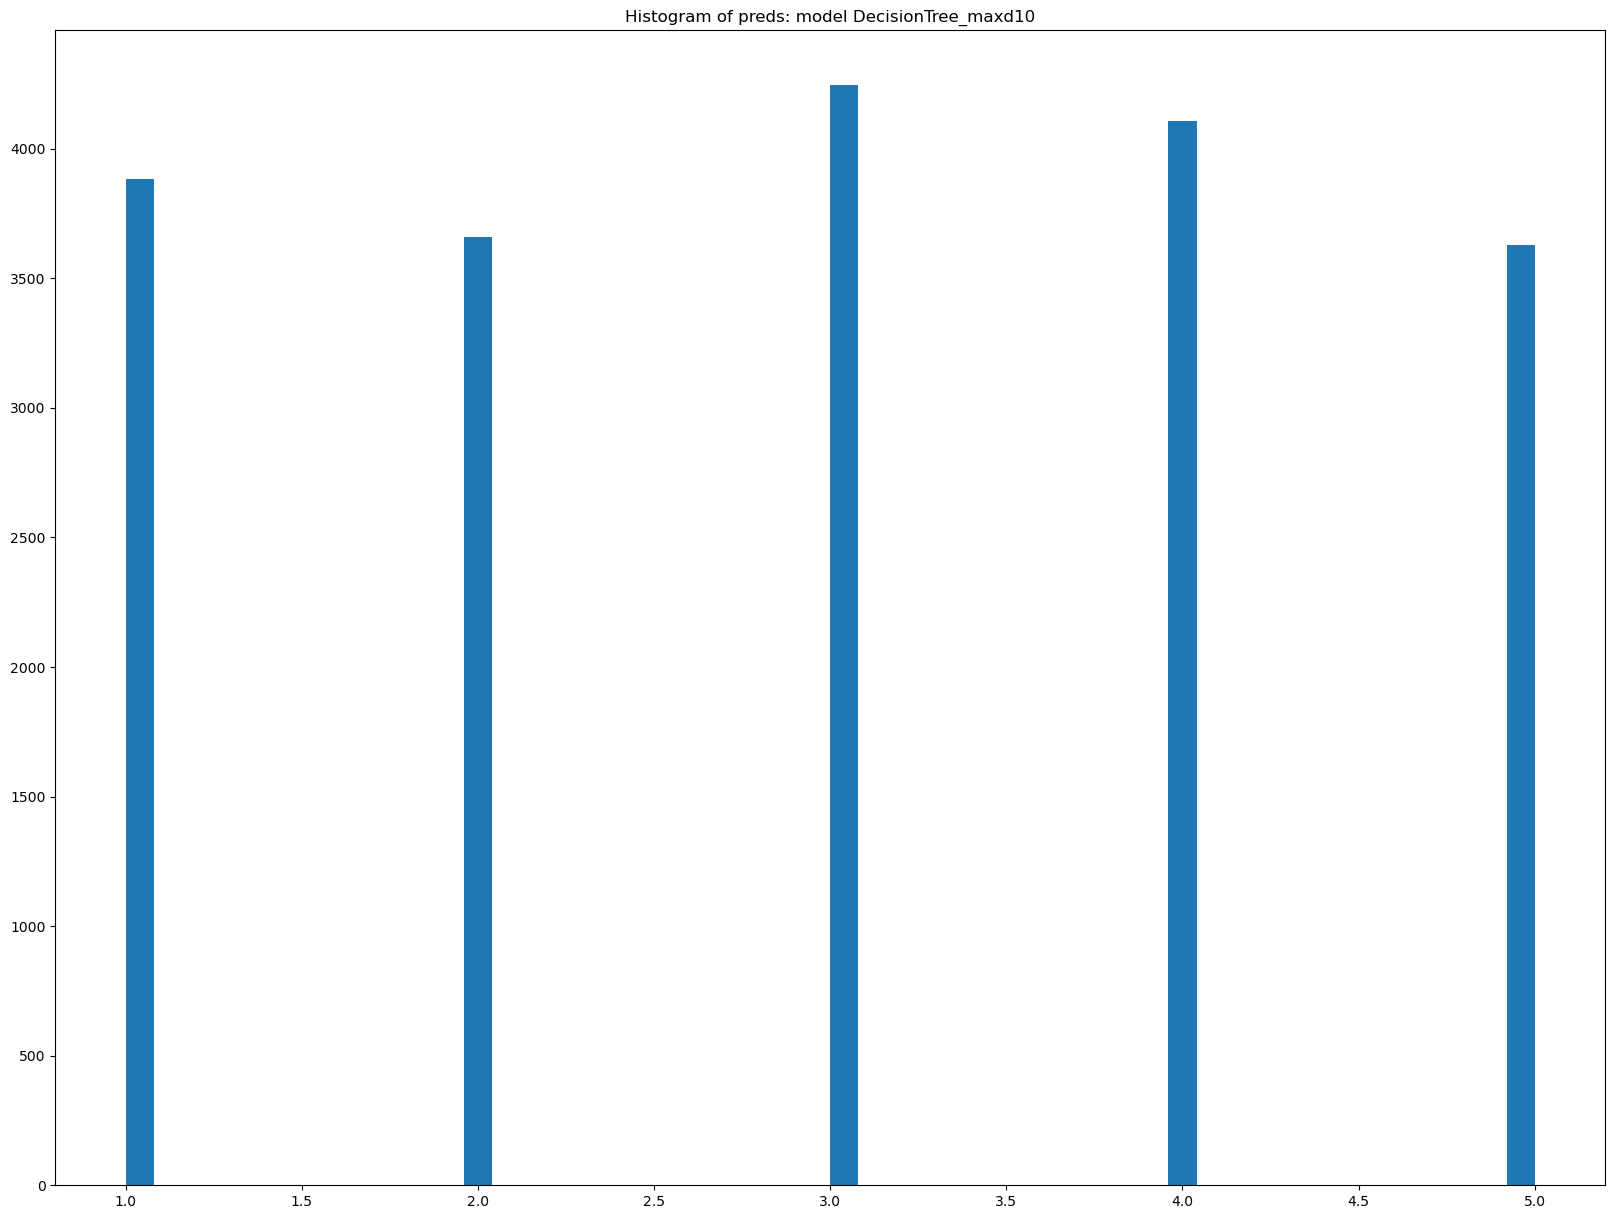

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8185
The Recall is:  0.8149
The F1 score is:  0.8159
The Matthews correlation coefficient is:  0.7690

This is the Confusion Matrix
      0     1     2     3     4
0  3711    34   149   104    75
1    28  3048   158   293   225
2    97    84  3282   356   225
3    29   145   431  2947   182
4    17   350   225   407  2922
model_number: 60
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


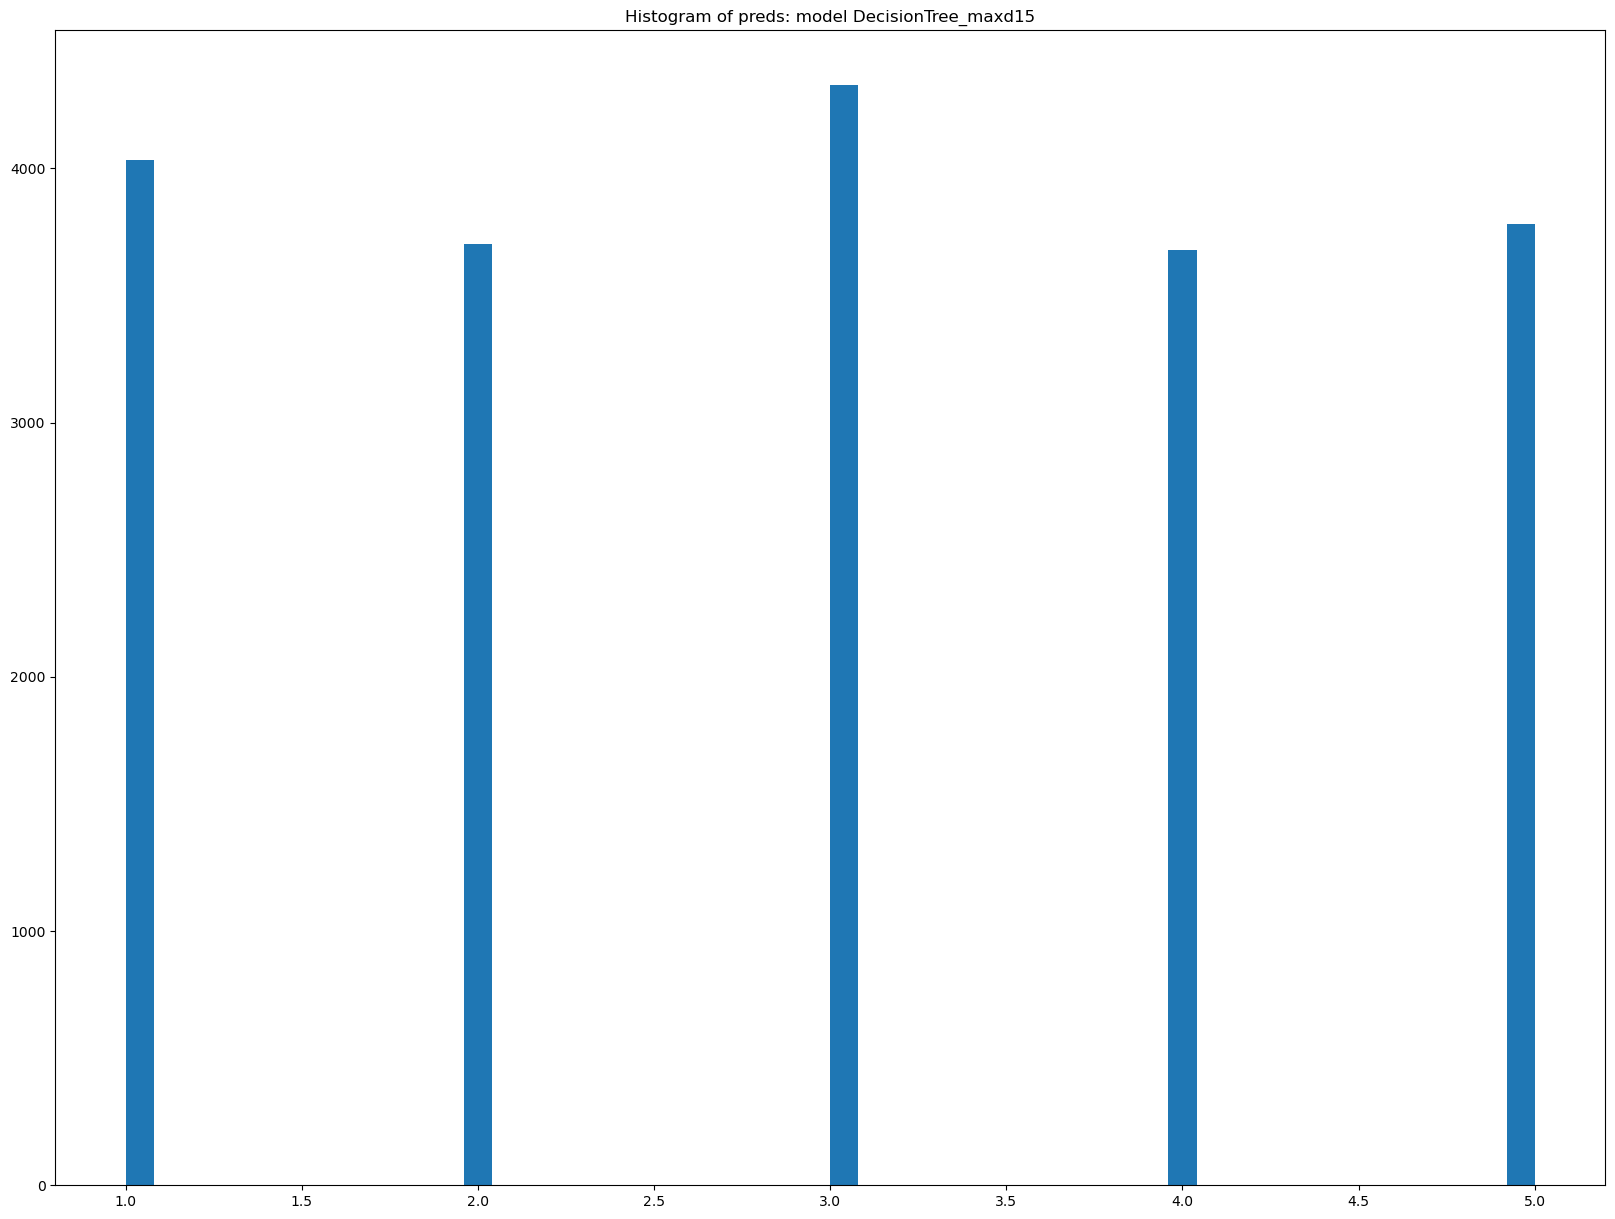

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8913
The Recall is:  0.8907
The F1 score is:  0.8907
The Matthews correlation coefficient is:  0.8635

This is the Confusion Matrix
      0     1     2     3     4
0  3915    25    90    15    28
1    15  3267   103   162   205
2    53    57  3679   163    92
3    26   133   280  3184   111
4    26   220   175   155  3345
model_number: 61
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


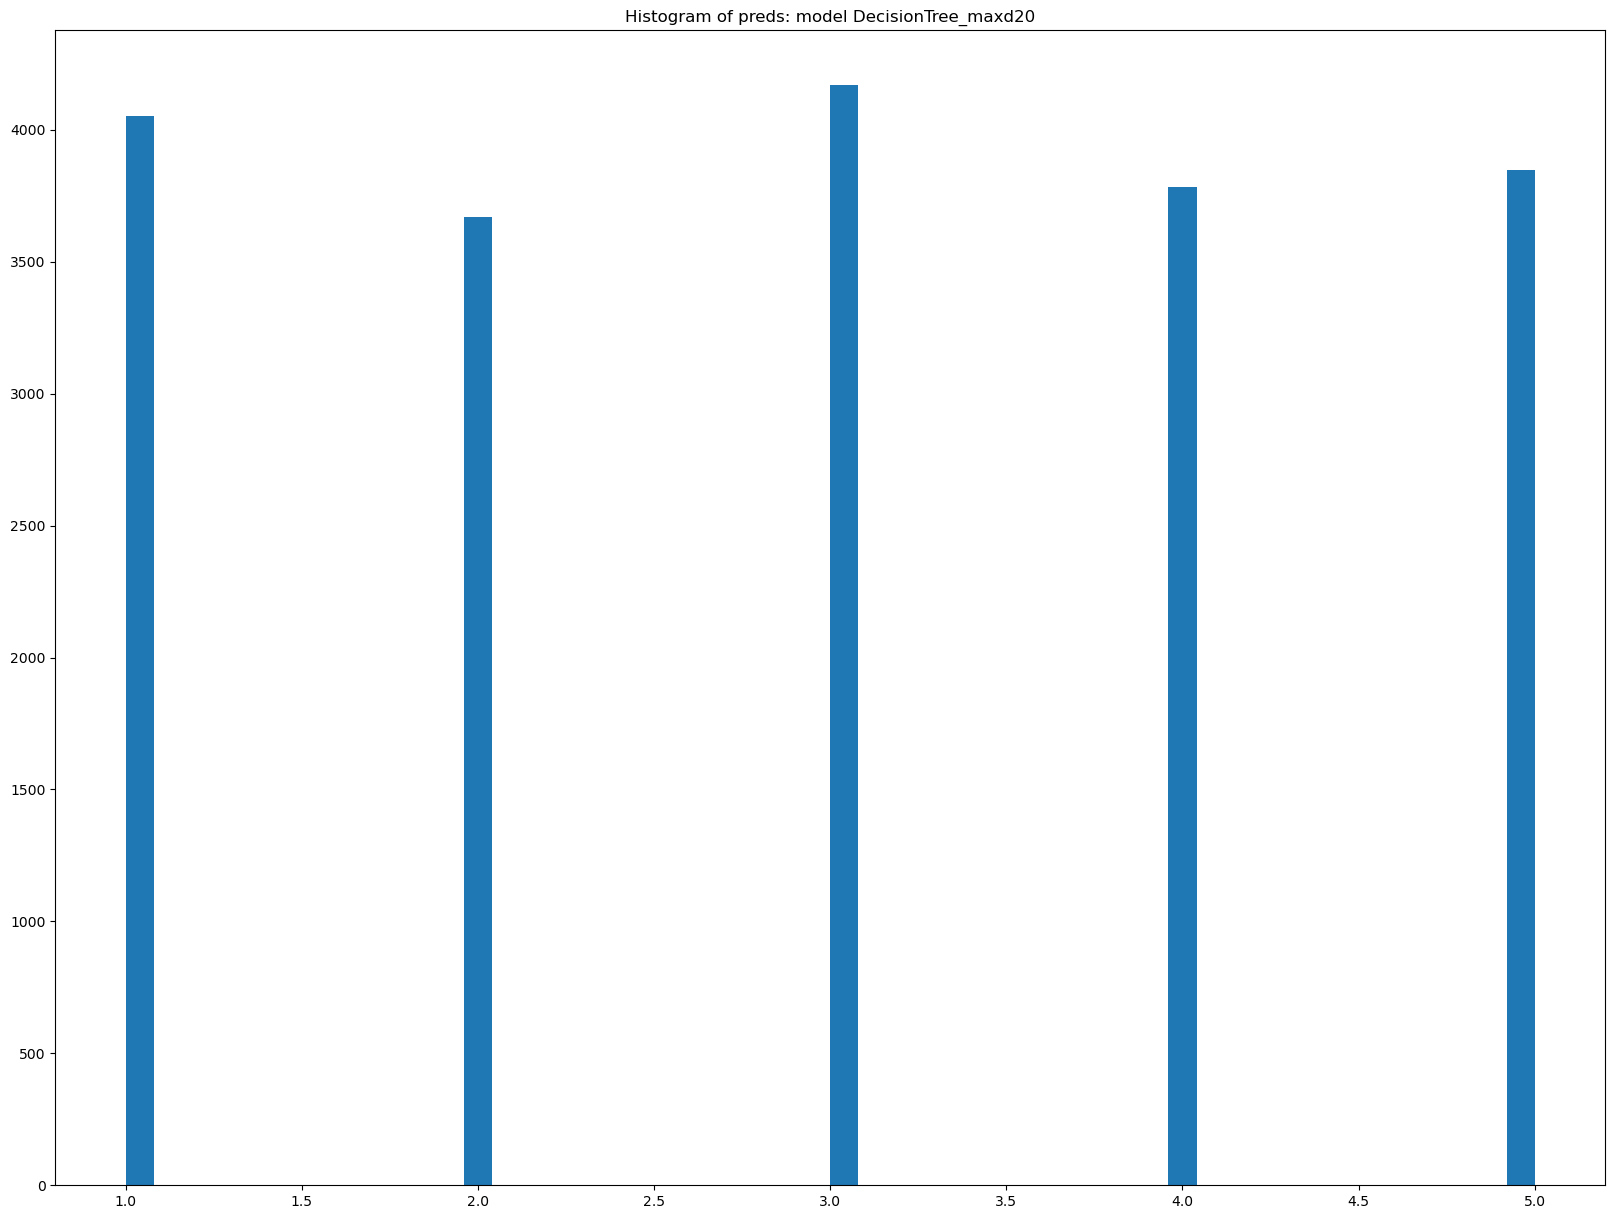

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9064
The Recall is:  0.9062
The F1 score is:  0.9062
The Matthews correlation coefficient is:  0.8828

This is the Confusion Matrix
      0     1     2     3     4
0  3956    23    52    16    26
1    24  3288    89   151   200
2    39    50  3715   171    69
3    15   109   189  3301   120
4    20   200   124   144  3433
model_number: 62
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


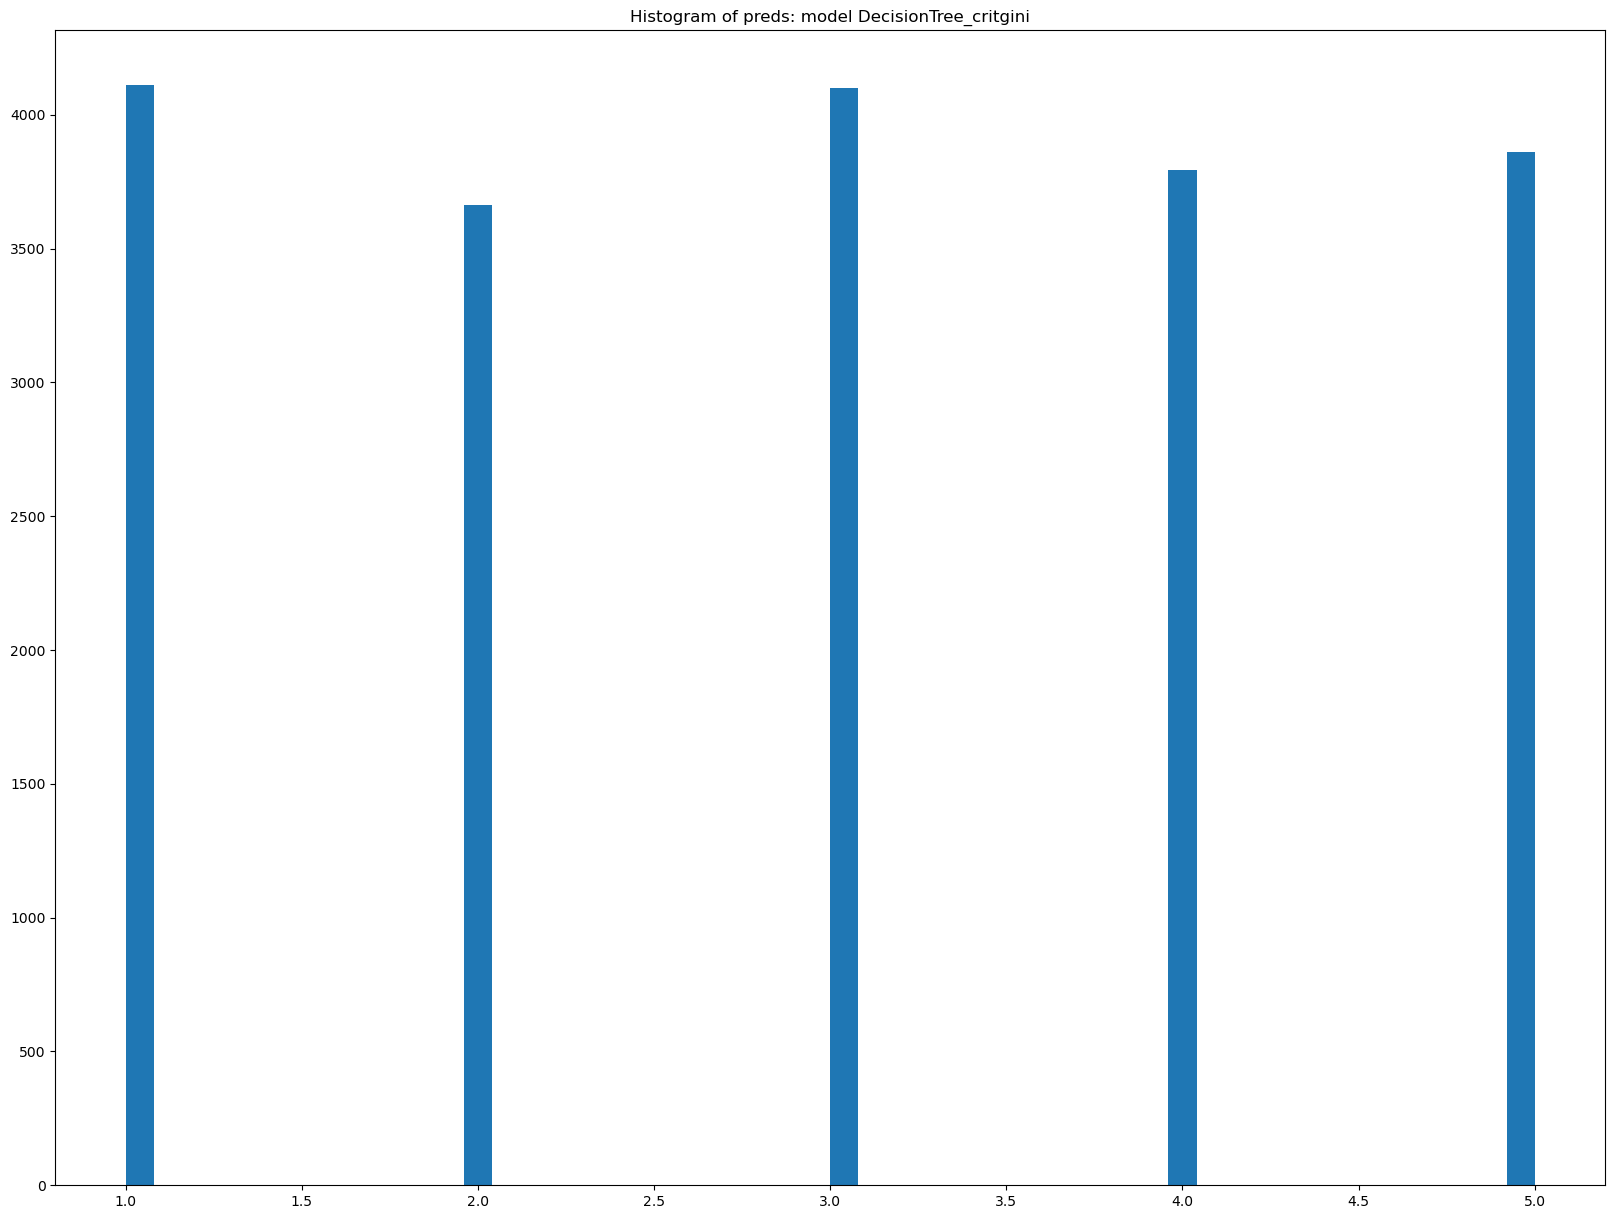

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9083
The Recall is:  0.9084
The F1 score is:  0.9083
The Matthews correlation coefficient is:  0.8854

This is the Confusion Matrix
      0     1     2     3     4
0  3987    15    34    16    21
1    28  3290    81   158   195
2    48    55  3704   149    88
3    22   110   171  3315   116
4    25   193   109   155  3439
model_number: 63
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


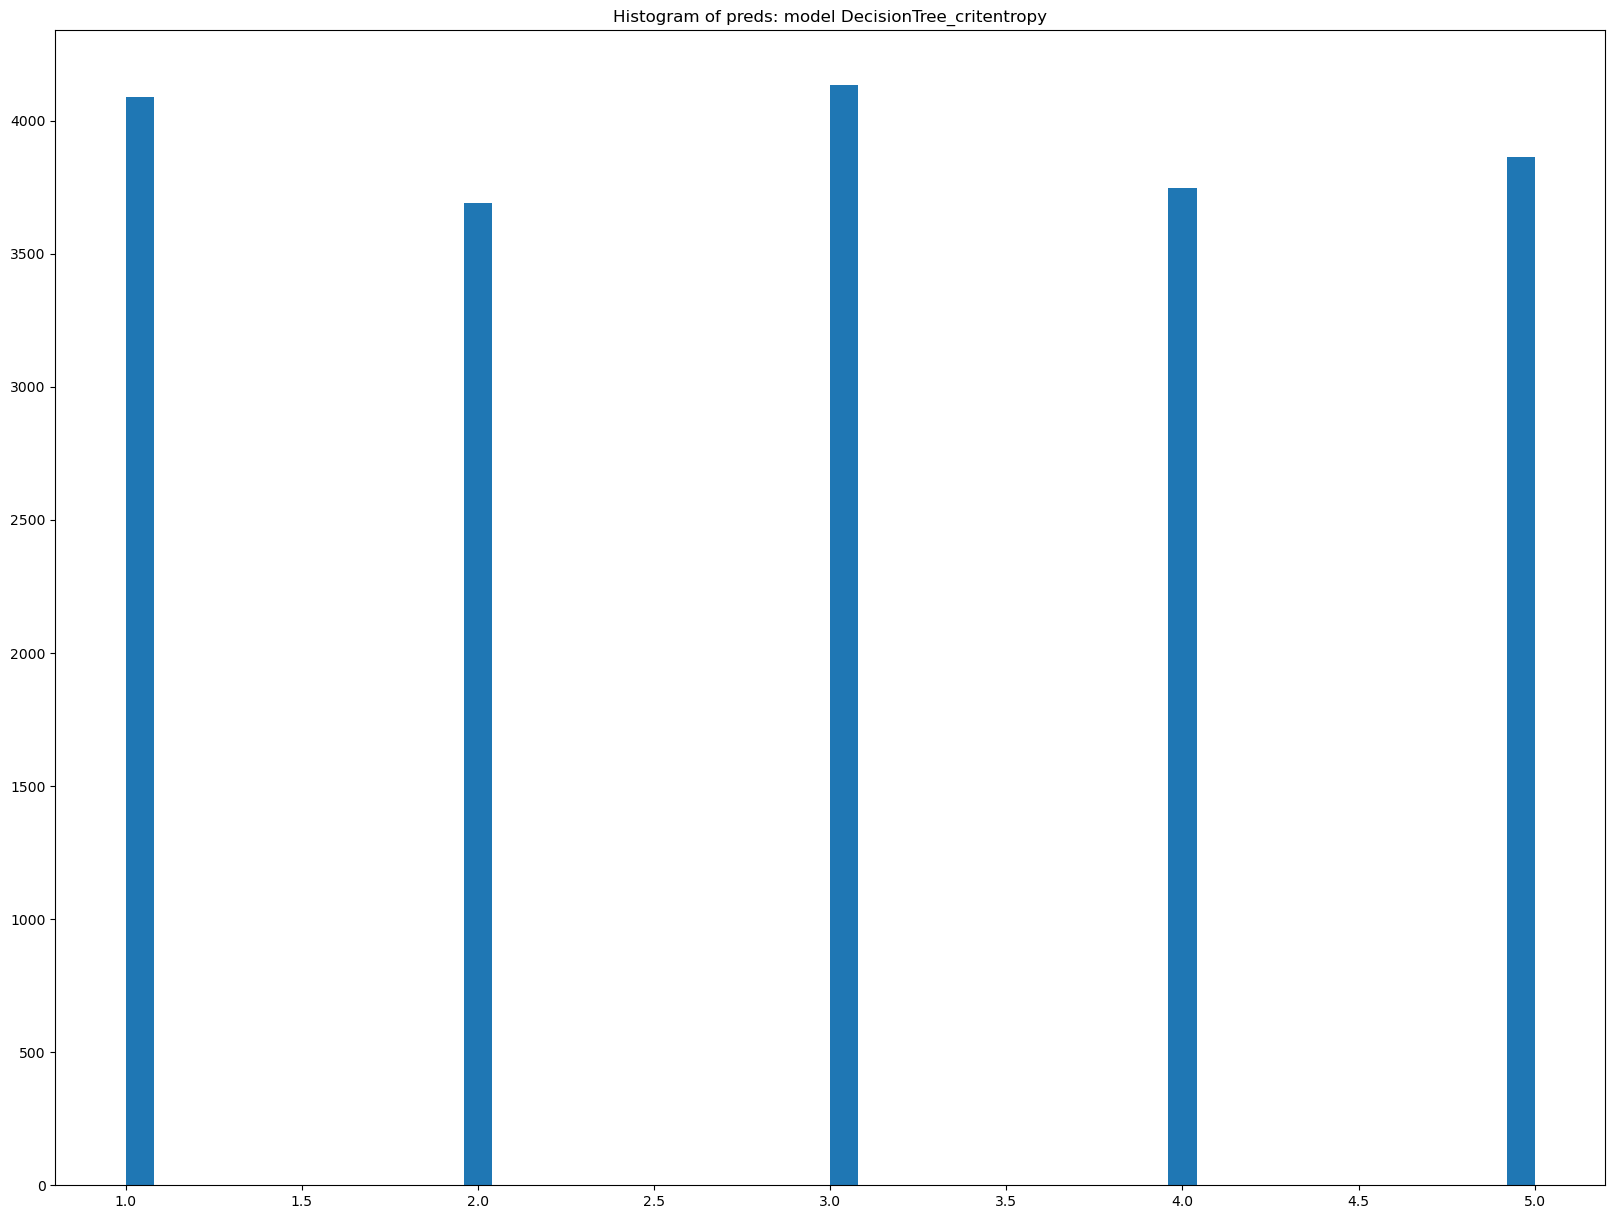

Scaler: StandardScaler() imputer: KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9189
The Recall is:  0.9189
The F1 score is:  0.9189
The Matthews correlation coefficient is:  0.8986

This is the Confusion Matrix
      0     1     2     3     4
0  3997    15    22    18    21
1    22  3358    78   130   164
2    35    53  3746   140    70
3    16   114   162  3337   105
4    20   150   125   123  3503
model_number: 64
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: GaussianNB GaussianNB()


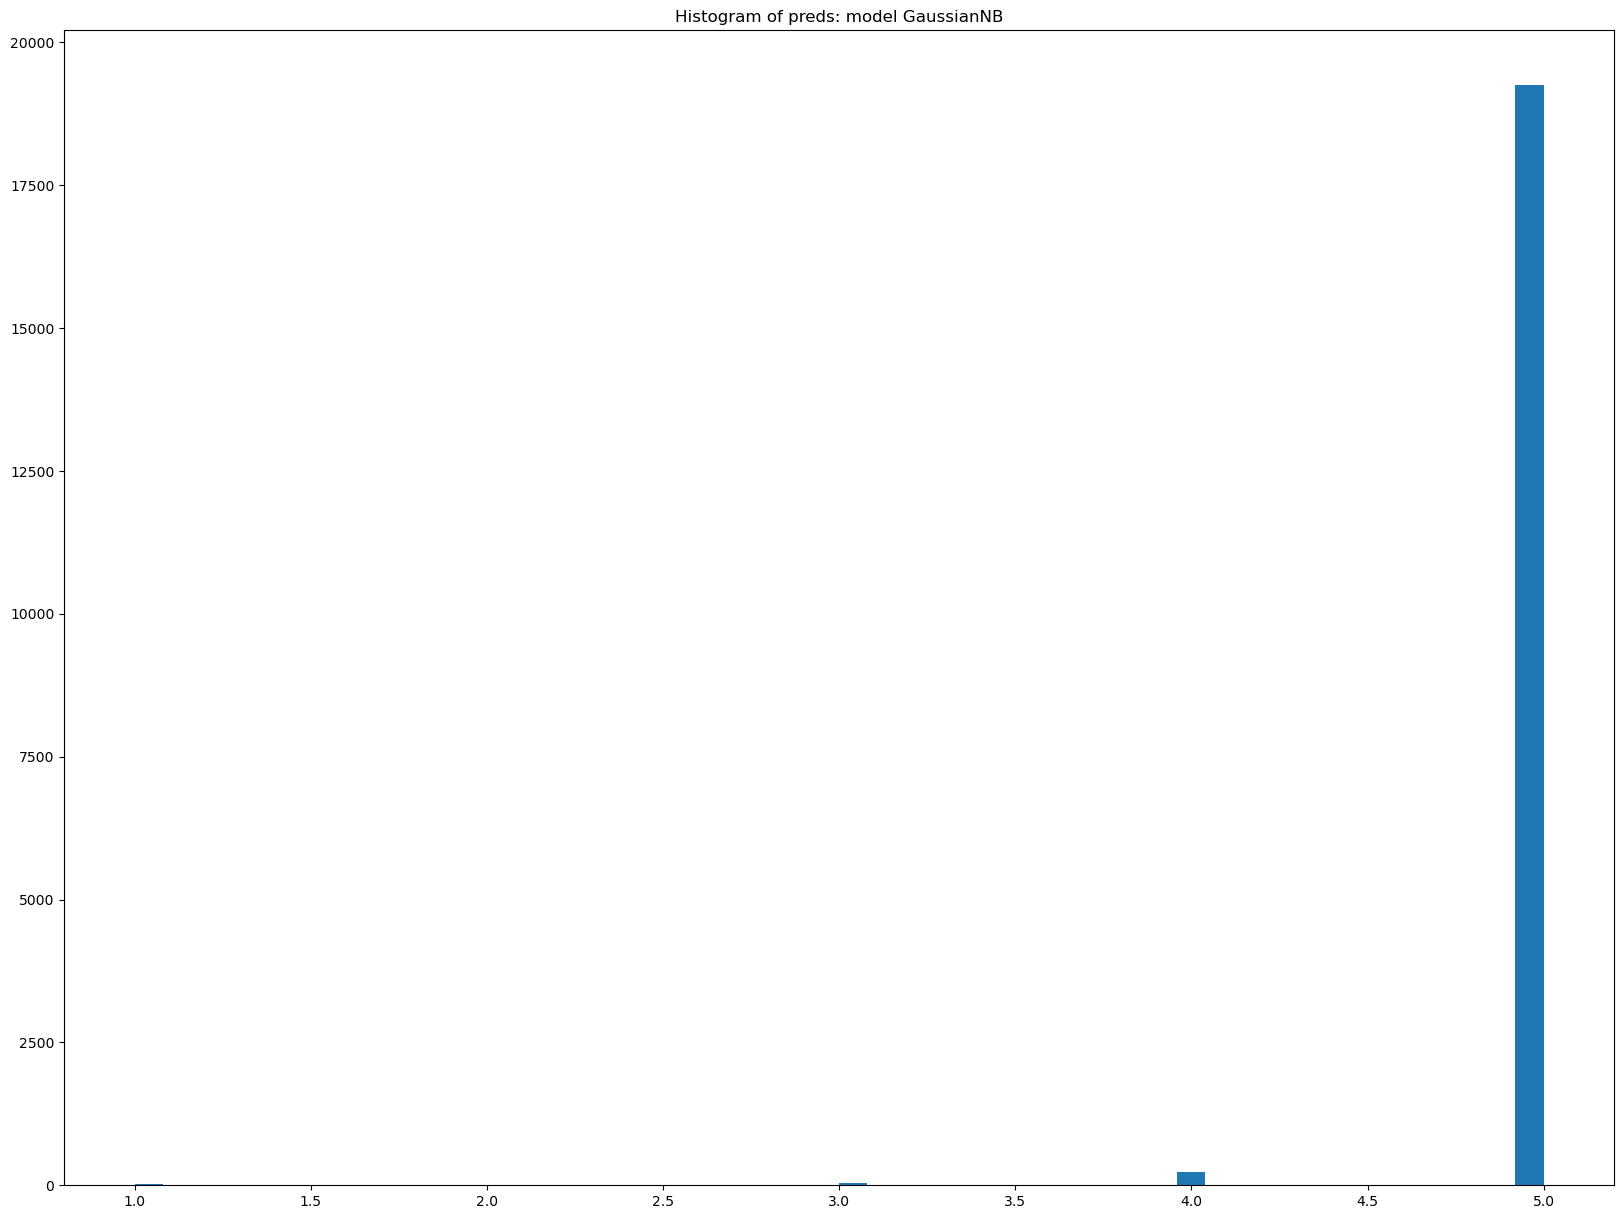

Scaler: StandardScaler() imputer: KNNImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.7168
The Recall is:  0.2075
The F1 score is:  0.0808
The Matthews correlation coefficient is:  0.0453

This is the Confusion Matrix
    0  1   2   3     4
0  16  0   0  29  4028
1   0  1   0  53  3698
2   0  0  33  63  3948
3   0  0   0  80  3654
4   0  0   0   0  3921
model_number: 65
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


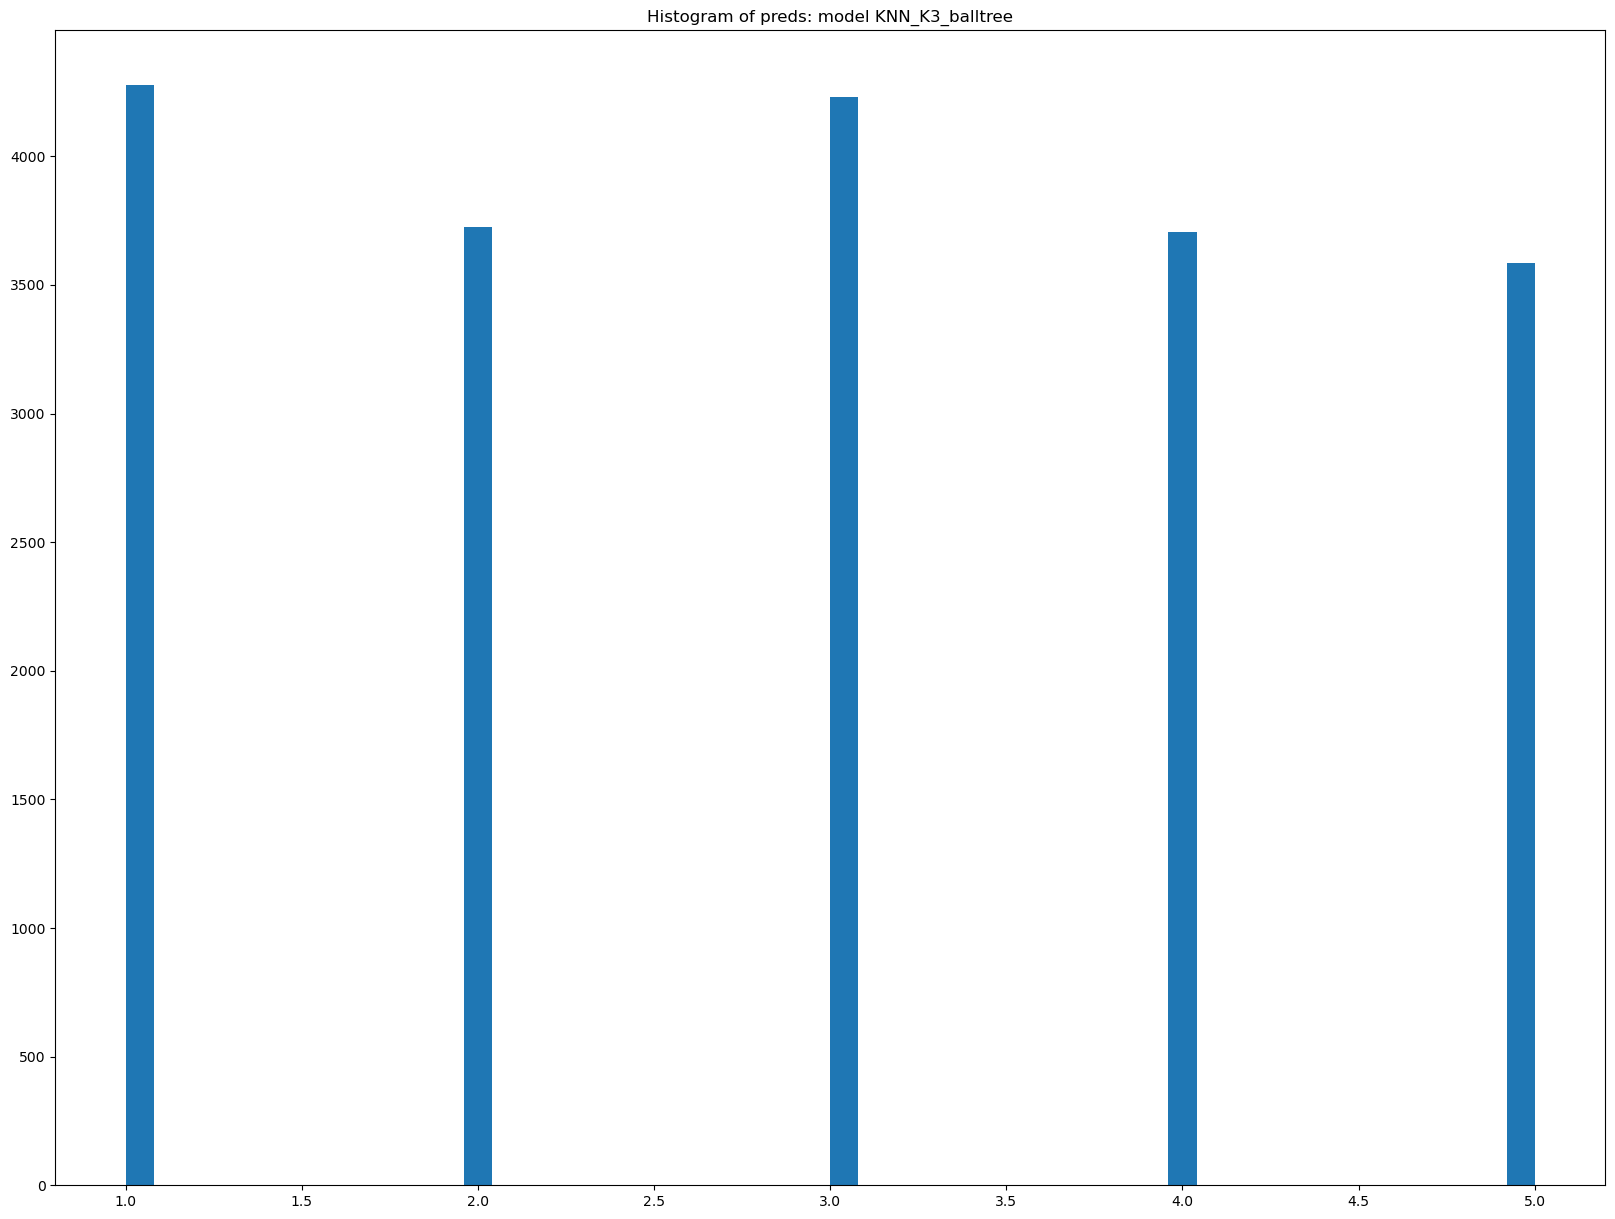

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9396
The Recall is:  0.9388
The F1 score is:  0.9386
The Matthews correlation coefficient is:  0.9237

This is the Confusion Matrix
      0     1     2     3     4
0  4044    12    14     1     2
1    29  3476    70   108    69
2    75     8  3857   100     4
3    27    51   200  3449     7
4   101   180    90    47  3503
model_number: 66
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


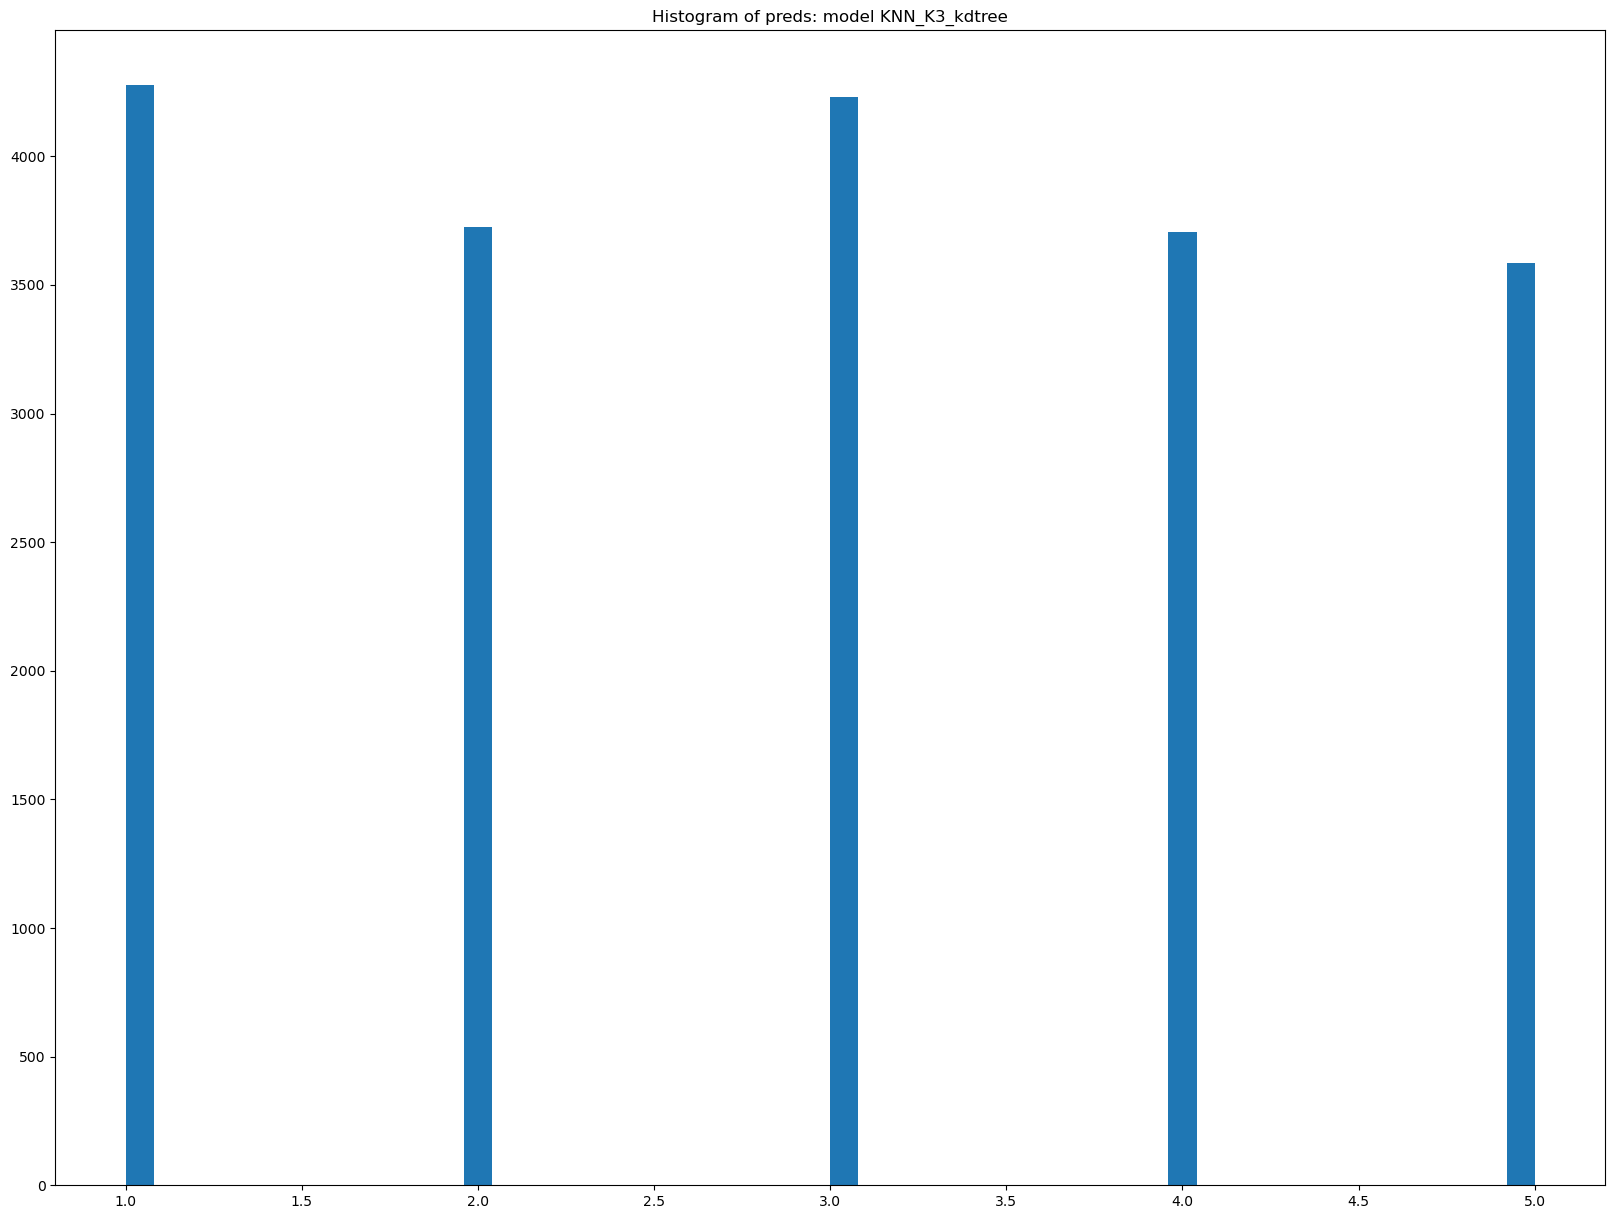

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9396
The Recall is:  0.9388
The F1 score is:  0.9386
The Matthews correlation coefficient is:  0.9237

This is the Confusion Matrix
      0     1     2     3     4
0  4044    12    14     1     2
1    29  3476    70   108    69
2    75     8  3857   100     4
3    27    51   200  3449     7
4   101   180    90    47  3503
model_number: 67
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


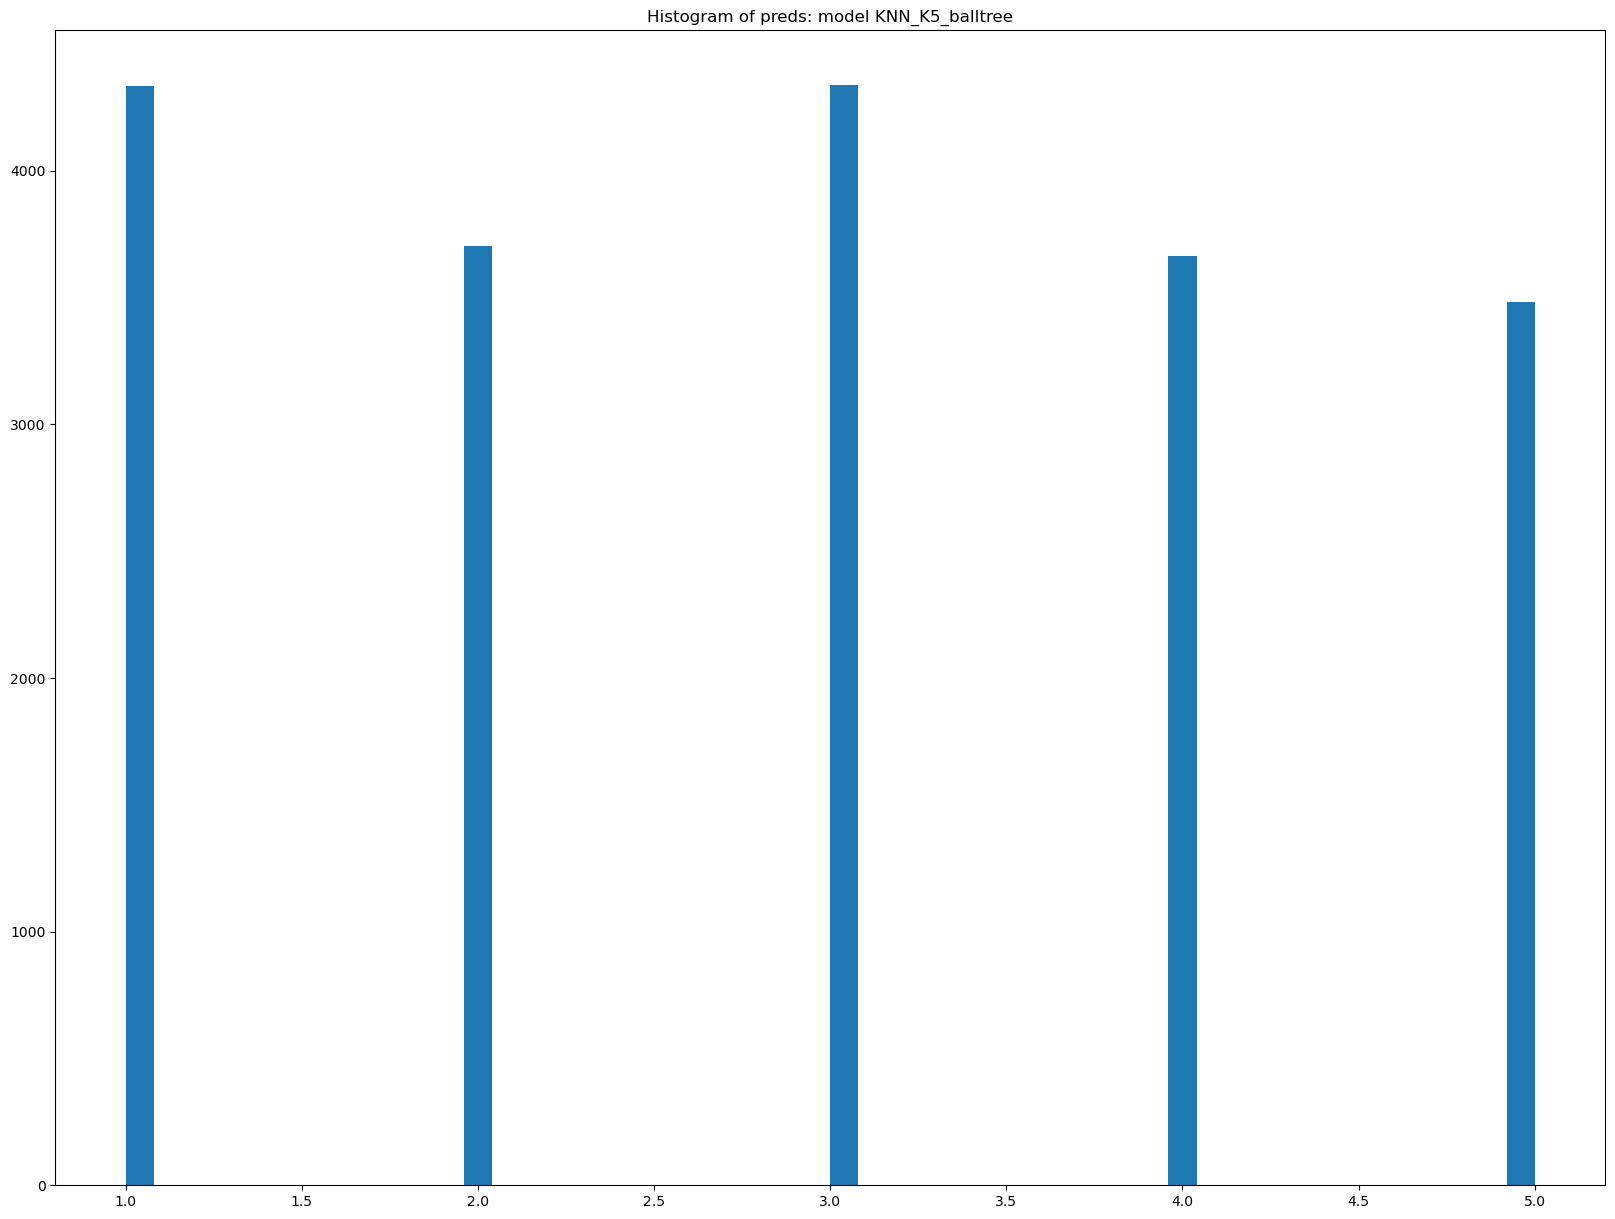

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9293
The Recall is:  0.9277
The F1 score is:  0.9274
The Matthews correlation coefficient is:  0.9101

This is the Confusion Matrix
      0     1     2     3     4
0  4044    14    12     1     2
1    32  3441    98   108    73
2    86     9  3850    94     5
3    33    48   263  3382     8
4   140   192   114    79  3396
model_number: 68
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


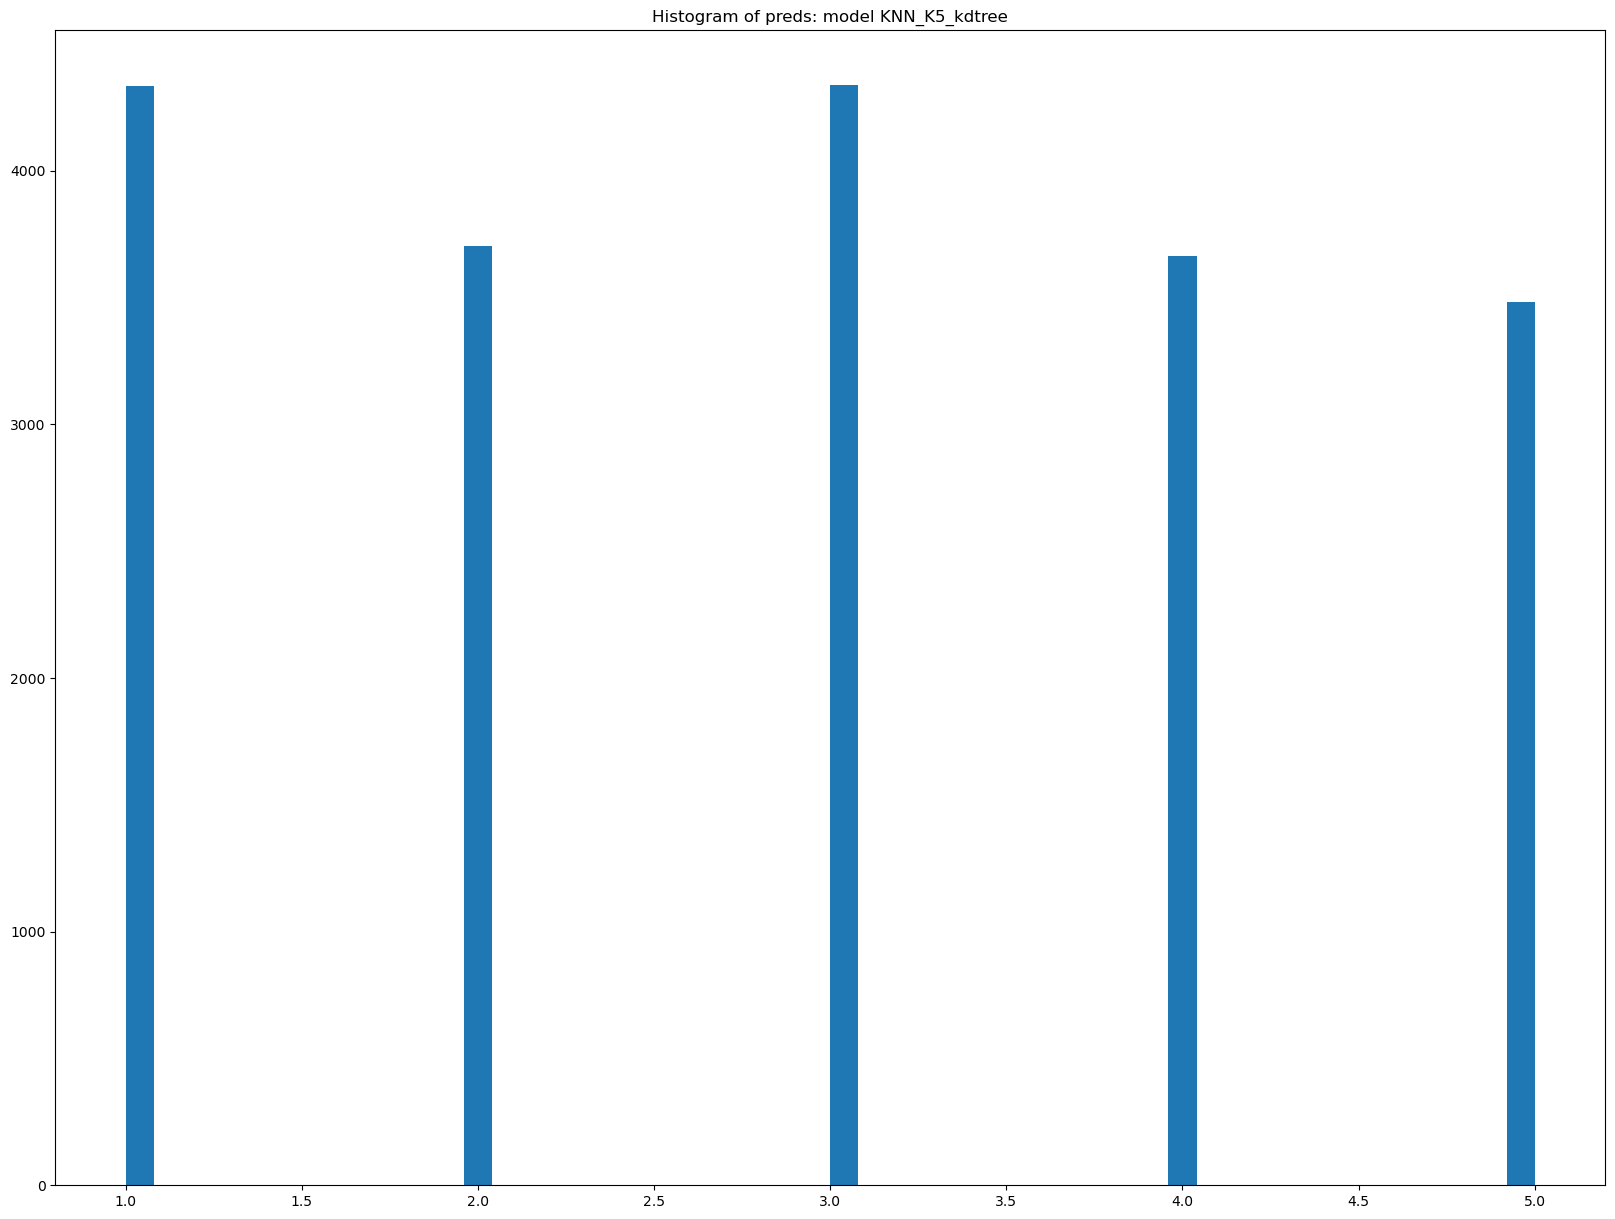

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9293
The Recall is:  0.9277
The F1 score is:  0.9274
The Matthews correlation coefficient is:  0.9101

This is the Confusion Matrix
      0     1     2     3     4
0  4044    14    12     1     2
1    32  3441    98   108    73
2    86     9  3850    94     5
3    33    48   263  3382     8
4   140   192   114    79  3396
model_number: 69
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


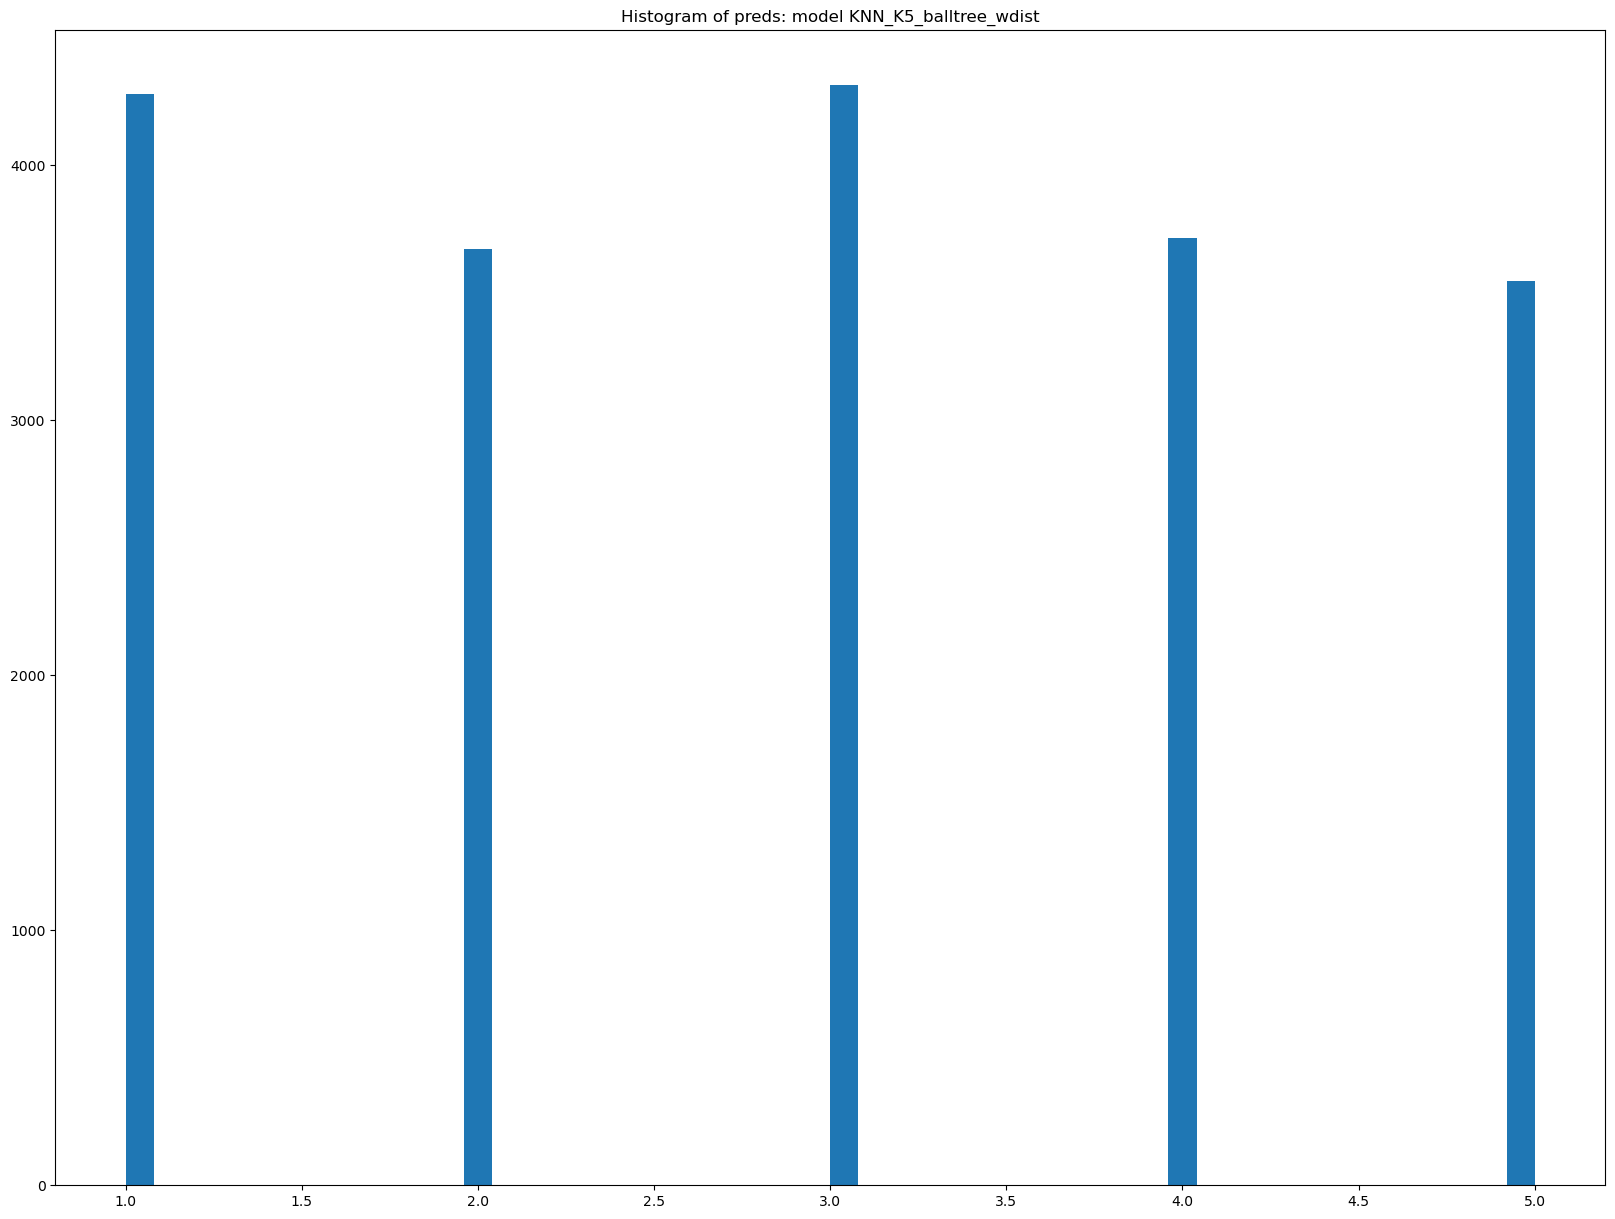

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9359
The Recall is:  0.9348
The F1 score is:  0.9346
The Matthews correlation coefficient is:  0.9188

This is the Confusion Matrix
      0     1     2     3     4
0  4046    13    11     1     2
1    27  3441    90   120    74
2    67     5  3876    90     6
3    26    31   237  3432     8
4   112   183    99    71  3456
model_number: 70
Scaler: StandardScaler StandardScaler() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


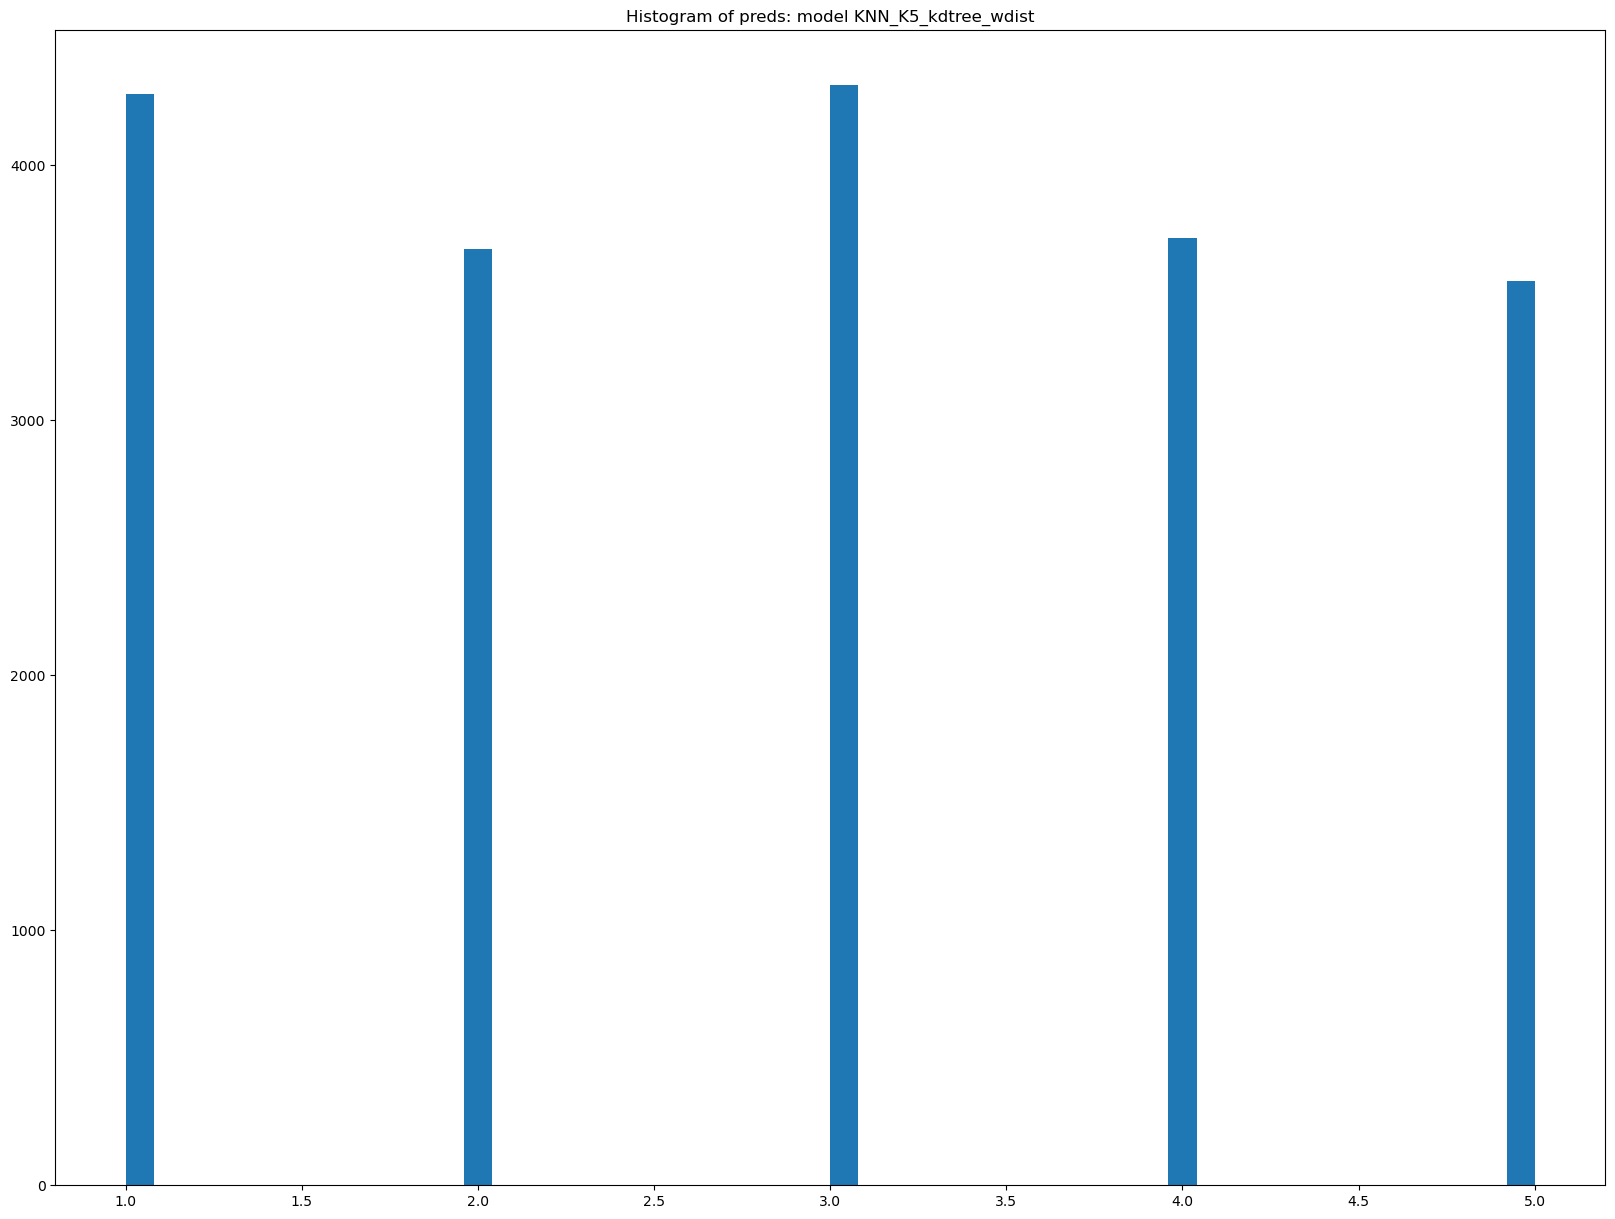

Scaler: StandardScaler() imputer: KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9359
The Recall is:  0.9348
The F1 score is:  0.9346
The Matthews correlation coefficient is:  0.9188

This is the Confusion Matrix
      0     1     2     3     4
0  4046    13    11     1     2
1    27  3441    90   120    74
2    67     5  3876    90     6
3    26    31   237  3432     8
4   112   183    99    71  3456
model_number: 71
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()


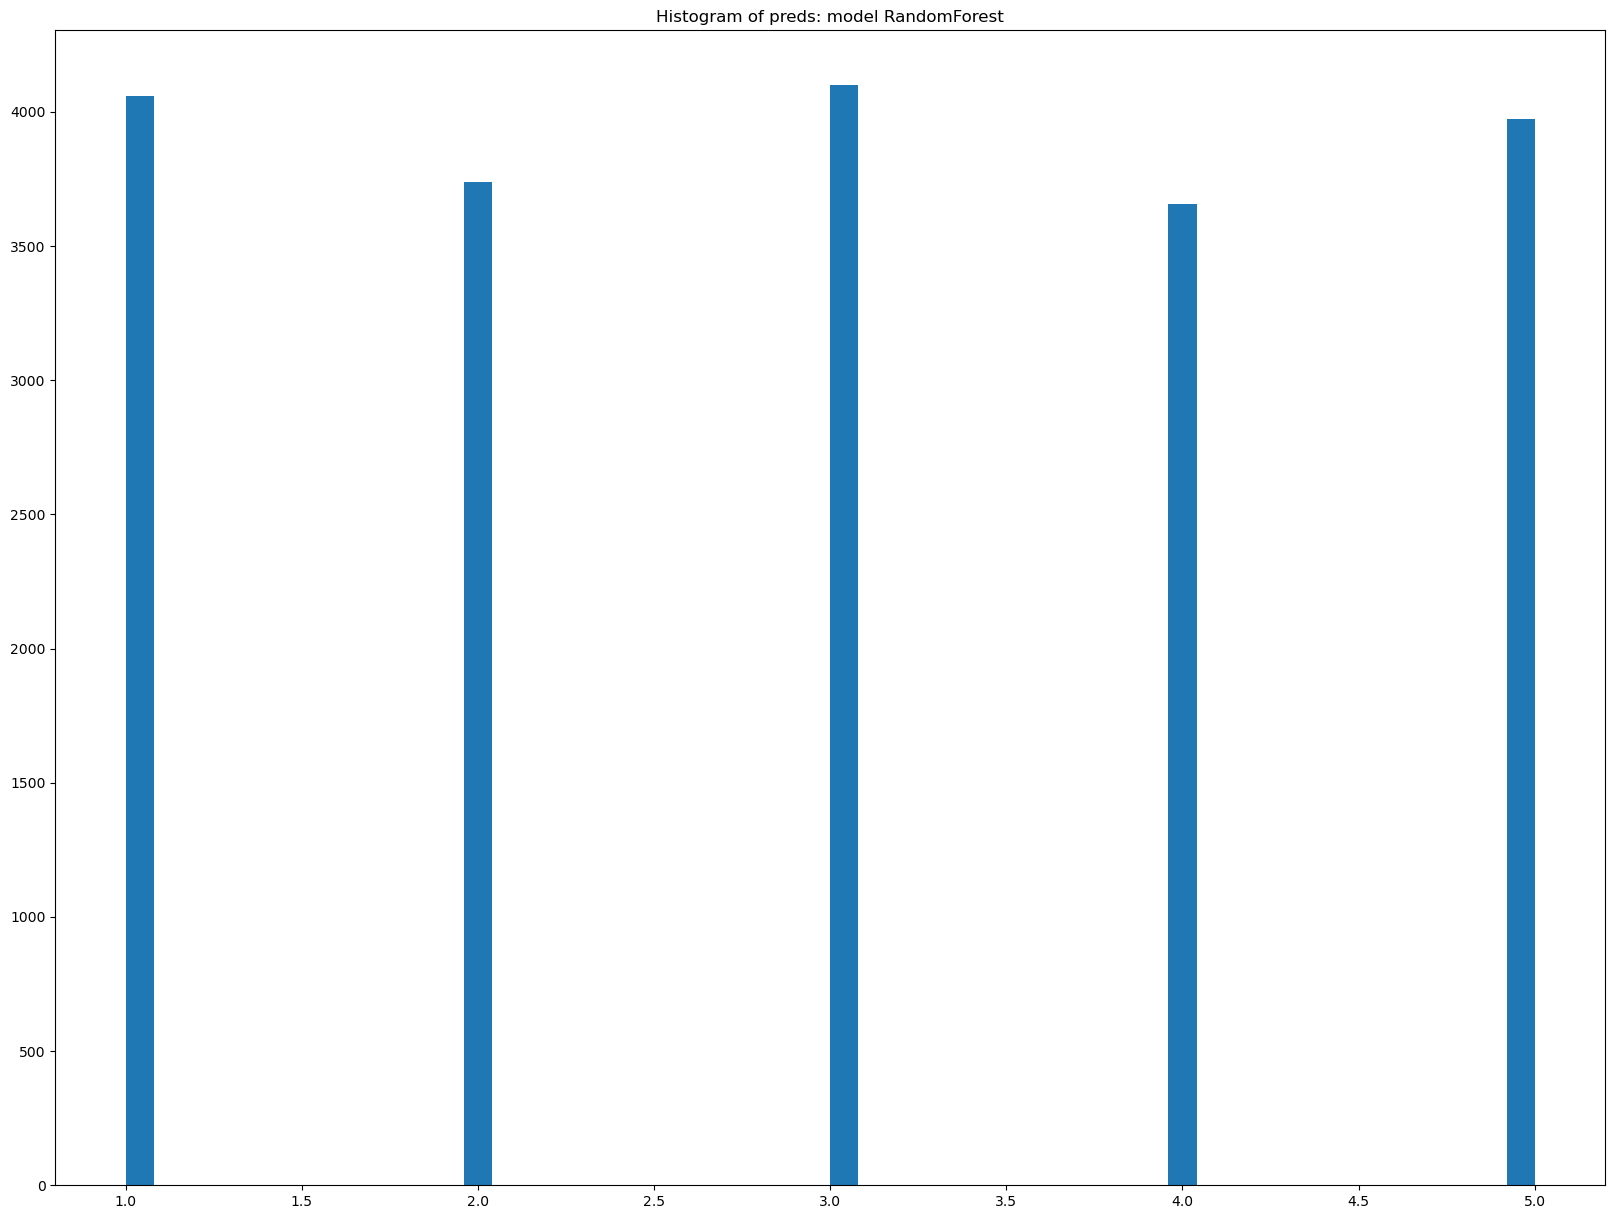

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9825
The Recall is:  0.9825
The F1 score is:  0.9825
The Matthews correlation coefficient is:  0.9781

This is the Confusion Matrix
      0     1     2     3     4
0  4041    16    14     0     2
1     3  3654    28    28    39
2    14    11  3986    24     9
3     1    36    68  3604    25
4     0    20     3     1  3897
model_number: 72
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()


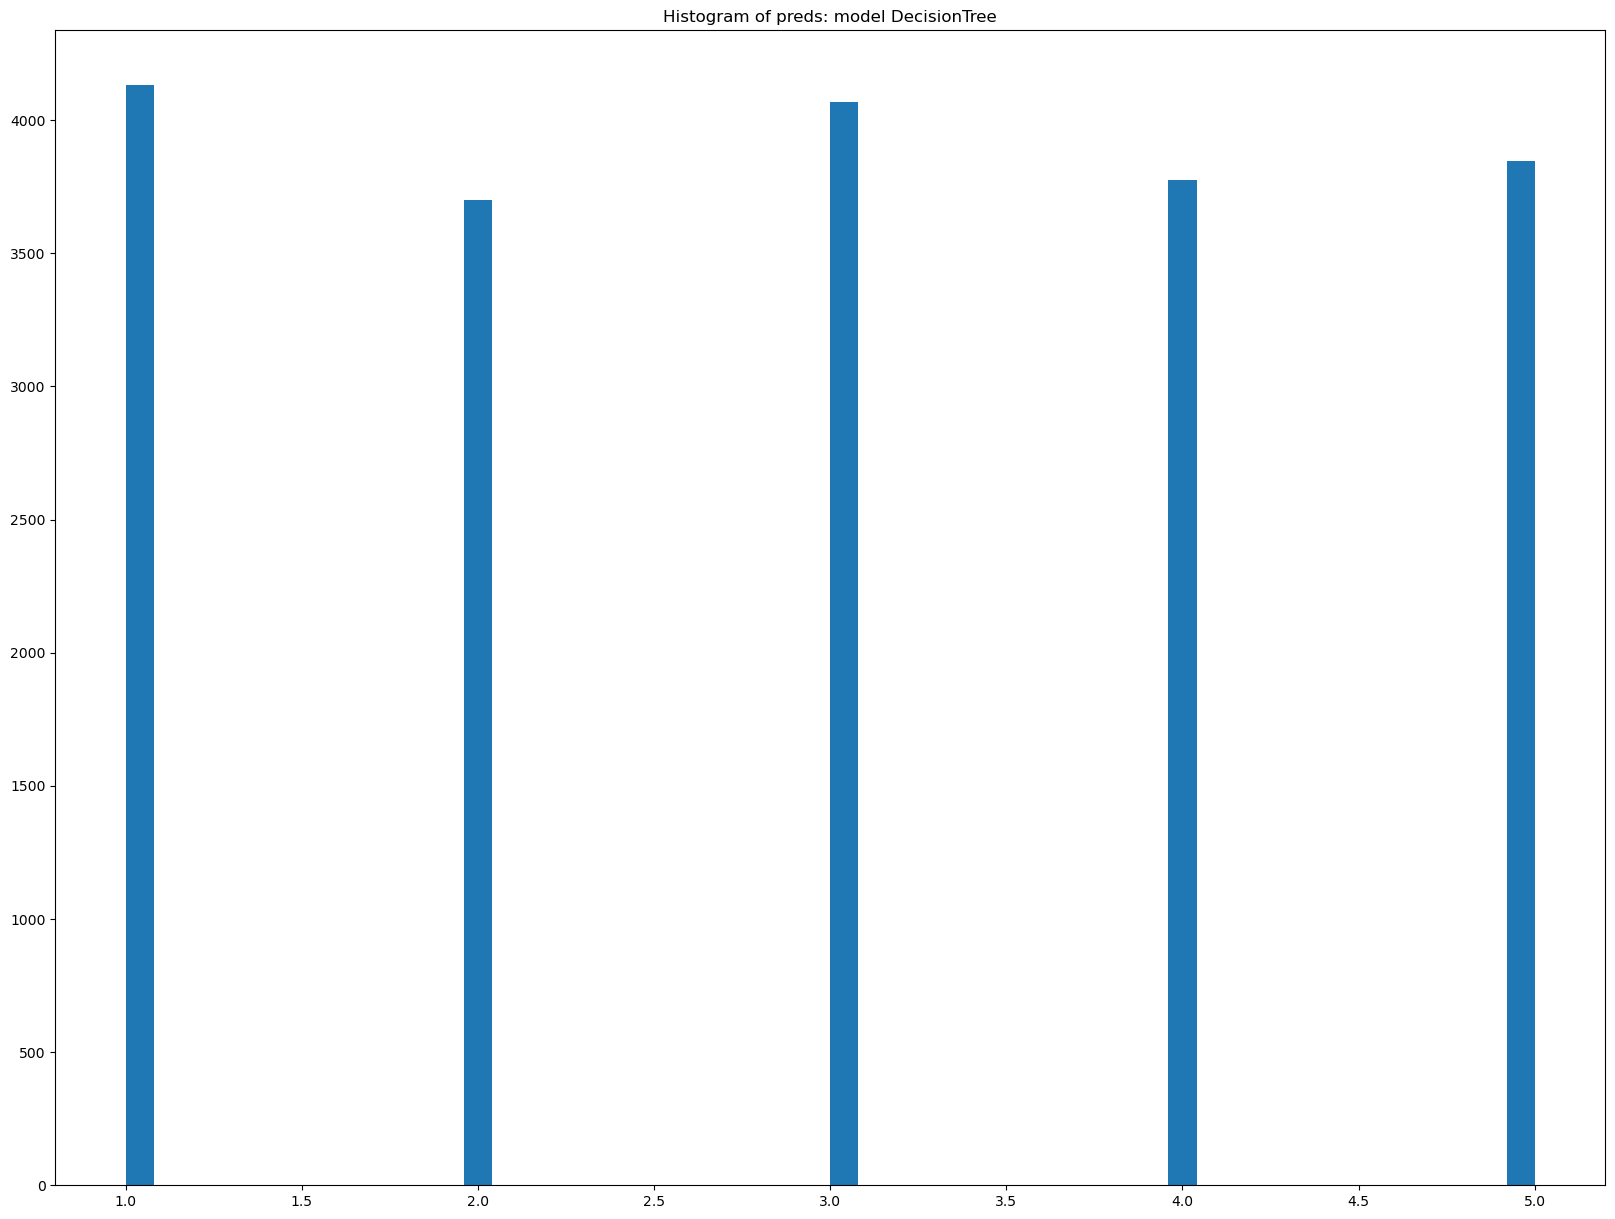

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9026
The Recall is:  0.9027
The F1 score is:  0.9026
The Matthews correlation coefficient is:  0.8784

This is the Confusion Matrix
      0     1     2     3     4
0  3972    19    37    23    22
1    33  3301    95   151   172
2    41    69  3658   176   100
3    28   130   167  3275   134
4    57   182   112   151  3419
model_number: 73
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


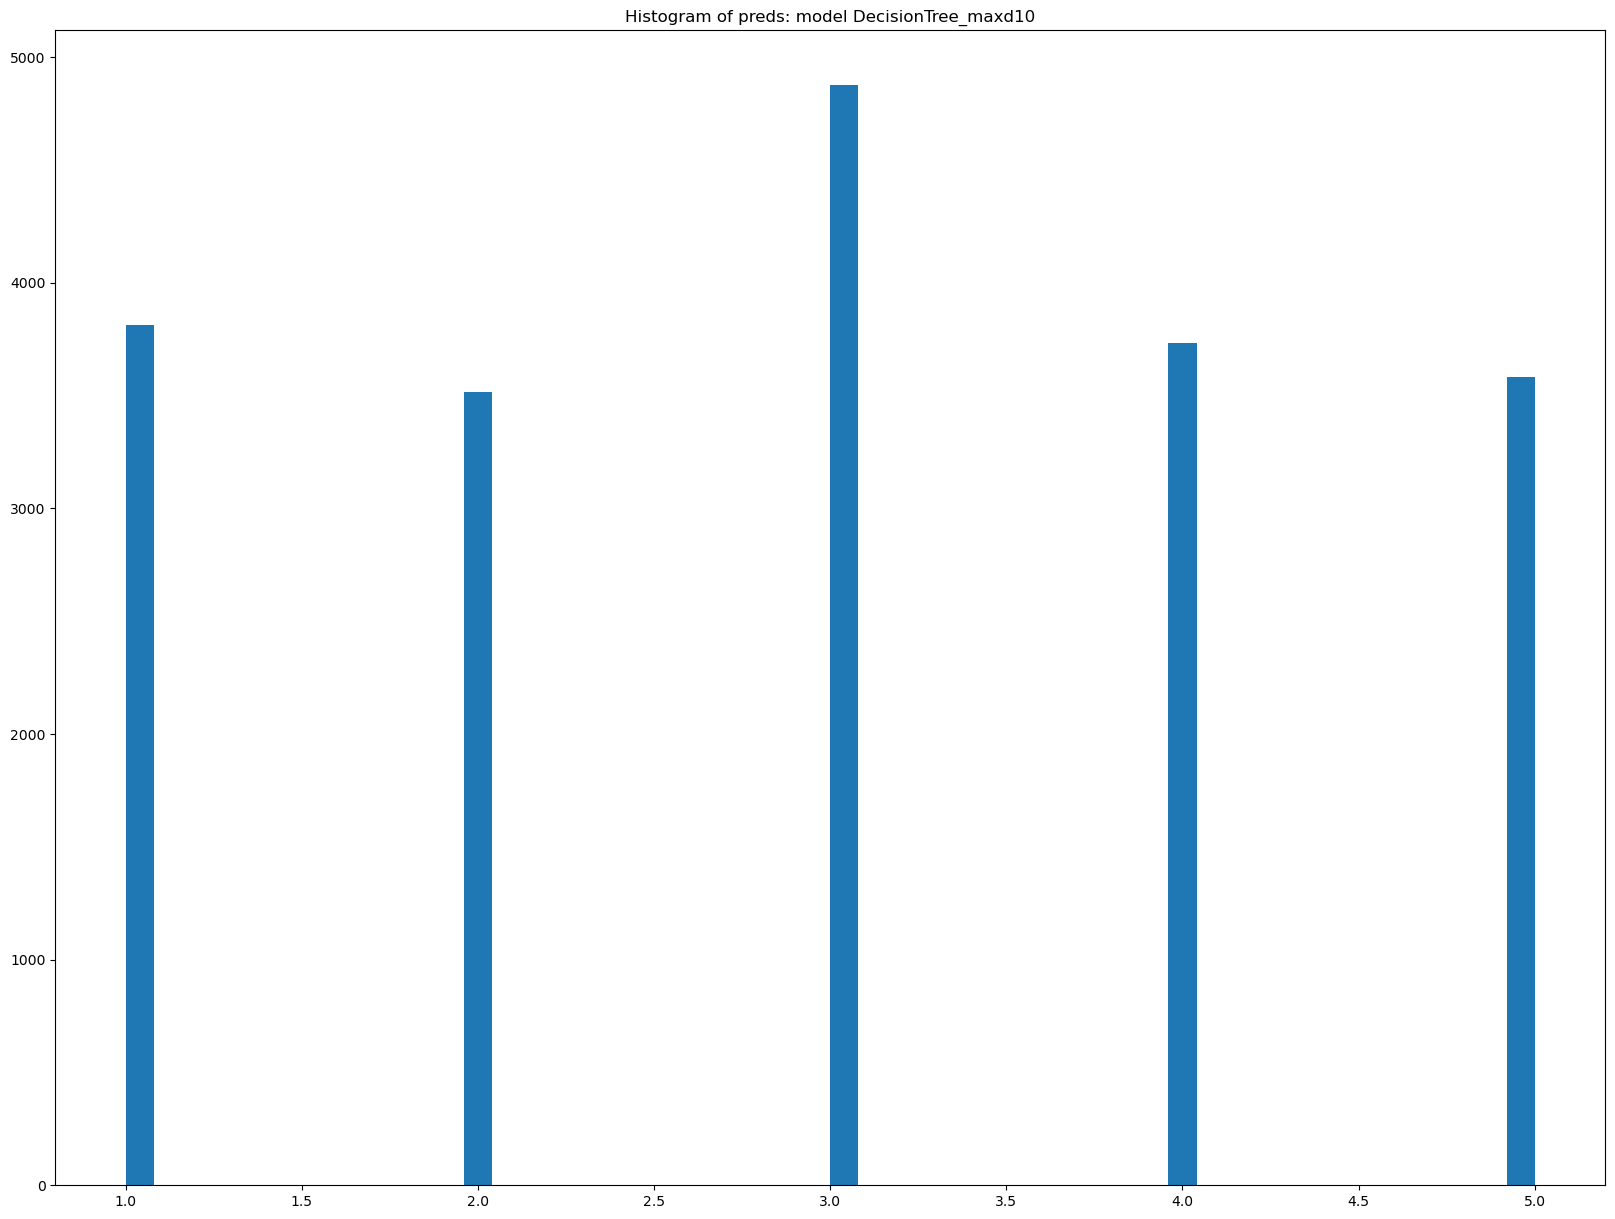

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8252
The Recall is:  0.8178
The F1 score is:  0.8194
The Matthews correlation coefficient is:  0.7733

This is the Confusion Matrix
      0     1     2     3     4
0  3706    45   196    78    48
1    13  2953   323   243   220
2    39    91  3468   355    91
3    21   196   554  2790   173
4    36   233   335   267  3050
model_number: 74
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


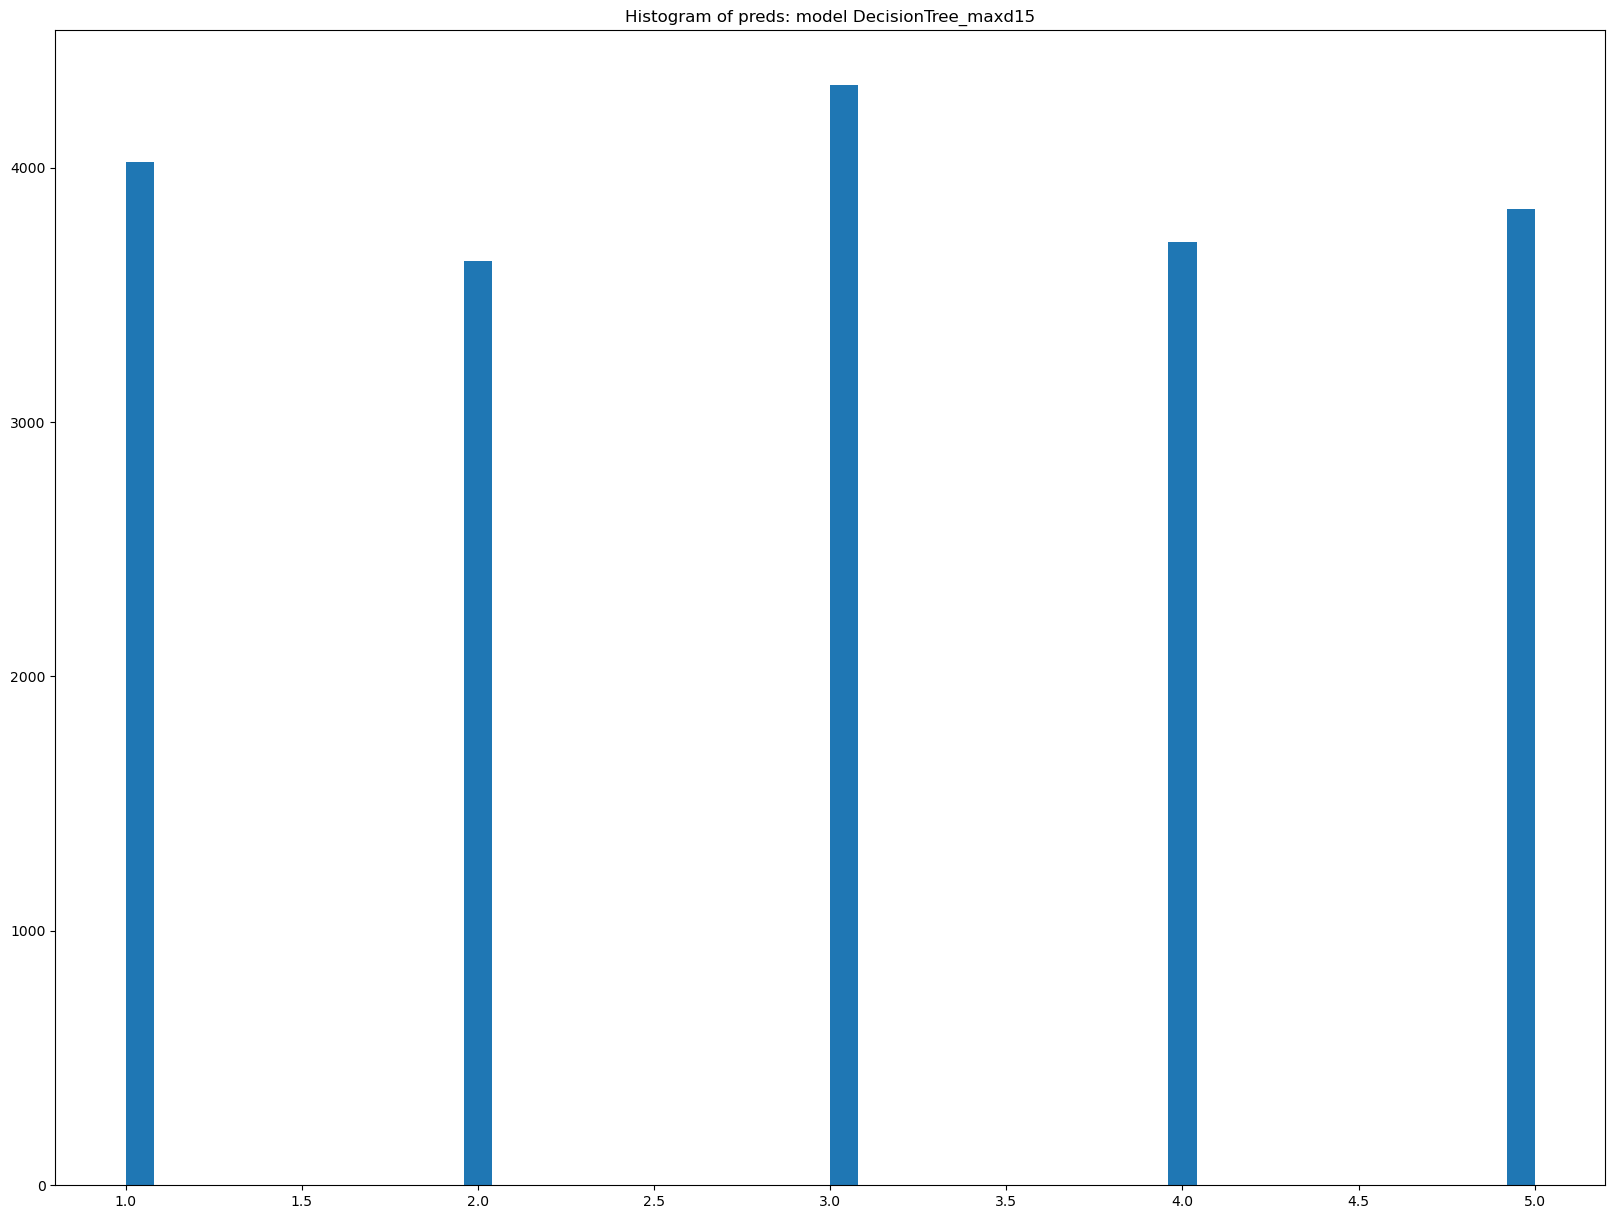

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8857
The Recall is:  0.8850
The F1 score is:  0.8851
The Matthews correlation coefficient is:  0.8563

This is the Confusion Matrix
      0     1     2     3     4
0  3906    25    79    36    27
1    25  3213   167   168   179
2    38    73  3634   196   103
3    25   132   280  3147   150
4    29   190   164   160  3378
model_number: 75
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


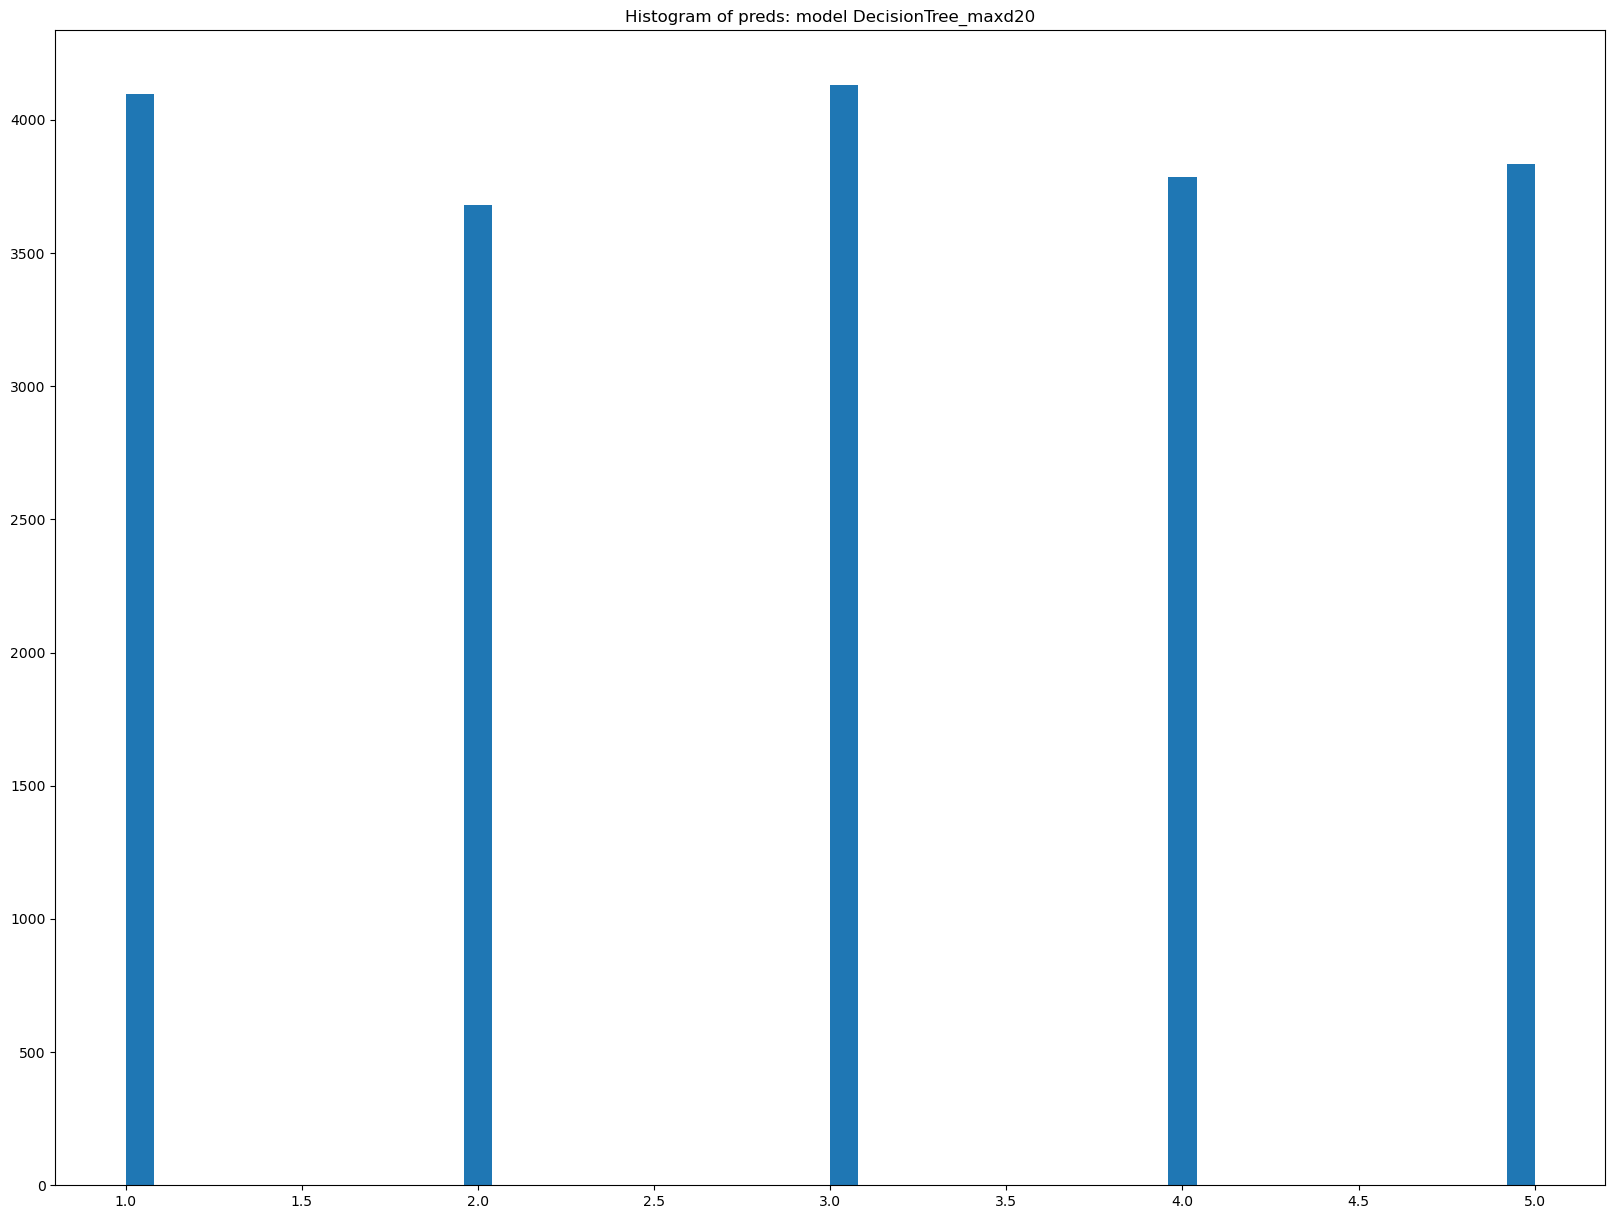

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9010
The Recall is:  0.9010
The F1 score is:  0.9010
The Matthews correlation coefficient is:  0.8762

This is the Confusion Matrix
      0     1     2     3     4
0  3958    17    49    18    31
1    27  3292   108   160   165
2    42    70  3645   197    90
3    28   126   196  3266   118
4    41   175   132   143  3430
model_number: 76
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()


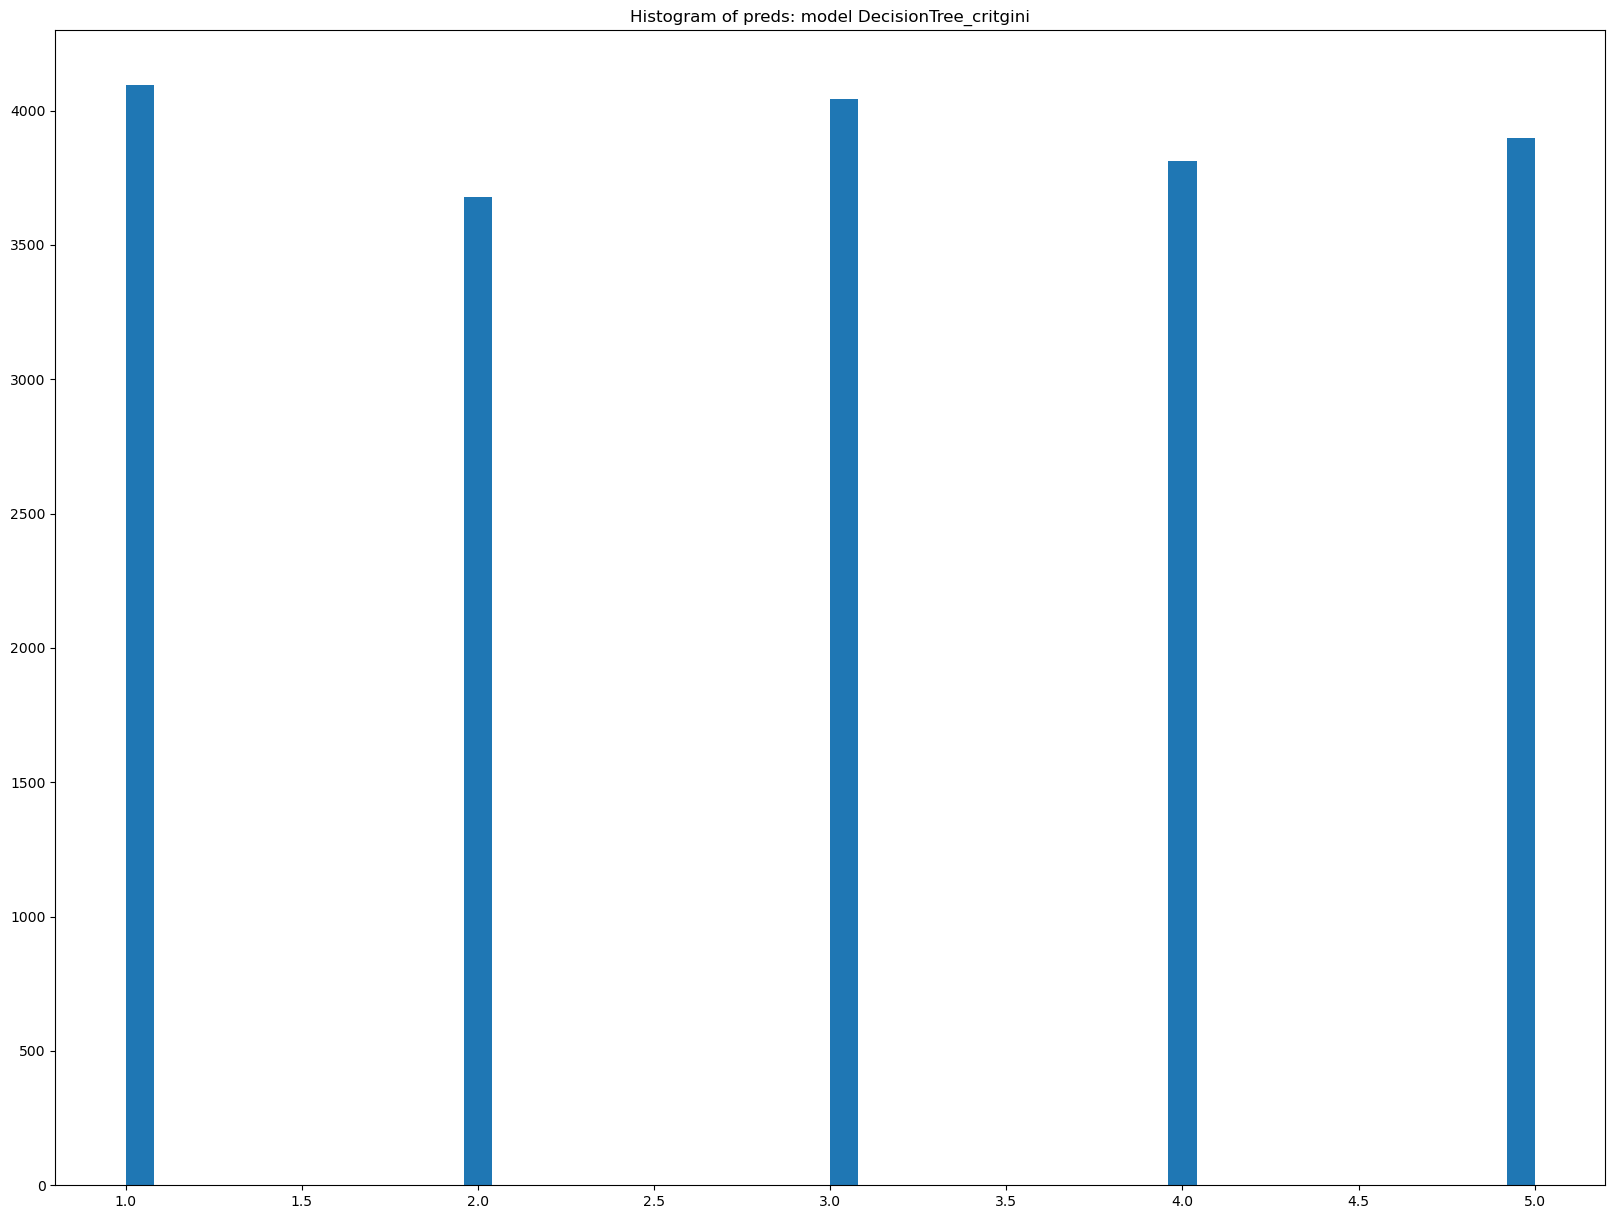

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9036
The Recall is:  0.9035
The F1 score is:  0.9035
The Matthews correlation coefficient is:  0.8794

This is the Confusion Matrix
      0     1     2     3     4
0  3962    18    41    24    28
1    32  3308    77   157   178
2    39    66  3640   195   104
3    21   122   173  3281   137
4    40   164   113   155  3449
model_number: 77
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


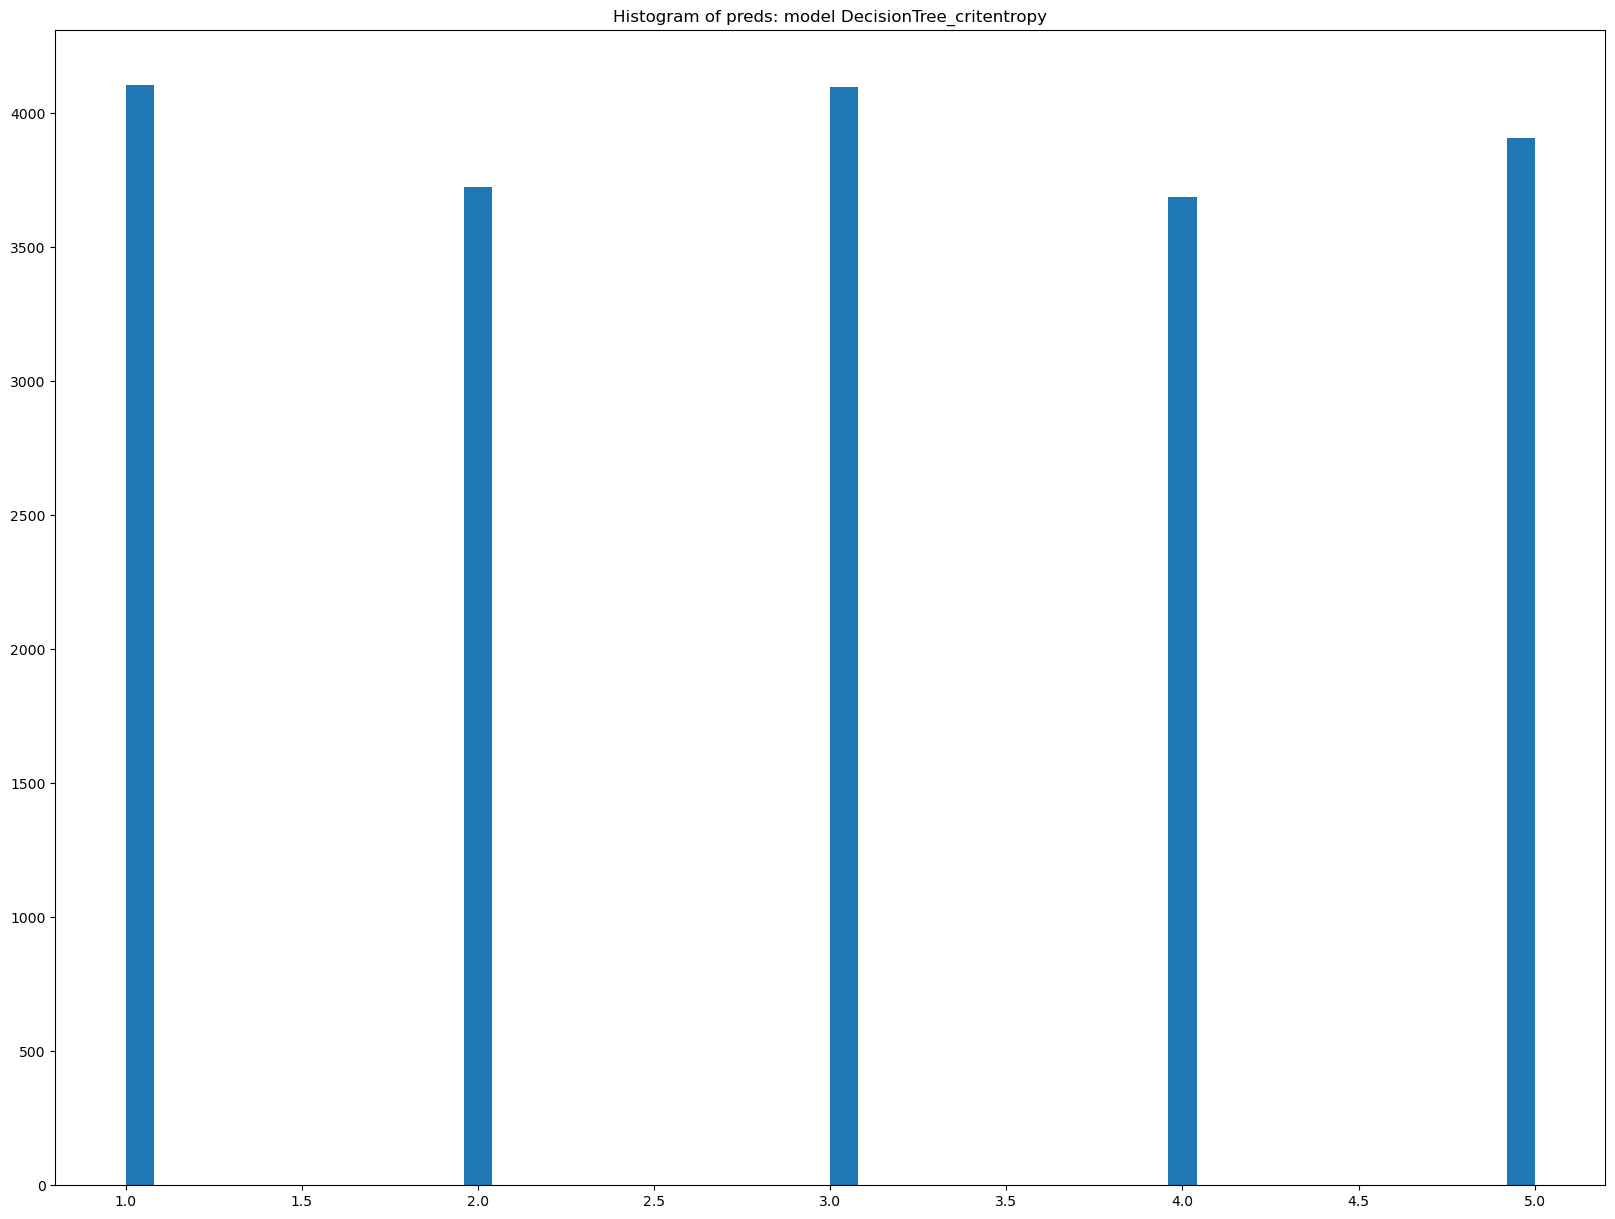

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9118
The Recall is:  0.9120
The F1 score is:  0.9119
The Matthews correlation coefficient is:  0.8899

This is the Confusion Matrix
      0     1     2     3     4
0  3981    23    27    18    24
1    28  3339    93   124   168
2    37    72  3689   163    83
3    19   117   196  3283   119
4    40   173    95   100  3513
model_number: 78
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()


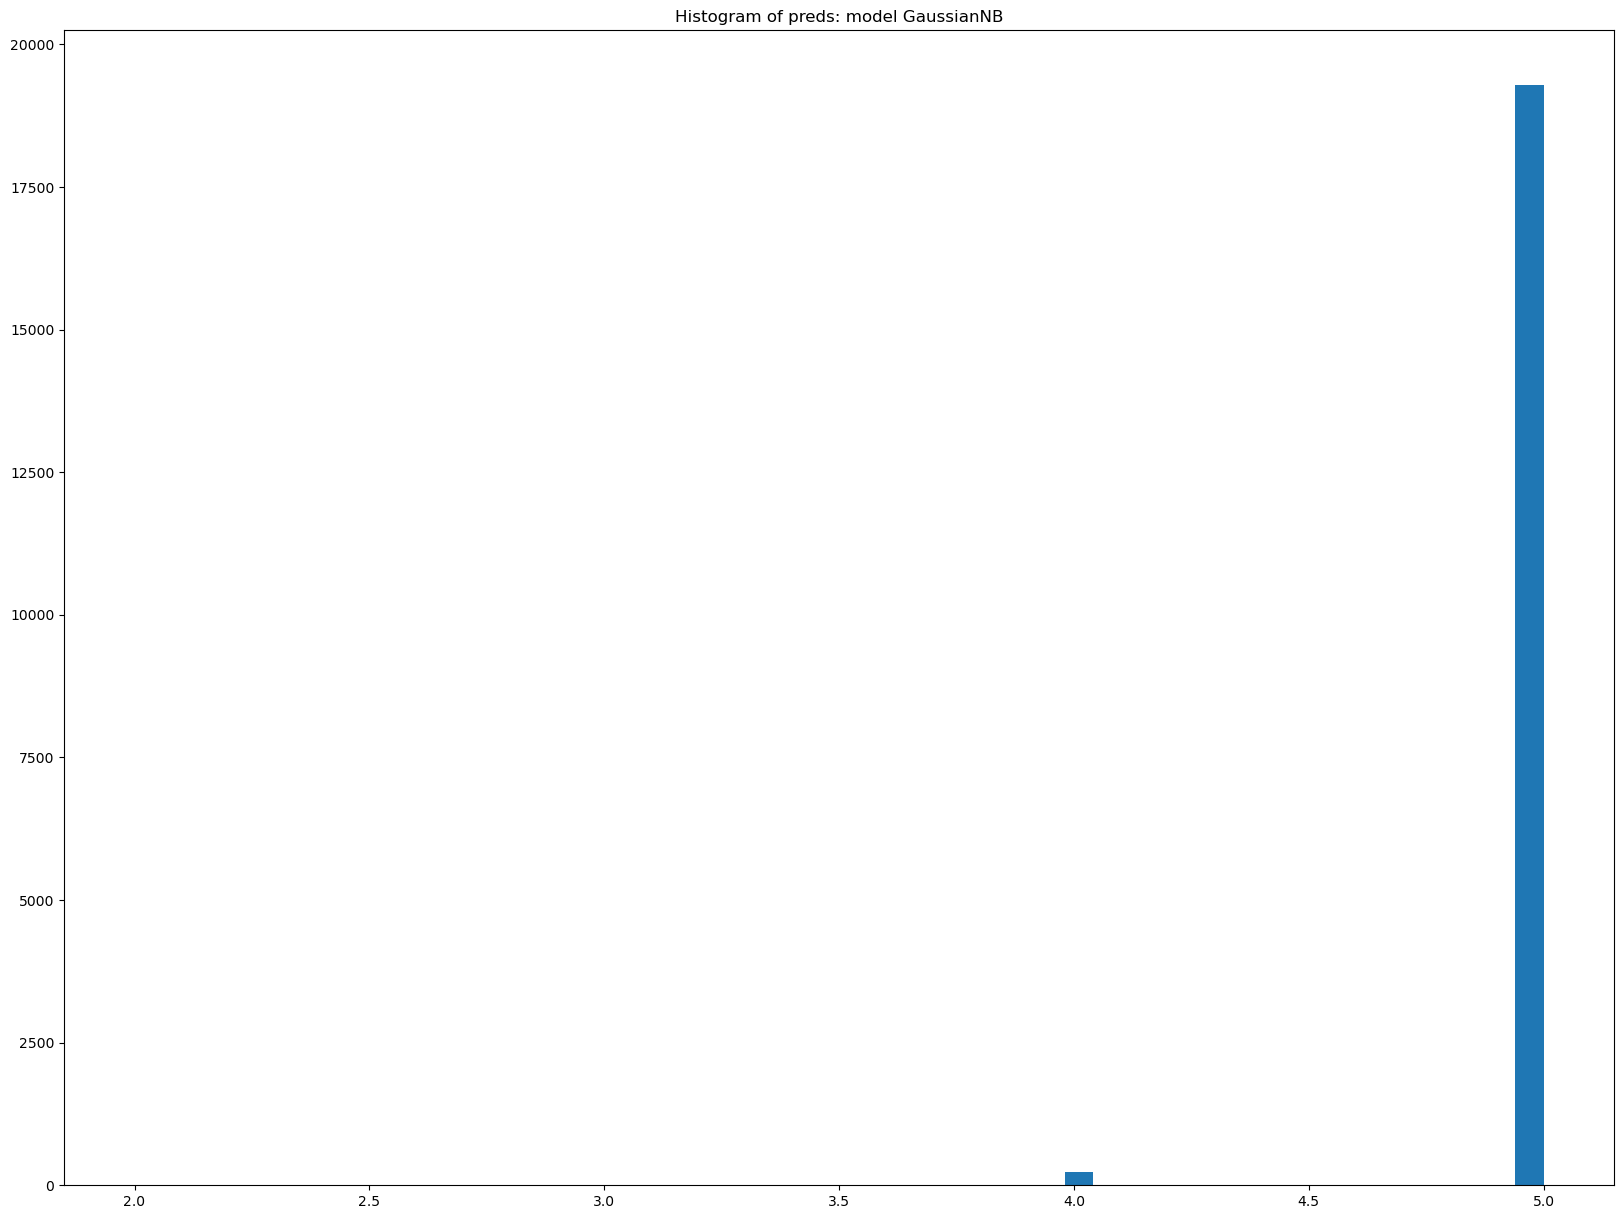

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()
The Precision is:  0.4438
The Recall is:  0.2056
The F1 score is:  0.0770
The Matthews correlation coefficient is:  0.0352

This is the Confusion Matrix
   0  1   2   3     4
0  0  1   0  29  4043
1  0  2   0  54  3696
2  0  0  12  63  3969
3  0  0   0  80  3654
4  0  0   0   0  3921
model_number: 79
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


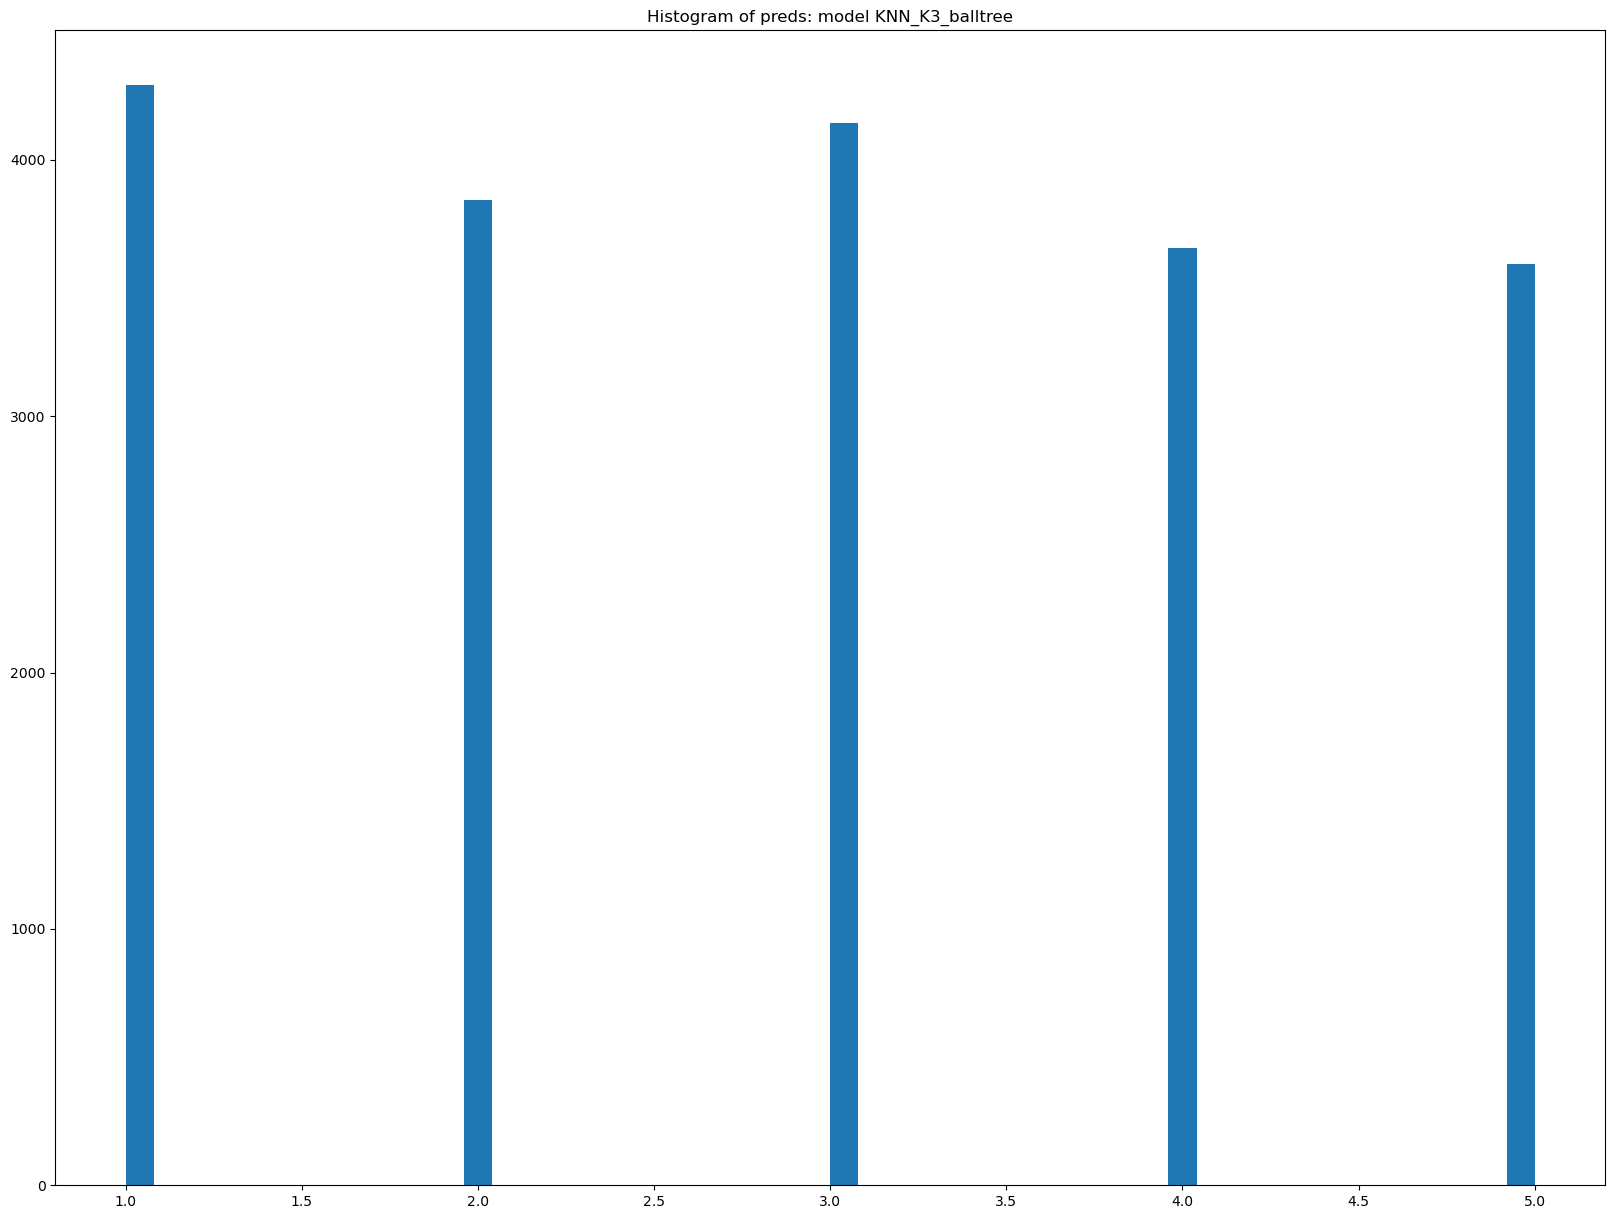

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9324
The Recall is:  0.9316
The F1 score is:  0.9314
The Matthews correlation coefficient is:  0.9147

This is the Confusion Matrix
      0     1     2     3     4
0  4028    14    23     4     4
1    35  3503    54    92    68
2    98    25  3779   133     9
3    35   104   203  3379    13
4    95   196    83    48  3499
model_number: 80
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


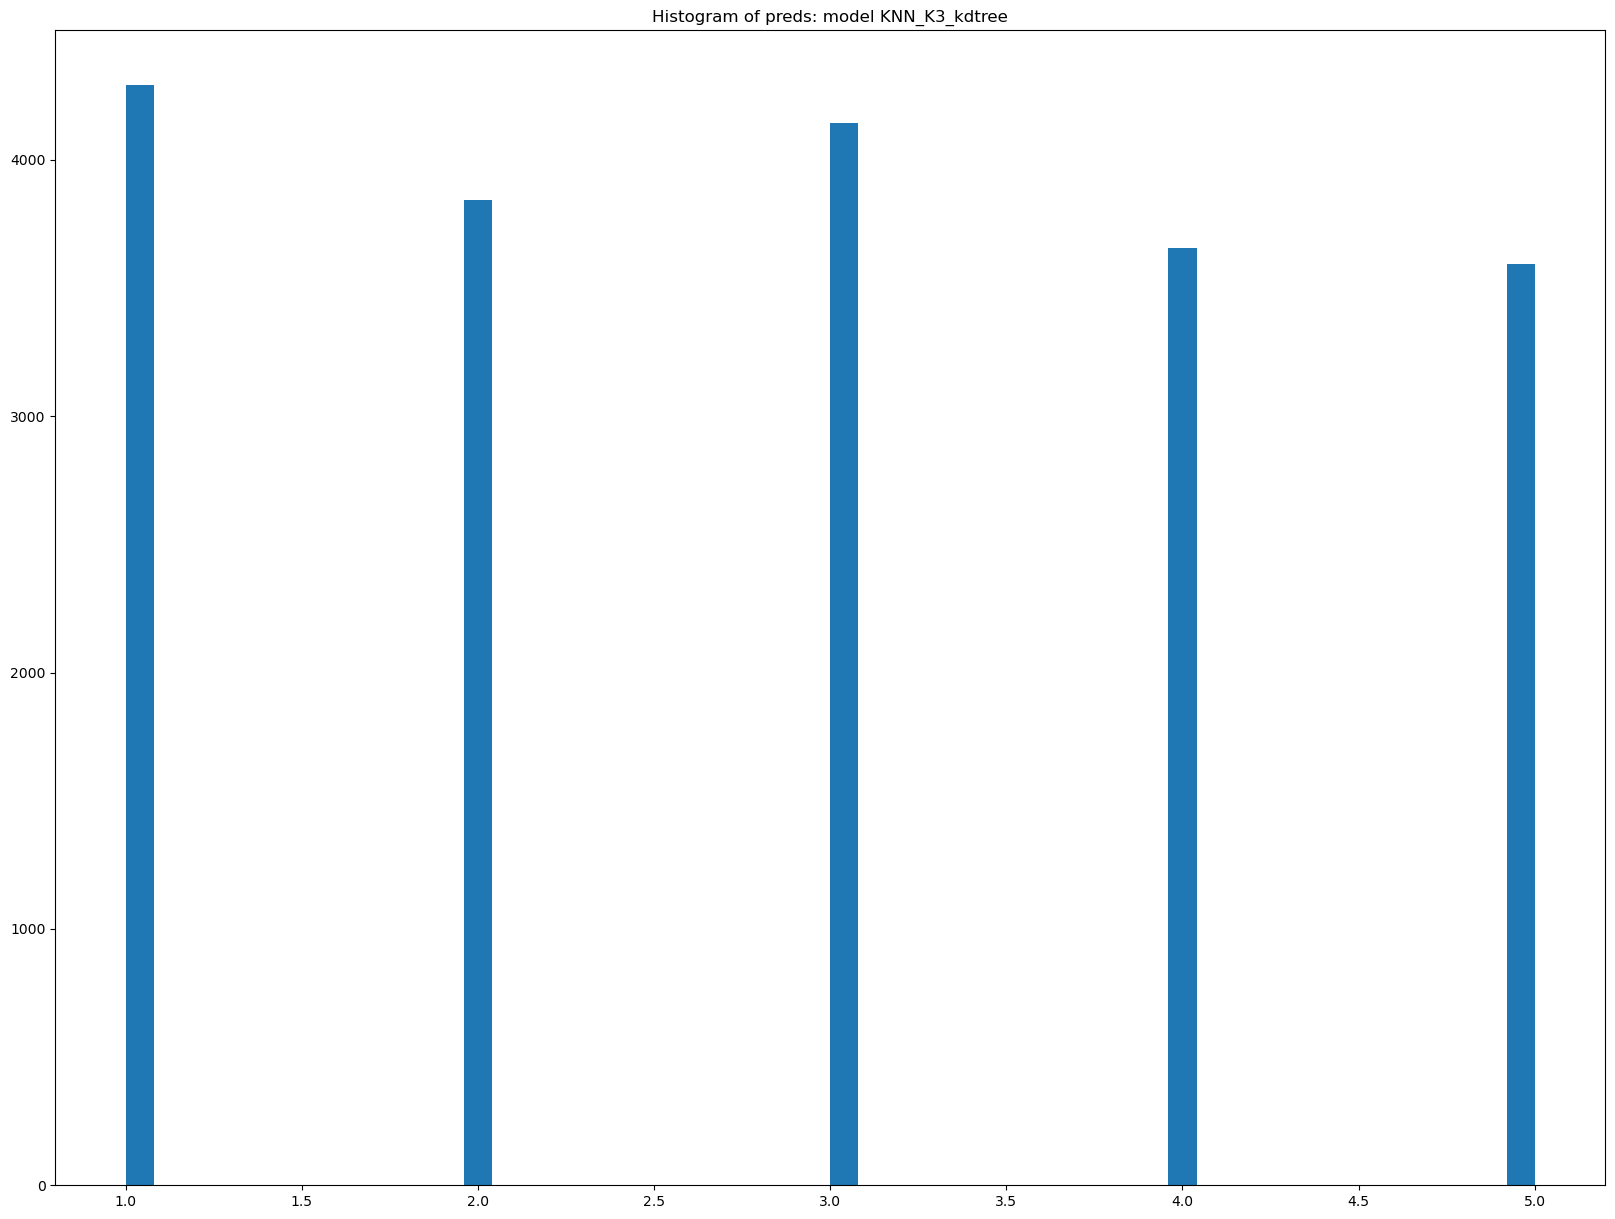

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9324
The Recall is:  0.9316
The F1 score is:  0.9314
The Matthews correlation coefficient is:  0.9147

This is the Confusion Matrix
      0     1     2     3     4
0  4028    14    23     4     4
1    35  3503    54    92    68
2    98    25  3779   133     9
3    35   104   203  3379    13
4    95   196    83    48  3499
model_number: 81
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


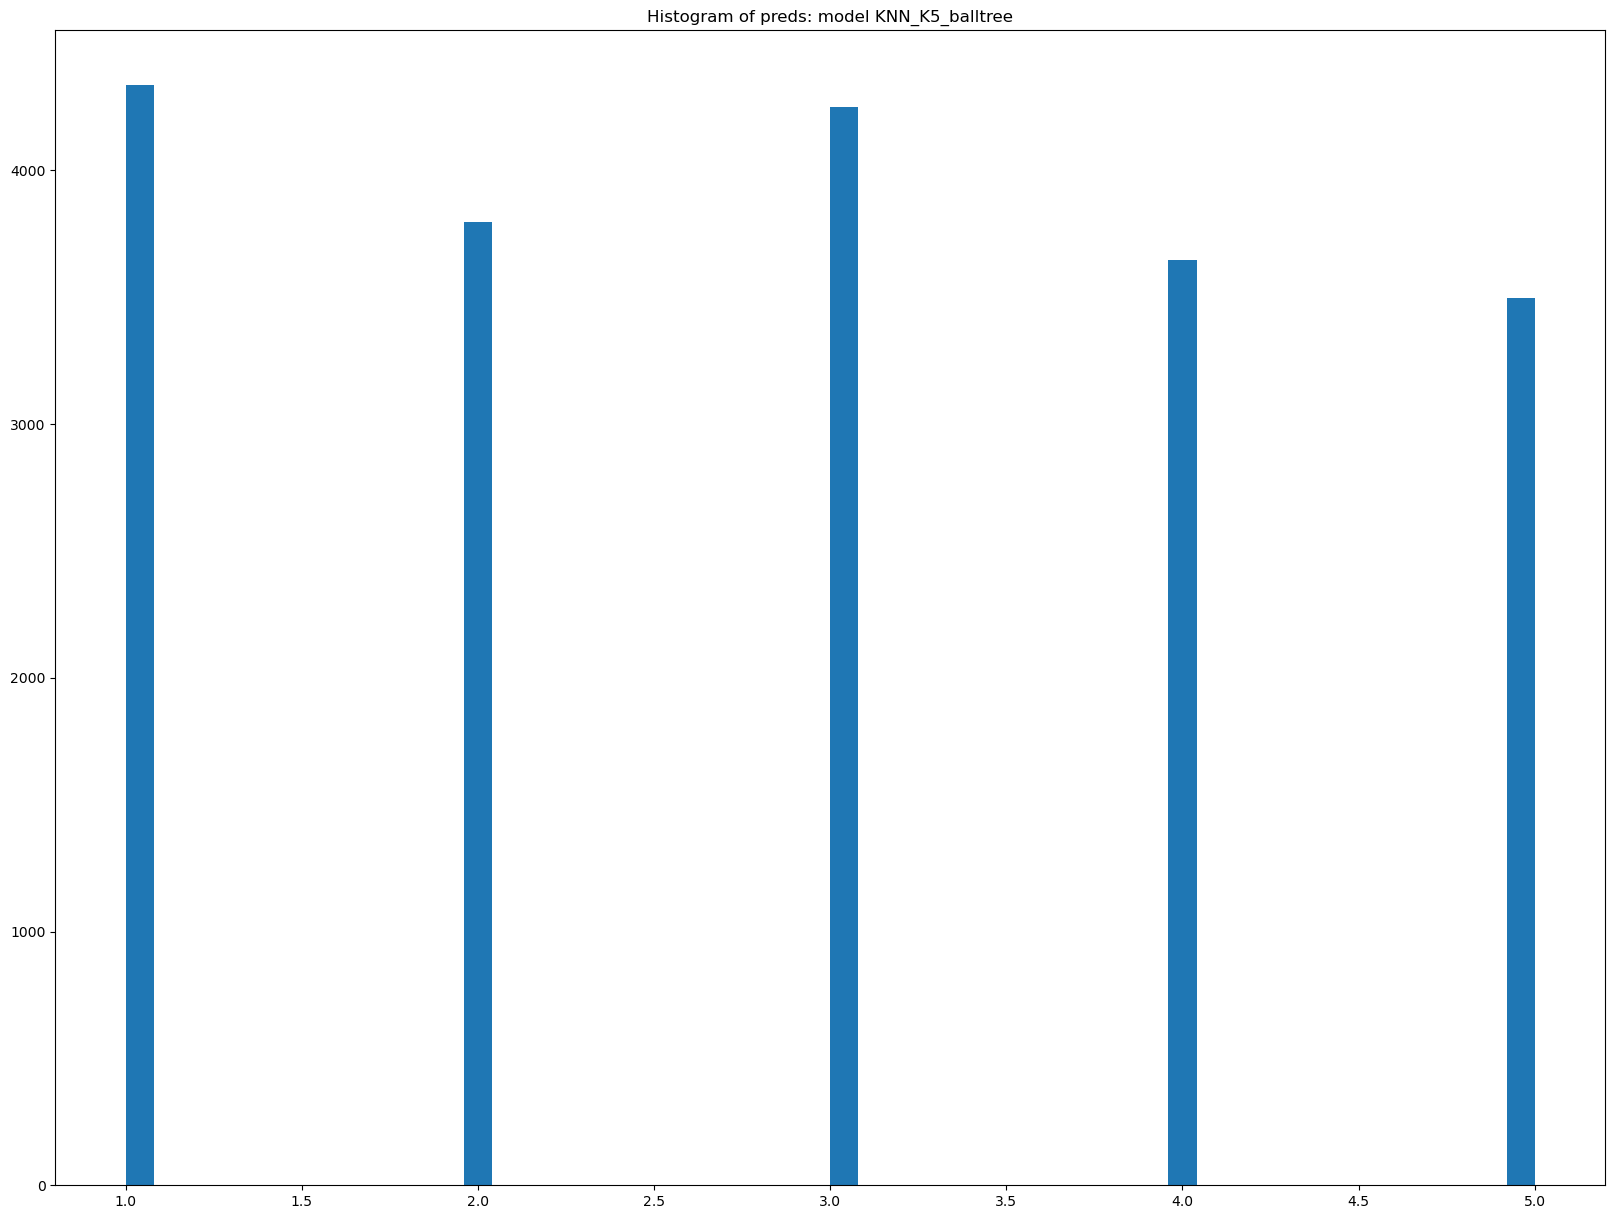

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9244
The Recall is:  0.9229
The F1 score is:  0.9227
The Matthews correlation coefficient is:  0.9040

This is the Confusion Matrix
      0     1     2     3     4
0  4021    18    31     1     2
1    35  3473    82    97    65
2   118    15  3769   132    10
3    35    85   262  3344     8
4   126   207   104    72  3412
model_number: 82
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


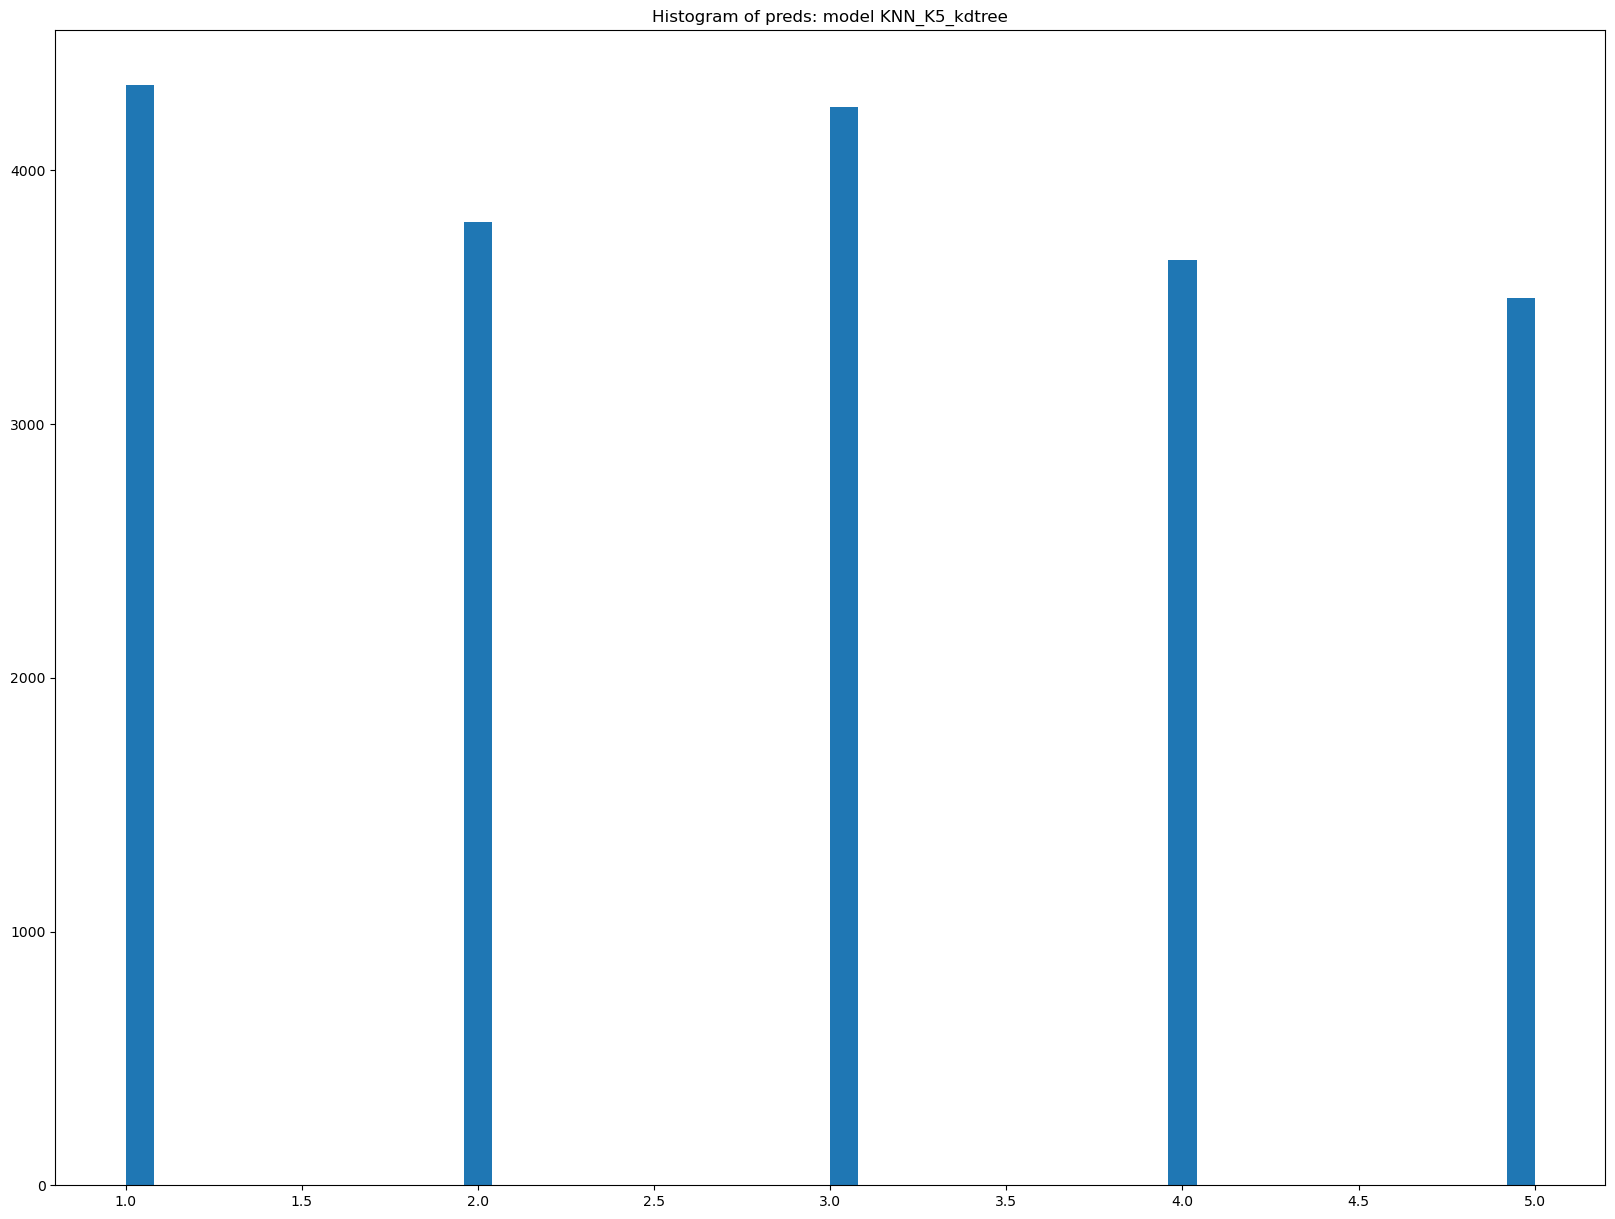

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9244
The Recall is:  0.9229
The F1 score is:  0.9227
The Matthews correlation coefficient is:  0.9040

This is the Confusion Matrix
      0     1     2     3     4
0  4021    18    31     1     2
1    35  3473    82    97    65
2   118    15  3769   132    10
3    35    85   262  3344     8
4   126   207   104    72  3412
model_number: 83
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


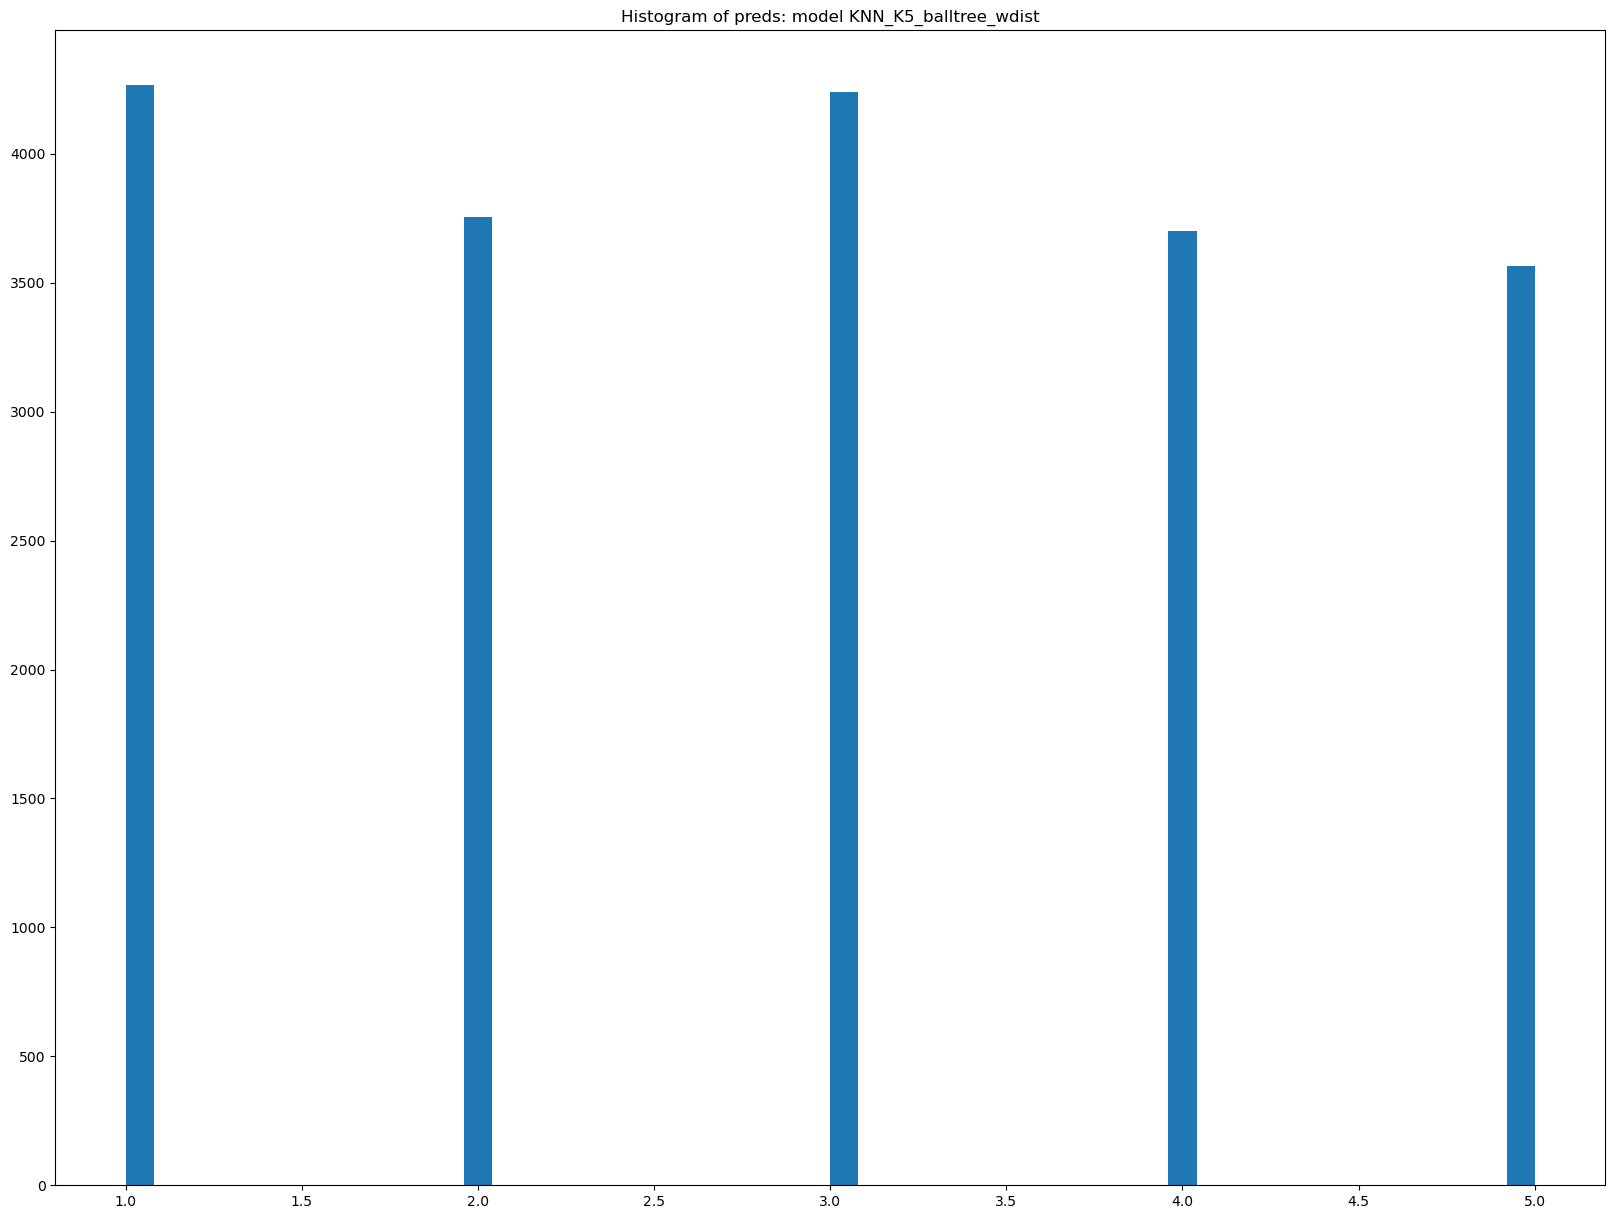

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9329
The Recall is:  0.9320
The F1 score is:  0.9318
The Matthews correlation coefficient is:  0.9152

This is the Confusion Matrix
      0     1     2     3     4
0  4029    15    26     1     2
1    29  3470    81   103    69
2    77     9  3820   128    10
3    29    61   225  3406    13
4   102   199    88    61  3471
model_number: 84
Scaler: StandardScaler StandardScaler() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


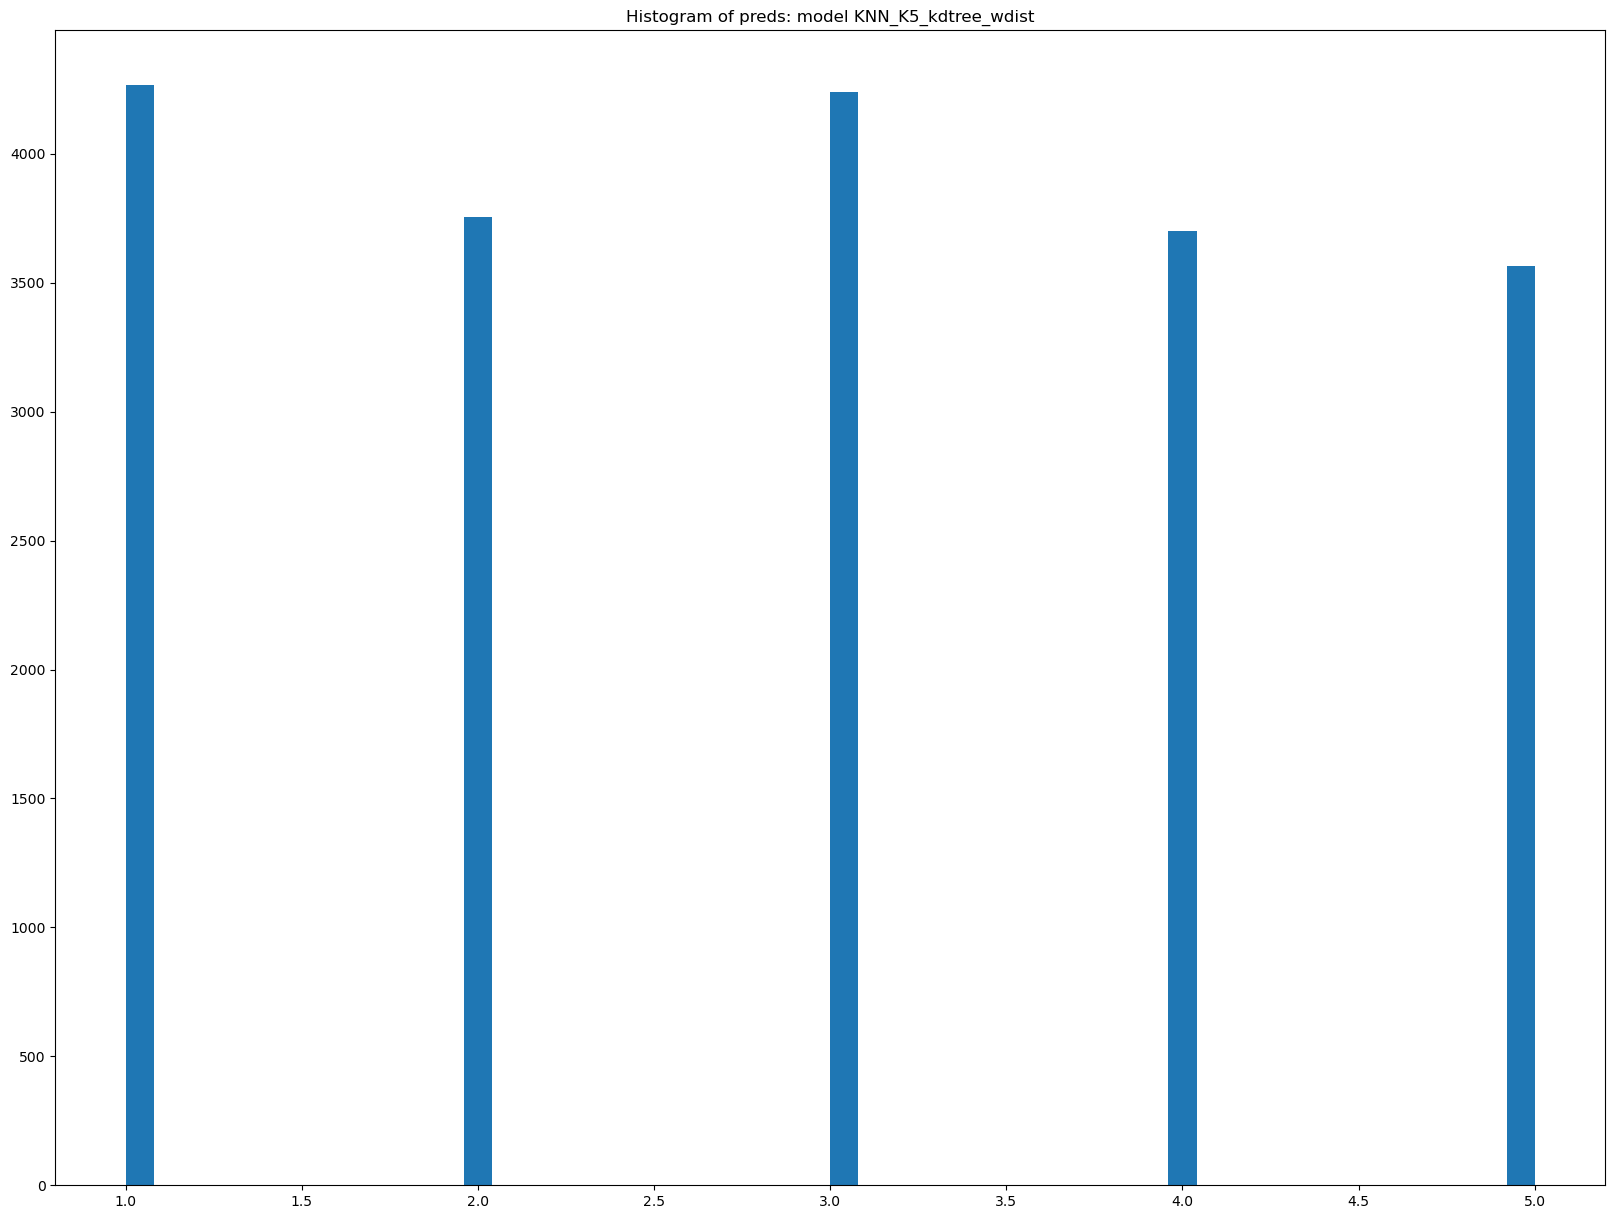

Scaler: StandardScaler() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9329
The Recall is:  0.9320
The F1 score is:  0.9318
The Matthews correlation coefficient is:  0.9152

This is the Confusion Matrix
      0     1     2     3     4
0  4029    15    26     1     2
1    29  3470    81   103    69
2    77     9  3820   128    10
3    29    61   225  3406    13
4   102   199    88    61  3471
model_number: 85
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: RandomForest RandomForestClassifier()


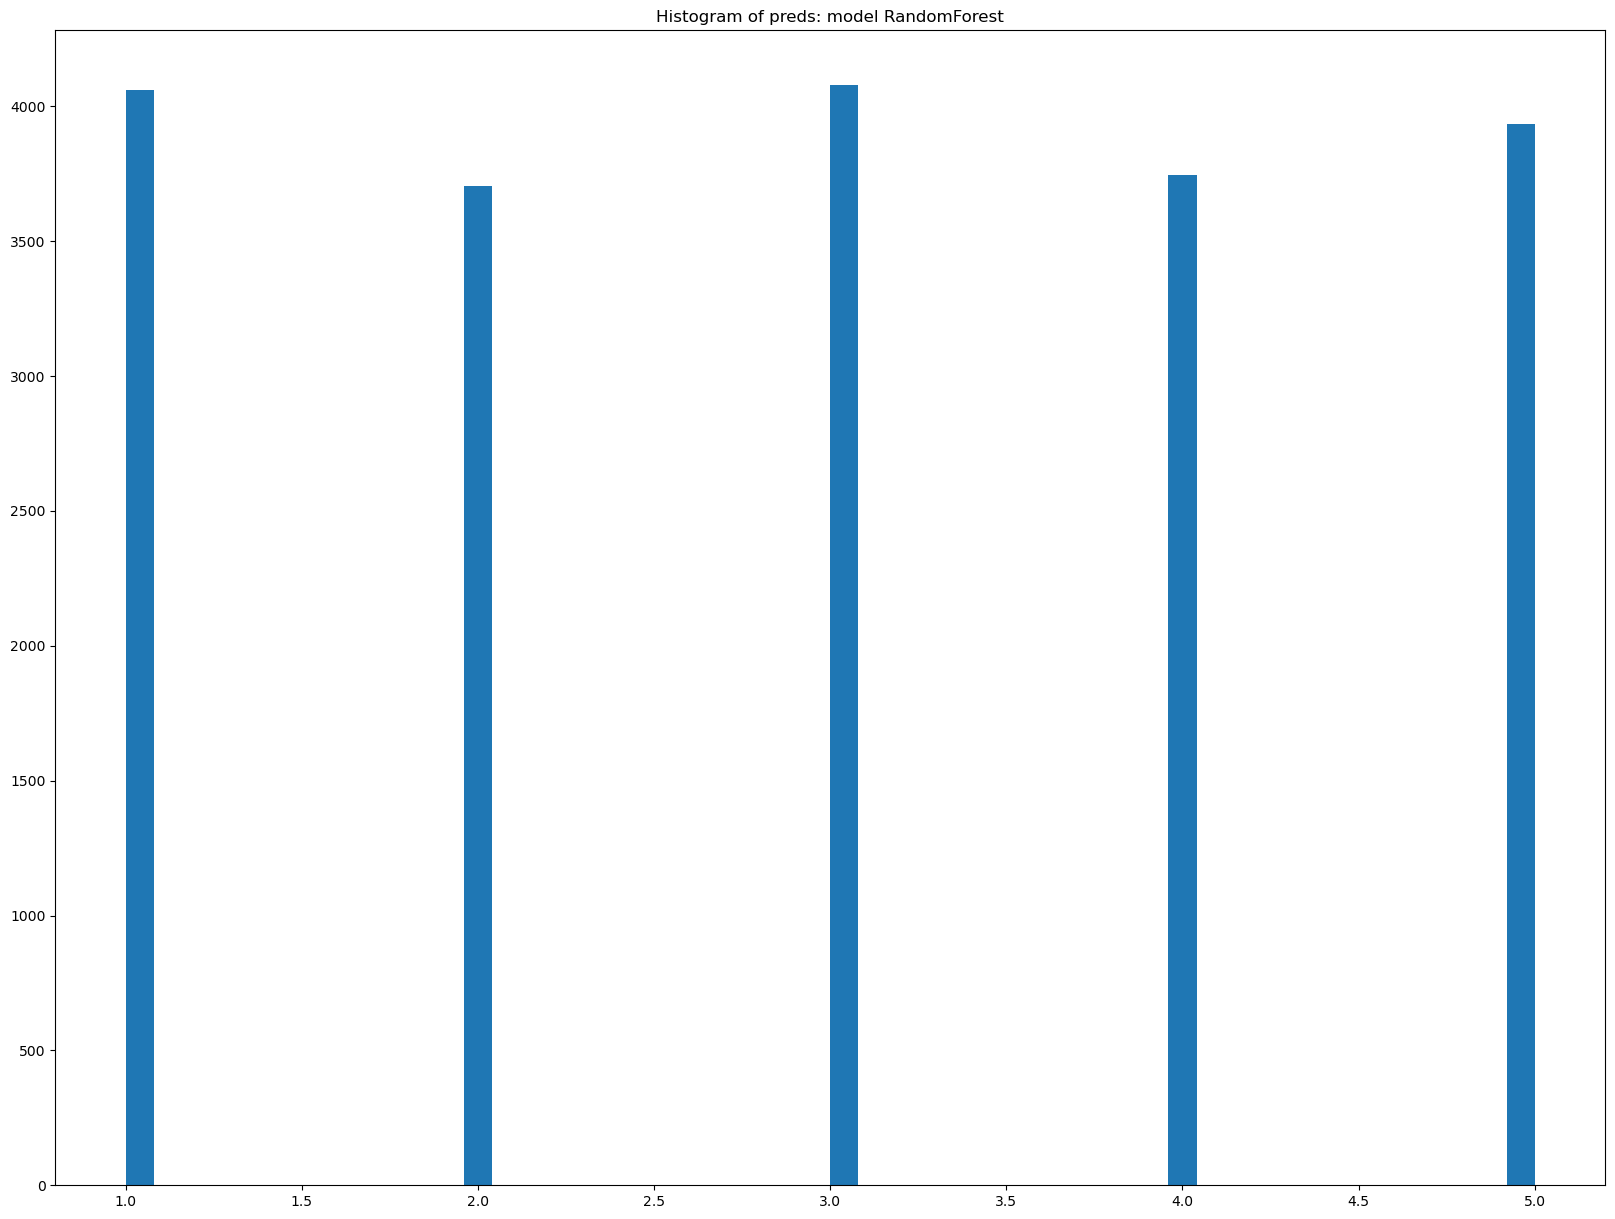

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9899
The Recall is:  0.9899
The F1 score is:  0.9899
The Matthews correlation coefficient is:  0.9874

This is the Confusion Matrix
      0     1     2     3     4
0  4051    15     7     0     0
1     4  3676    19    22    31
2     4     0  4013    25     2
3     0     0    38  3690     6
4     0    14     1     9  3897
model_number: 86
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()


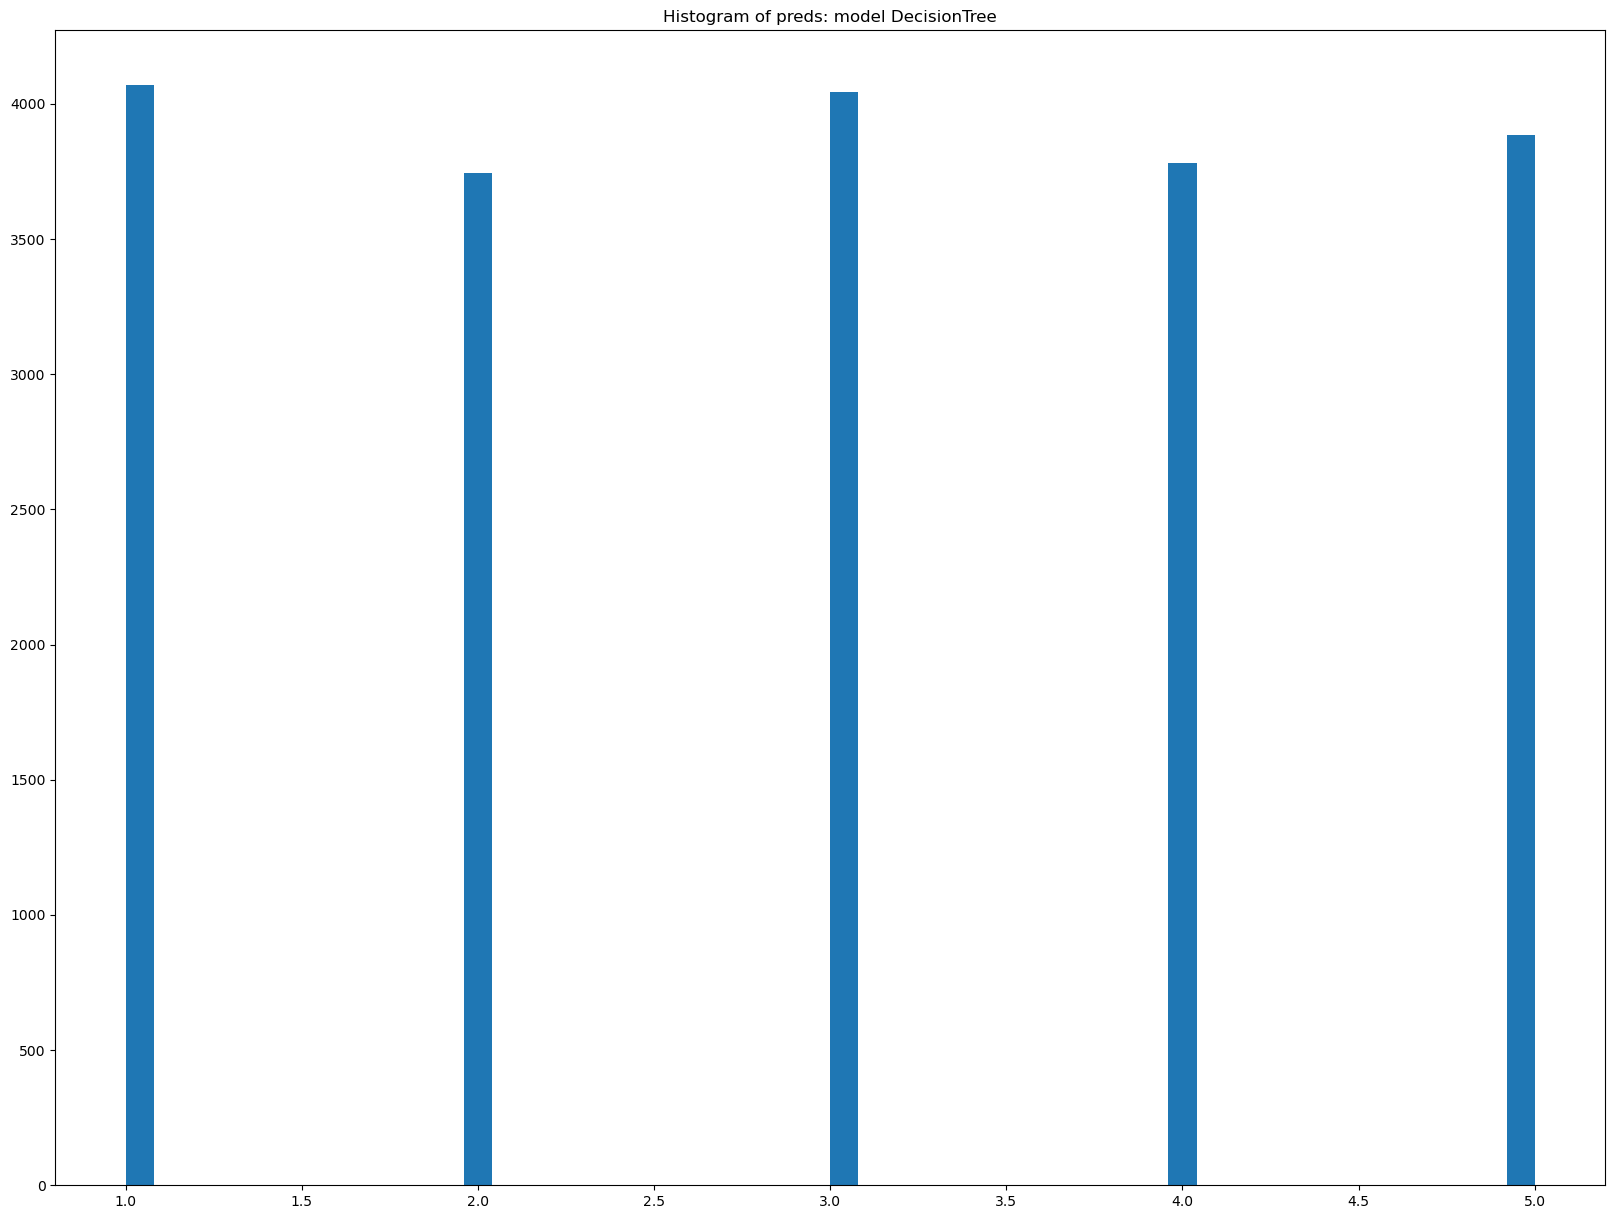

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9652
The Recall is:  0.9652
The F1 score is:  0.9652
The Matthews correlation coefficient is:  0.9565

This is the Confusion Matrix
      0     1     2     3     4
0  4032    18    10     9     4
1    14  3576    17    52    93
2    10    11  3926    69    28
3     8    30    70  3588    38
4     5   108    22    63  3723
model_number: 87
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


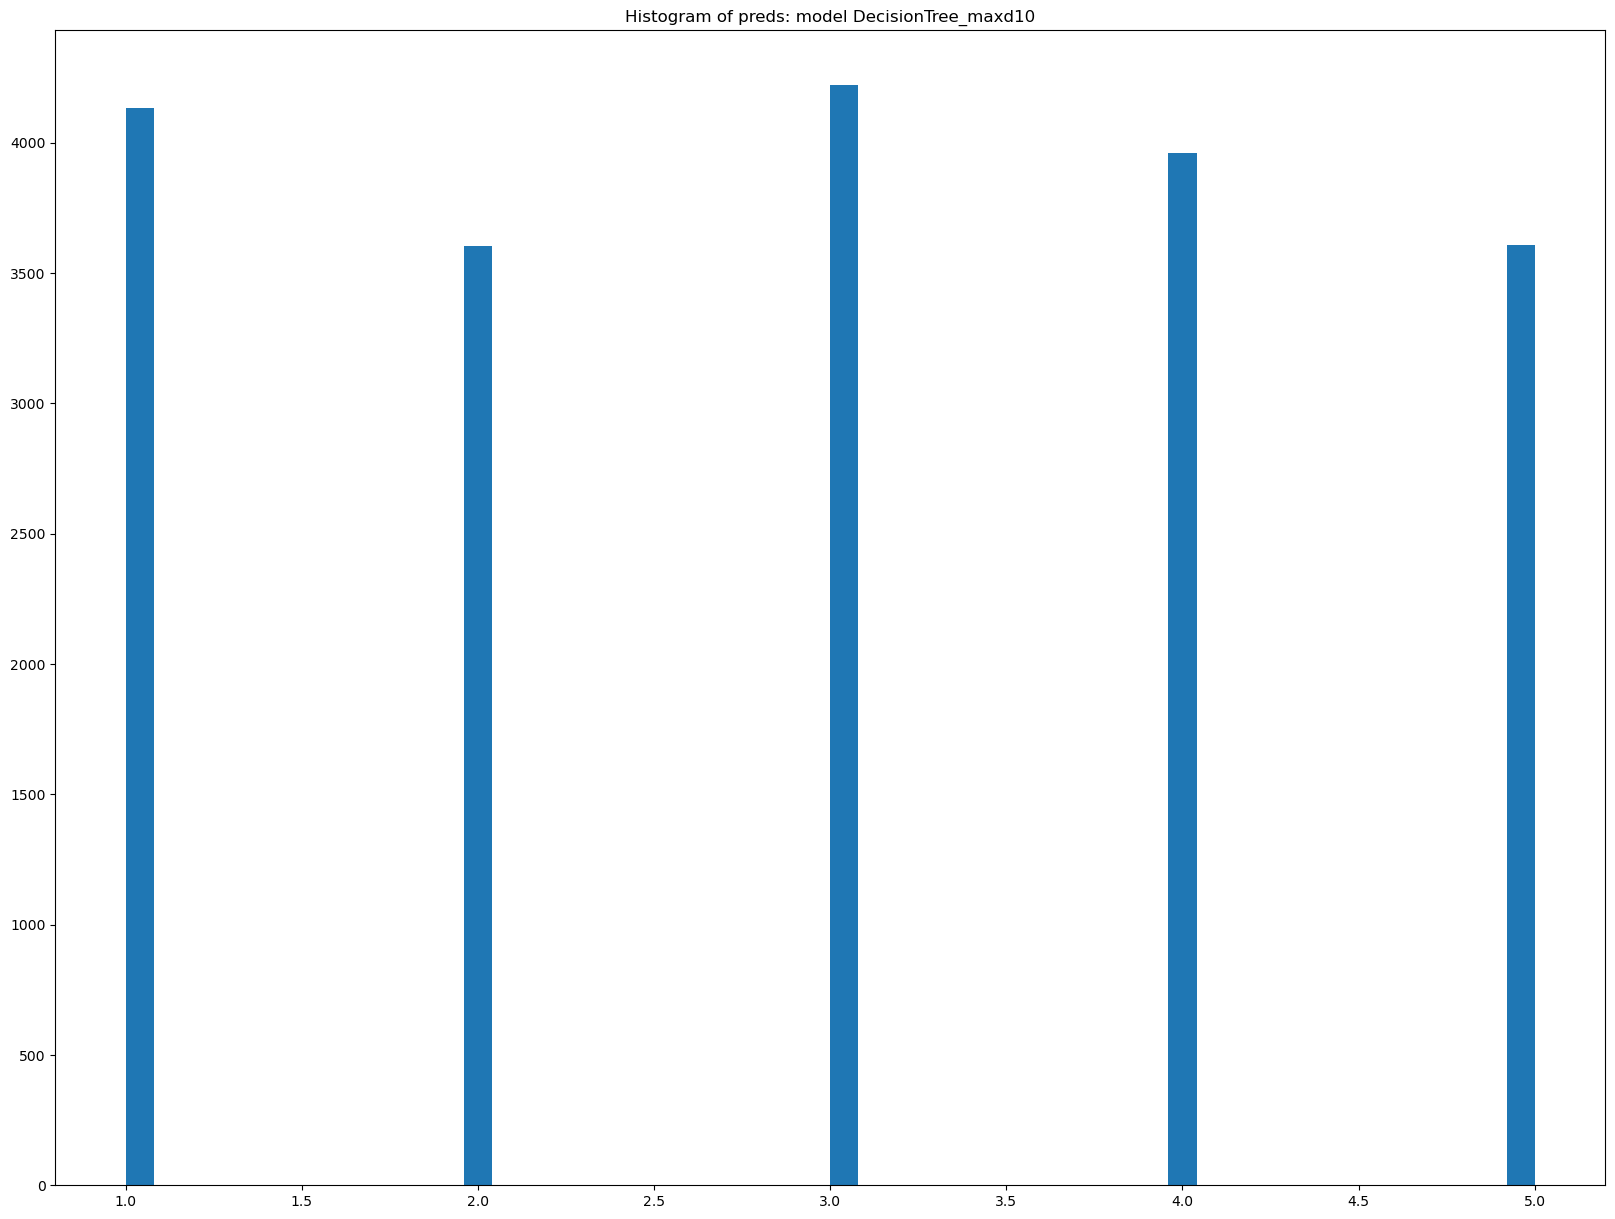

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.9000
The Recall is:  0.8985
The F1 score is:  0.8987
The Matthews correlation coefficient is:  0.8734

This is the Confusion Matrix
      0     1     2     3     4
0  3942    13    78    38     2
1    23  3413    32   138   146
2    62     6  3673   232    71
3    34    20   312  3247   121
4    71   151   126   305  3268
model_number: 88
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


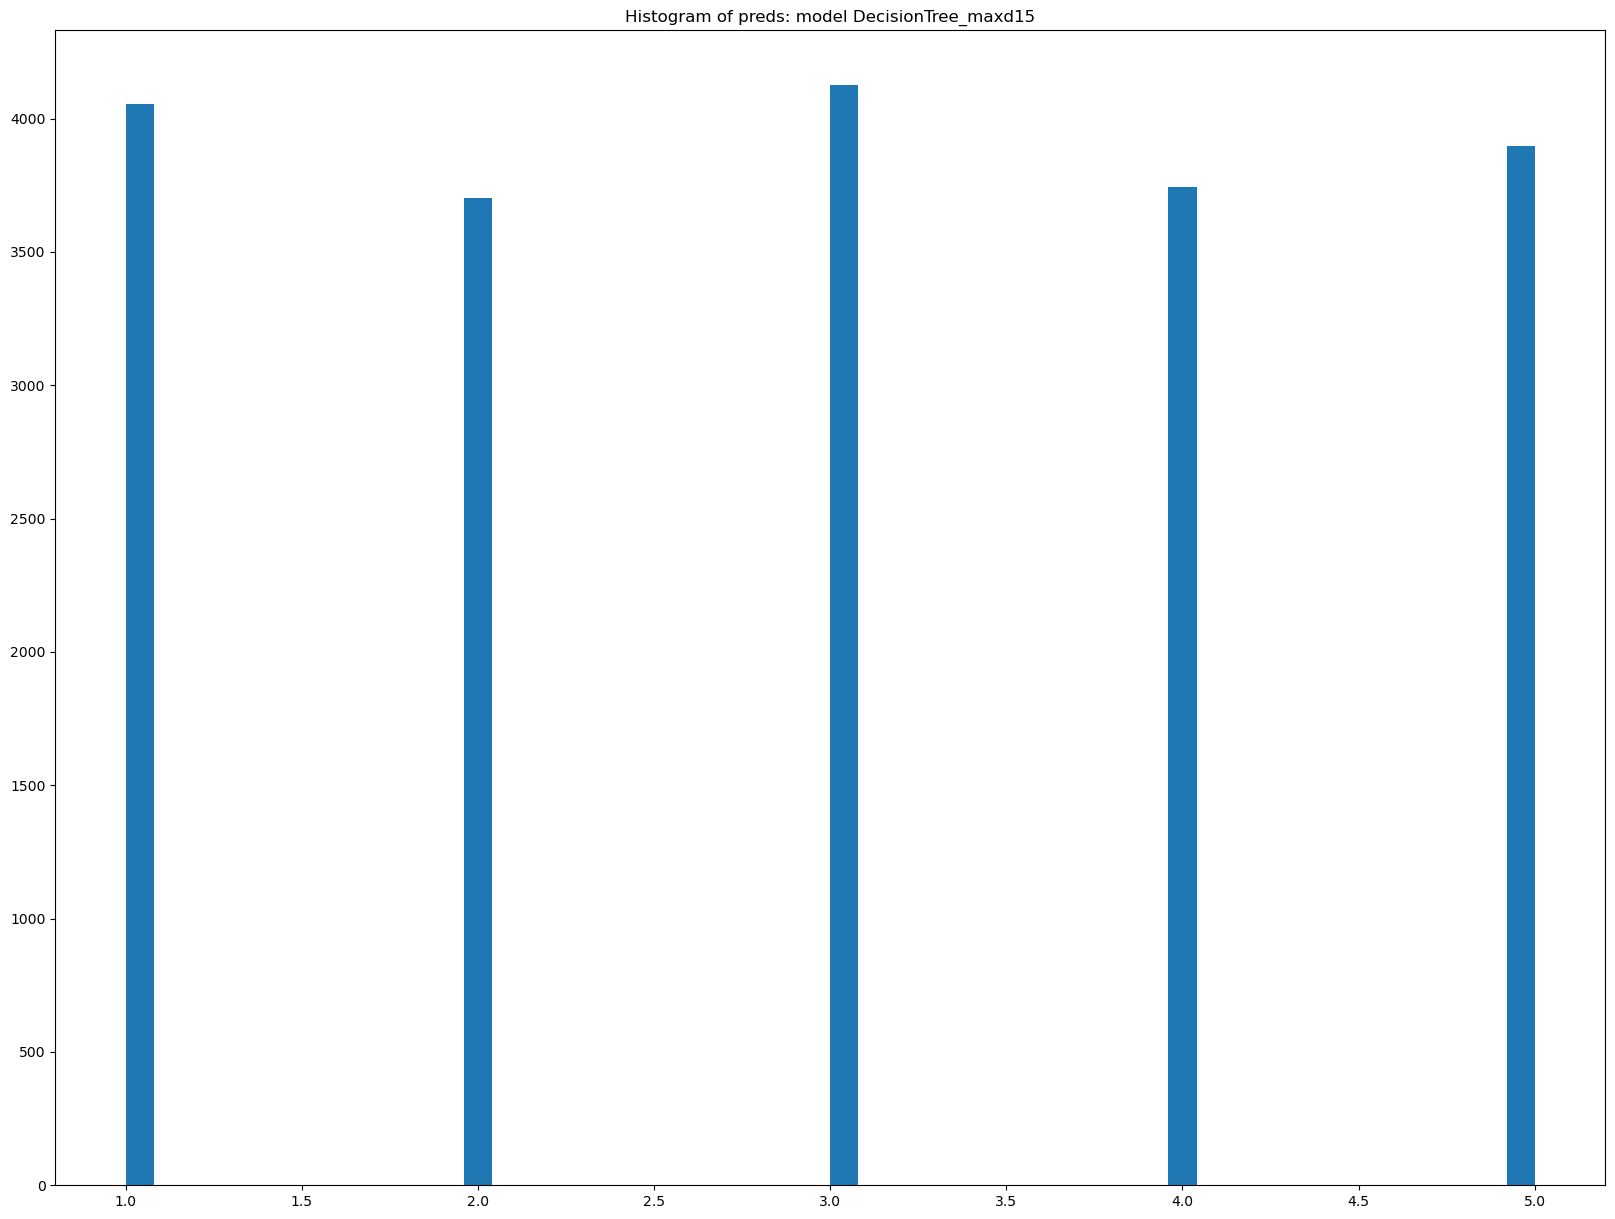

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.9544
The Recall is:  0.9544
The F1 score is:  0.9544
The Matthews correlation coefficient is:  0.9429

This is the Confusion Matrix
      0     1     2     3     4
0  4006    15    39     9     4
1    14  3545    16    54   123
2    15     6  3899    84    40
3    10    24   130  3511    59
4     9   112    41    87  3672
model_number: 89
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


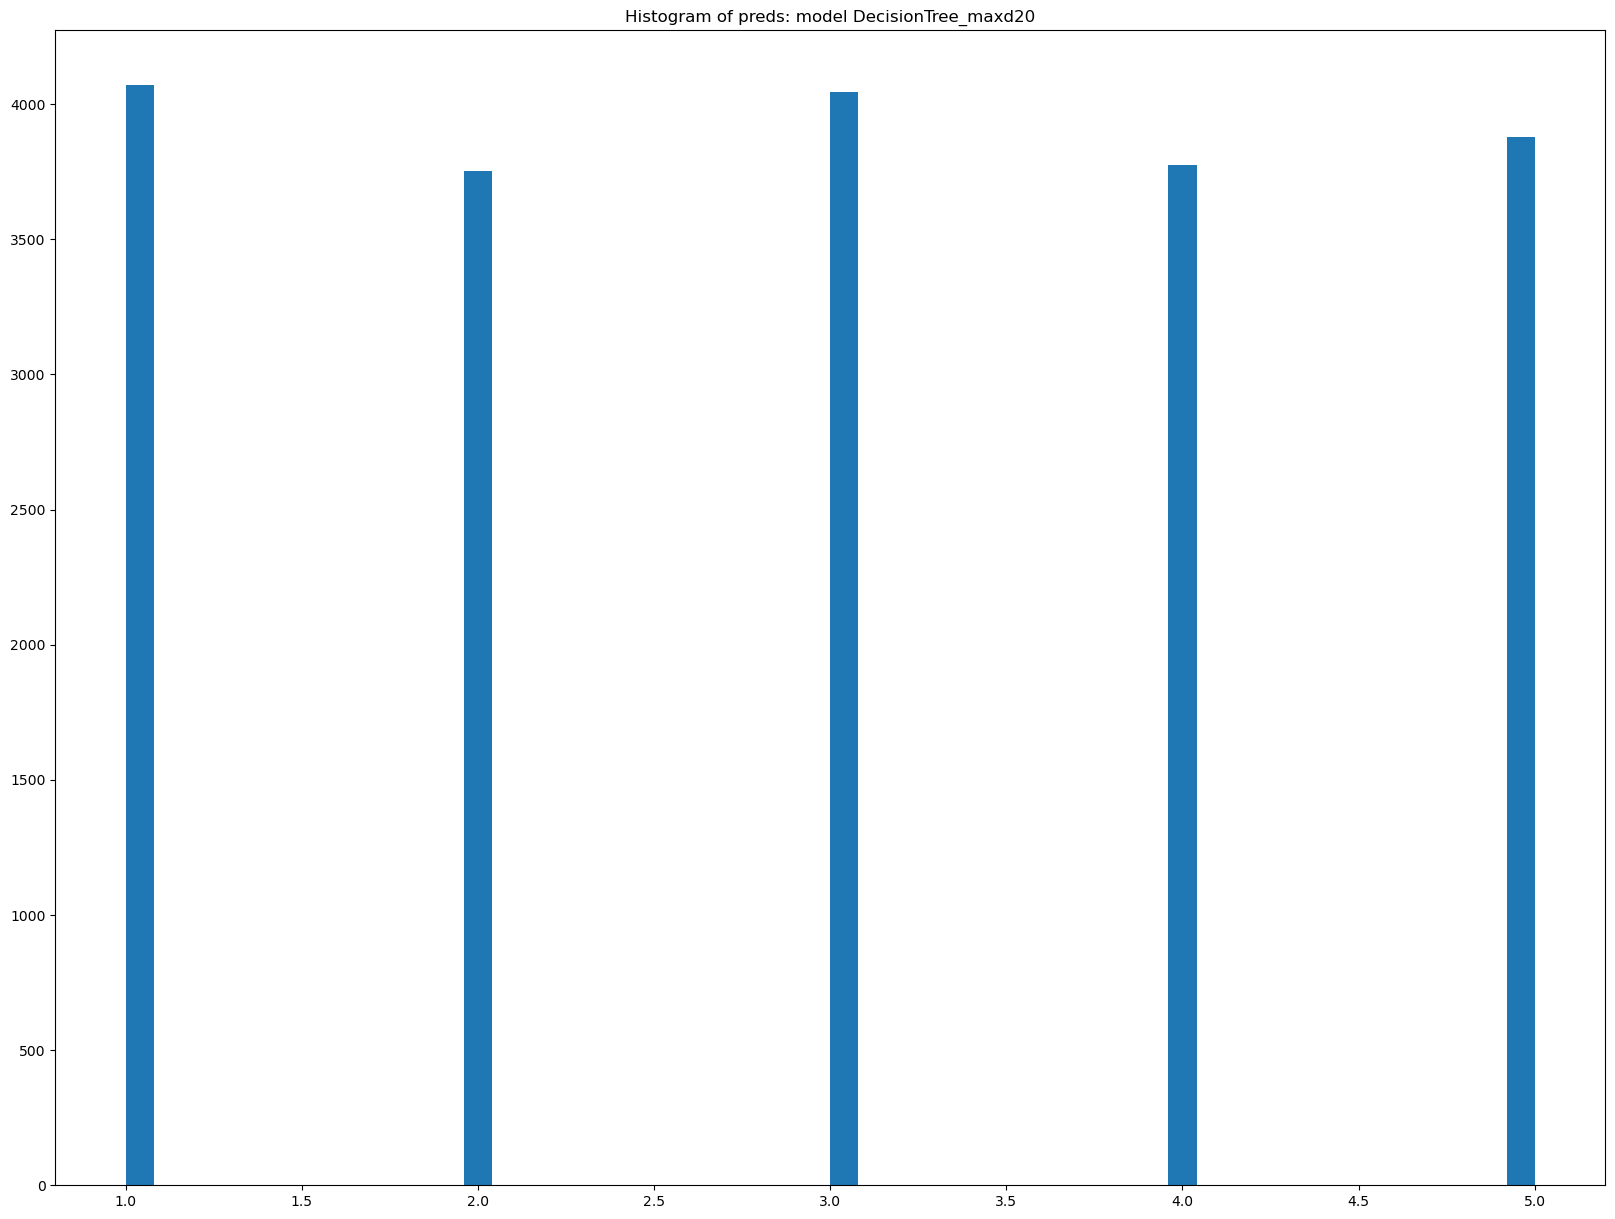

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9640
The Recall is:  0.9640
The F1 score is:  0.9640
The Matthews correlation coefficient is:  0.9550

This is the Confusion Matrix
      0     1     2     3     4
0  4031    17    12     9     4
1    17  3586    15    49    85
2    12     5  3926    73    28
3     7    29    76  3569    53
4     3   116    17    76  3709
model_number: 90
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


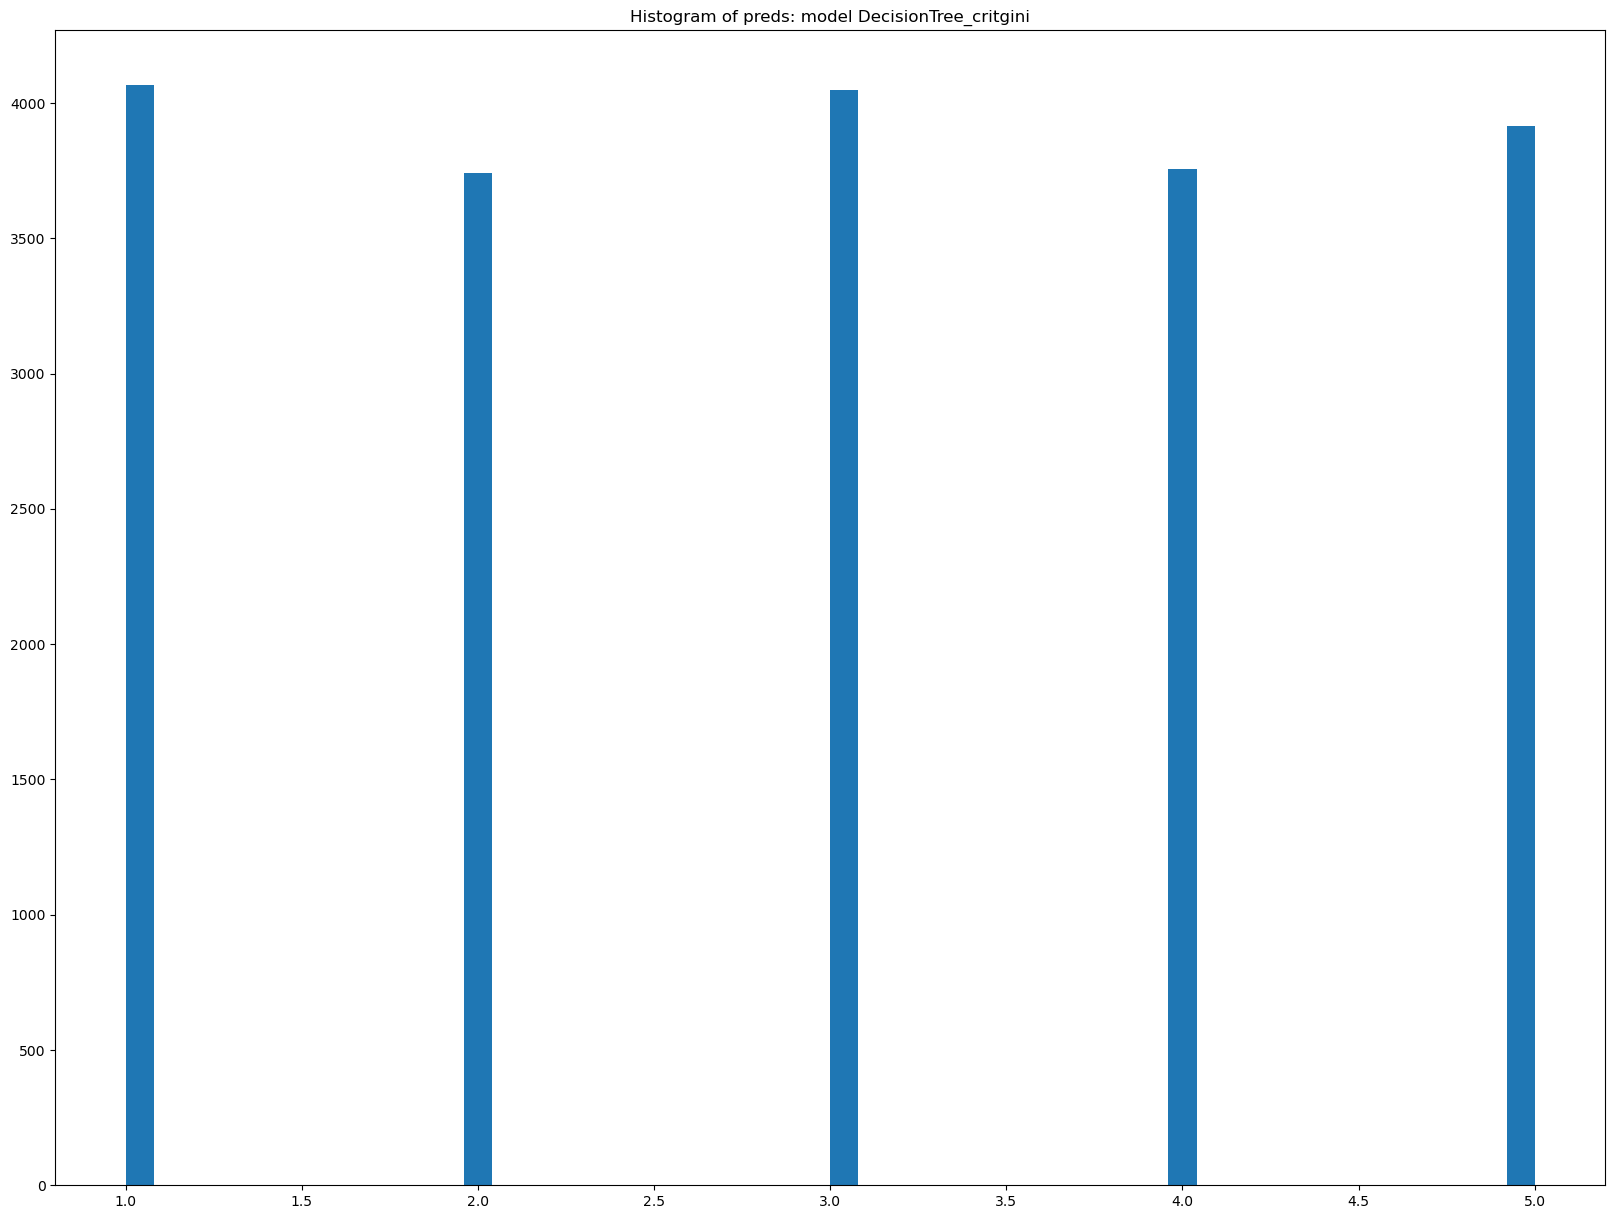

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9657
The Recall is:  0.9657
The F1 score is:  0.9657
The Matthews correlation coefficient is:  0.9572

This is the Confusion Matrix
      0     1     2     3     4
0  4036    19     9     6     3
1    10  3578    13    46   105
2     9    15  3932    66    22
3     7    25    69  3579    54
4     4   105    24    58  3730
model_number: 91
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


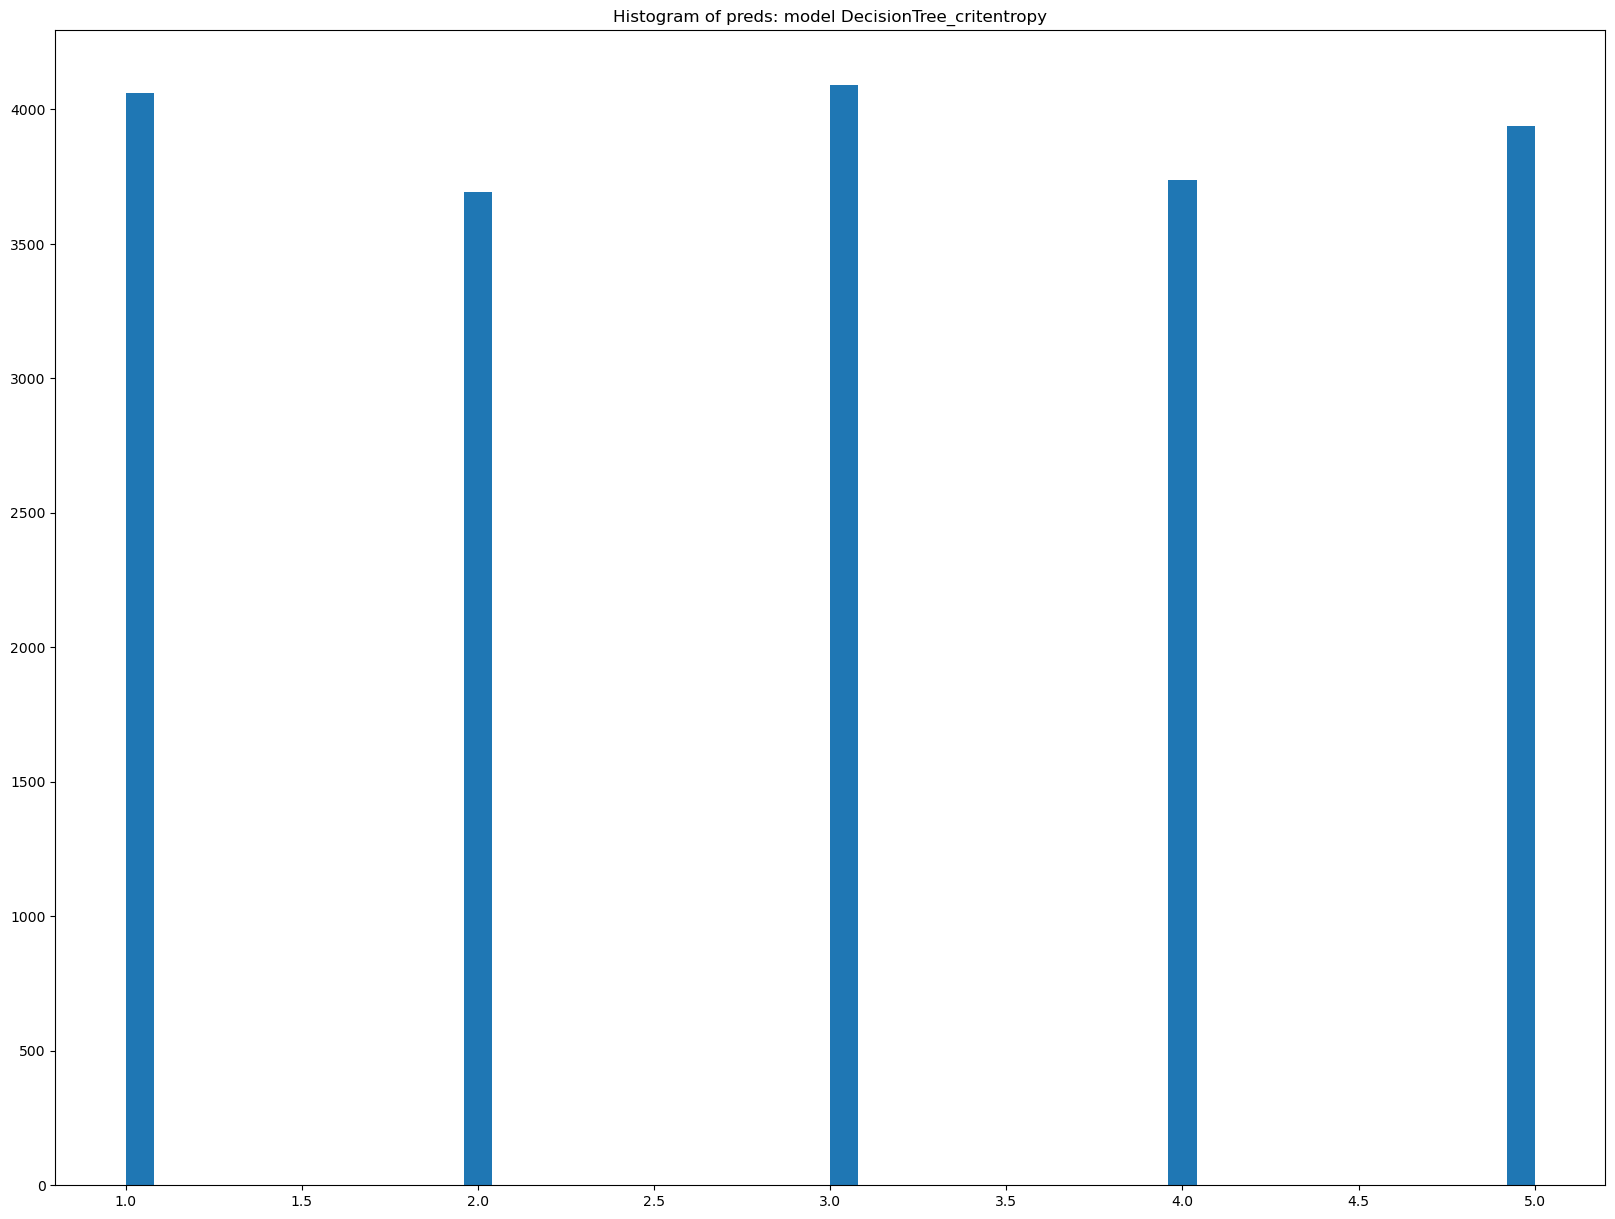

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9629
The Recall is:  0.9629
The F1 score is:  0.9629
The Matthews correlation coefficient is:  0.9536

This is the Confusion Matrix
      0     1     2     3     4
0  4035    13    15     6     4
1    10  3571    18    32   121
2     8     1  3917    92    26
3     5    16   102  3549    62
4     5    93    38    58  3727
model_number: 92
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: GaussianNB GaussianNB()


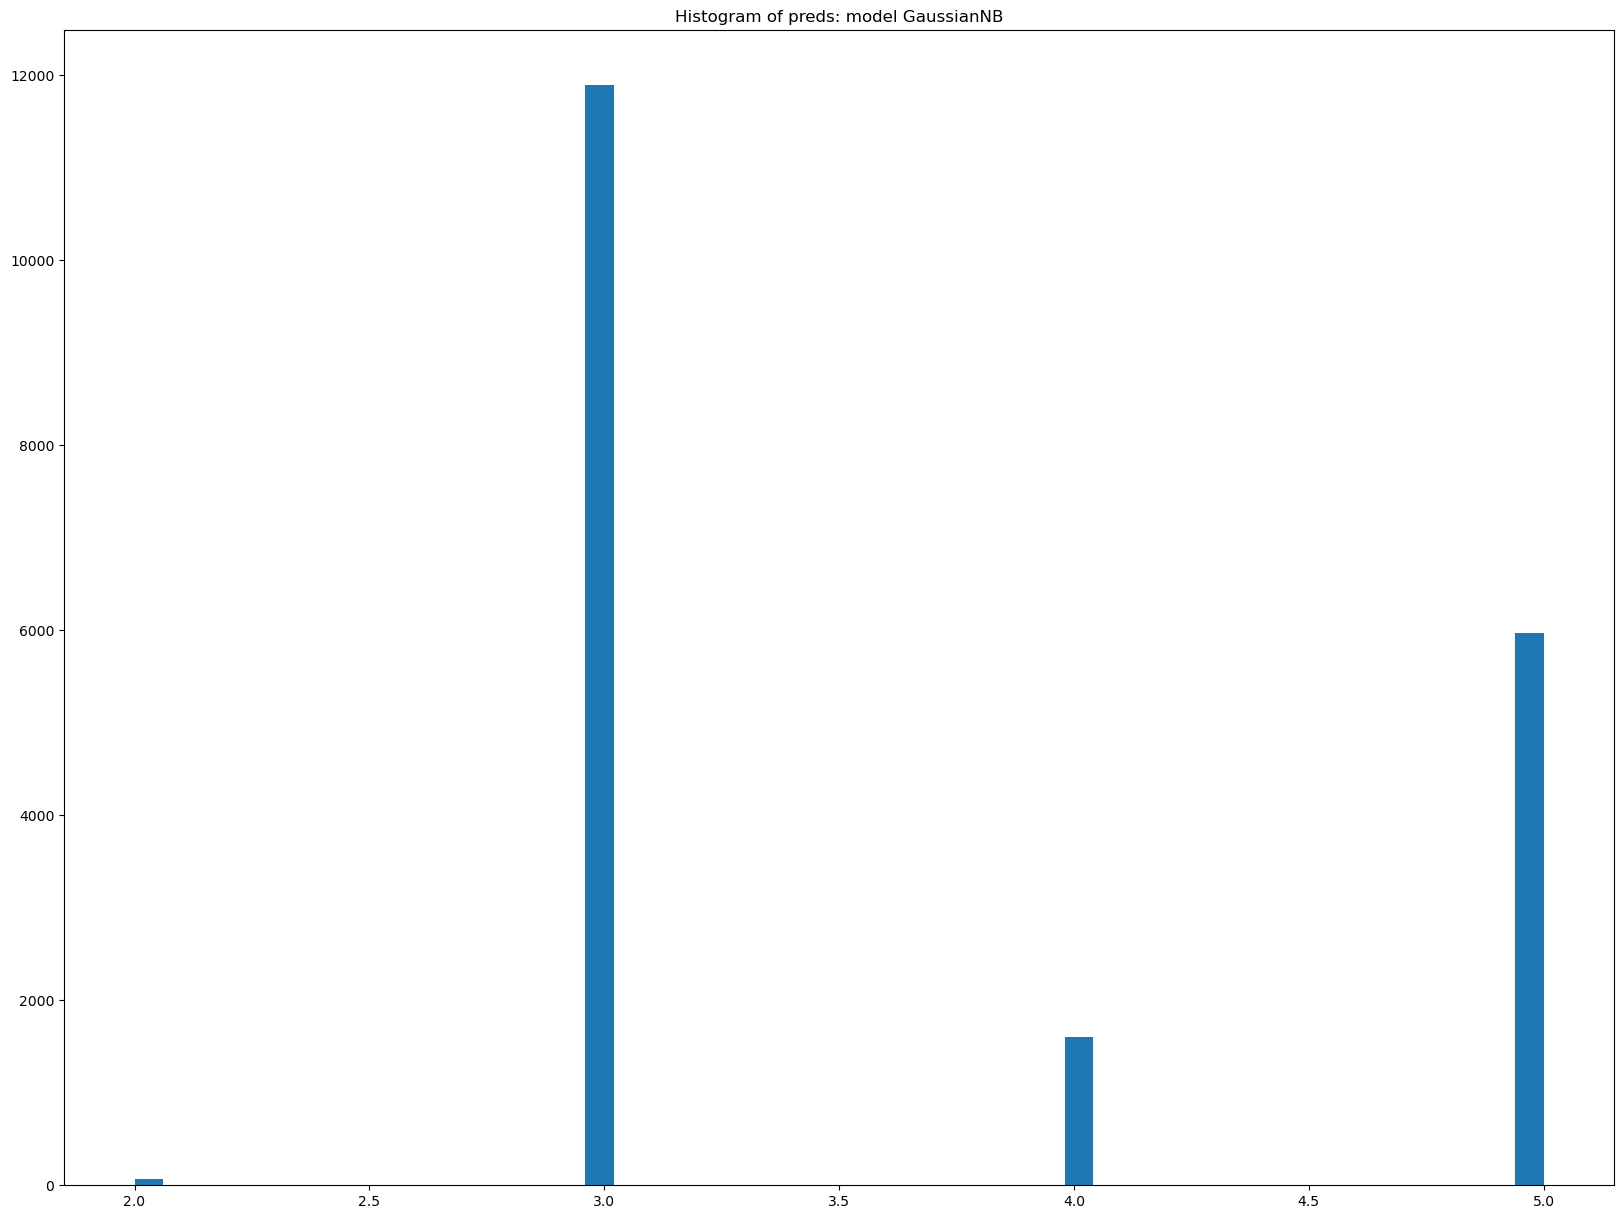

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: PowerTransformer() imputer: SimpleImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.4173
The Recall is:  0.3717
The F1 score is:  0.2573
The Matthews correlation coefficient is:  0.2581

This is the Confusion Matrix
   0   1     2    3     4
0  0   0  4058    0    15
1  0  65   102  254  3331
2  0   0  4024   20     0
3  0   0  3155  563    16
4  0   0   555  761  2605
model_number: 93
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


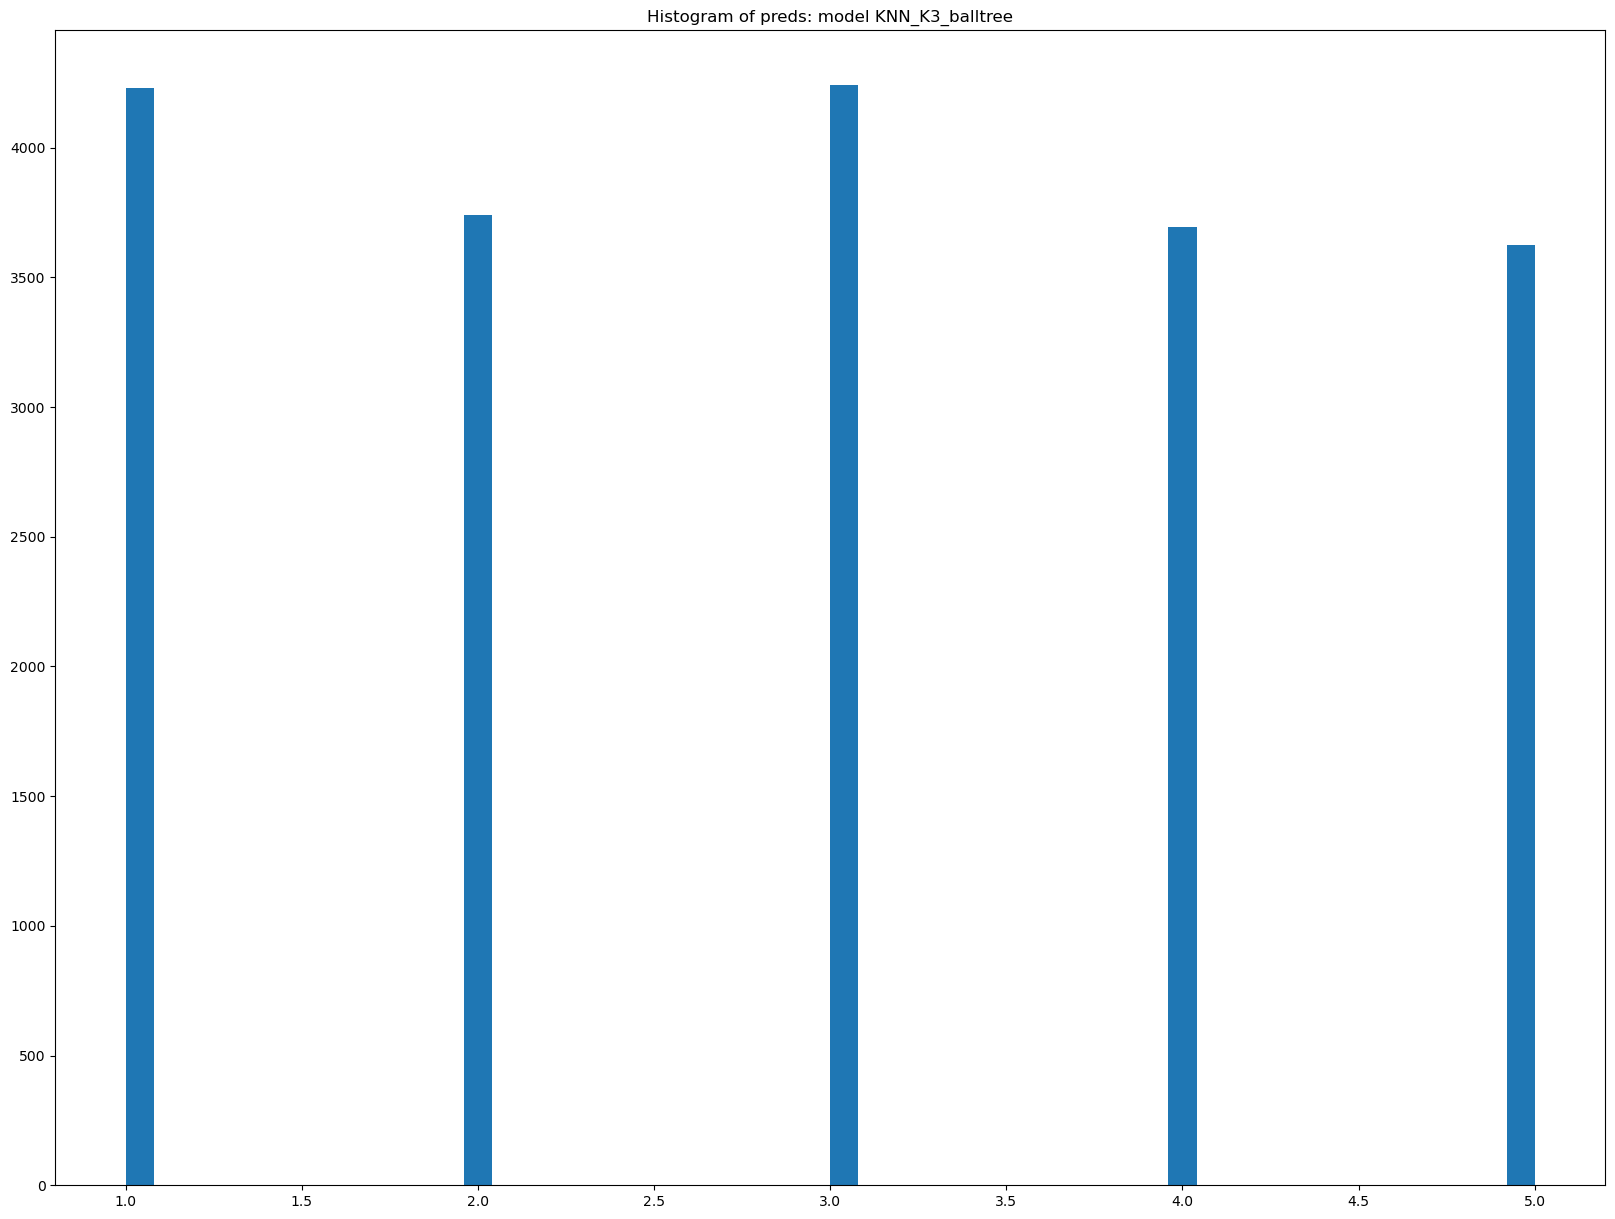

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9498
The Recall is:  0.9491
The F1 score is:  0.9490
The Matthews correlation coefficient is:  0.9366

This is the Confusion Matrix
      0     1     2     3     4
0  4052    15     6     0     0
1    26  3526    38    92    70
2    65     1  3915    62     1
3    31    10   204  3487     2
4    54   187    77    52  3551
model_number: 94
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


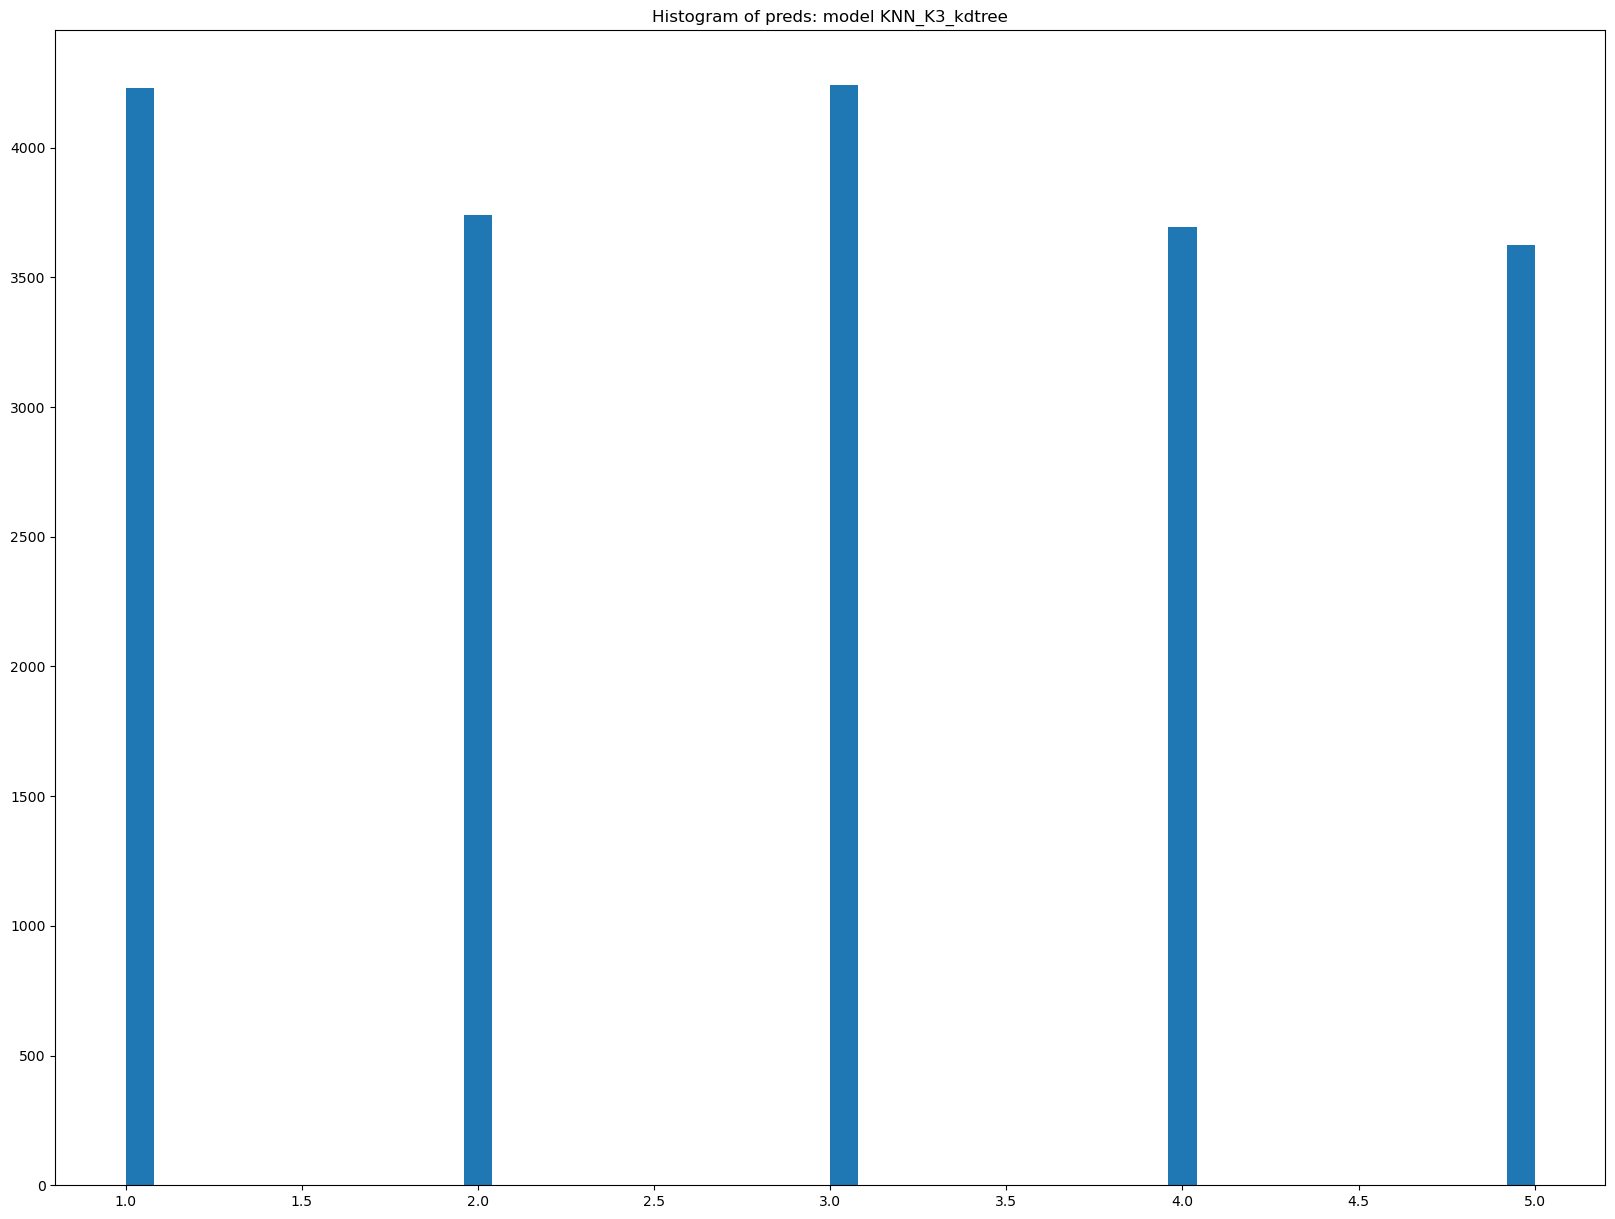

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9498
The Recall is:  0.9491
The F1 score is:  0.9490
The Matthews correlation coefficient is:  0.9366

This is the Confusion Matrix
      0     1     2     3     4
0  4052    15     6     0     0
1    26  3526    38    92    70
2    65     1  3915    62     1
3    31    10   204  3487     2
4    54   187    77    52  3551
model_number: 95
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


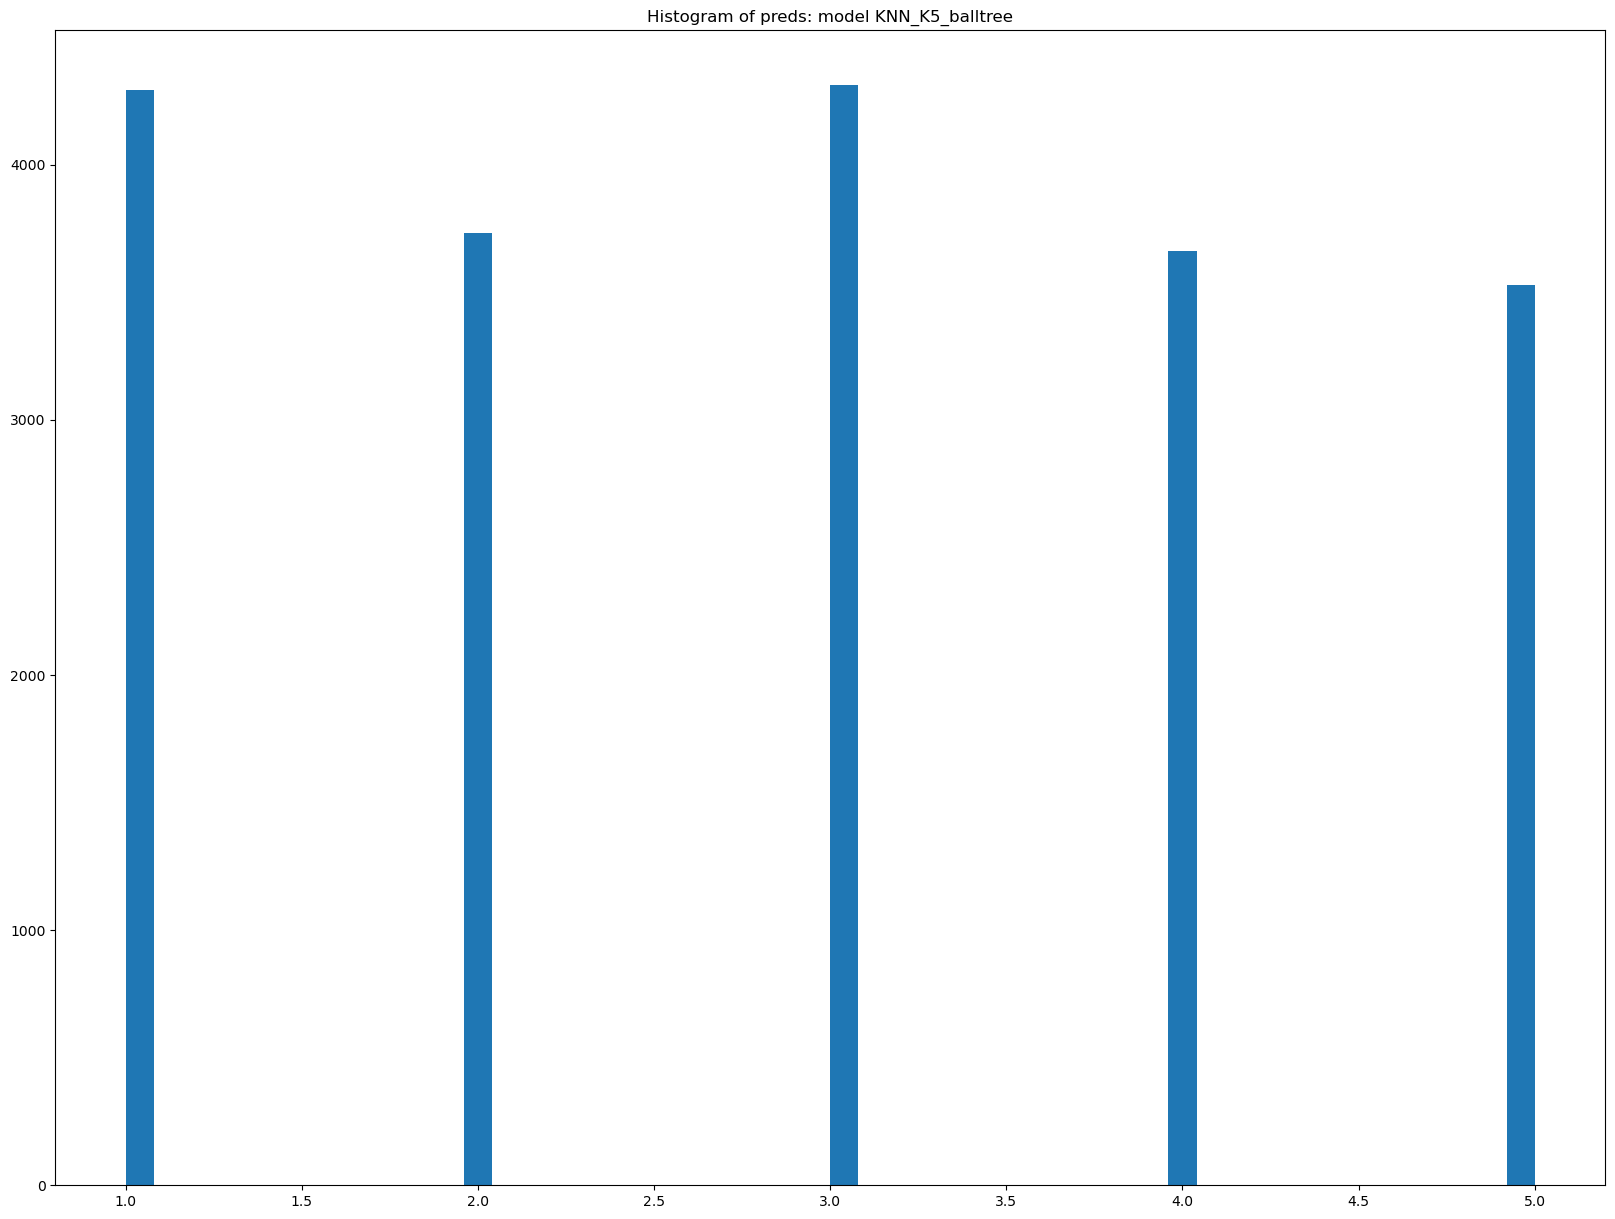

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9406
The Recall is:  0.9393
The F1 score is:  0.9391
The Matthews correlation coefficient is:  0.9245

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    29  3511    52    98    62
2    86     1  3892    65     0
3    35     9   270  3418     2
4    87   195    93    82  3464
model_number: 96
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


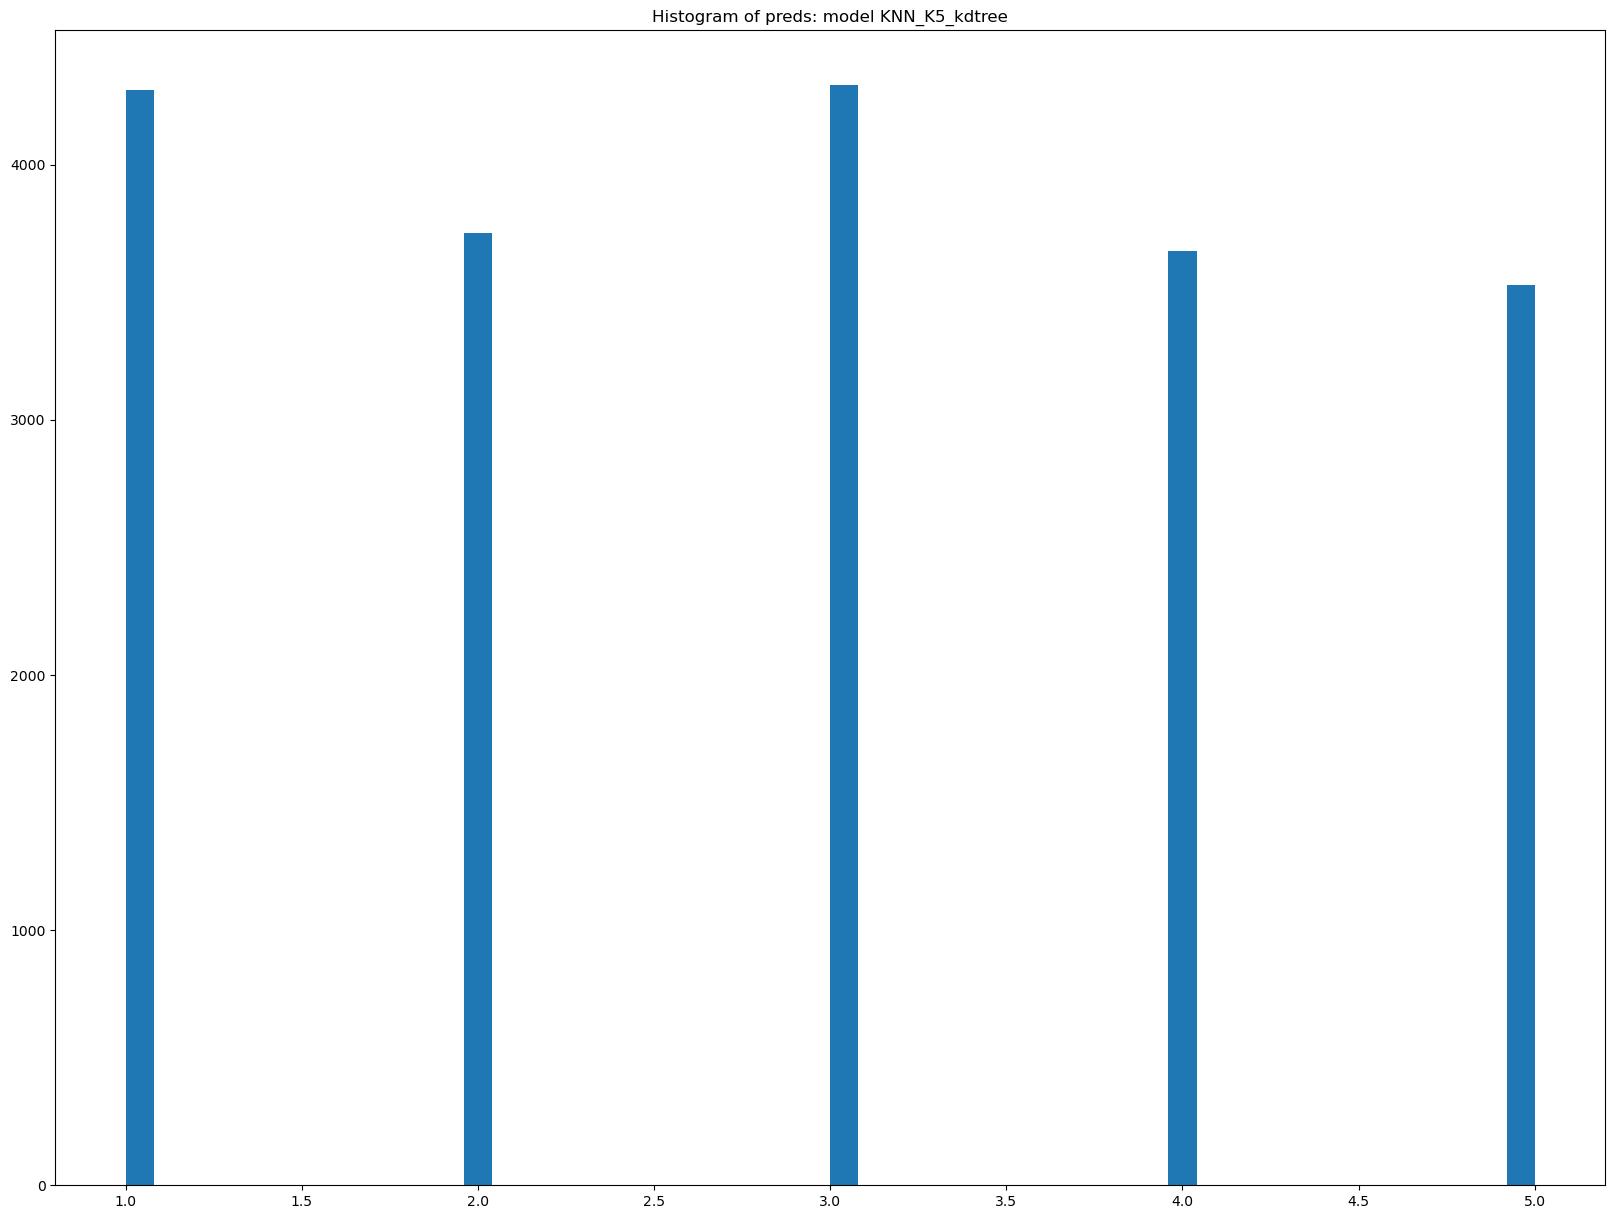

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9406
The Recall is:  0.9393
The F1 score is:  0.9391
The Matthews correlation coefficient is:  0.9245

This is the Confusion Matrix
      0     1     2     3     4
0  4054    15     4     0     0
1    29  3511    52    98    62
2    86     1  3892    65     0
3    35     9   270  3418     2
4    87   195    93    82  3464
model_number: 97
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


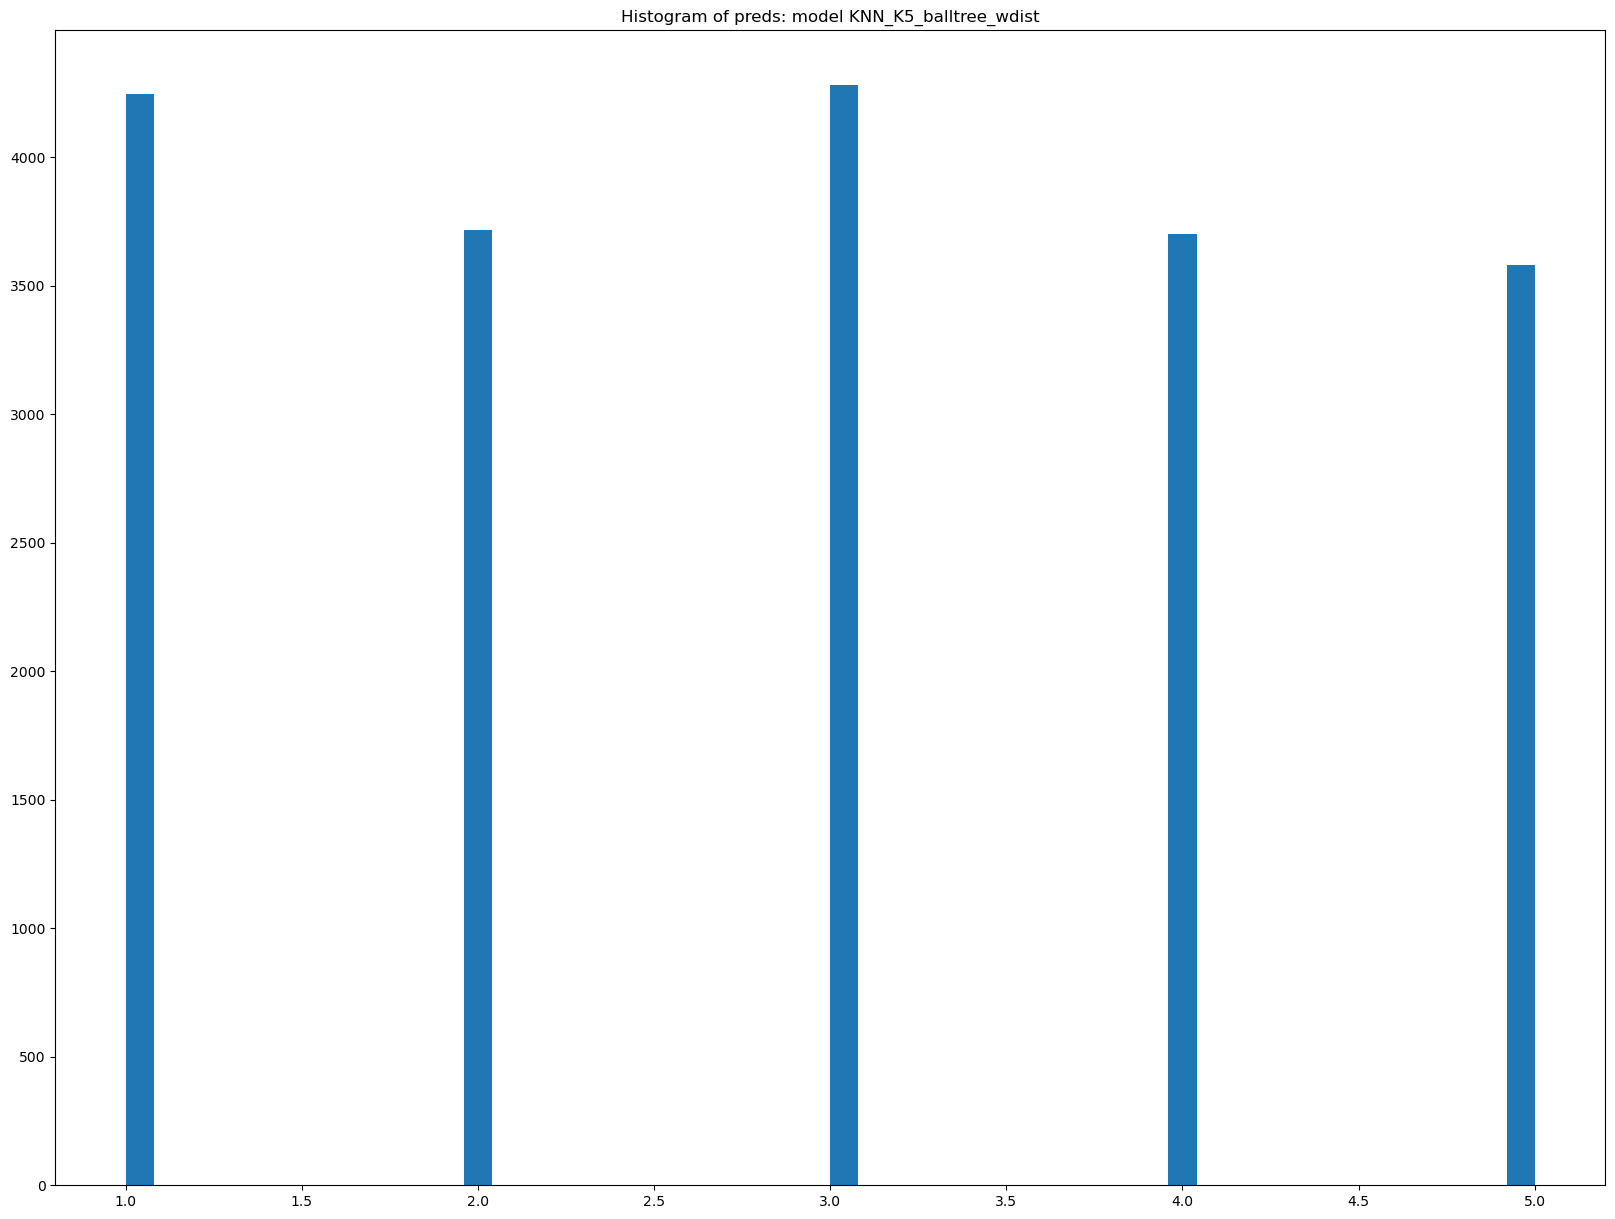

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9455
The Recall is:  0.9445
The F1 score is:  0.9444
The Matthews correlation coefficient is:  0.9309

This is the Confusion Matrix
      0     1     2     3     4
0  4053    15     5     0     0
1    25  3510    50   101    66
2    72     0  3904    68     0
3    27     5   238  3462     2
4    69   187    83    70  3512
model_number: 98
Scaler: PowerTransformer PowerTransformer() imputer: SimpleImp_missNAN_stmean SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


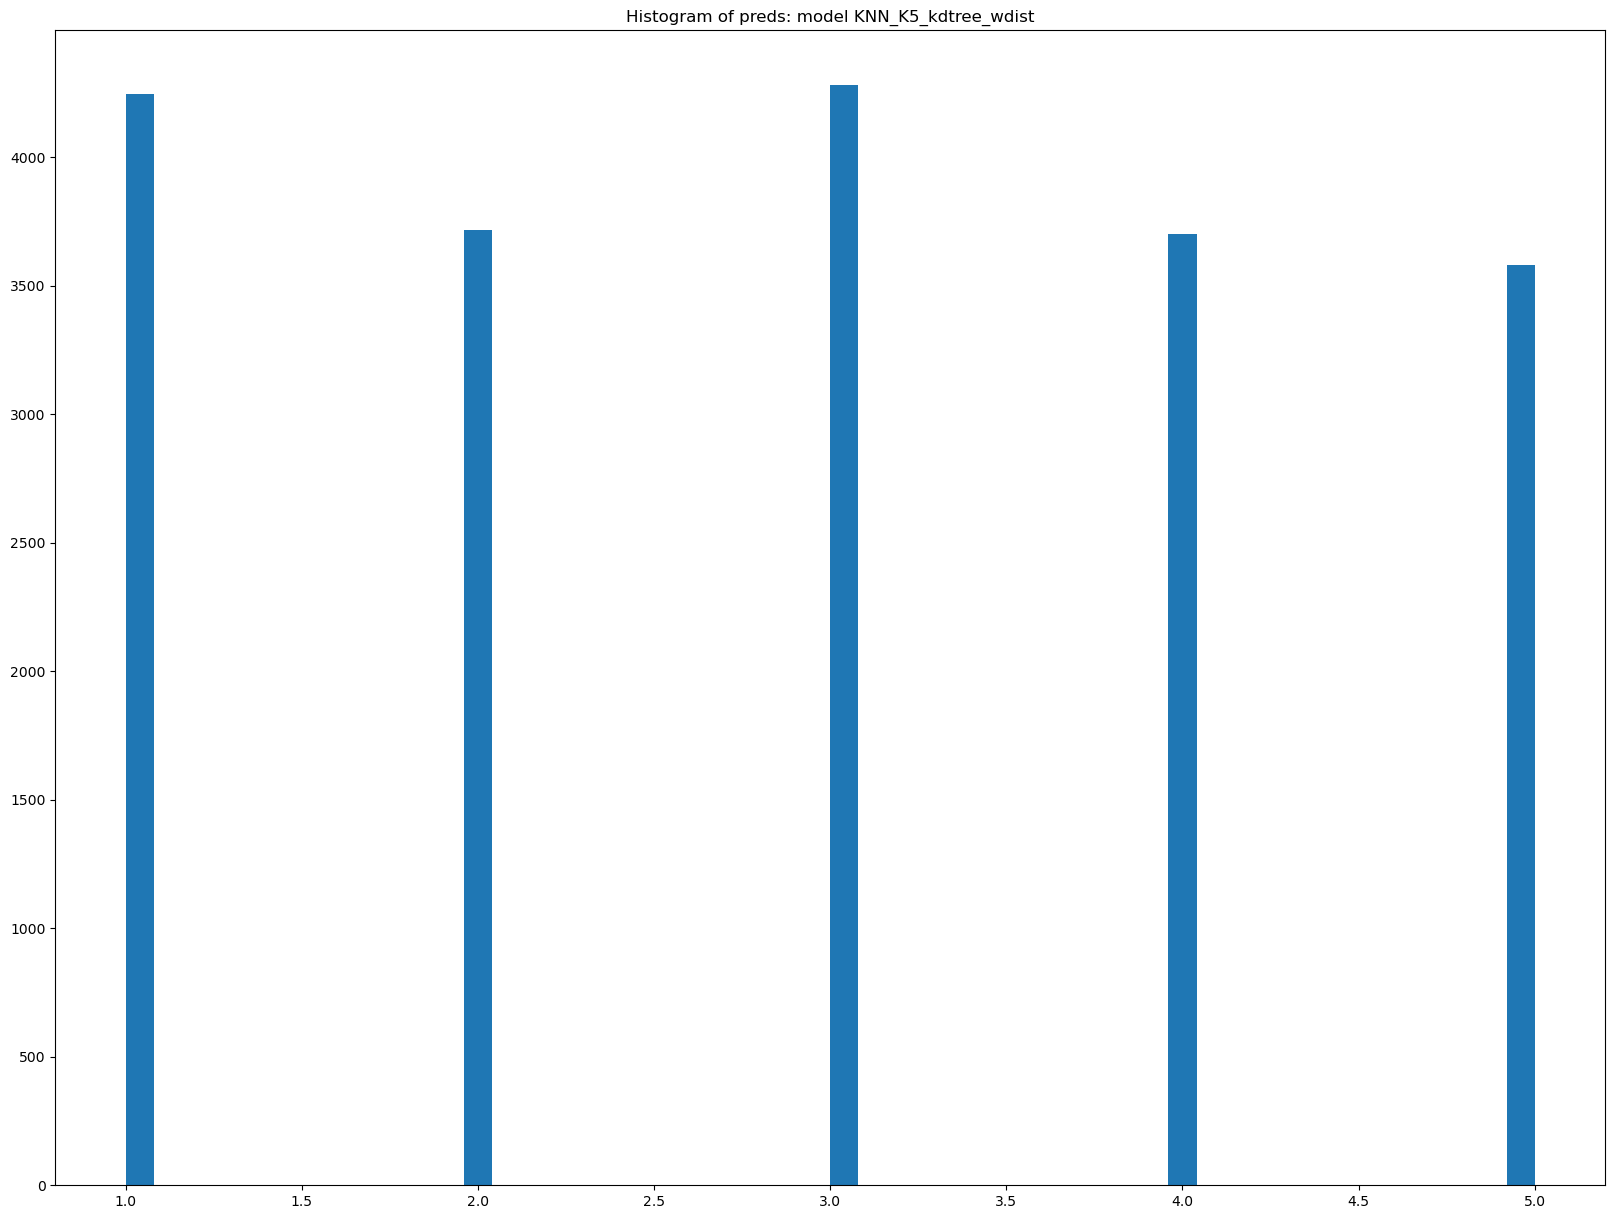

Scaler: PowerTransformer() imputer: SimpleImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9455
The Recall is:  0.9445
The F1 score is:  0.9444
The Matthews correlation coefficient is:  0.9309

This is the Confusion Matrix
      0     1     2     3     4
0  4053    15     5     0     0
1    25  3510    50   101    66
2    72     0  3904    68     0
3    27     5   238  3462     2
4    69   187    83    70  3512
model_number: 99
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: RandomForest RandomForestClassifier()


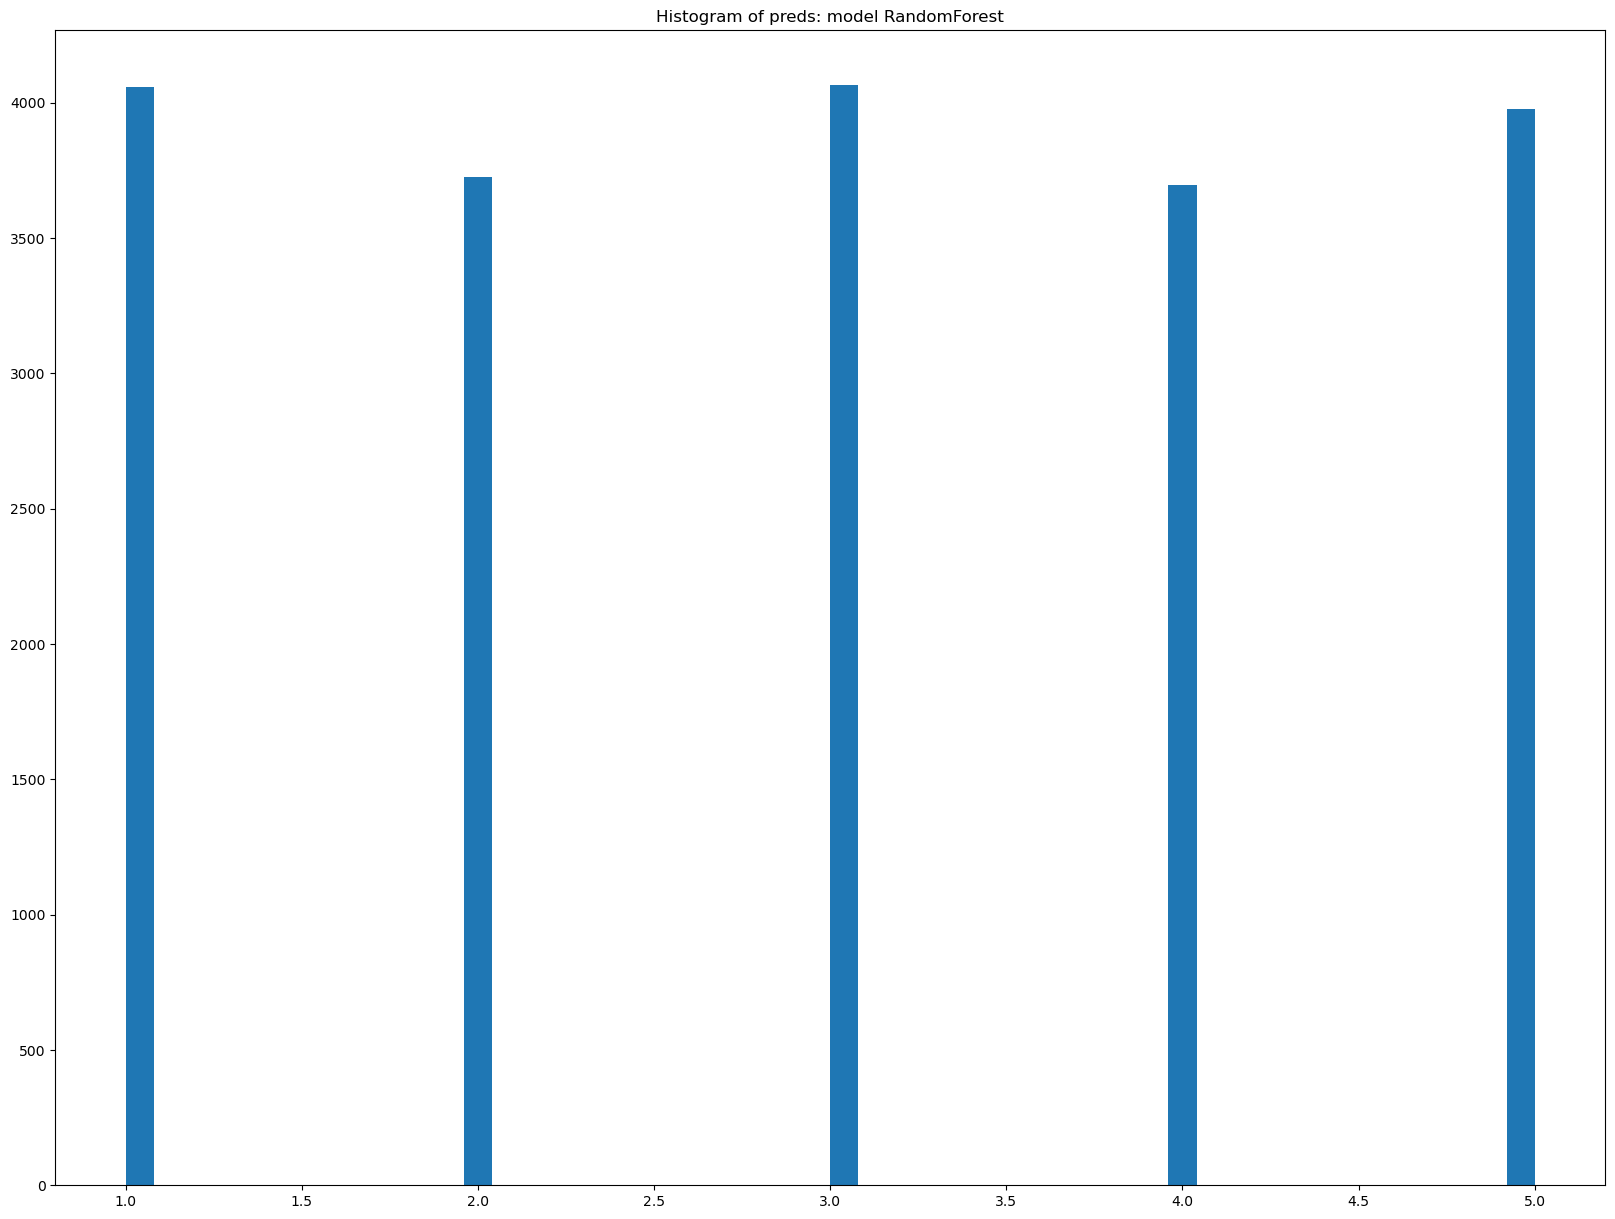

Scaler: PowerTransformer() imputer: KNNImputer() classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9848
The Recall is:  0.9848
The F1 score is:  0.9848
The Matthews correlation coefficient is:  0.9810

This is the Confusion Matrix
      0     1     2     3     4
0  4043    17    11     0     2
1     3  3656    22    29    42
2    12    10  3987    20    15
3     0    25    41  3645    23
4     0    17     4     4  3896
model_number: 100
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree DecisionTreeClassifier()


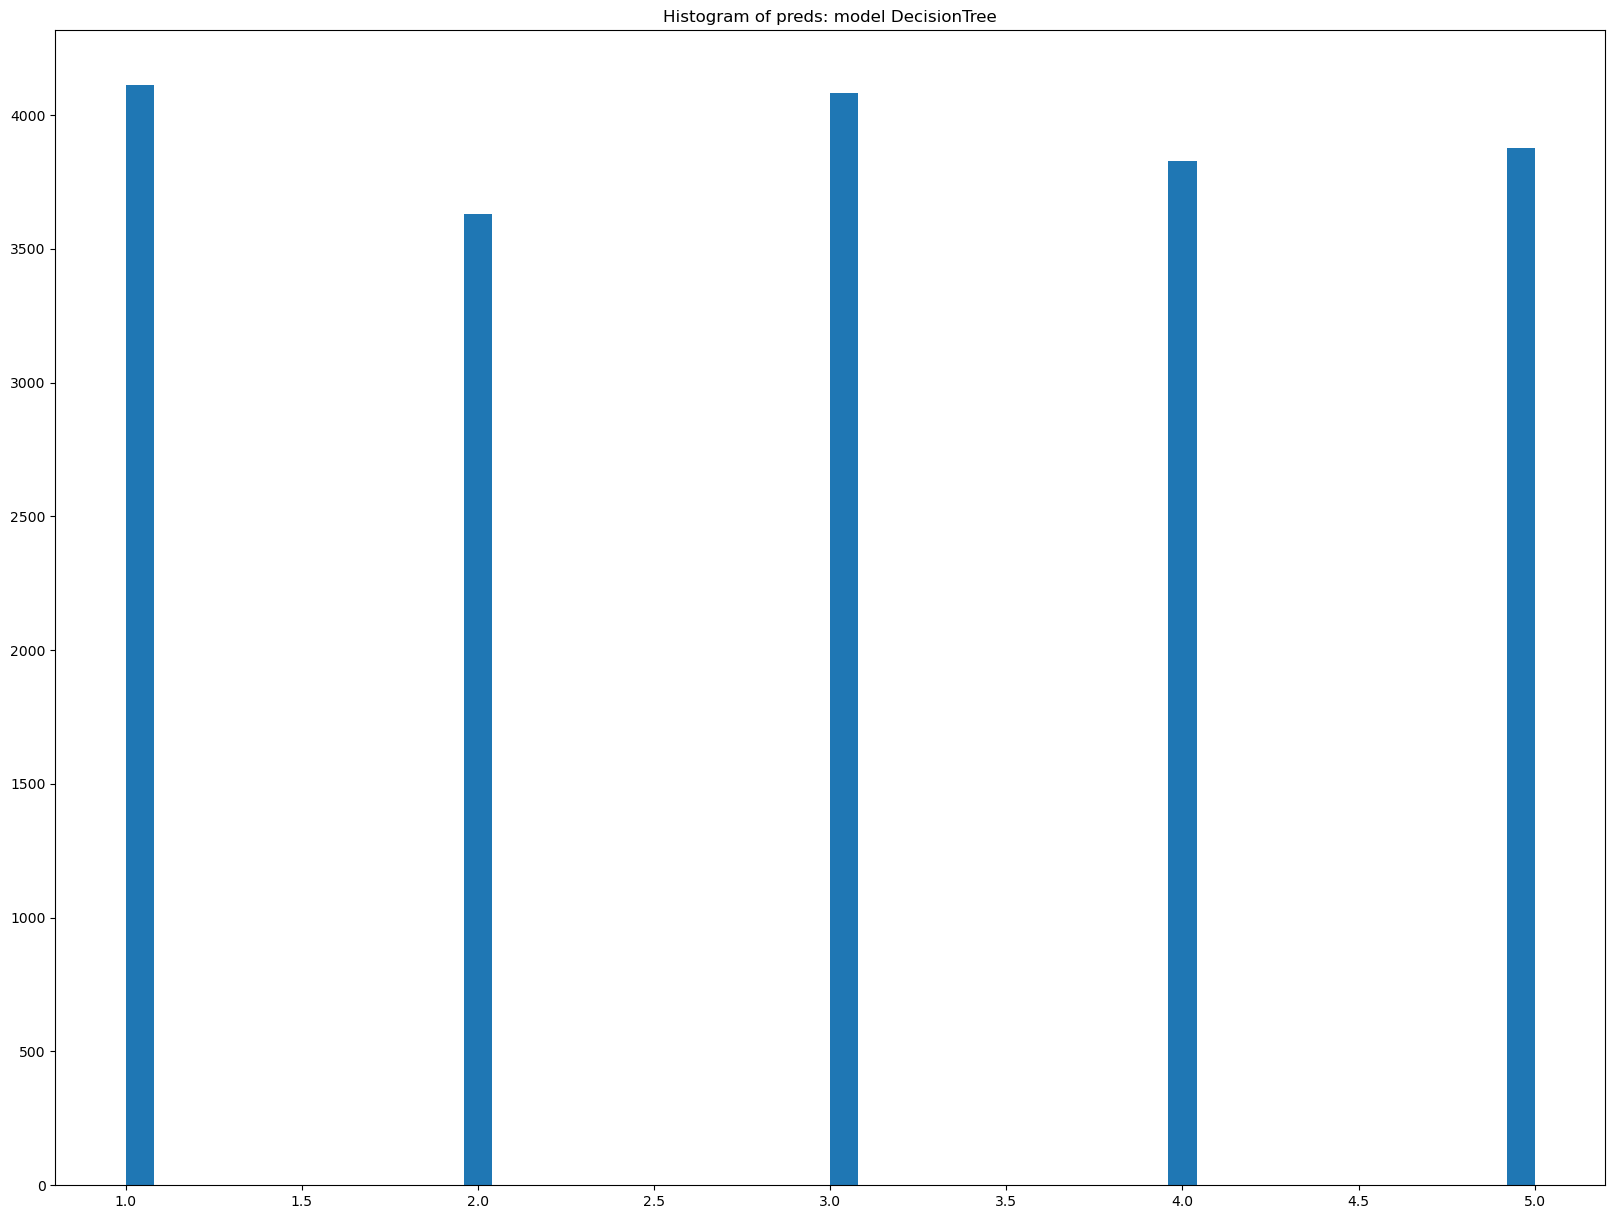

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.8988
The Recall is:  0.8987
The F1 score is:  0.8987
The Matthews correlation coefficient is:  0.8734

This is the Confusion Matrix
      0     1     2     3     4
0  3965    20    38    10    40
1    24  3254    74   188   212
2    47    55  3662   194    86
3    30   116   183  3267   138
4    45   184   125   168  3399
model_number: 101
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


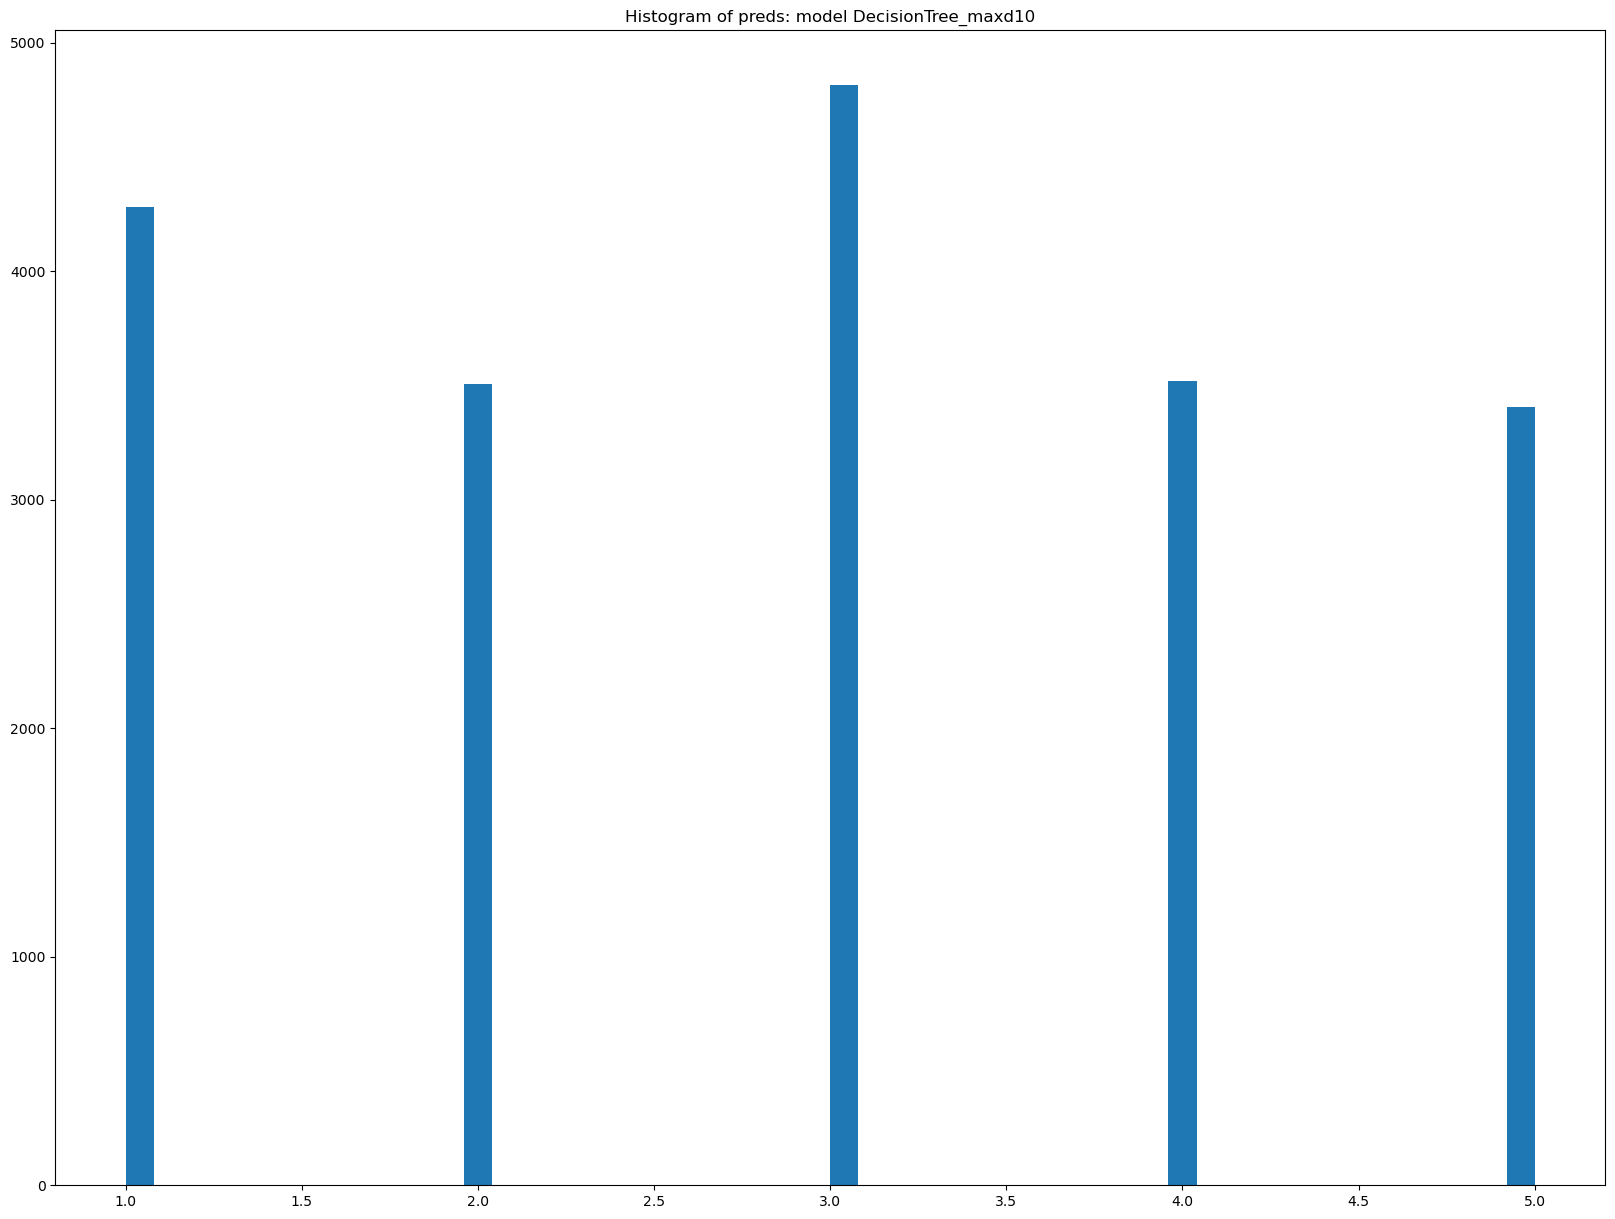

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8000
The Recall is:  0.7967
The F1 score is:  0.7959
The Matthews correlation coefficient is:  0.7468

This is the Confusion Matrix
      0     1     2     3     4
0  3723    41   189    34    86
1    90  2975   217   262   208
2   198    69  3412   222   143
3   117   181   558  2677   201
4   154   240   437   323  2767
model_number: 102
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


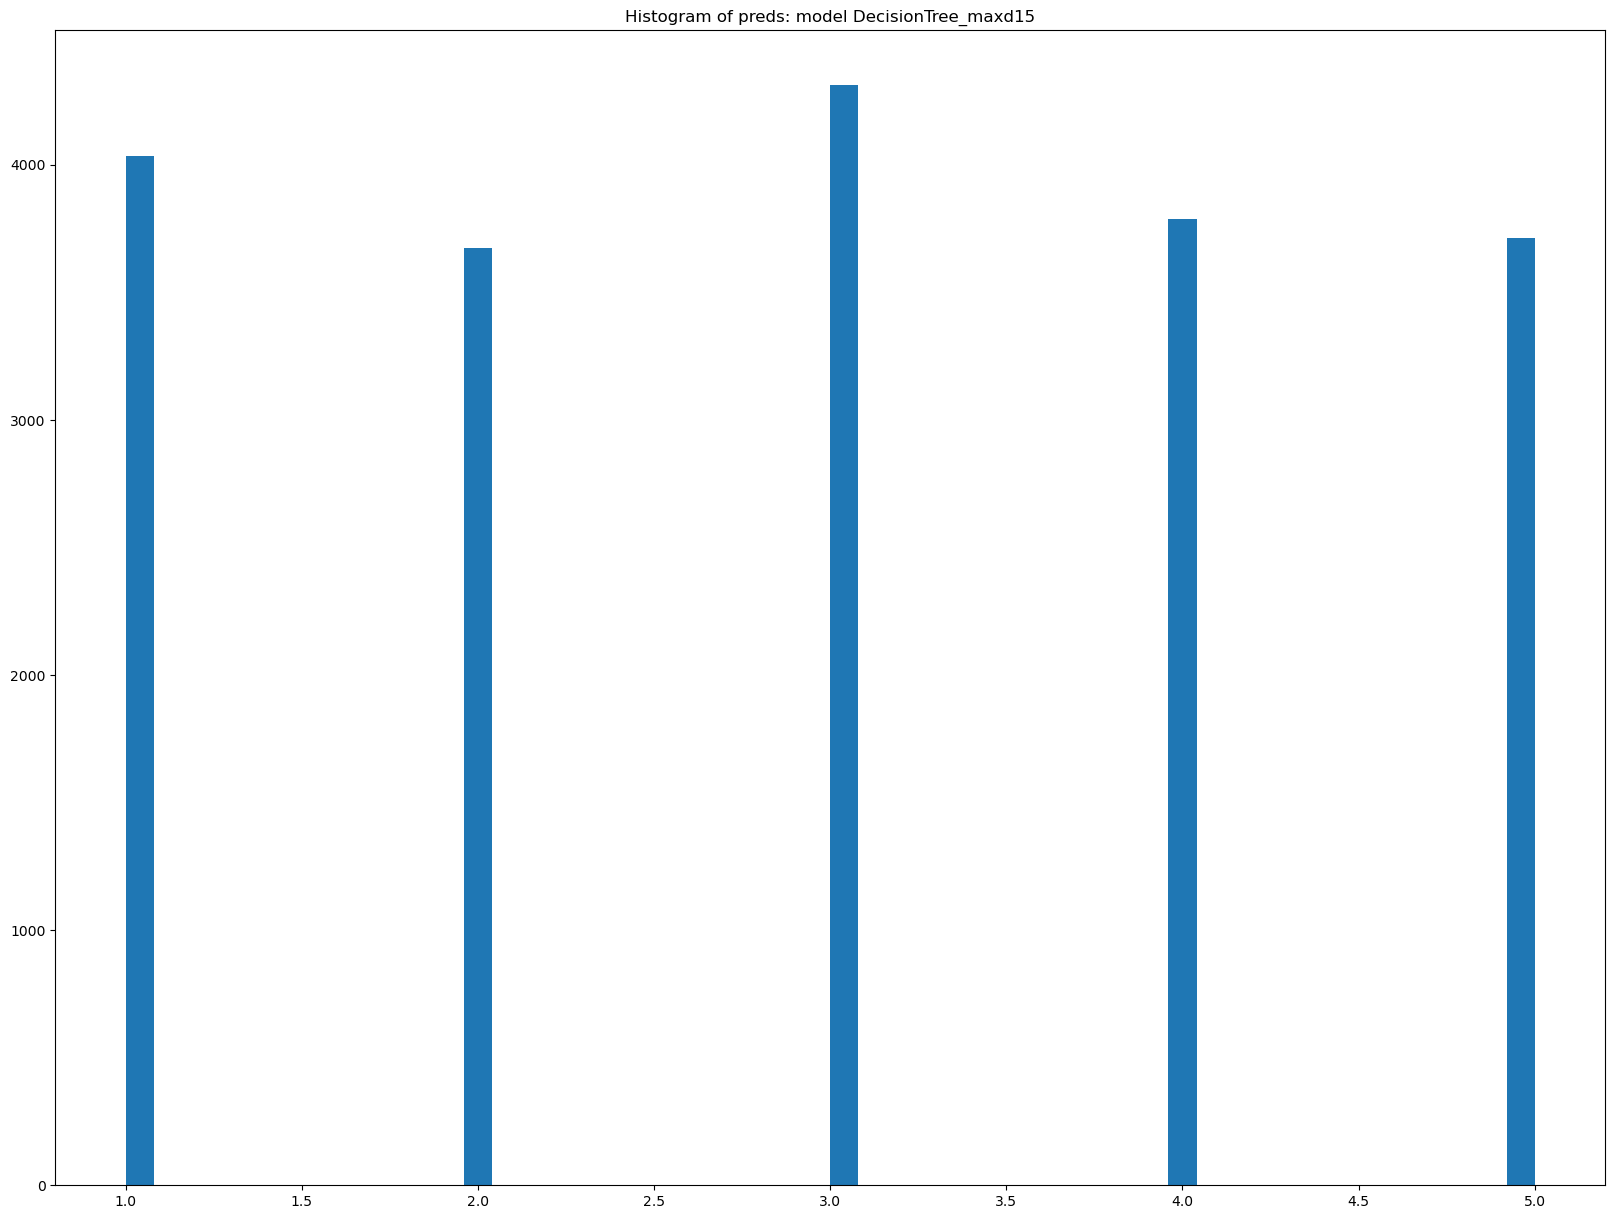

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8775
The Recall is:  0.8768
The F1 score is:  0.8768
The Matthews correlation coefficient is:  0.8461

This is the Confusion Matrix
      0     1     2     3     4
0  3886    20   102    16    49
1    22  3236   112   175   207
2    50    63  3614   223    94
3    30   131   254  3169   150
4    48   223   230   206  3214
model_number: 103
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


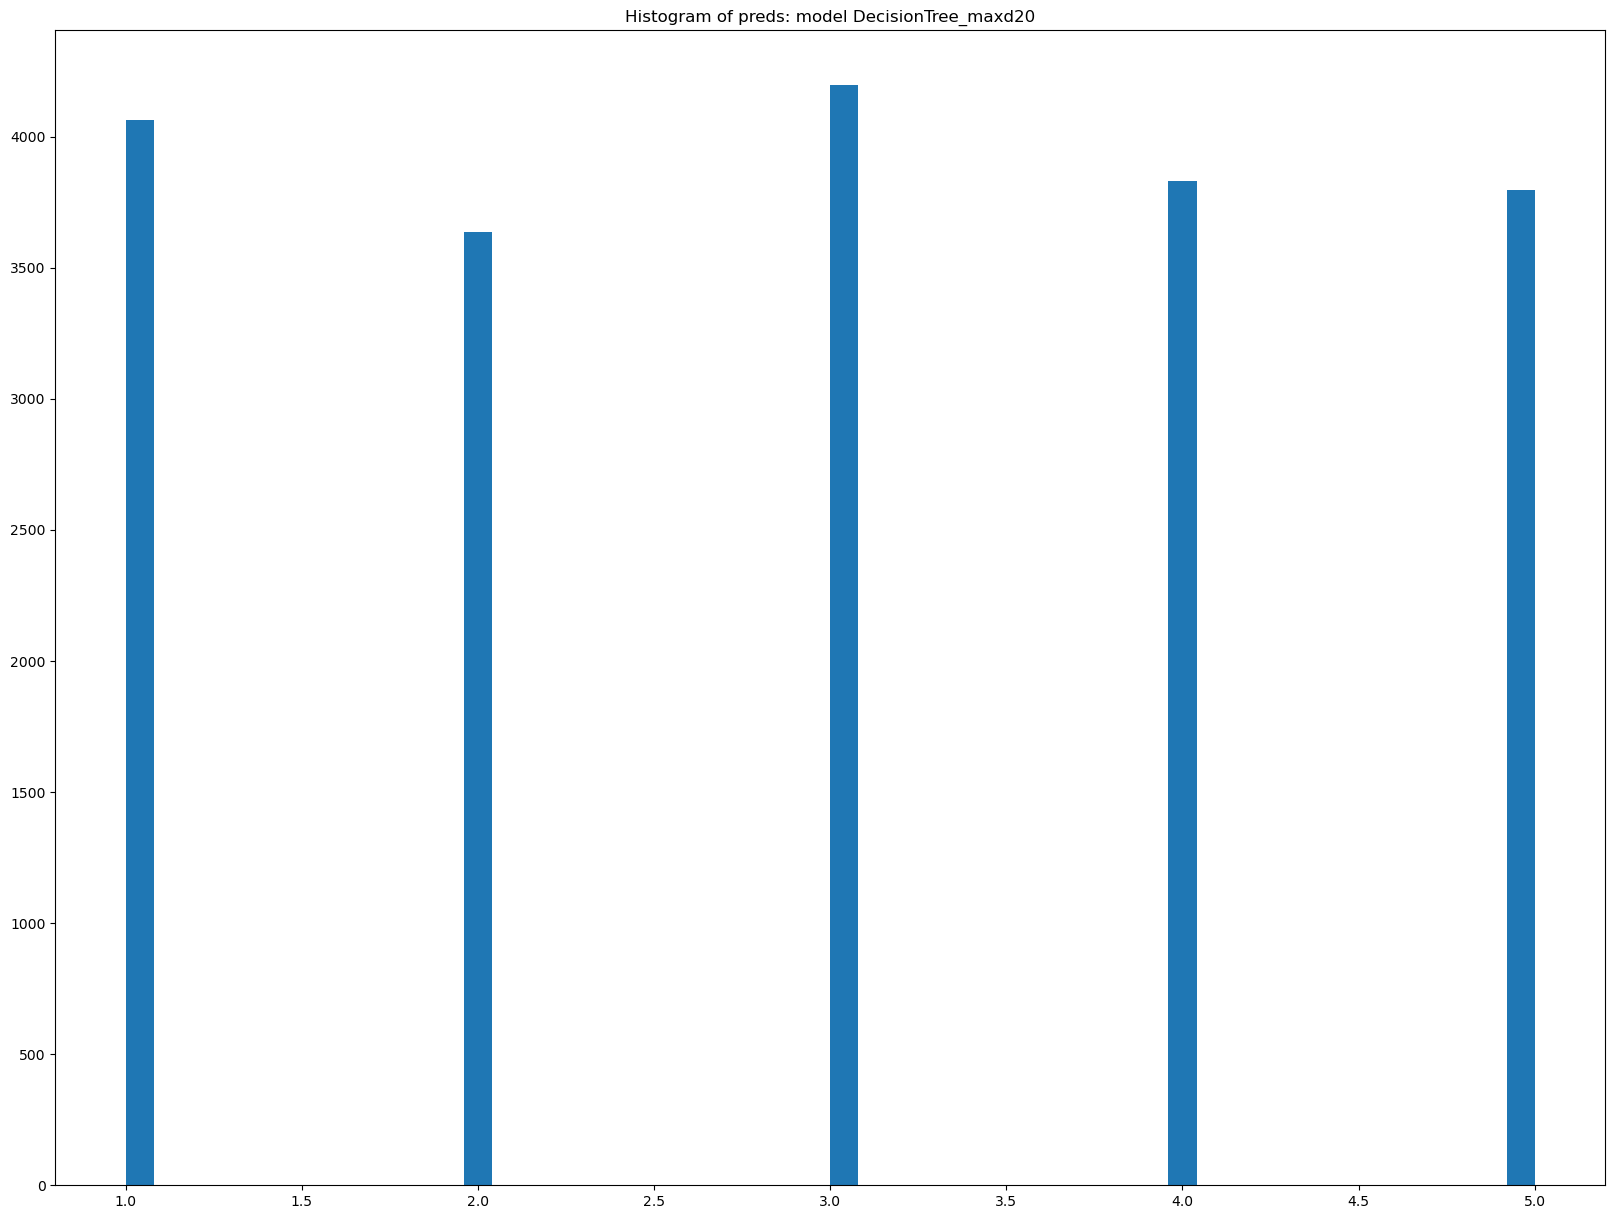

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.8962
The Recall is:  0.8959
The F1 score is:  0.8959
The Matthews correlation coefficient is:  0.8699

This is the Confusion Matrix
      0     1     2     3     4
0  3934    24    67    15    33
1    19  3258    87   182   206
2    41    49  3679   187    88
3    26   117   211  3265   115
4    45   188   152   181  3355
model_number: 104
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()


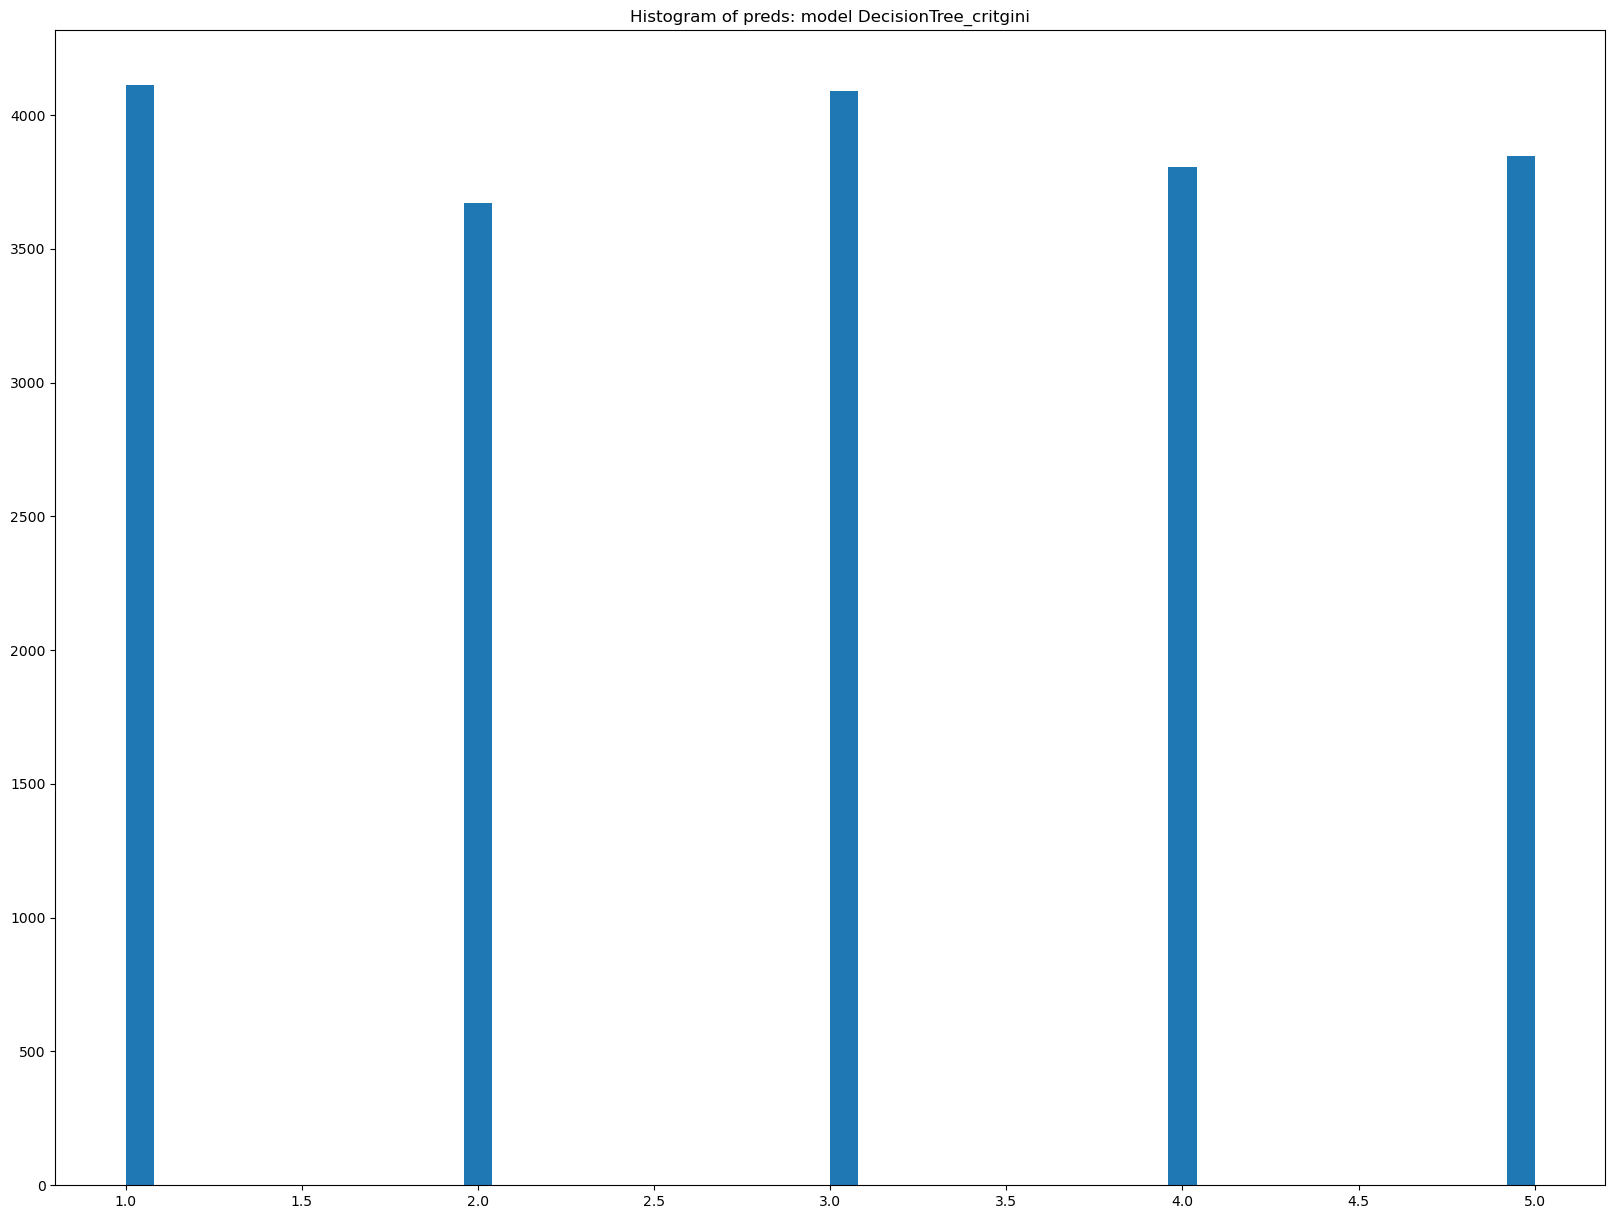

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.8986
The Recall is:  0.8986
The F1 score is:  0.8985
The Matthews correlation coefficient is:  0.8733

This is the Confusion Matrix
      0     1     2     3     4
0  3965    20    42    12    34
1    26  3267    74   170   215
2    48    59  3657   190    90
3    31   122   192  3268   121
4    41   202   124   166  3388
model_number: 105
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


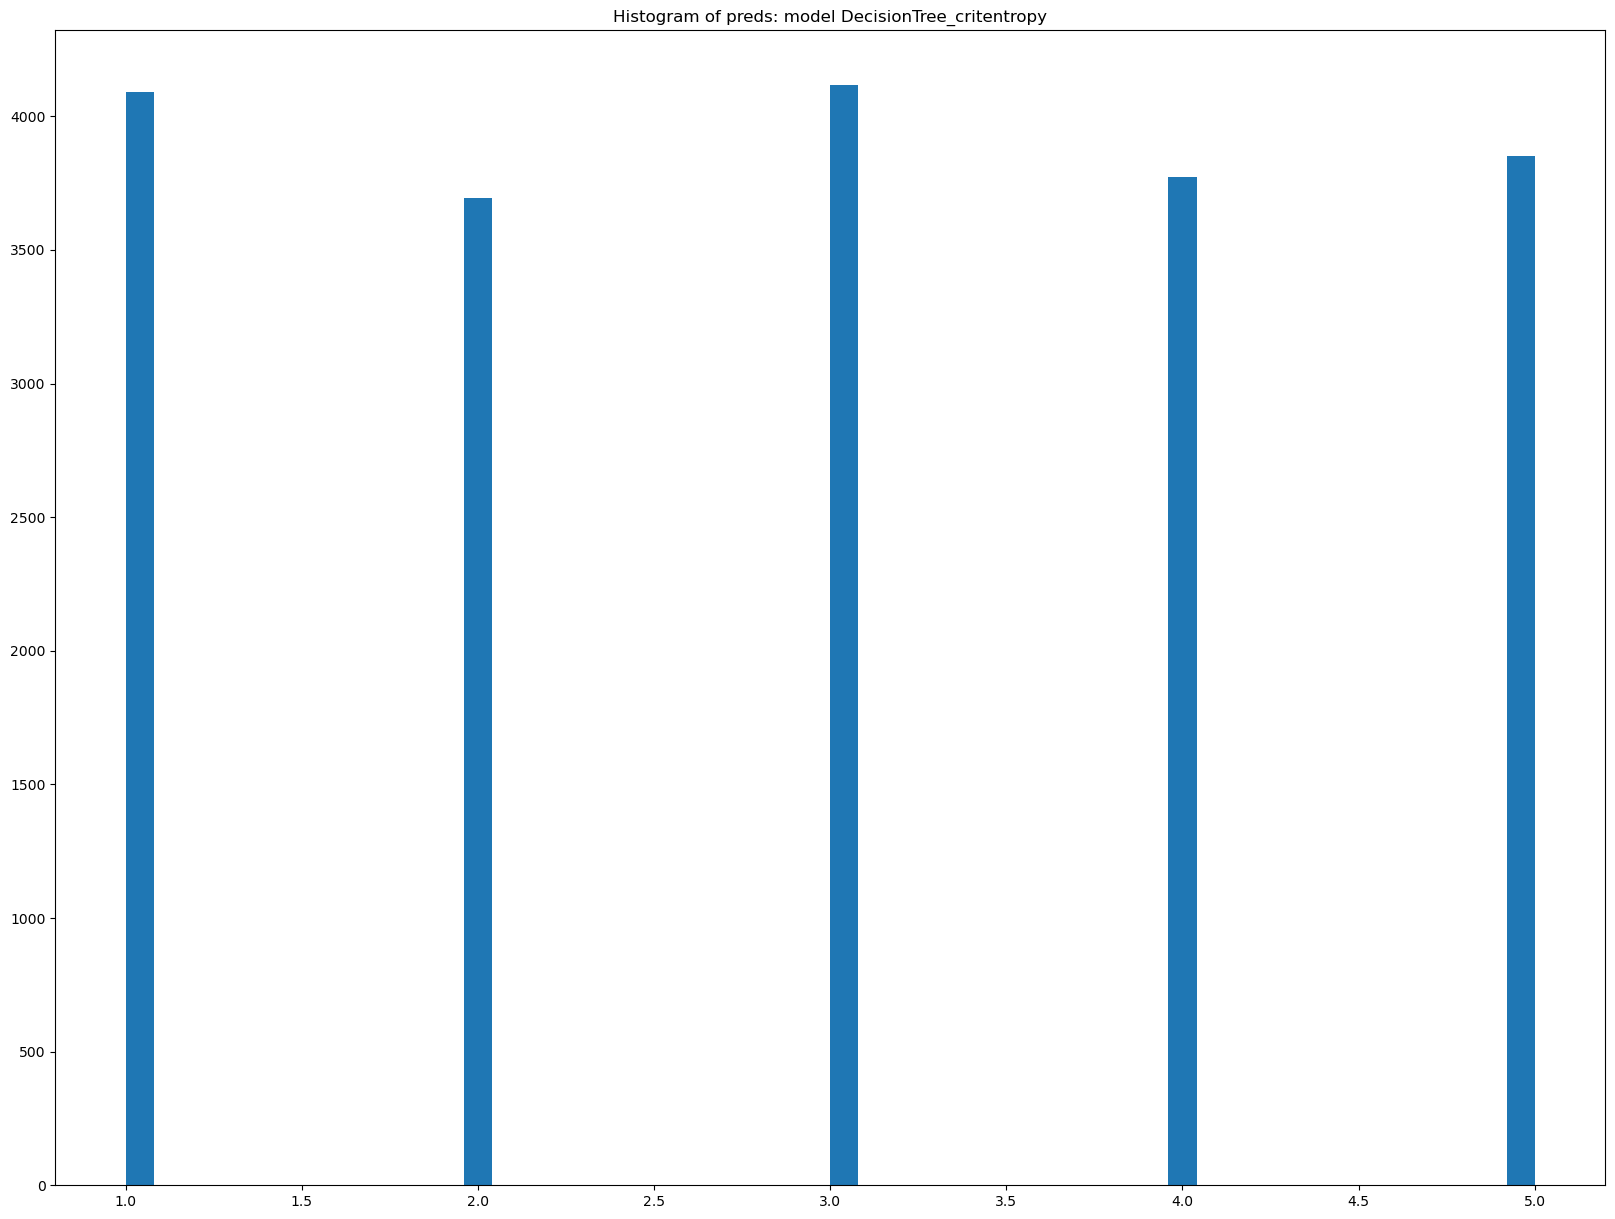

Scaler: PowerTransformer() imputer: KNNImputer() classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9167
The Recall is:  0.9167
The F1 score is:  0.9166
The Matthews correlation coefficient is:  0.8958

This is the Confusion Matrix
      0     1     2     3     4
0  4006    12    19    13    23
1    14  3361    70   133   174
2    33    54  3708   163    86
3    14    97   186  3346    91
4    22   171   133   119  3476
model_number: 106
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: GaussianNB GaussianNB()


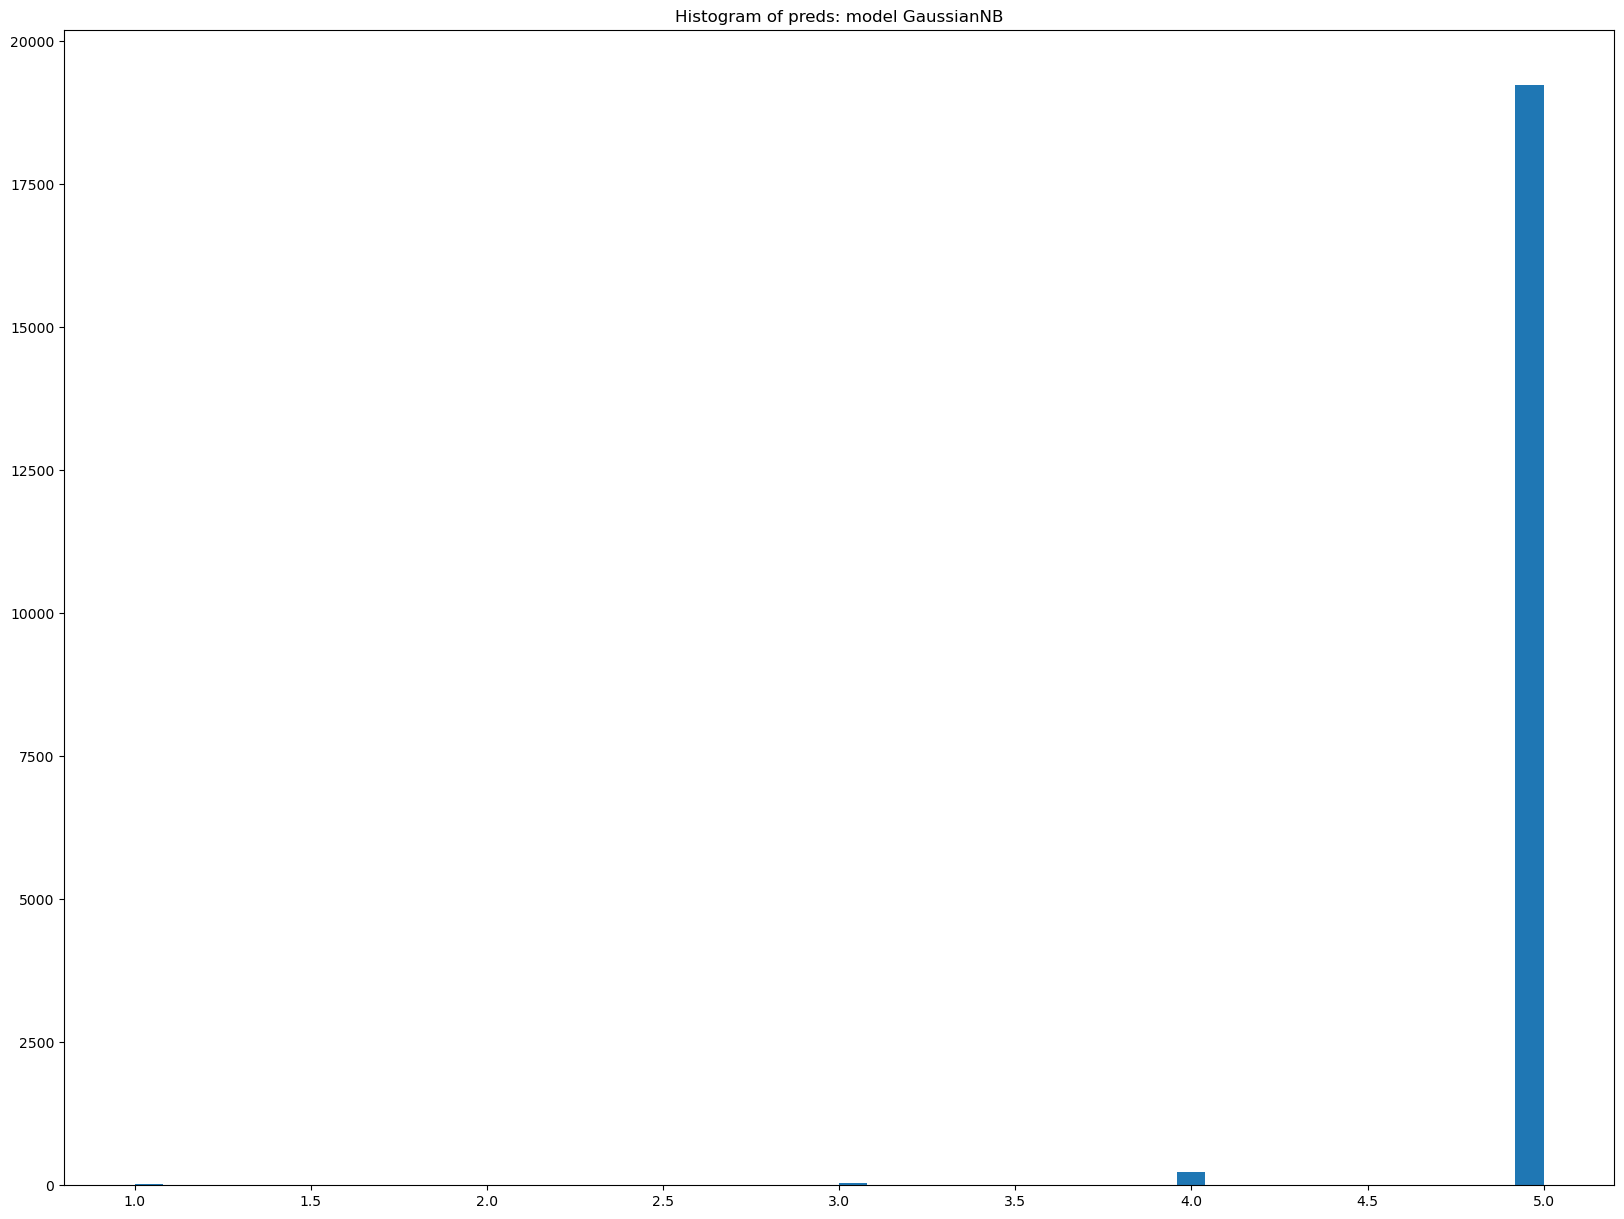

Scaler: PowerTransformer() imputer: KNNImputer() classifier: GaussianNB GaussianNB()
The Precision is:  0.6648
The Recall is:  0.2082
The F1 score is:  0.0823
The Matthews correlation coefficient is:  0.0487

This is the Confusion Matrix
    0  1   2   3     4
0  21  3   0  29  4020
1   0  8   0  52  3692
2   0  0  35  63  3946
3   0  0   0  80  3654
4   0  0   0   0  3921
model_number: 107
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


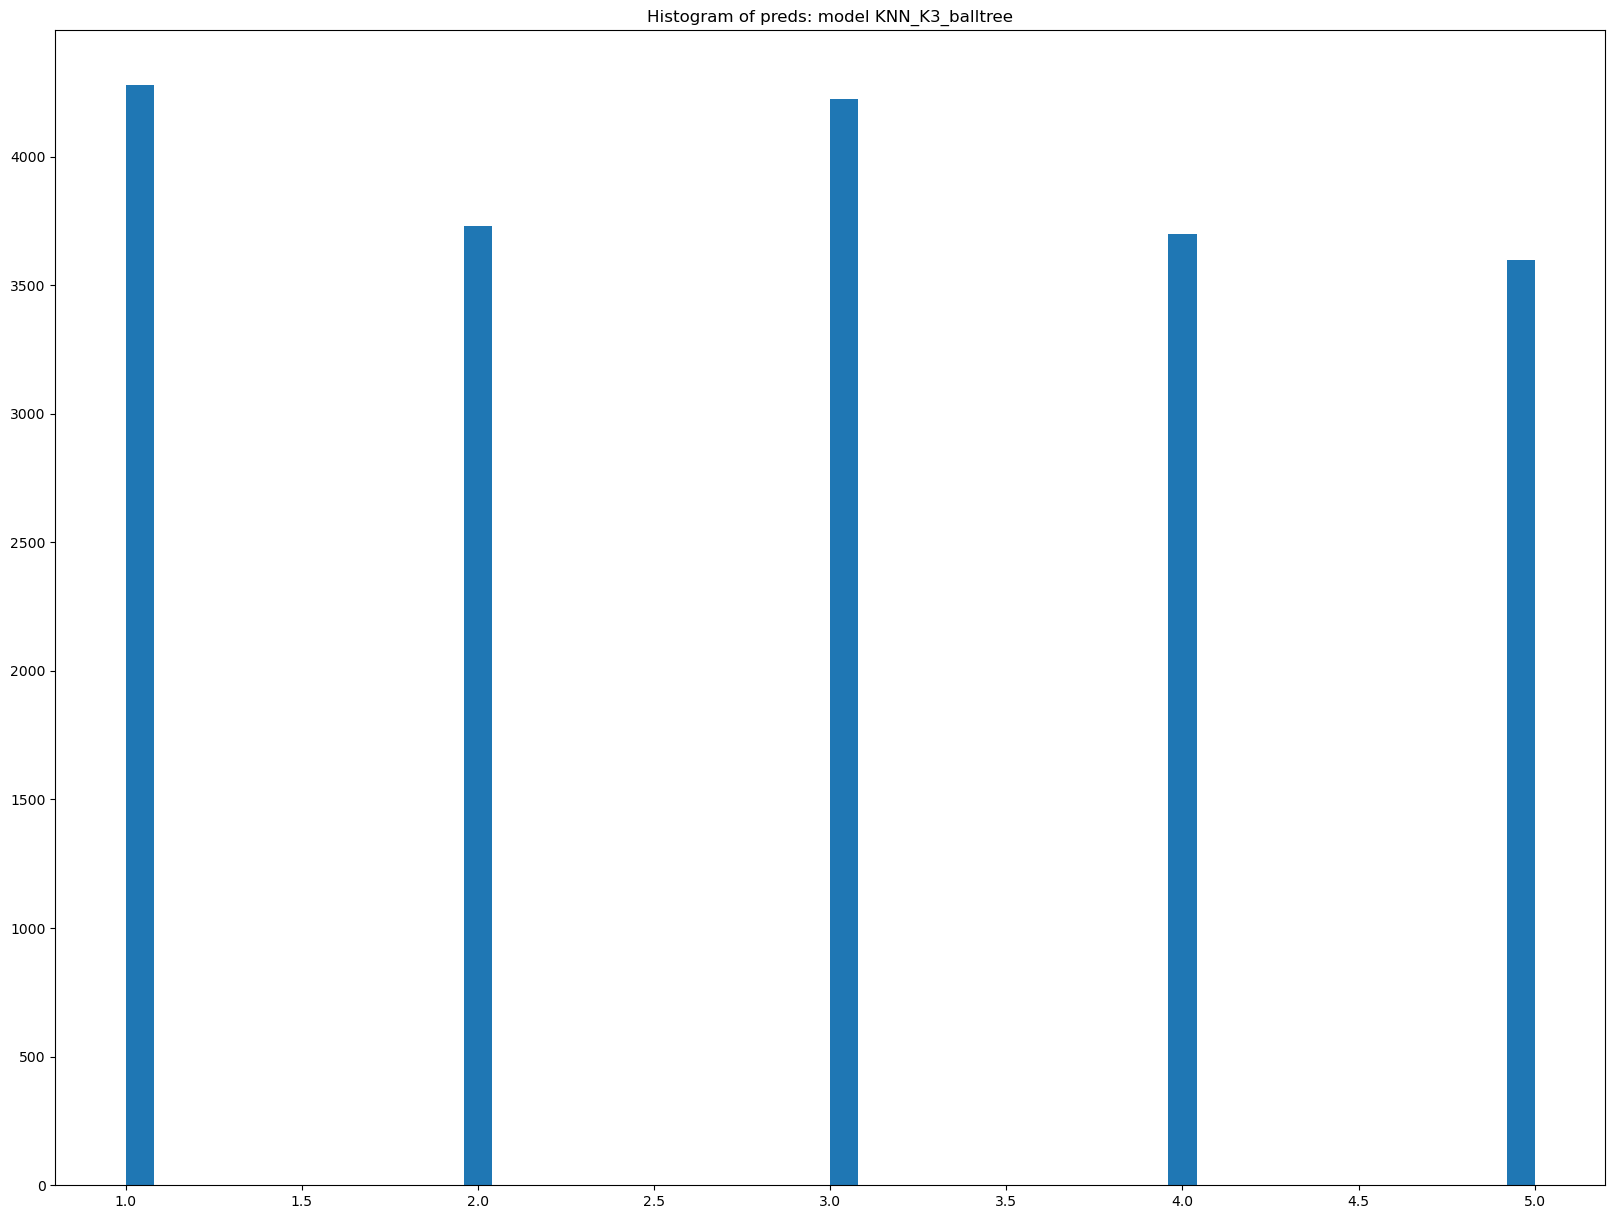

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9410
The Recall is:  0.9403
The F1 score is:  0.9401
The Matthews correlation coefficient is:  0.9256

This is the Confusion Matrix
      0     1     2     3     4
0  4047    12    11     1     2
1    31  3480    67   102    72
2    69     7  3866    98     4
3    25    55   194  3452     8
4   105   174    85    44  3513
model_number: 108
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


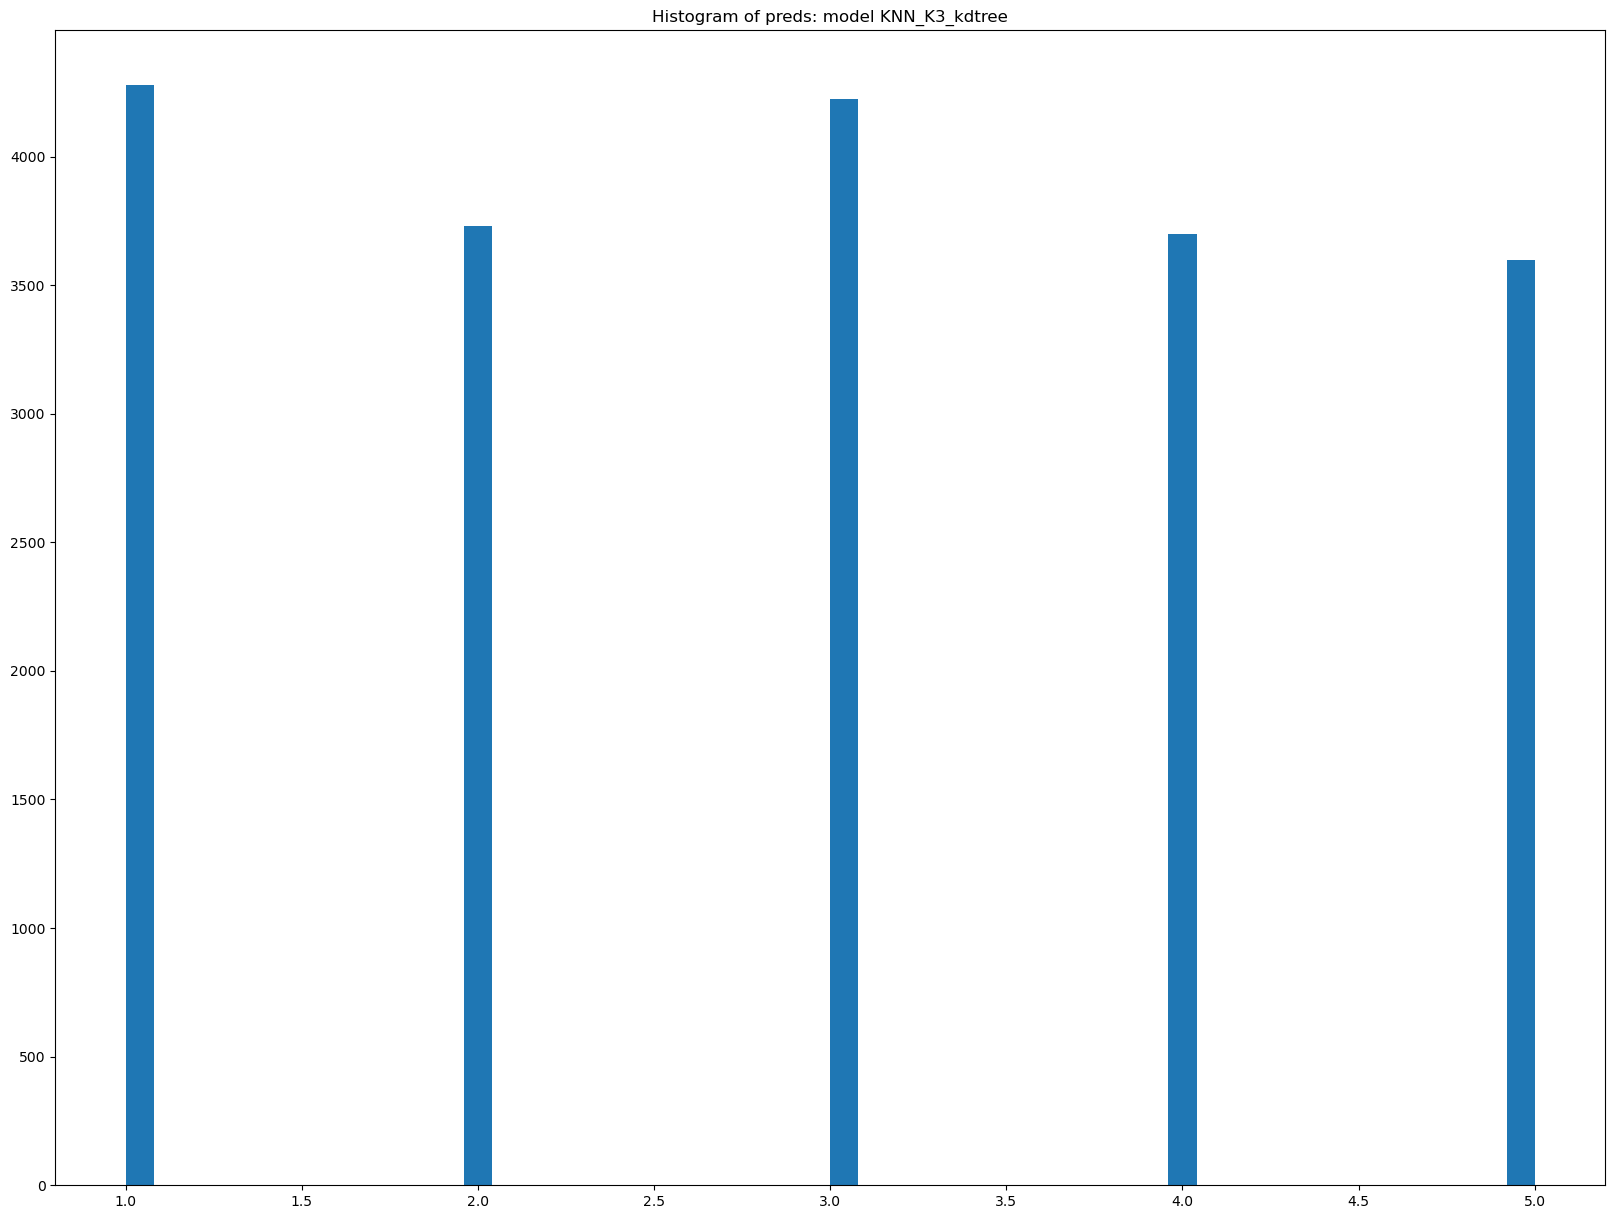

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9410
The Recall is:  0.9403
The F1 score is:  0.9401
The Matthews correlation coefficient is:  0.9256

This is the Confusion Matrix
      0     1     2     3     4
0  4047    12    11     1     2
1    31  3480    67   102    72
2    69     7  3866    98     4
3    25    55   194  3452     8
4   105   174    85    44  3513
model_number: 109
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


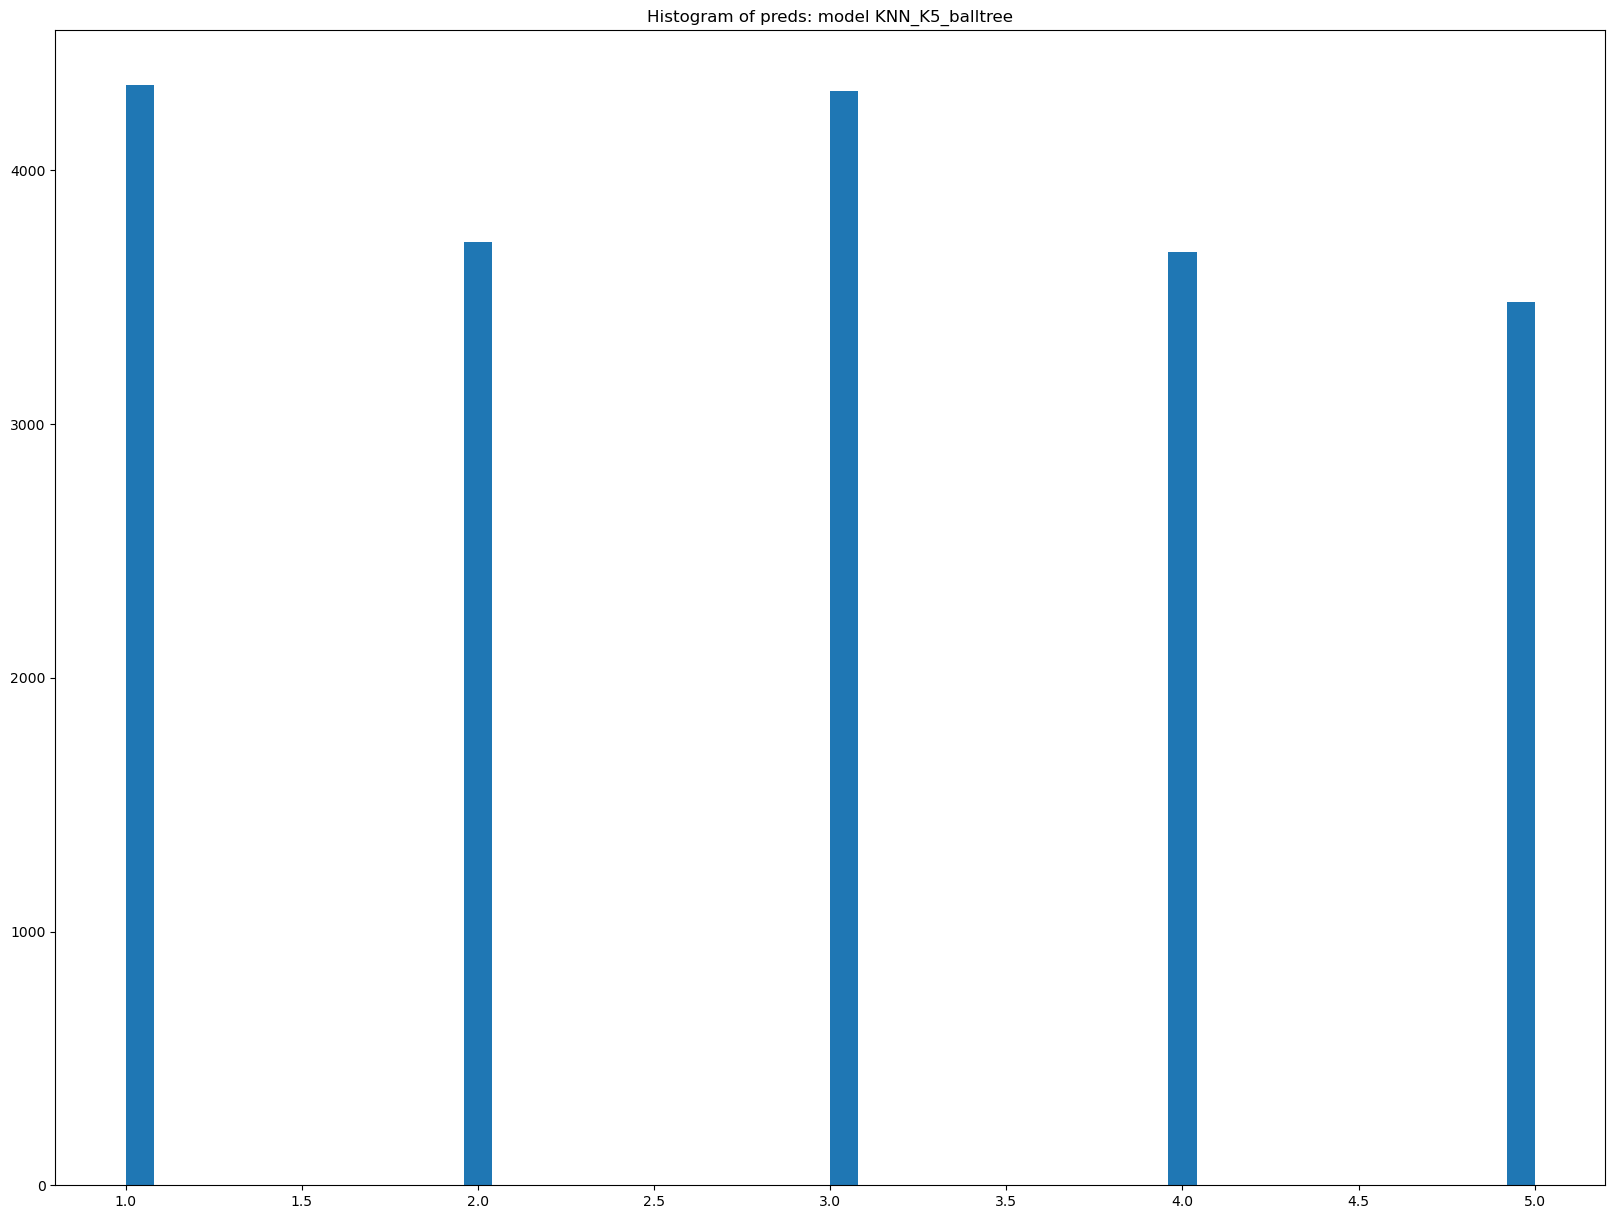

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9300
The Recall is:  0.9285
The F1 score is:  0.9282
The Matthews correlation coefficient is:  0.9111

This is the Confusion Matrix
      0     1     2     3     4
0  4040    14    16     1     2
1    32  3452    84   109    75
2    88     7  3847    96     6
3    31    50   248  3398     7
4   144   195   119    72  3391
model_number: 110
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


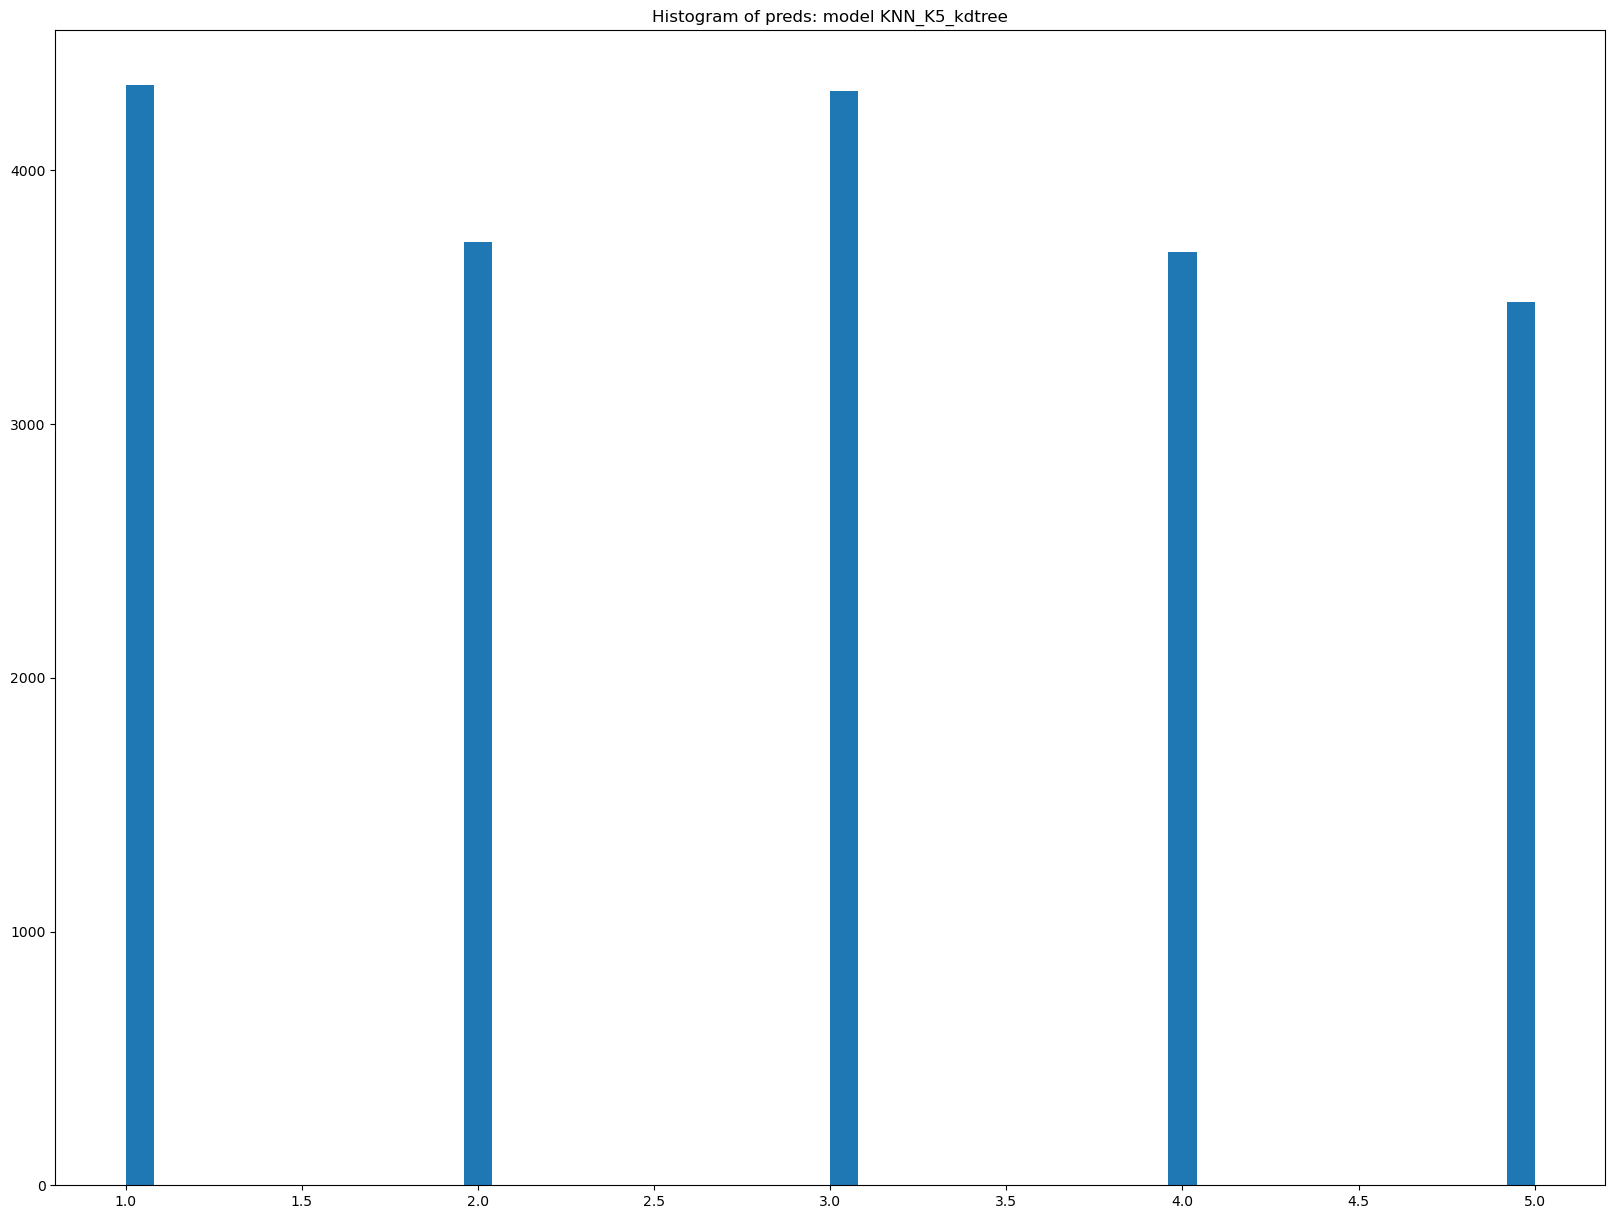

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9300
The Recall is:  0.9285
The F1 score is:  0.9282
The Matthews correlation coefficient is:  0.9111

This is the Confusion Matrix
      0     1     2     3     4
0  4040    14    16     1     2
1    32  3452    84   109    75
2    88     7  3847    96     6
3    31    50   248  3398     7
4   144   195   119    72  3391
model_number: 111
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


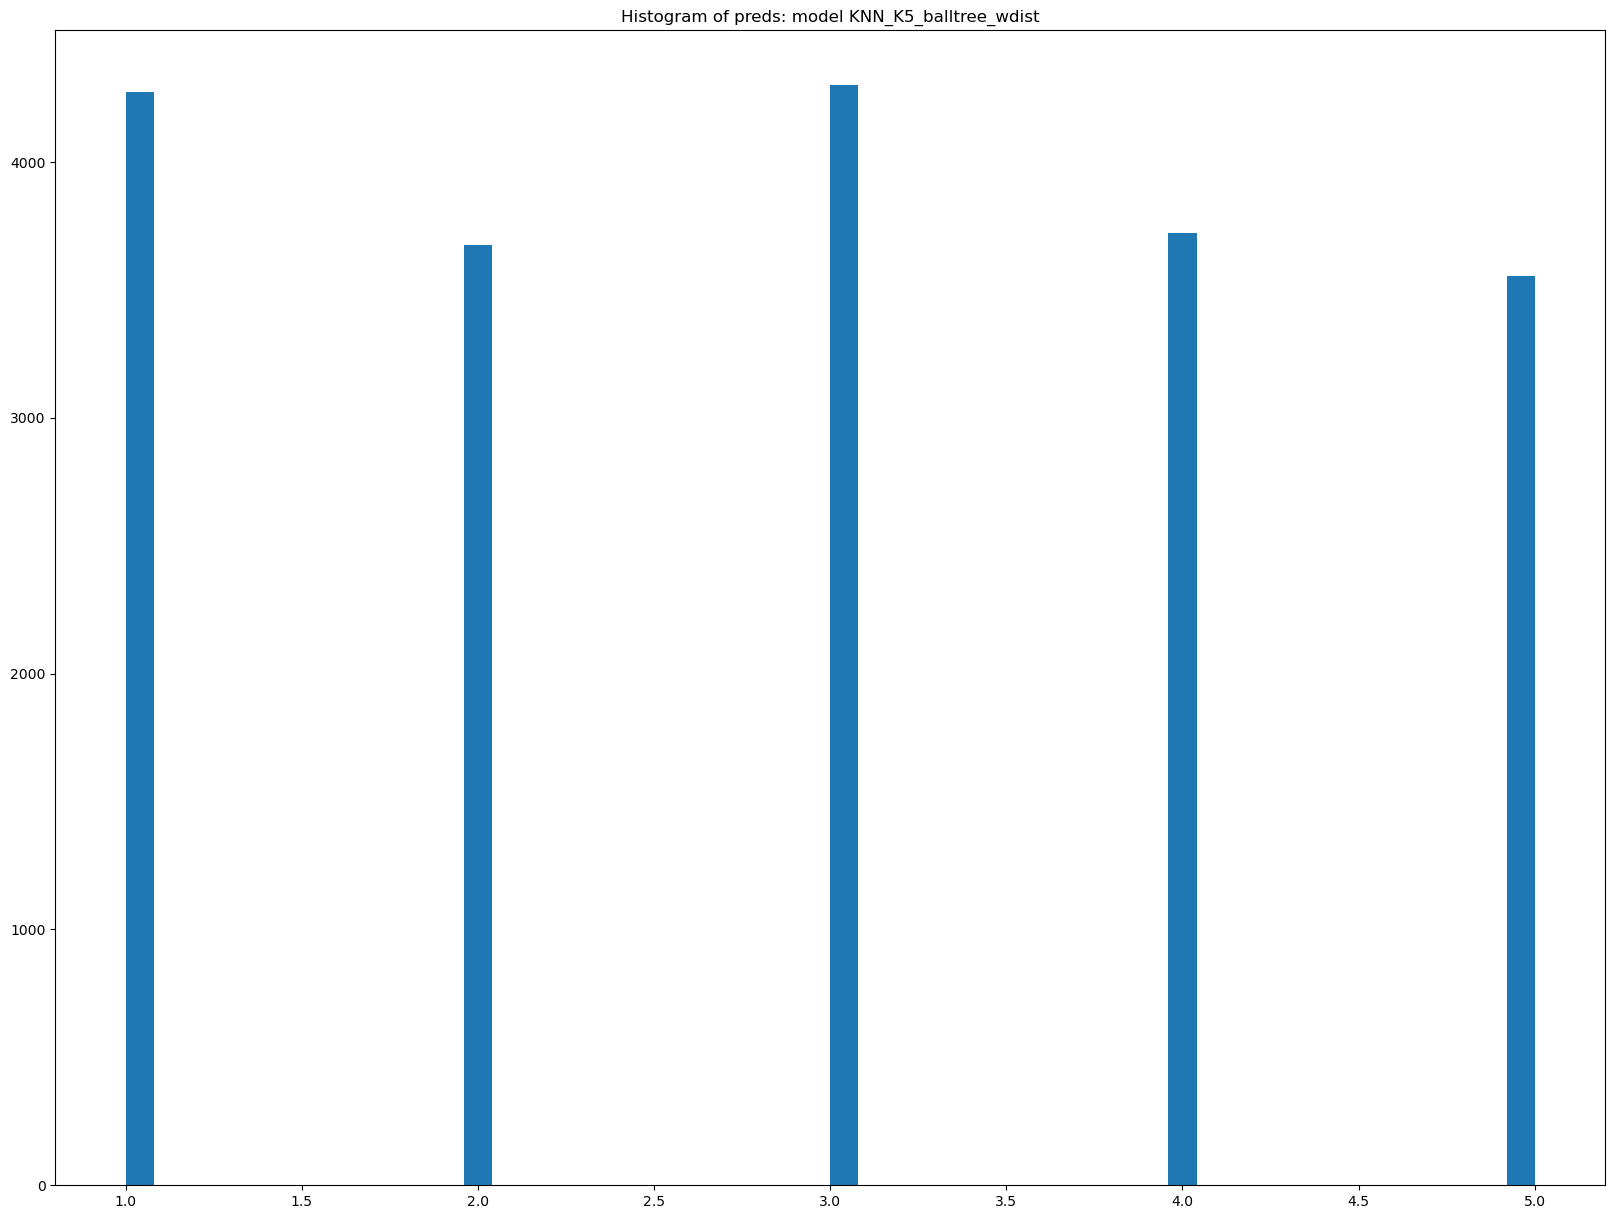

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9372
The Recall is:  0.9361
The F1 score is:  0.9359
The Matthews correlation coefficient is:  0.9205

This is the Confusion Matrix
      0     1     2     3     4
0  4045    13    12     1     2
1    28  3444    85   118    77
2    64     4  3879    91     6
3    23    33   222  3448     8
4   112   181   102    65  3461
model_number: 112
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_missNAN_wUnif KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


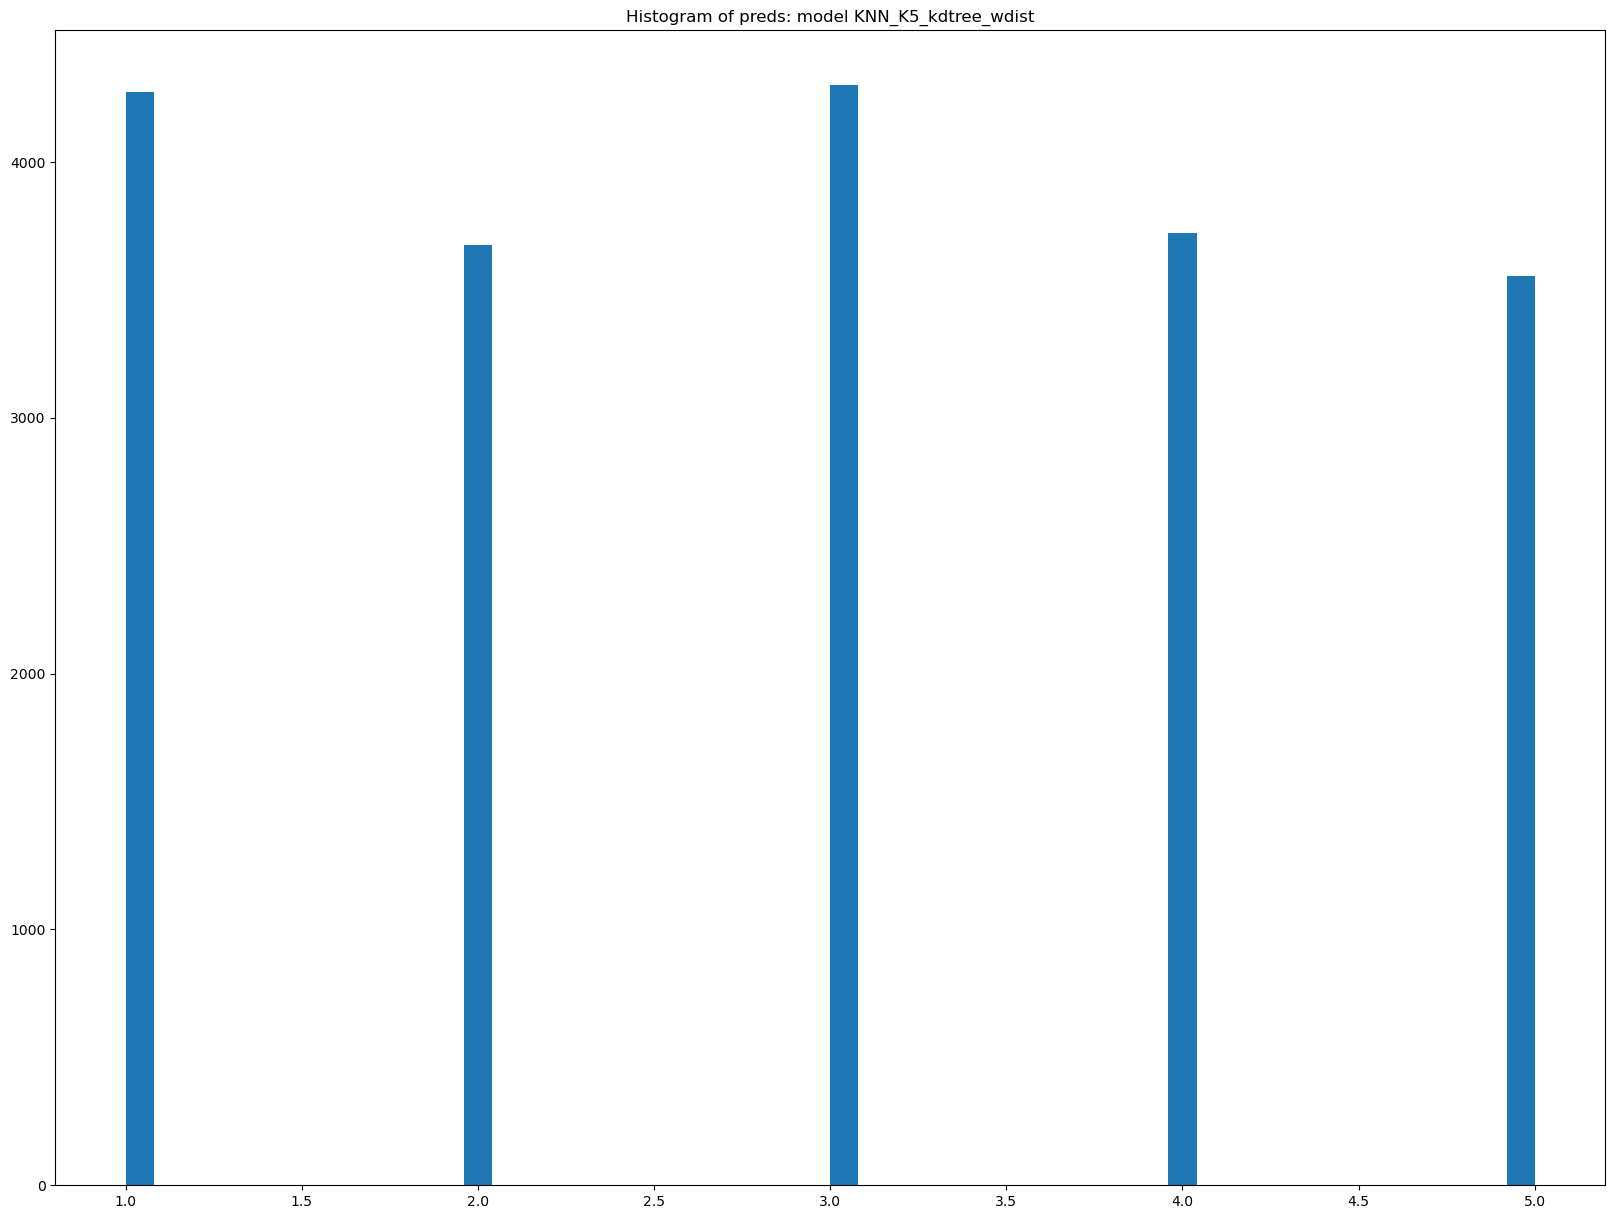

Scaler: PowerTransformer() imputer: KNNImputer() classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9372
The Recall is:  0.9361
The F1 score is:  0.9359
The Matthews correlation coefficient is:  0.9205

This is the Confusion Matrix
      0     1     2     3     4
0  4045    13    12     1     2
1    28  3444    85   118    77
2    64     4  3879    91     6
3    23    33   222  3448     8
4   112   181   102    65  3461
model_number: 113
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()


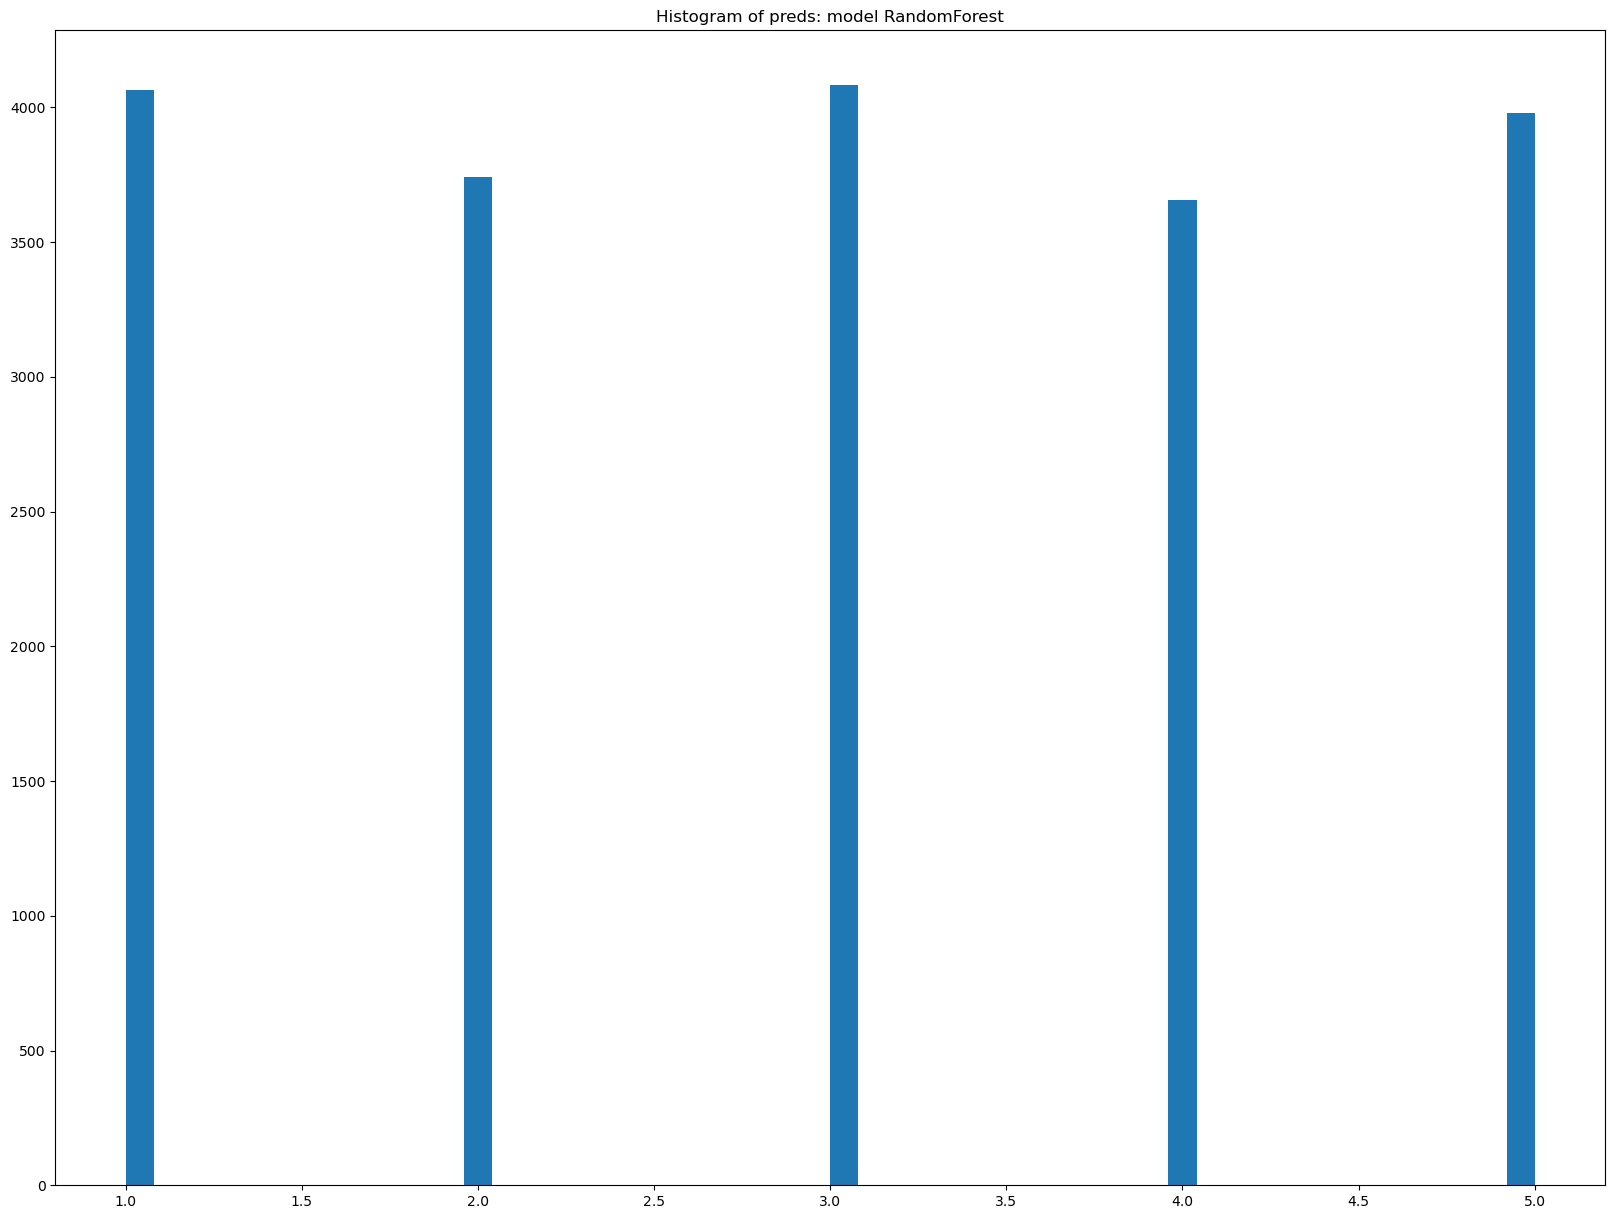

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: RandomForest RandomForestClassifier()
The Precision is:  0.9816
The Recall is:  0.9816
The F1 score is:  0.9815
The Matthews correlation coefficient is:  0.9770

This is the Confusion Matrix
      0     1     2     3     4
0  4045    17     7     1     3
1     3  3648    32    26    43
2    16    12  3974    26    16
3     1    43    63  3604    23
4     0    21     6     1  3893
model_number: 114
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()


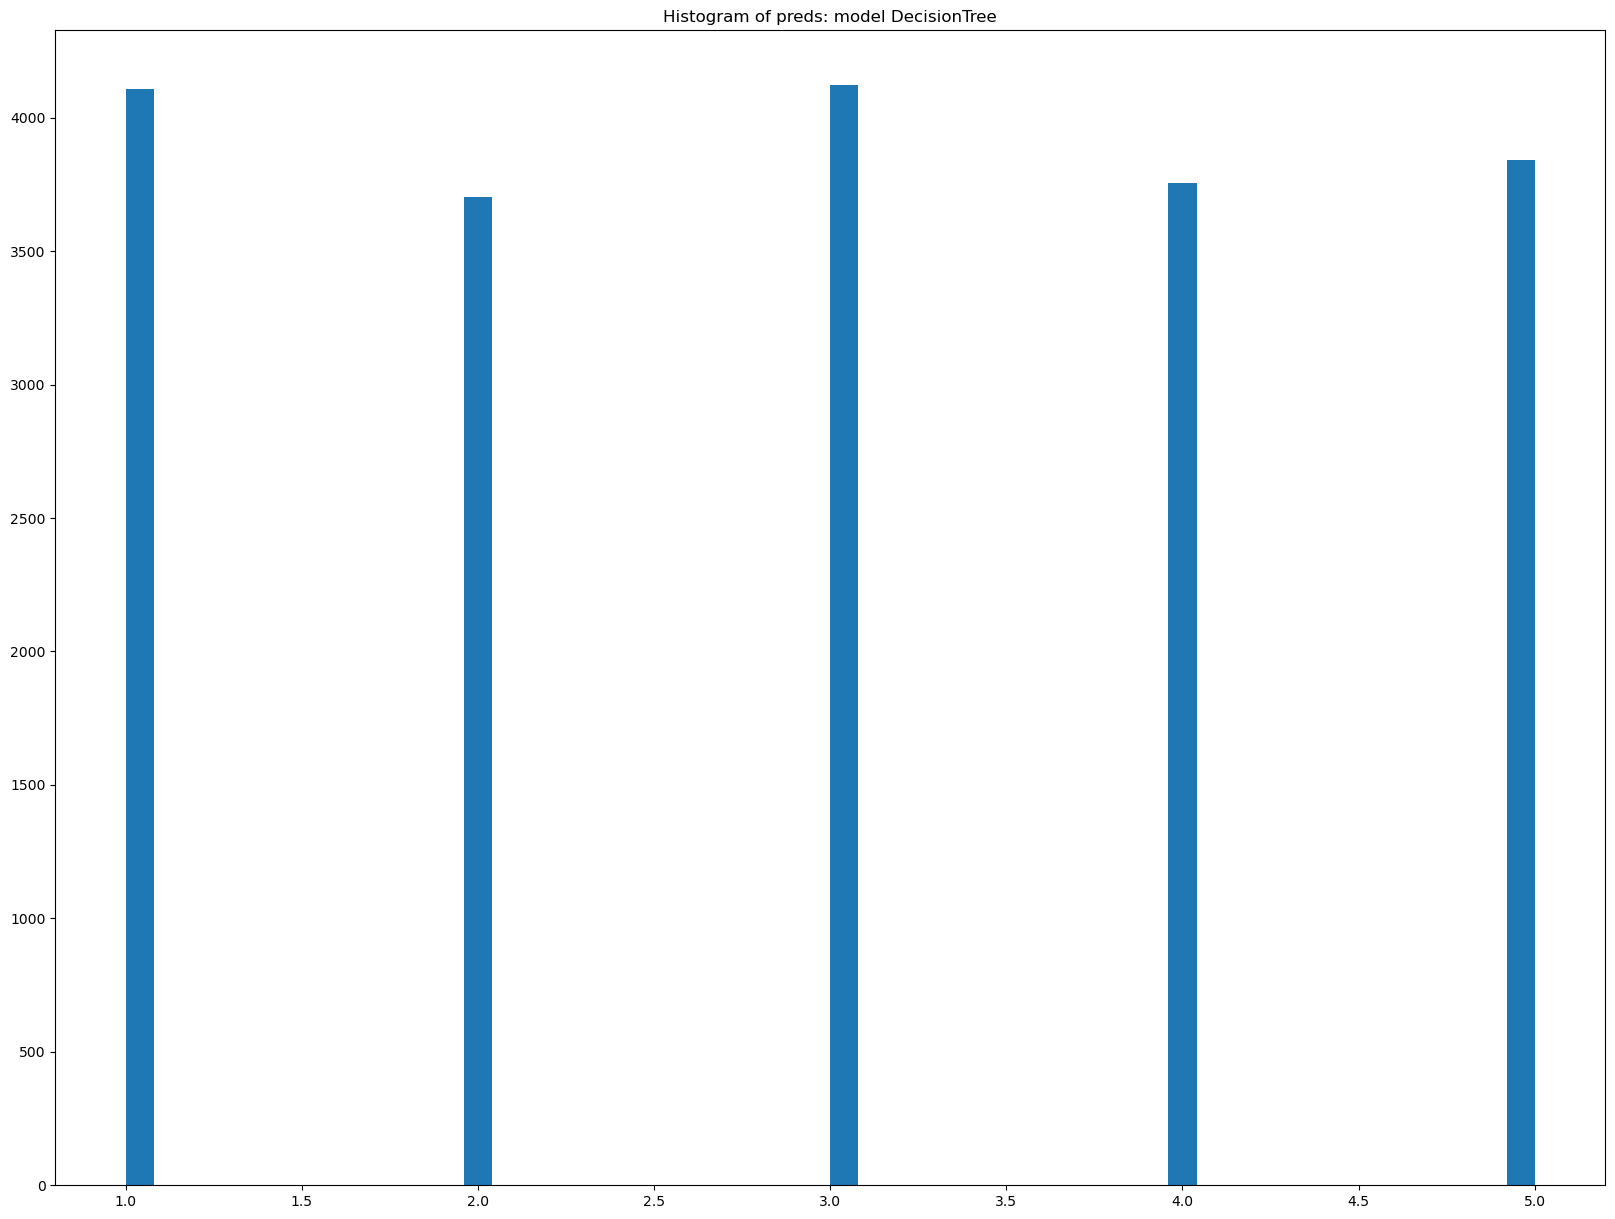

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree DecisionTreeClassifier()
The Precision is:  0.9034
The Recall is:  0.9035
The F1 score is:  0.9034
The Matthews correlation coefficient is:  0.8793

This is the Confusion Matrix
      0     1     2     3     4
0  3975    22    42    13    21
1    30  3312    89   153   168
2    35    60  3658   180   111
3    24   134   198  3266   112
4    43   173   134   143  3428
model_number: 115
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)


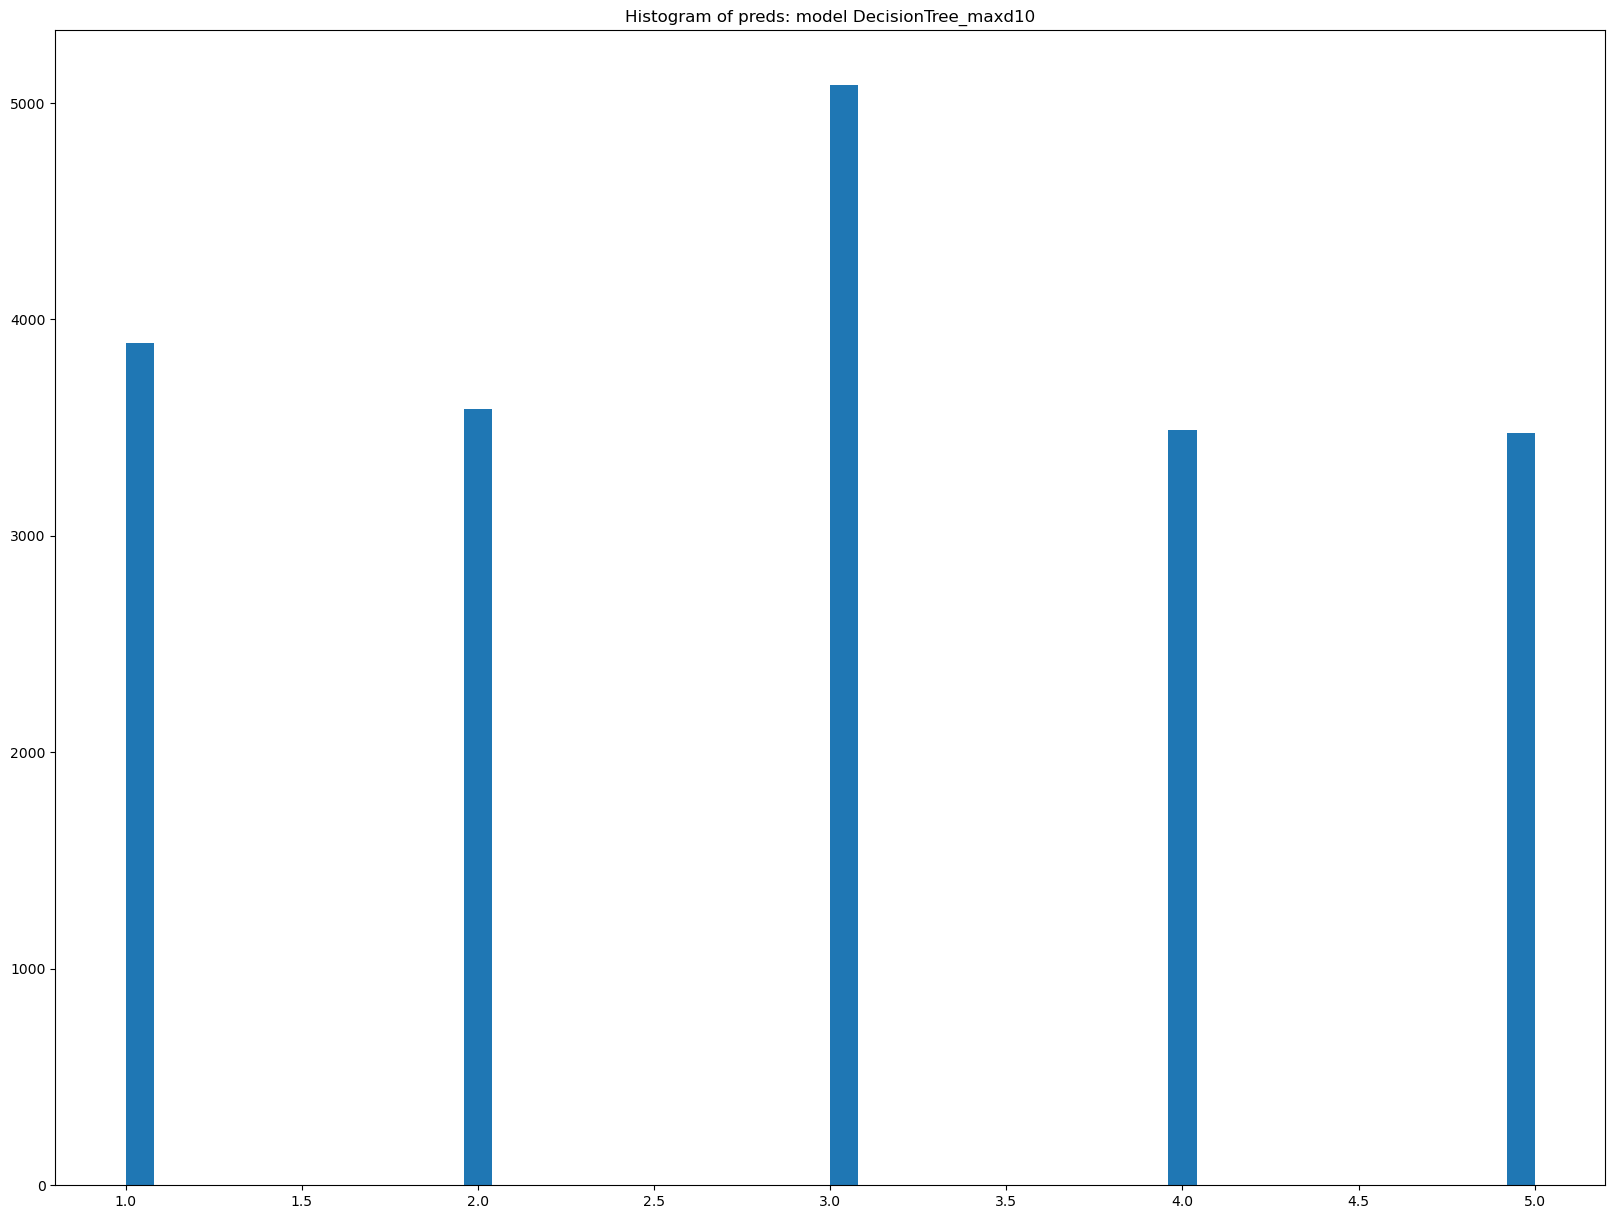

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd10 DecisionTreeClassifier(max_depth=10)
The Precision is:  0.8259
The Recall is:  0.8174
The F1 score is:  0.8186
The Matthews correlation coefficient is:  0.7733

This is the Confusion Matrix
      0     1     2     3     4
0  3762    47   137    85    42
1    17  2958   383   222   172
2    42   111  3526   270    95
3    25   199   644  2706   160
4    46   271   392   206  3006
model_number: 116
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)


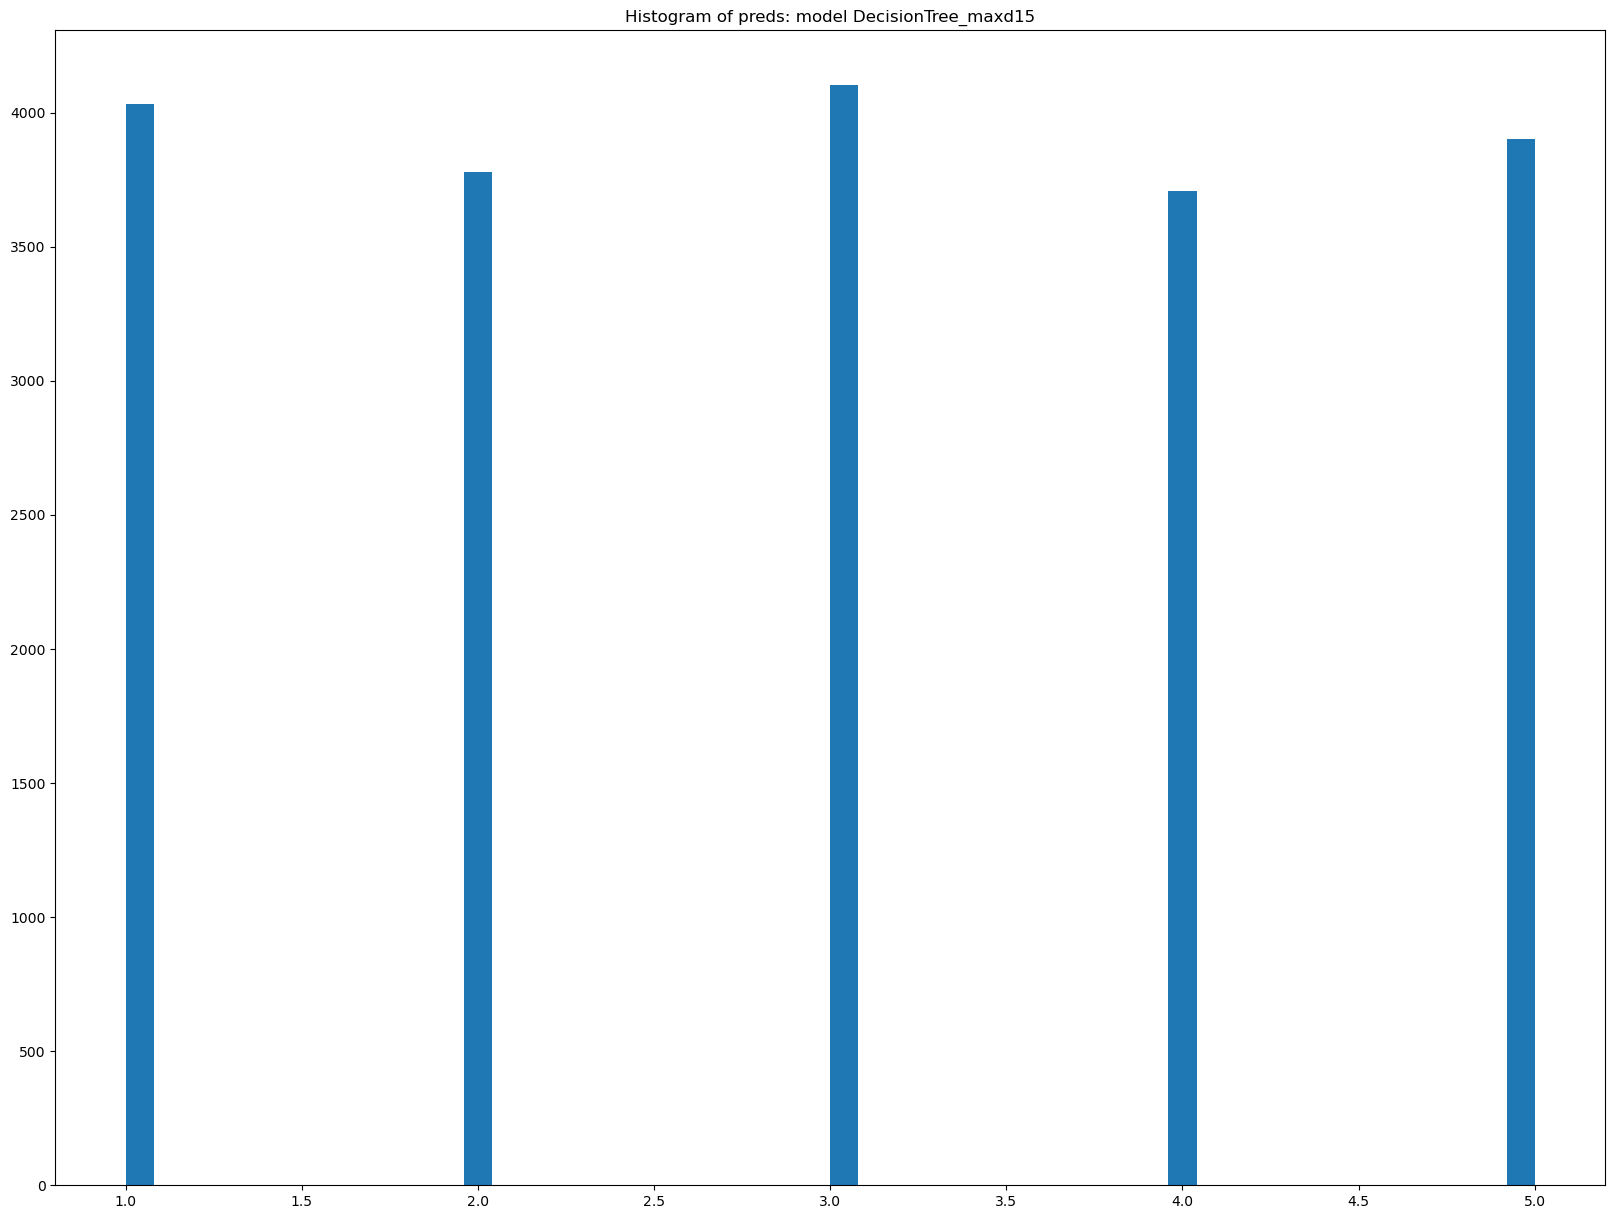

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd15 DecisionTreeClassifier(max_depth=15)
The Precision is:  0.8867
The Recall is:  0.8865
The F1 score is:  0.8866
The Matthews correlation coefficient is:  0.8581

This is the Confusion Matrix
      0     1     2     3     4
0  3915    33    67    19    39
1    24  3256    96   192   184
2    41   108  3578   205   112
3    25   179   224  3149   157
4    29   204   137   141  3410
model_number: 117
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)


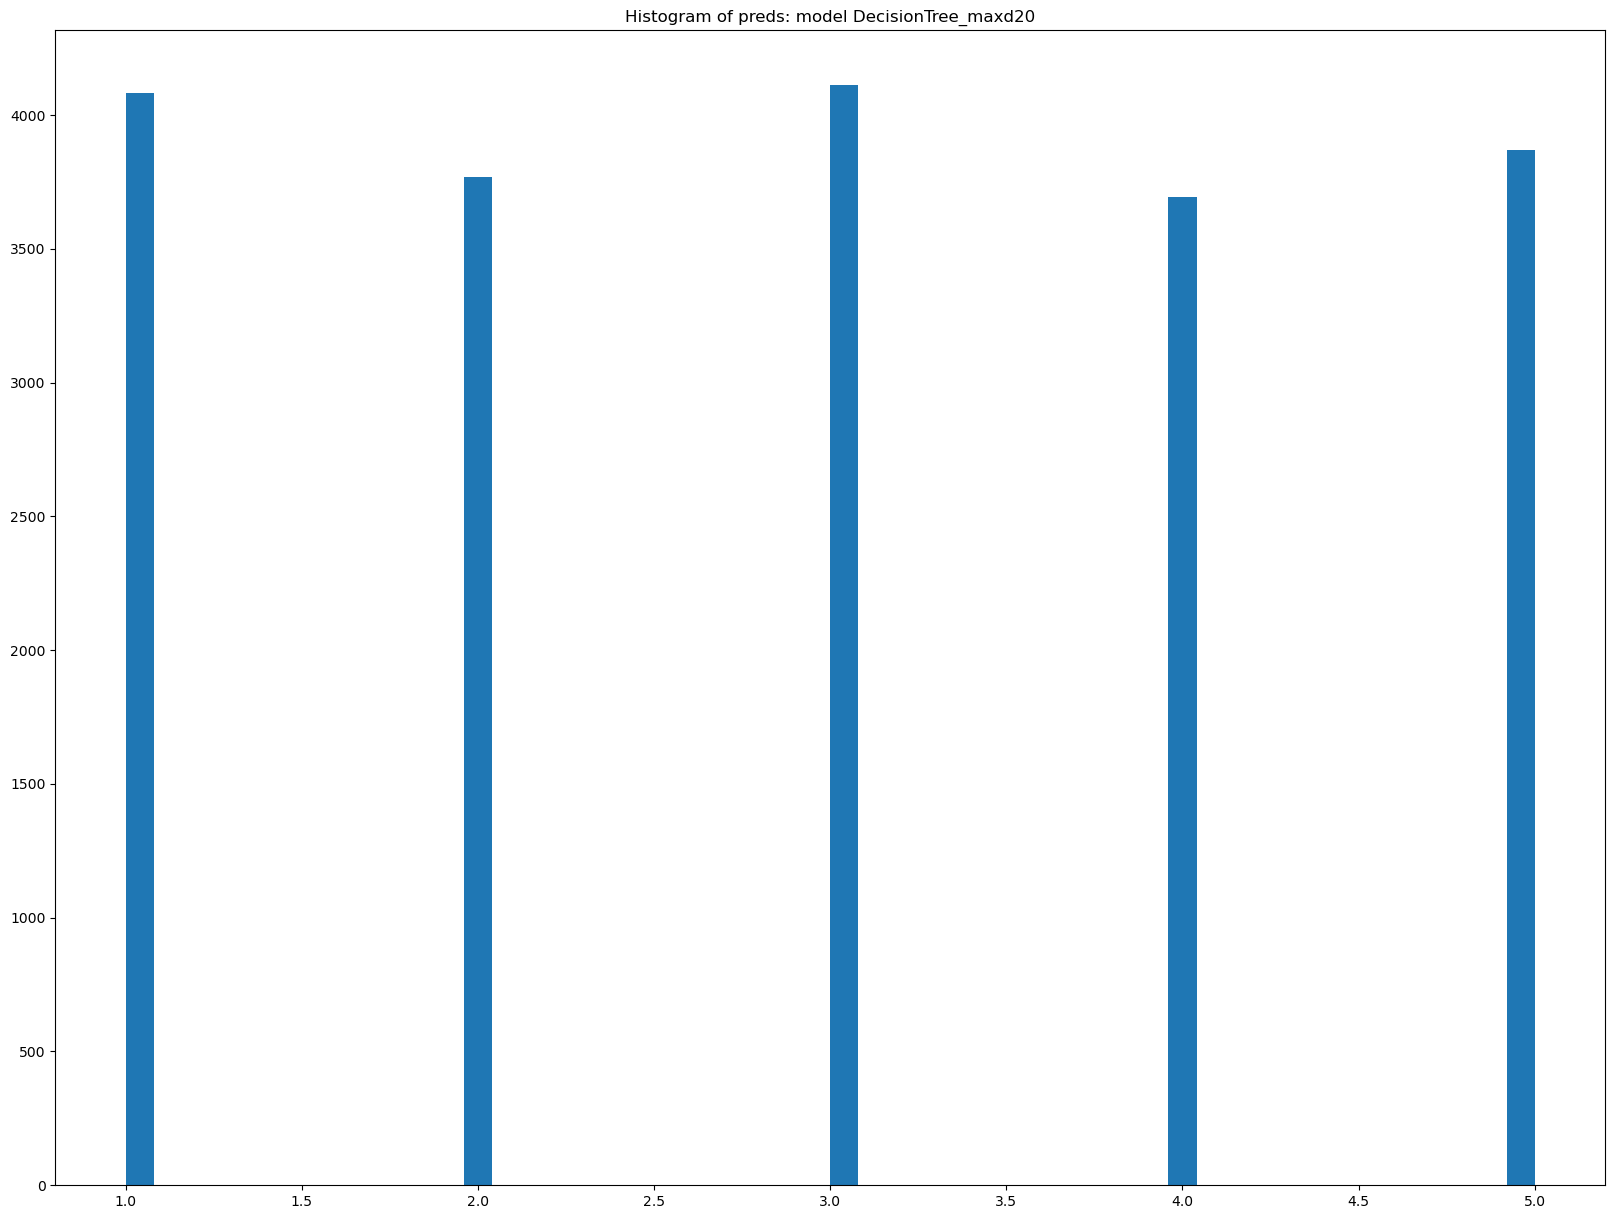

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_maxd20 DecisionTreeClassifier(max_depth=20)
The Precision is:  0.9001
The Recall is:  0.9002
The F1 score is:  0.9002
The Matthews correlation coefficient is:  0.8752

This is the Confusion Matrix
      0     1     2     3     4
0  3955    20    49    12    37
1    24  3328    89   140   171
2    36    80  3649   179   100
3    21   154   205  3218   136
4    48   185   119   143  3426
model_number: 118
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()


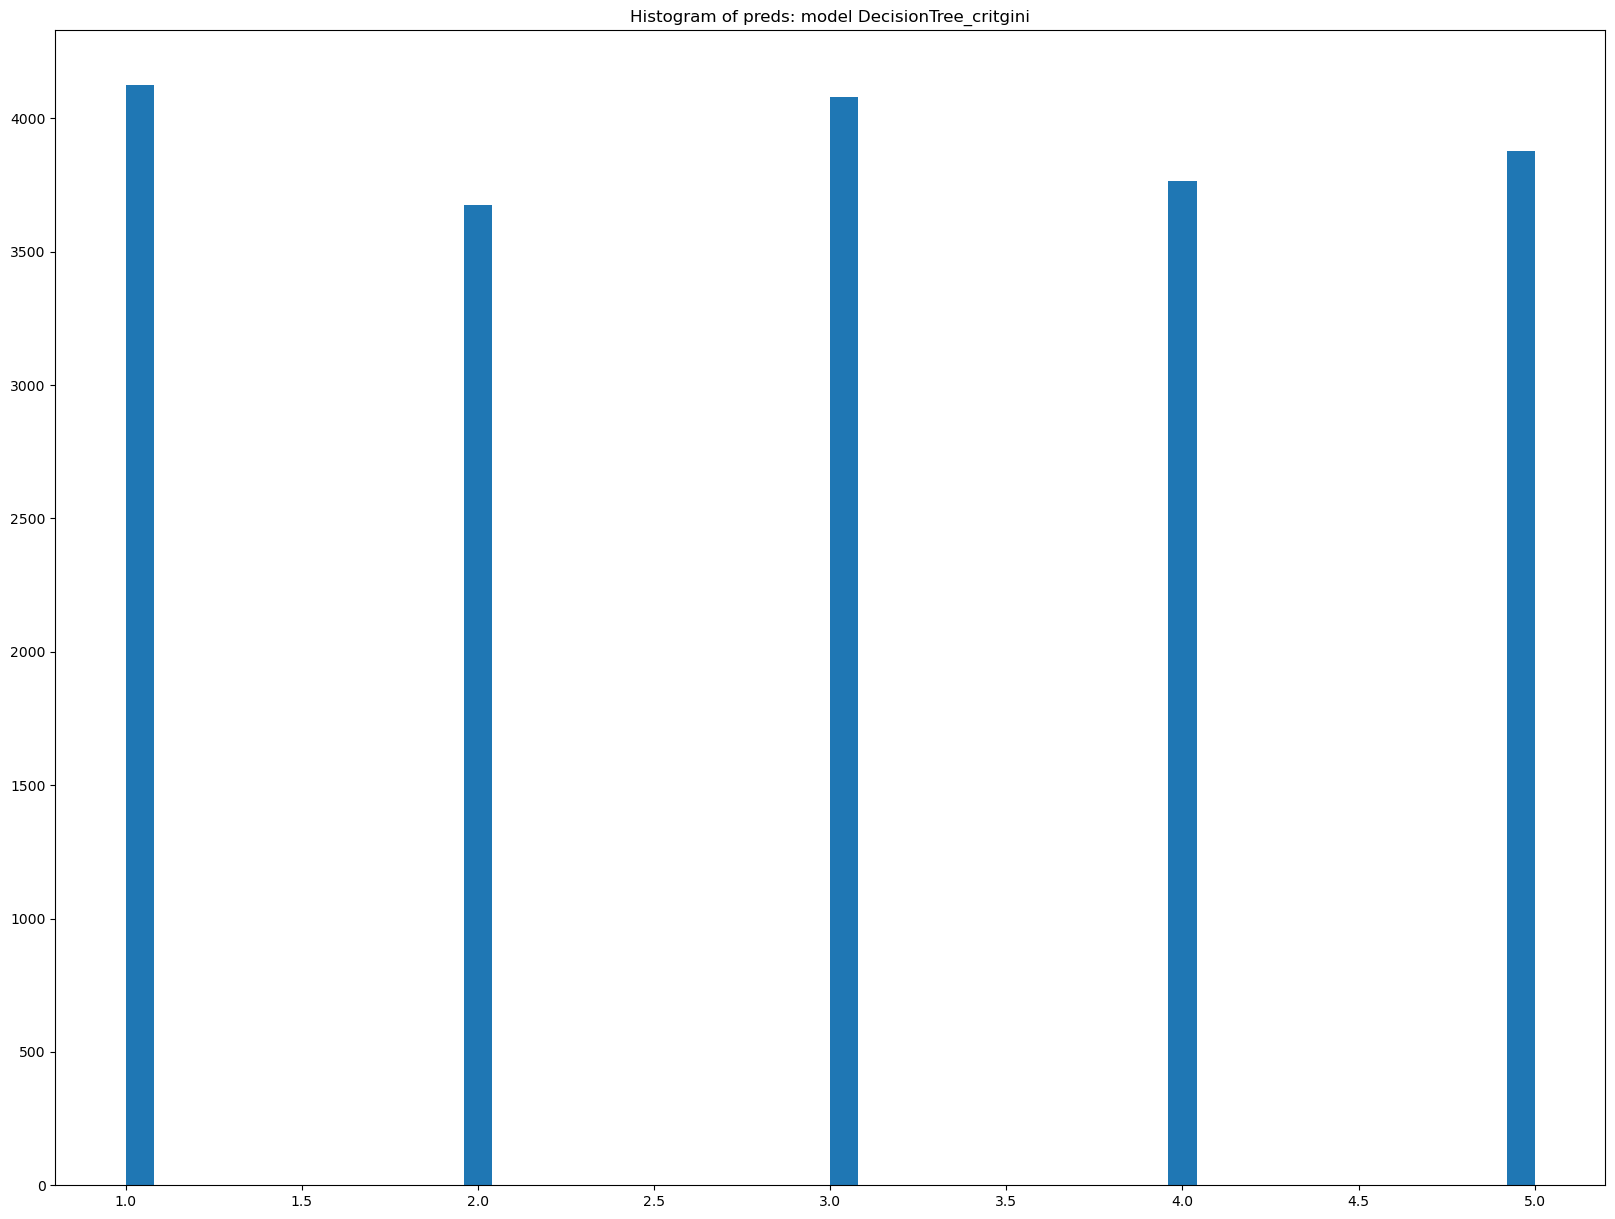

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critgini DecisionTreeClassifier()
The Precision is:  0.9050
The Recall is:  0.9051
The F1 score is:  0.9050
The Matthews correlation coefficient is:  0.8813

This is the Confusion Matrix
      0     1     2     3     4
0  3977    15    45    13    23
1    39  3314    78   147   174
2    37    57  3653   196   101
3    30   124   193  3268   119
4    41   166   112   143  3459
model_number: 119
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')


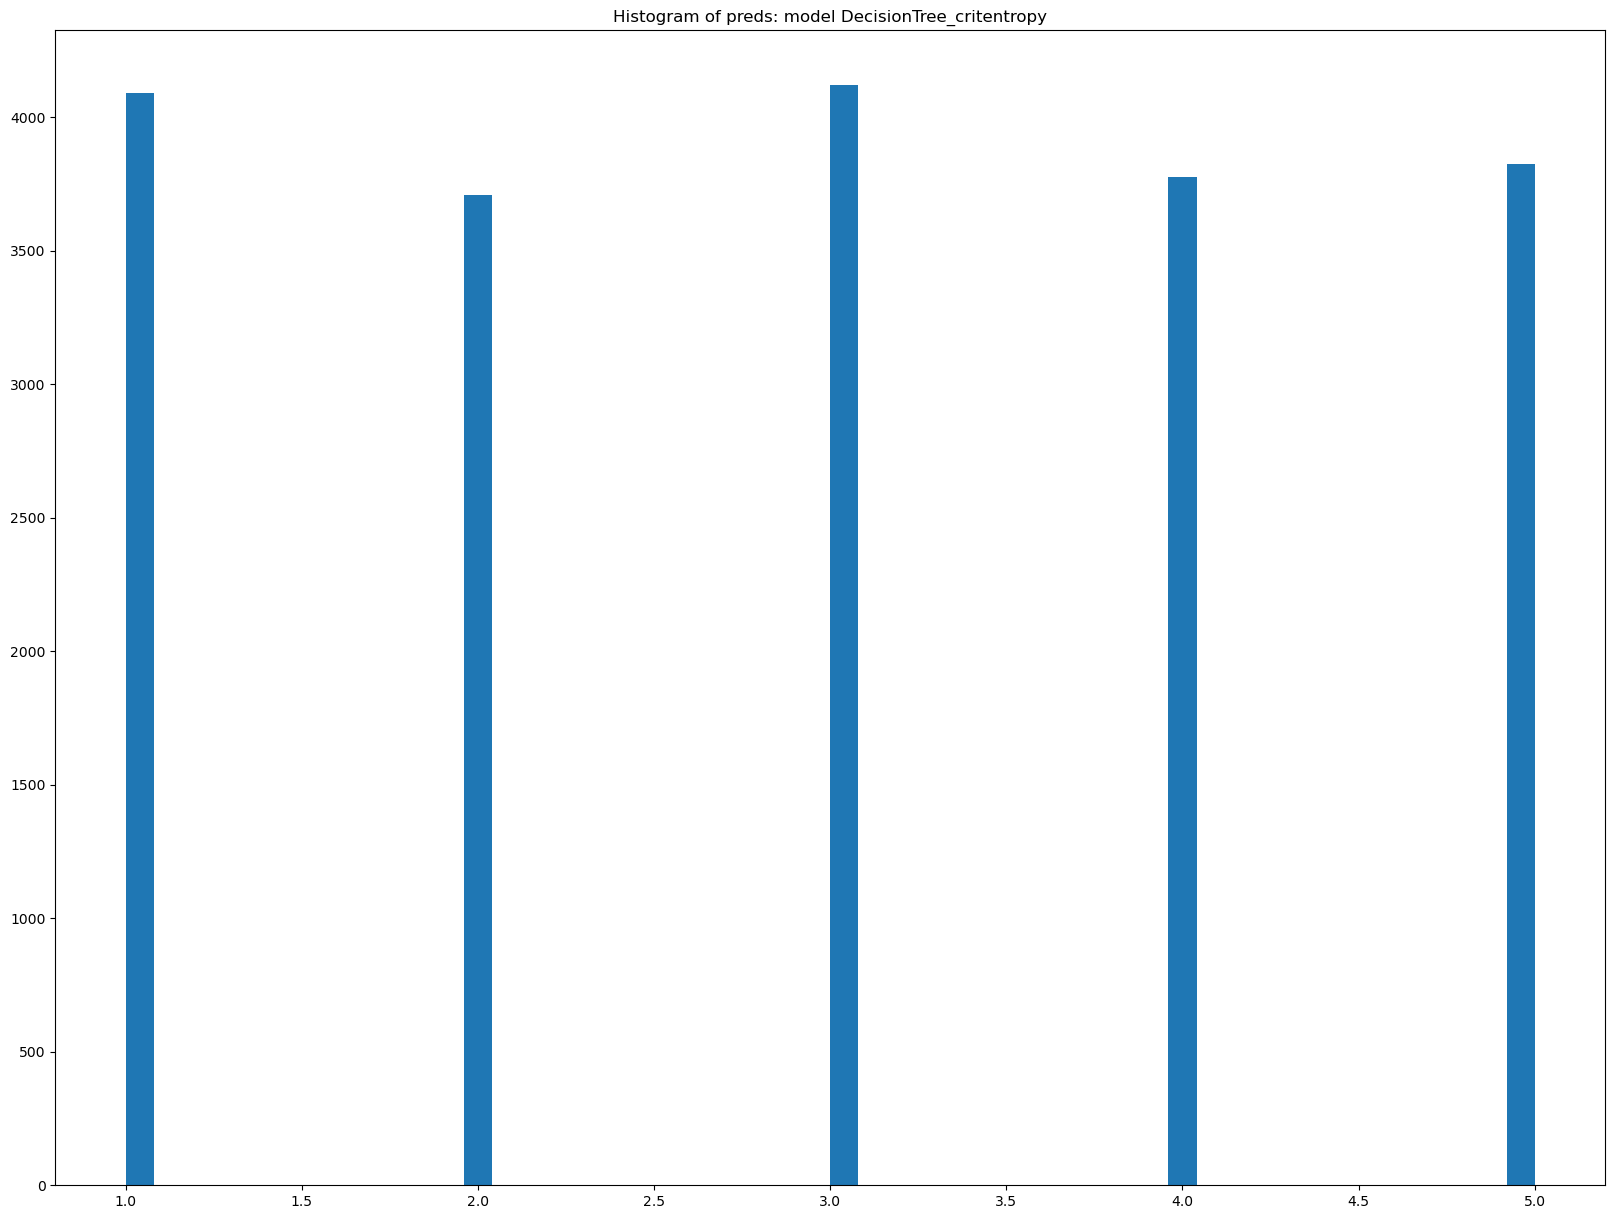

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: DecisionTree_critentropy DecisionTreeClassifier(criterion='entropy')
The Precision is:  0.9083
The Recall is:  0.9083
The F1 score is:  0.9082
The Matthews correlation coefficient is:  0.8853

This is the Confusion Matrix
      0     1     2     3     4
0  3990    10    35    11    27
1    22  3326    92   140   172
2    36    77  3660   193    78
3    19   108   201  3307    99
4    25   188   132   126  3450
model_number: 120
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()


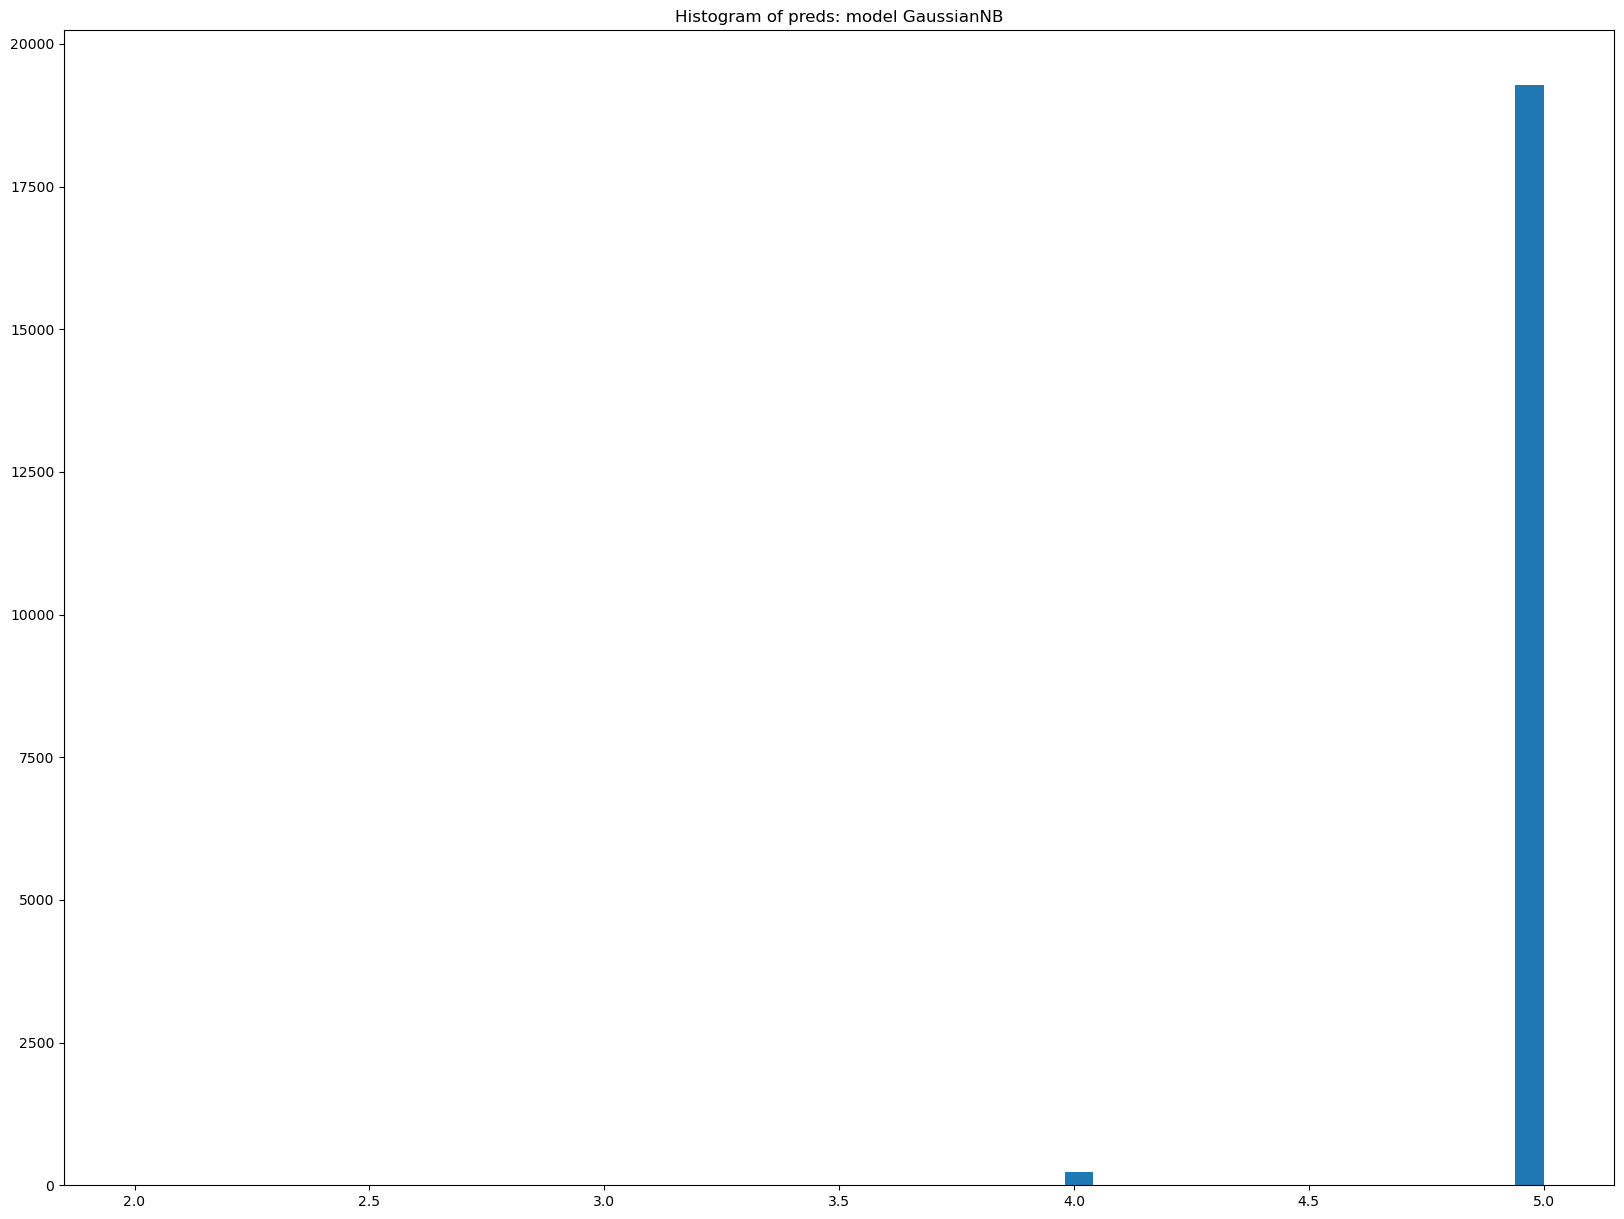

C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: GaussianNB GaussianNB()
The Precision is:  0.4444
The Recall is:  0.2060
The F1 score is:  0.0778
The Matthews correlation coefficient is:  0.0372

This is the Confusion Matrix
   0  1   2   3     4
0  0  3   0  29  4041
1  0  8   0  52  3692
2  0  1  13  63  3967
3  0  0   0  80  3654
4  0  0   0   0  3921
model_number: 121
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)


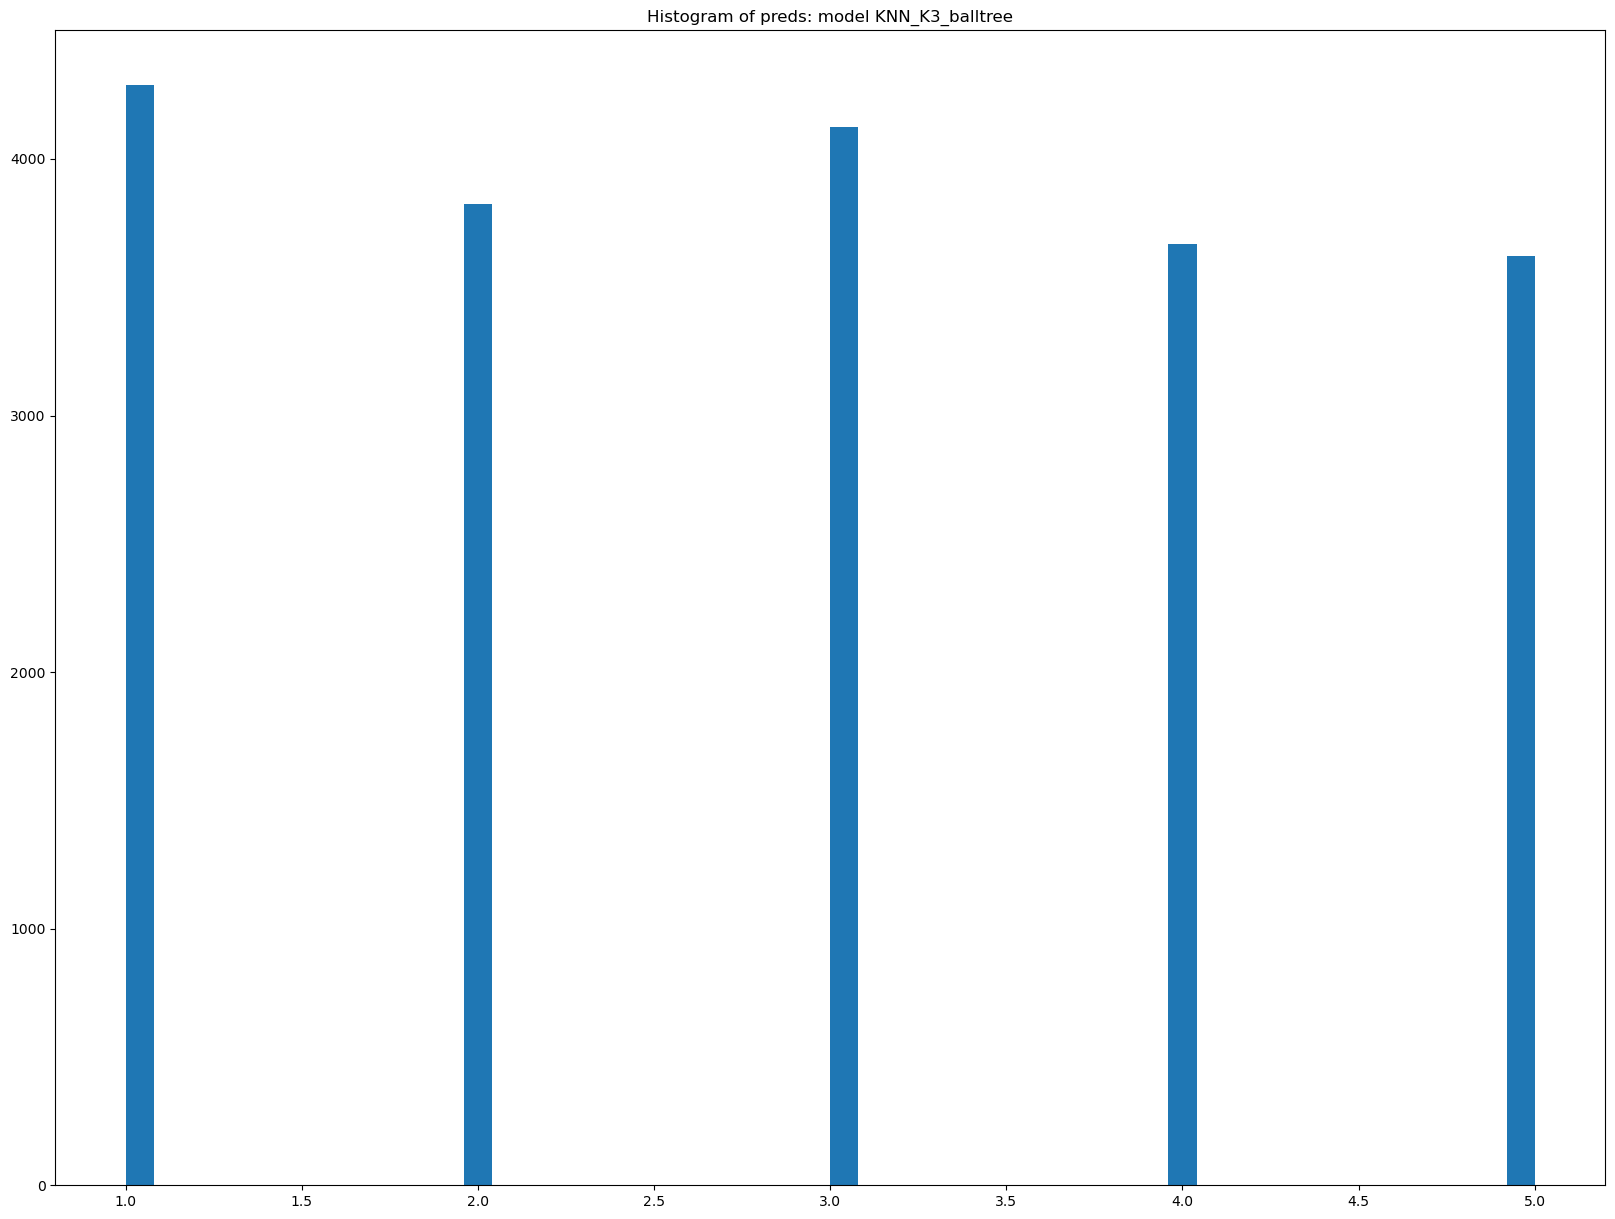

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_balltree KNeighborsClassifier(algorithm='ball_tree', n_neighbors=3)
The Precision is:  0.9326
The Recall is:  0.9319
The F1 score is:  0.9318
The Matthews correlation coefficient is:  0.9151

This is the Confusion Matrix
      0     1     2     3     4
0  4032    14    20     3     4
1    34  3497    56    93    72
2   101    24  3767   143     9
3    35   101   207  3377    14
4    85   187    75    52  3522
model_number: 122
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)


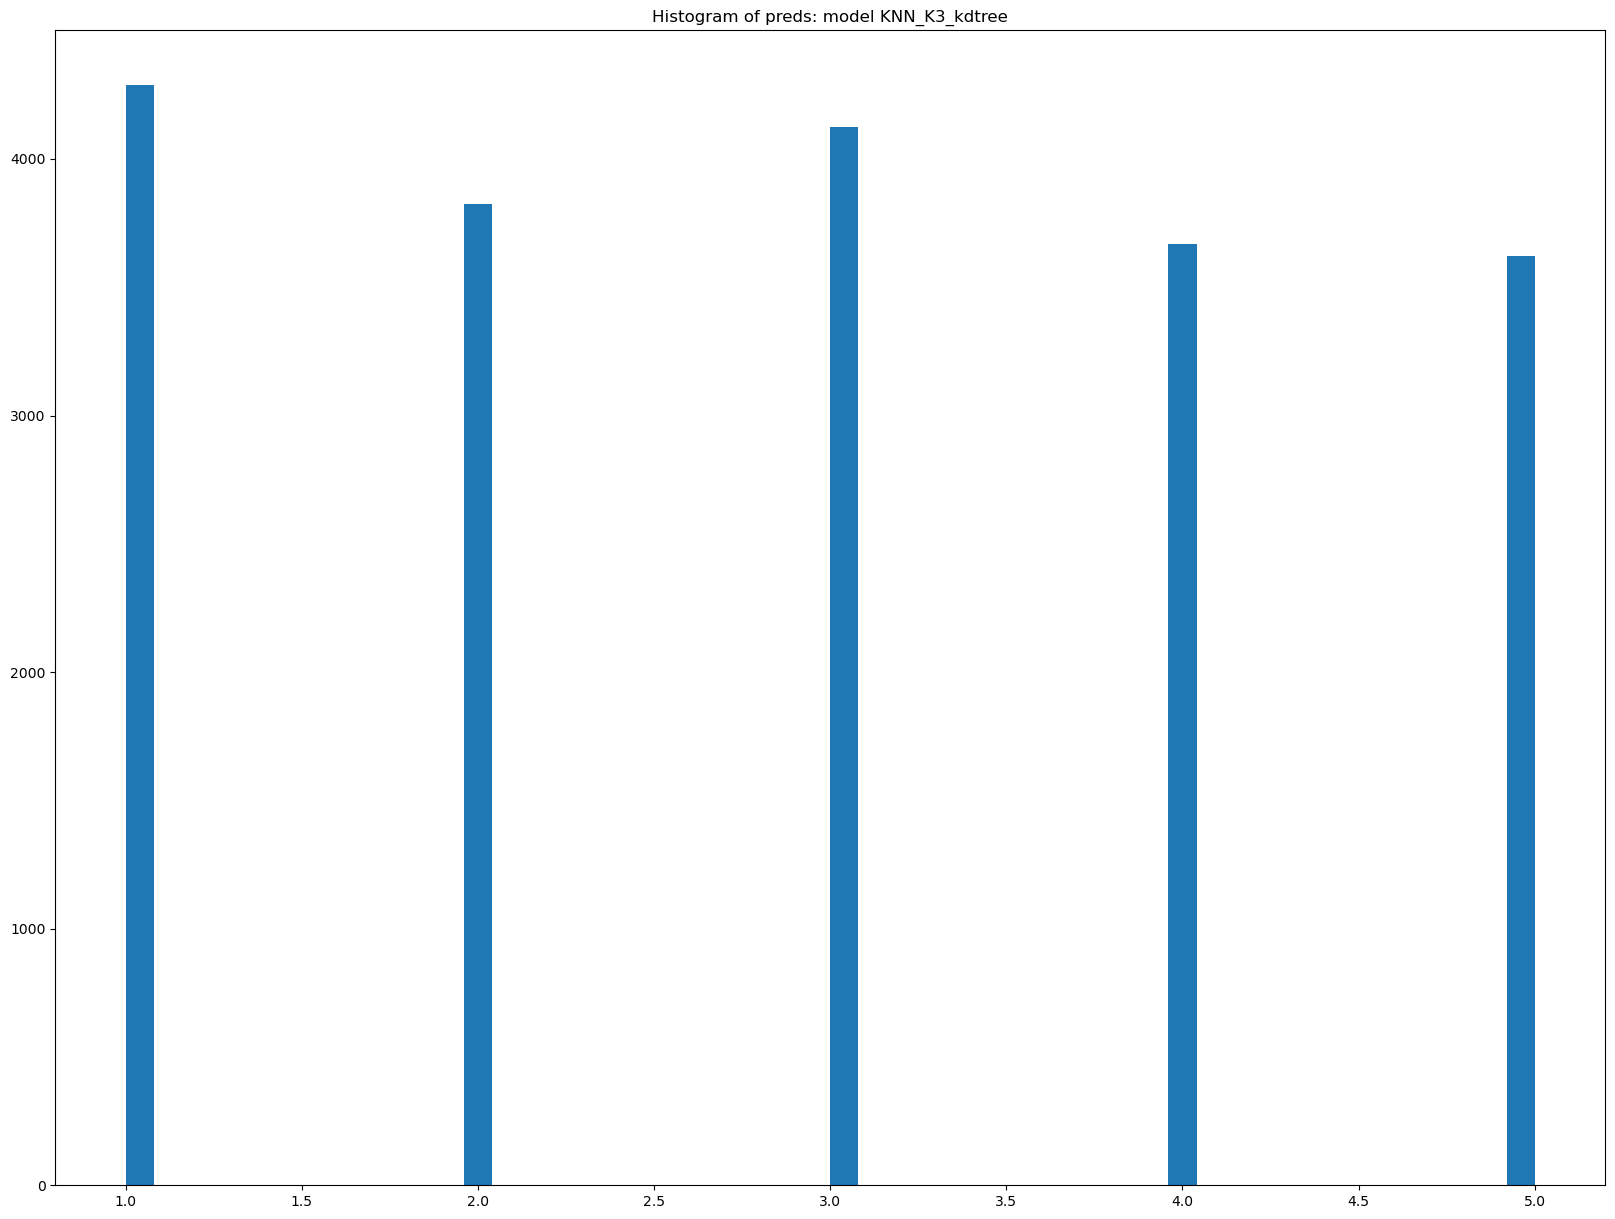

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K3_kdtree KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)
The Precision is:  0.9326
The Recall is:  0.9319
The F1 score is:  0.9318
The Matthews correlation coefficient is:  0.9151

This is the Confusion Matrix
      0     1     2     3     4
0  4032    14    20     3     4
1    34  3497    56    93    72
2   101    24  3767   143     9
3    35   101   207  3377    14
4    85   187    75    52  3522
model_number: 123
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')


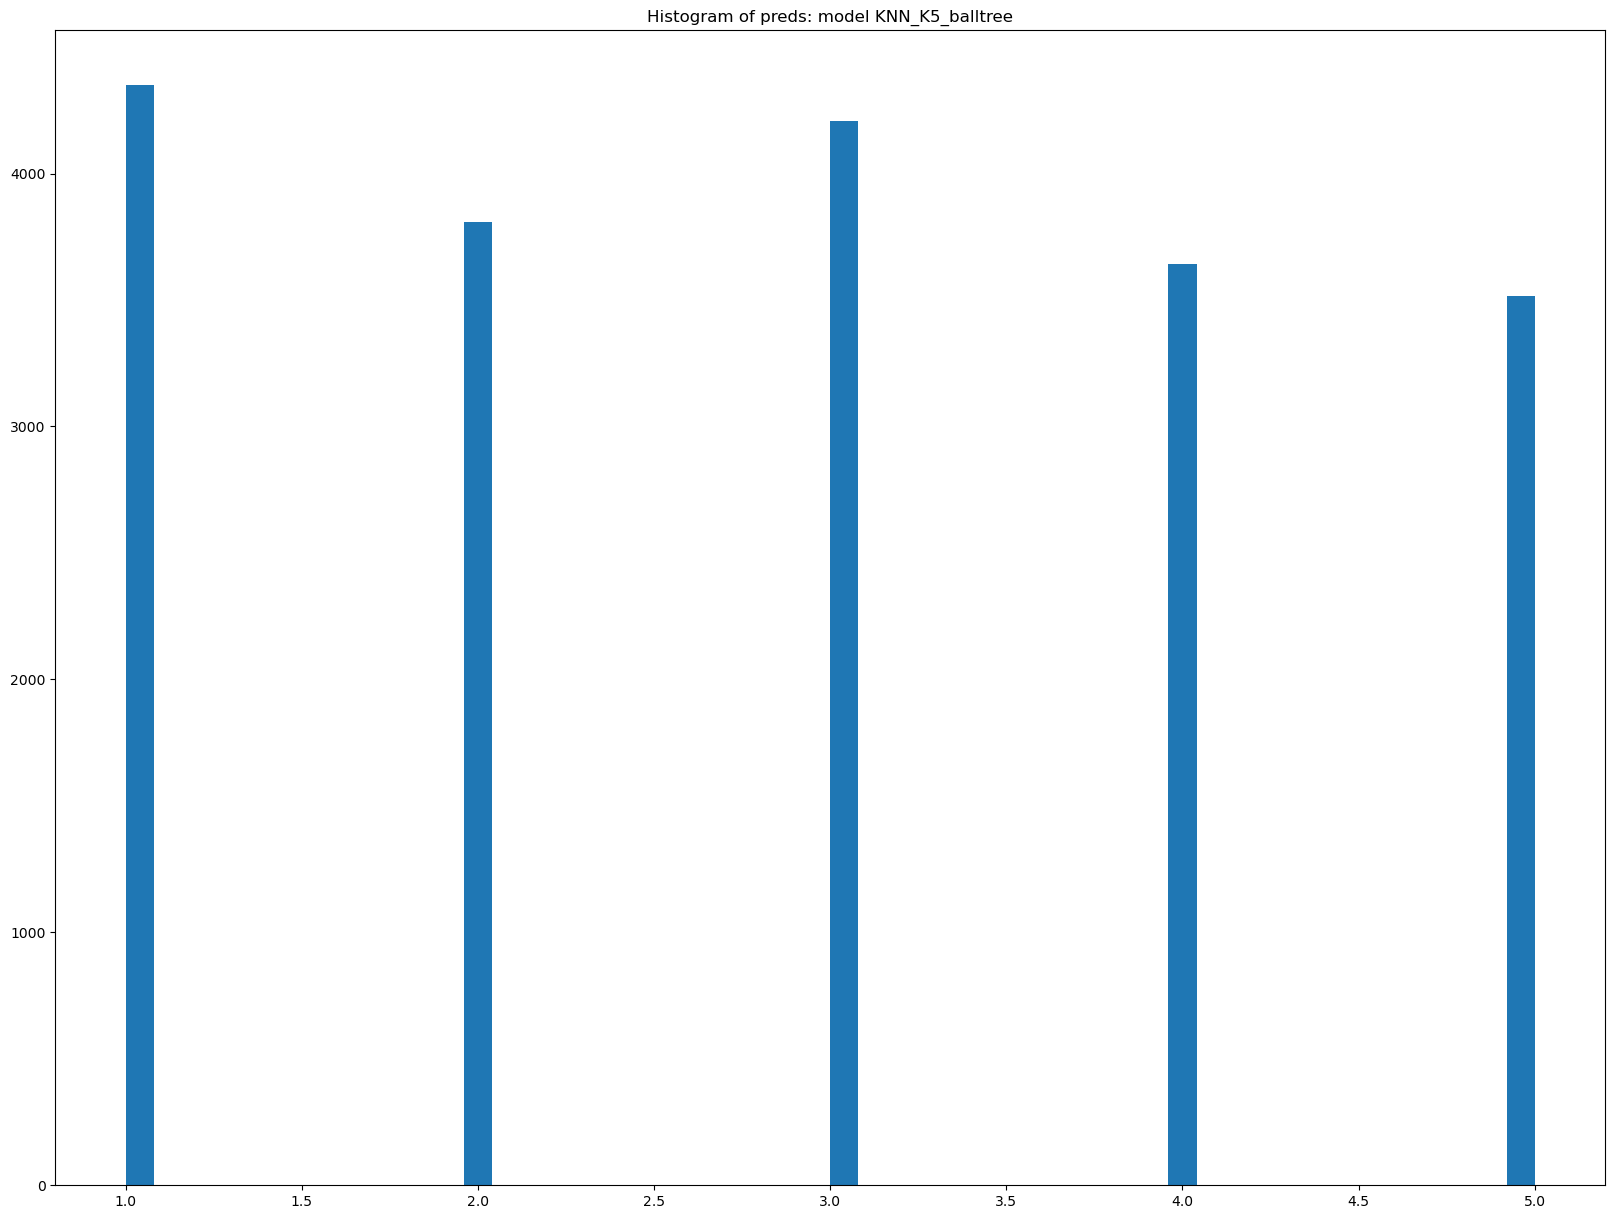

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree KNeighborsClassifier(algorithm='ball_tree')
The Precision is:  0.9254
The Recall is:  0.9241
The F1 score is:  0.9239
The Matthews correlation coefficient is:  0.9055

This is the Confusion Matrix
      0     1     2     3     4
0  4031    18    21     1     2
1    35  3476    77    99    65
2   128    20  3758   127    11
3    37    91   252  3347     7
4   118   202   100    70  3431
model_number: 124
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')


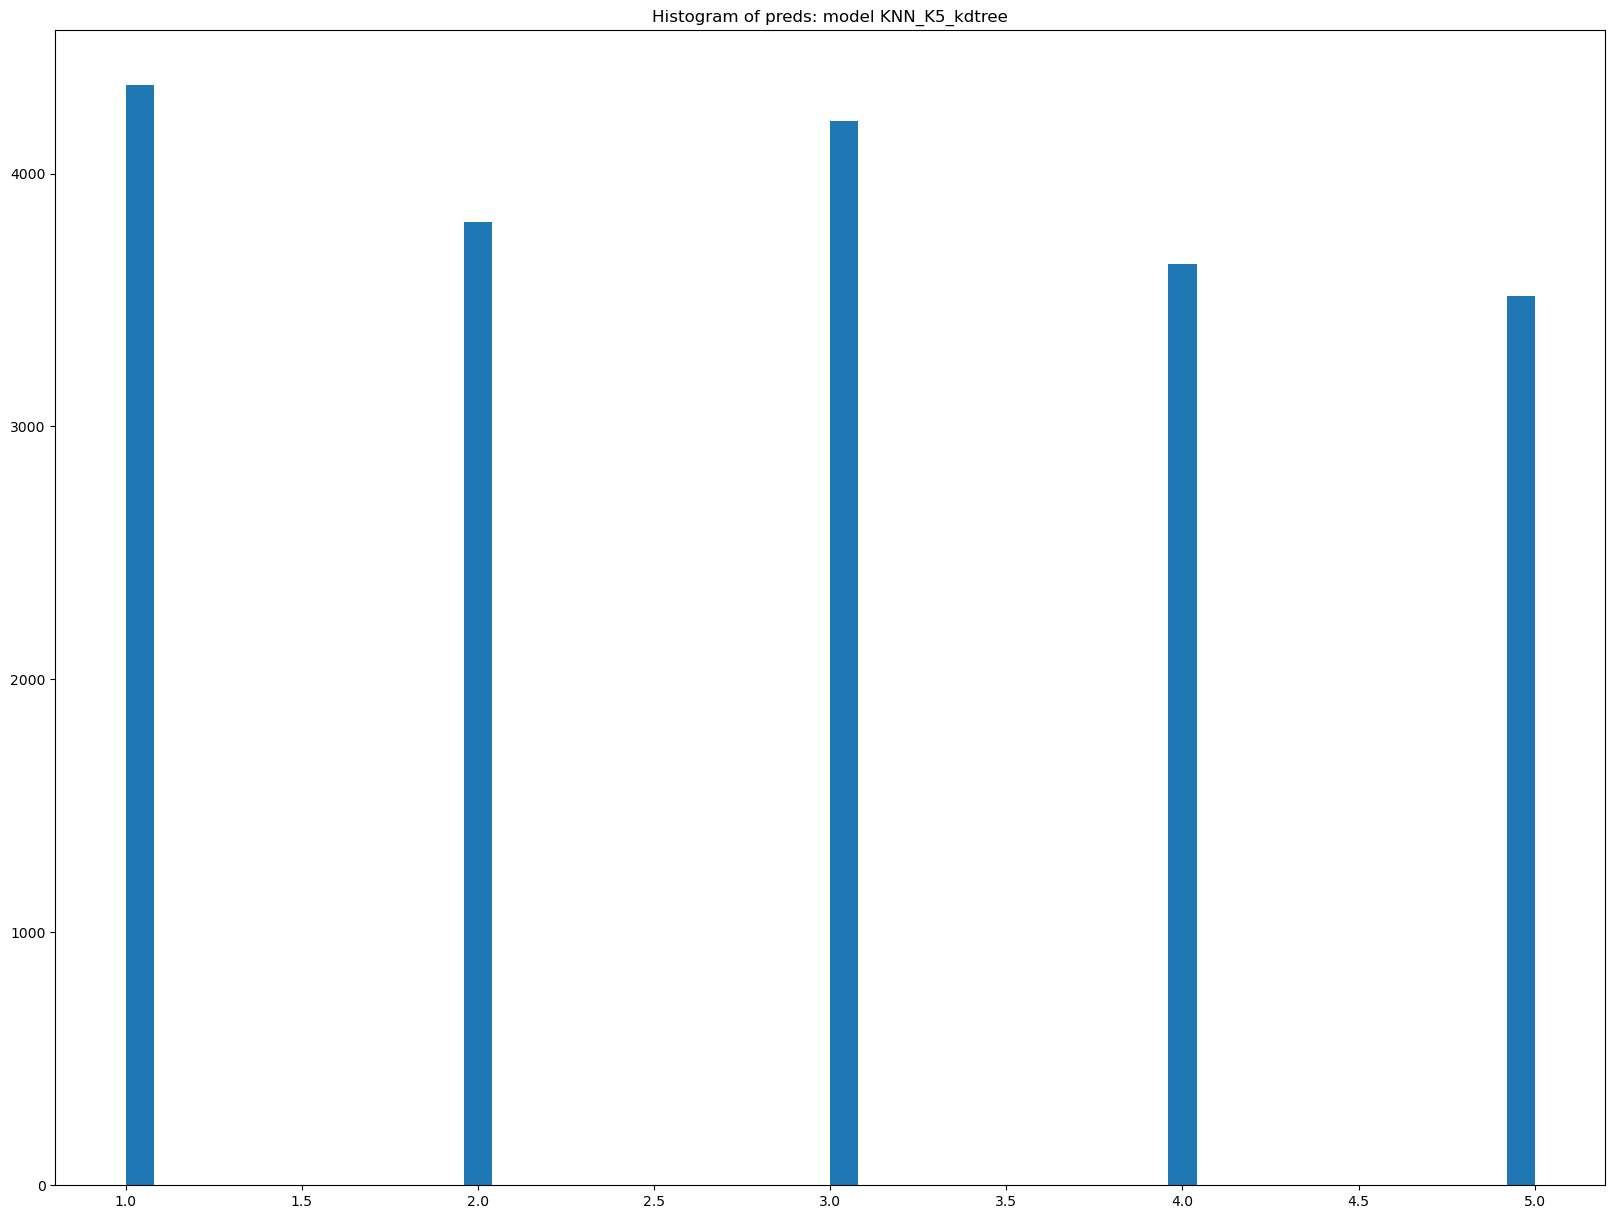

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree KNeighborsClassifier(algorithm='kd_tree')
The Precision is:  0.9254
The Recall is:  0.9241
The F1 score is:  0.9239
The Matthews correlation coefficient is:  0.9055

This is the Confusion Matrix
      0     1     2     3     4
0  4031    18    21     1     2
1    35  3476    77    99    65
2   128    20  3758   127    11
3    37    91   252  3347     7
4   118   202   100    70  3431
model_number: 125
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')


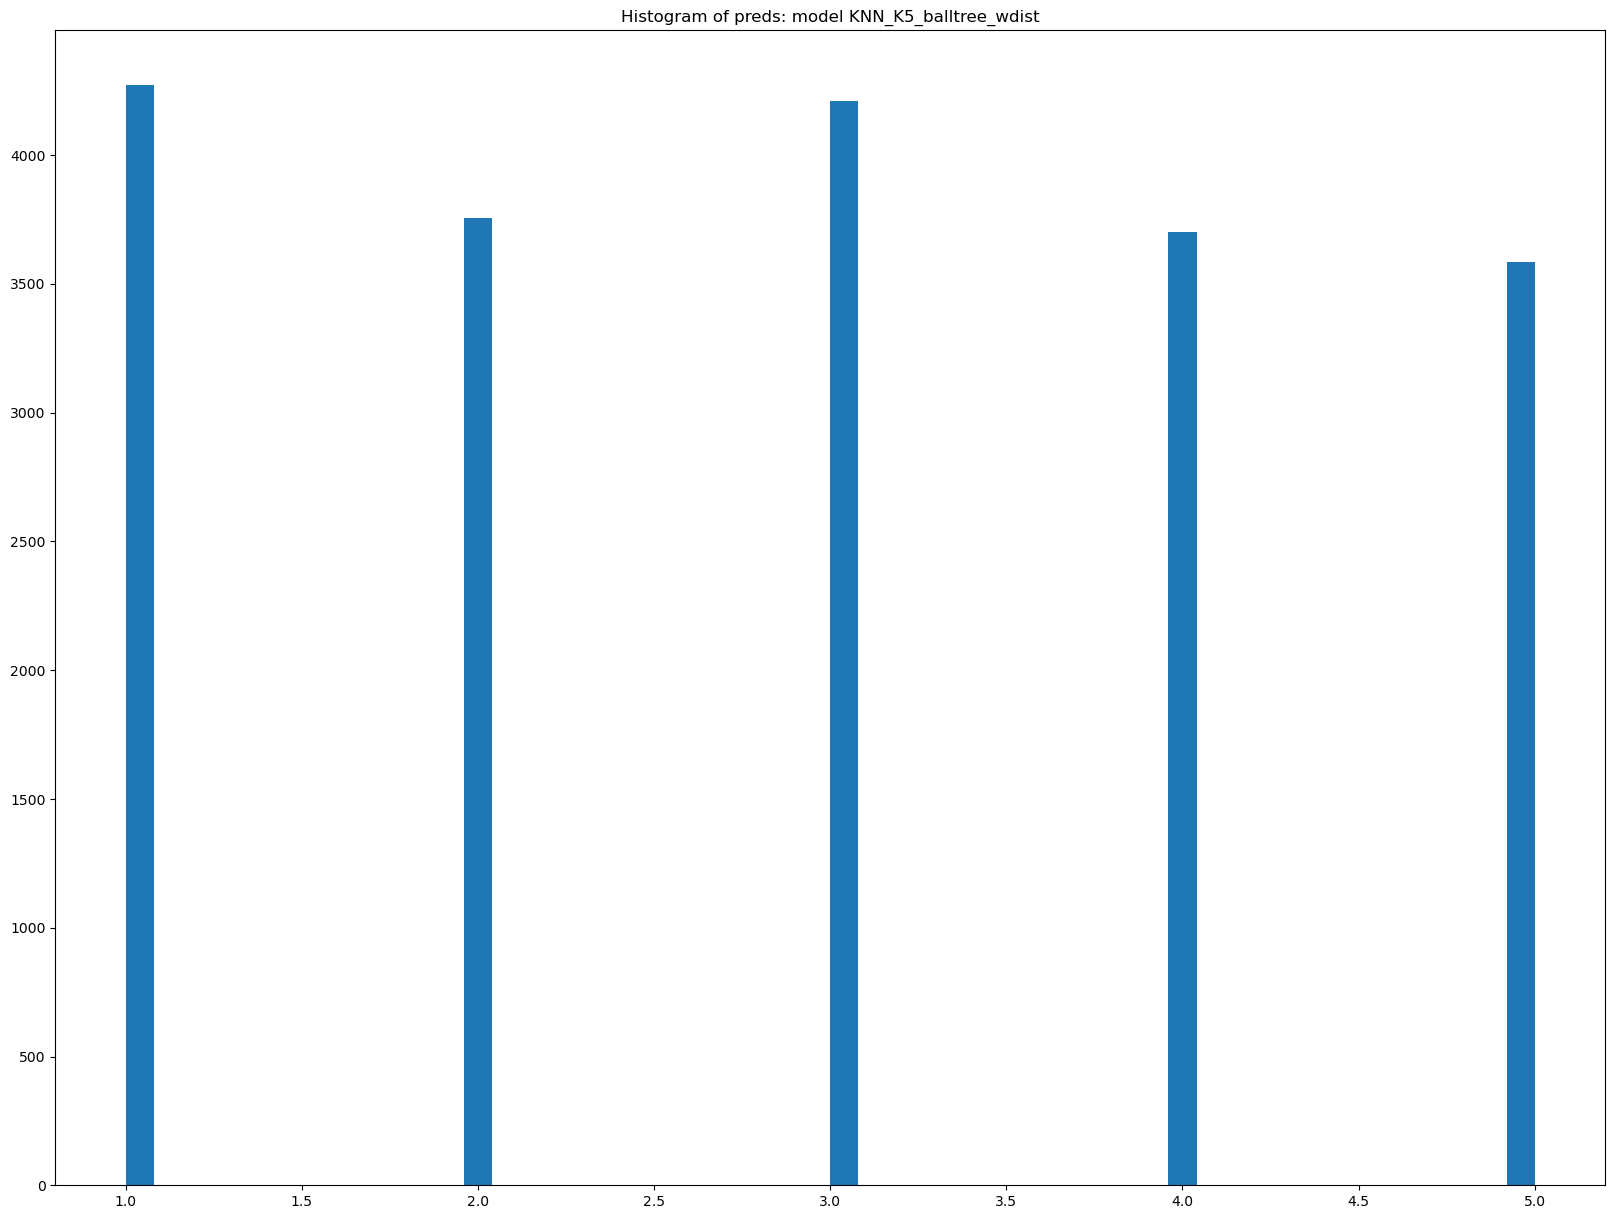

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_balltree_wdist KNeighborsClassifier(algorithm='ball_tree', weights='distance')
The Precision is:  0.9336
The Recall is:  0.9328
The F1 score is:  0.9326
The Matthews correlation coefficient is:  0.9162

This is the Confusion Matrix
      0     1     2     3     4
0  4034    15    21     1     2
1    29  3470    77   106    70
2    88    12  3808   125    11
3    28    65   222  3408    11
4    92   194    83    60  3492
model_number: 126
Scaler: PowerTransformer PowerTransformer() imputer: KNNImp_k2_wUnif KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')


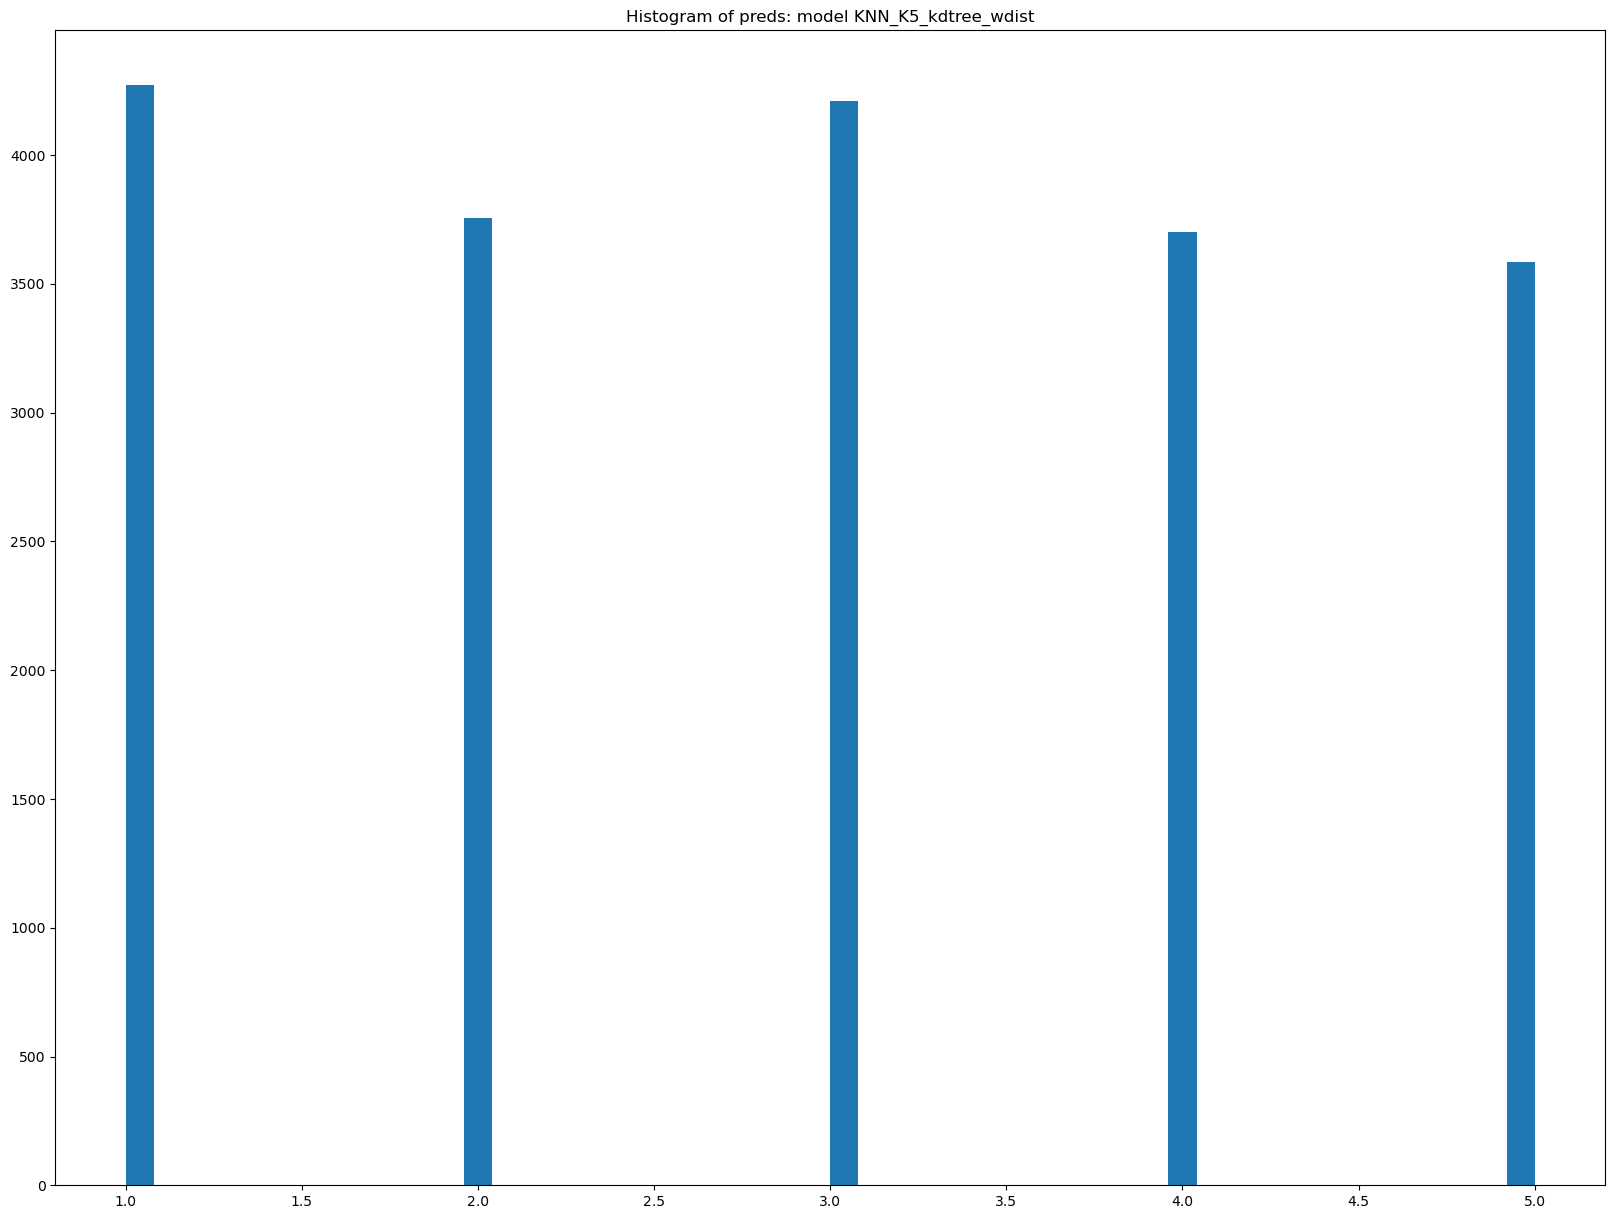

Scaler: PowerTransformer() imputer: KNNImputer(n_neighbors=2) classifier: KNN_K5_kdtree_wdist KNeighborsClassifier(algorithm='kd_tree', weights='distance')
The Precision is:  0.9336
The Recall is:  0.9328
The F1 score is:  0.9326
The Matthews correlation coefficient is:  0.9162

This is the Confusion Matrix
      0     1     2     3     4
0  4034    15    21     1     2
1    29  3470    77   106    70
2    88    12  3808   125    11
3    28    65   222  3408    11
4    92   194    83    60  3492

--------------------------Results for Classification Models Performance--------------------------
RandomForest              | precision     0.9901 | recall     0.9901 | f1     0.9901| mcc     0.9876
                          | scaler StandardScaler | imputer SimpleImp_missNAN_stmean
RandomForest              | precision     0.9900 | recall     0.9900 | f1     0.9900| mcc     0.9875
                          | scaler MinMaxScaler | imputer SimpleImp_missNAN_stmean
RandomForest              | pr

In [25]:
from sklearn.metrics import classification_report

## Classification Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import precision_recall_fscore_support

# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, PowerTransformer

# Imputers
from sklearn.impute import SimpleImputer, KNNImputer

# Classification Models Parametrization

# Define a list of classification models (tuples containing the name and estimator object for each model)
# using Decision Trees and Linear Models and Naive Bayes and KNN with some hyperparameters
classification_models = [
    ('RandomForest', RandomForestClassifier())
    ,
 #   ('GradientBoosting', GradientBoostingClassifier()),
    #('SVC', SVC()),
 #   ('LogisticRegression', LogisticRegression()),
    ('DecisionTree', DecisionTreeClassifier()),
    ('DecisionTree_maxd10', DecisionTreeClassifier(max_depth = 10)),
    ('DecisionTree_maxd15', DecisionTreeClassifier(max_depth = 15)),
    ('DecisionTree_maxd20', DecisionTreeClassifier(max_depth = 20)),
    ('DecisionTree_critgini', DecisionTreeClassifier(criterion = 'gini')),
    ('DecisionTree_critentropy', DecisionTreeClassifier(criterion = 'entropy')),
    ('GaussianNB', GaussianNB()), # not using  Decision Trees and Linear Models
    ('KNN_K3_balltree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'ball_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K3_kdtree', KNeighborsClassifier(n_neighbors = 3, algorithm = 'kd_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_balltree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_kdtree', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree')), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_balltree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'ball_tree',weights = 'distance'  )), #### TO WORK algoritm....'algorithm': ['ball_tree'
    ('KNN_K5_kdtree_wdist', KNeighborsClassifier(n_neighbors = 5, algorithm = 'kd_tree',weights = 'distance'  )) #### TO WORK algoritm....'algorithm': ['ball_tree'
]

#aplly hyperparameted only to the final 2?
# Classification Models Hyper Parameters Parametrization
class_param_grid = {
    'RandomForest': {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]},
    'GradientBoosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.1, 0.01]},
    # 'SVC': {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    'LogisticRegression': {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']},
    'DecisionTree': {'criterion': ['gini', 'entropy'], 'max_depth': np.arange(3, 15)},    
    'GaussianNB': {},
    'K-Nearest Neighbours': {'n_neighbors': [1, 3, 5, 10], 'p': [1, 2], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto']}
}

# Define a list of scalers
scalers = [
    ('MinMaxScaler', MinMaxScaler()),
    ('StandardScaler', StandardScaler()),
    ('PowerTransformer', PowerTransformer())
    # MinMaxScaler(),
     #,
]

# Define a list of Imputer
imputers = [
    ('SimpleImp_missNAN_stmean', SimpleImputer(missing_values=np.nan, strategy='mean'))
    , #mean
    ('KNNImp_missNAN_wUnif', KNNImputer(missing_values=np.nan, weights = 'uniform')), #, SLOW....
    ('KNNImp_k2_wUnif', KNNImputer(n_neighbors=2, weights="uniform"))
]

results_classification = []
VERBOSE = True

results_classification =  test_models (scalers, imputers, classification_models, class_param_grid, results_classification, X_train, y_train, X_test,y_test, VERBOSE)



Executing the list of scalers, imputers,models, we can verify that RandomForest, with standard scaler and simple imputer has the better f1. In terms of models ther macro order is RandomForest, DecisionTree , KNN (some time can surpass DecisionTree depending on the hyperparameters), GaussianNB